In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
import reverse_geocoder as rg



import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [3]:
from os.path import join

In [4]:
d_path = "/Users/oguzhanozdemir/projects"
filename = "taxi-trips.csv"

df = pd.read_csv(join(d_path, filename))

In [5]:
df.head(118185)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1       id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   
2       id3361153          1  2016-03-11 07:11:23  2016-03-11 07:20:09   
3       id2129090          1  2016-03-14 14:05:39  2016-03-14 14:28:05   
4       id0256505          1  2016-03-14 15:04:38  2016-03-14 15:16:13   
5       id0970832          1  2016-03-12 20:39:39  2016-03-12 21:05:40   
6       id2049424          2  2016-03-02 20:15:07  2016-03-02 20:37:43   
7       id0038484          2  2016-03-09 13:41:11  2016-03-09 13:53:27   
8       id3092788          2  2016-03-03 22:01:32  2016-03-03 22:17:44   
9       id3863815          2  2016-03-14 04:24:36  2016-03-14 04:37:11   
10      id1832737          2  2016-03-06 10:53:26  2016-03-06 10:59:30   
11      id2718231          1  2016-03-08 02:44:19  2016-03-08 03:04:35   
12      id3956459          2  2016-03-05 10:23:45  2016-03-05 10:45:52   
13      id2393811          1  2016-03-10 18:52:40  2016-03-10 19:08:43   
14      id2808378          1  2016-03-09 17:11:16  2016-03-09 17:28:43   
15      id1295254          1  2016-03-06 11:01:27  2016-03-06 11:08:29   
16      id1660823          2  2016-03-01 06:40:18  2016-03-01 07:01:37   
17      id0802391          1  2016-03-06 17:44:45  2016-03-06 17:52:14   
18      id2268459          1  2016-03-02 07:02:21  2016-03-02 07:24:57   
19      id2797773          1  2016-03-08 08:33:35  2016-03-08 08:36:35   
20      id3817493          2  2016-03-14 14:57:56  2016-03-14 15:15:26   
21      id1971518          1  2016-03-12 13:04:28  2016-03-12 13:14:33   
22      id3911487          1  2016-03-03 17:56:45  2016-03-03 18:05:28   
23      id3276198          2  2016-03-14 20:31:12  2016-03-14 20:36:18   
24      id1527676          1  2016-03-07 19:38:25  2016-03-07 19:54:35   
25      id1146853          2  2016-03-05 02:59:30  2016-03-05 03:20:50   
26      id3714906          1  2016-03-01 08:33:57  2016-03-01 08:40:44   
27      id1937745          2  2016-03-07 18:51:46  2016-03-07 18:58:30   
28      id2672200          1  2016-03-08 10:59:46  2016-03-08 11:21:50   
29      id3200728          2  2016-03-03 10:14:57  2016-03-03 10:32:51   
...           ...        ...                  ...                  ...   
118155  id2073065          2  2016-03-10 21:43:30  2016-03-10 21:50:55   
118156  id1042737          2  2016-03-10 06:10:29  2016-03-10 06:13:15   
118157  id0538386          1  2016-03-07 18:29:35  2016-03-07 18:36:43   
118158  id2824253          1  2016-03-03 08:09:29  2016-03-03 09:04:10   
118159  id1333654          1  2016-03-05 01:22:46  2016-03-05 01:34:27   
118160  id2731206          1  2016-03-13 20:14:32  2016-03-13 20:23:39   
118161  id2838932          1  2016-03-13 17:03:03  2016-03-13 17:11:10   
118162  id1486744          2  2016-03-09 10:45:19  2016-03-09 11:18:58   
118163  id0042357          2  2016-03-10 20:56:32  2016-03-10 21:09:55   
118164  id3542490          2  2016-03-07 21:35:25  2016-03-07 21:47:42   
118165  id0998702          2  2016-03-06 02:15:18  2016-03-06 02:24:16   
118166  id0480063          1  2016-03-05 12:53:30  2016-03-05 12:57:32   
118167  id2034624          2  2016-03-12 20:01:27  2016-03-12 20:36:01   
118168  id1203726          2  2016-03-03 17:19:23  2016-03-03 17:27:35   
118169  id3860980          2  2016-03-11 23:59:25  2016-03-12 00:10:12   
118170  id2924763          2  2016-03-04 23:24:33  2016-03-04 23:31:02   
118171  id0873910          1  2016-03-10 12:12:01  2016-03-10 12:25:52   
118172  id1250471          1  2016-03-04 12:21:19  2016-03-04 12:37:49   
118173  id1192201          1  2016-03-05 03:56:36  2016-03-05 04:05:39   
118174  id3453691          2  2016-03-07 18:11:54  2016-03-07 18:29:09   
118175  id2086152          1  2016-03-11 00:22:18  2016-03-11 00:29:14   
118176  id2525150          1  2016-03-08 12:56:58  2016-03-08 13:20:07   
118177  id3780824  

In [6]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  118185.000000    118185.000000     118185.000000    118185.000000   
mean        1.534958         1.657148        -73.973971        40.751392   
std         0.498779         1.313844          0.040456         0.027958   
min         1.000000         0.000000        -79.487900        40.225803   
25%         1.000000         1.000000        -73.991875        40.737835   
50%         2.000000         1.000000        -73.981796        40.754501   
75%         2.000000         2.000000        -73.967575        40.768471   
max         2.000000         6.000000        -73.425018        41.292198   

       dropoff_longitude  dropoff_latitude  trip_duration  
count      118185.000000     118185.000000  118185.000000  
mean          -73.973538         40.752212     927.186310  
std             0.039192          0.032284    3118.710246  
min           -79.487900         40.225800       1.000000  
25%           -73.991394         40.736462     393.000000  
50%           -73.979759         40.754848     652.000000  
75%           -73.962990         40.770077    1048.000000  
max           -73.055977         41.292198   86366.000000

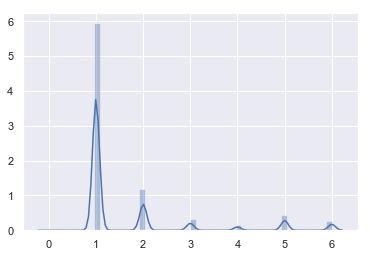

In [6]:
sns.distplot(df["passenger_count"].values, norm_hist=True)  # games played
plt.show()

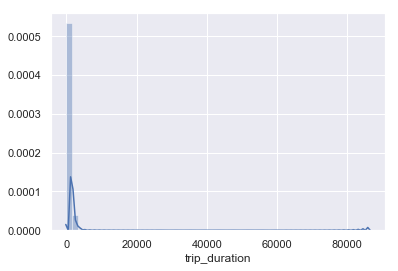

In [7]:
sns.distplot(df["trip_duration"], norm_hist=True)

In [17]:
print("shape: {}".format(df.shape))
print("data type: {}")
df.dtypes

shape: (118185, 11)
data type: {}


id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [18]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  118185.000000    118185.000000     118185.000000    118185.000000   
mean        1.534958         1.657148        -73.973971        40.751392   
std         0.498779         1.313844          0.040456         0.027958   
min         1.000000         0.000000        -79.487900        40.225803   
25%         1.000000         1.000000        -73.991875        40.737835   
50%         2.000000         1.000000        -73.981796        40.754501   
75%         2.000000         2.000000        -73.967575        40.768471   
max         2.000000         6.000000        -73.425018        41.292198   

       dropoff_longitude  dropoff_latitude  trip_duration  
count      118185.000000     118185.000000  118185.000000  
mean          -73.973538         40.752212     927.186310  
std             0.039192          0.032284    3118.710246  
min           -79.487900         40.225800       1.000000  
25%           -73.991394         40.736462     393.000000  
50%           -73.979759         40.754848     652.000000  
75%           -73.962990         40.770077    1048.000000  
max           -73.055977         41.292198   86366.000000

In [8]:
pickupdist = []
for lt,ln in zip(df["pickup_latitude"], df["pickup_longitude"]):
    pickupdist.append((lt,ln))
parray = np.empty(118185, dtype=object)
parray[:] = pickupdist

In [10]:
num = 0
pickupdist = []
for cordi in parray:
    num+=1
    gdata = rg.search(cordi)
    result = gdata[0]
    pickupdist.append(result['admin2'])
    print(str(num) + str(result['admin2']))
np_pickupdist = np.array(pickupdist)
df['pickup_district'] = np_pickupdist
df.head(118185)

1New York County
2Queens County
3Hudson County
4New York County
5
6Hudson County
7New York County
8New York County
9
10Queens County
11New York County
12
13New York County
14New York County
15Queens County
16New York County
17New York County
18
19
20New York County
21New York County
22Hudson County
23New York County
24New York County
25New York County
26
27Hudson County
28Hudson County
29New York County
30Hudson County
31
32Hudson County
33Queens County
34
35
36New York County
37Bergen County
38
39Hudson County
40Hudson County
41New York County
42New York County
43Hudson County
44New York County
45New York County
46New York County
47
48
49Kings County
50New York County
51Hudson County
52New York County
53New York County
54Hudson County
55
56Hudson County
57
58New York County
59New York County
60New York County
61
62Queens County
63Hudson County
64
65
66Queens County
67Queens County
68Queens County
69Queens County
70New York County
71Queens County
72New York County
73Queens County
74
75

604Hudson County
605New York County
606New York County
607Nassau County
608Hudson County
609Bronx
610New York County
611New York County
612
613
614New York County
615Queens County
616Queens County
617New York County
618New York County
619Queens County
620
621
622Bronx
623Queens County
624New York County
625Queens County
626Bronx
627
628
629Hudson County
630New York County
631New York County
632Hudson County
633
634New York County
635New York County
636
637New York County
638Hudson County
639Queens County
640
641
642New York County
643New York County
644Hudson County
645
646New York County
647New York County
648Queens County
649Hudson County
650Queens County
651
652Bronx
653
654New York County
655Queens County
656
657
658Hudson County
659Queens County
660Bronx
661New York County
662
663Queens County
664New York County
665New York County
666New York County
667Hudson County
668Nassau County
669
670New York County
671New York County
672
673
674New York County
675New York County
676New York

1185
1186New York County
1187New York County
1188Queens County
1189Queens County
1190
1191New York County
1192
1193
1194
1195New York County
1196
1197Queens County
1198
1199New York County
1200Queens County
1201
1202Hudson County
1203
1204New York County
1205New York County
1206Hudson County
1207New York County
1208
1209Hudson County
1210New York County
1211
1212Queens County
1213
1214Hudson County
1215Queens County
1216Hudson County
1217Hudson County
1218Hudson County
1219Hudson County
1220New York County
1221
1222New York County
1223Queens County
1224New York County
1225
1226
1227New York County
1228New York County
1229New York County
1230New York County
1231
1232New York County
1233Queens County
1234
1235
1236New York County
1237
1238New York County
1239Queens County
1240Queens County
1241New York County
1242New York County
1243
1244Queens County
1245Hudson County
1246New York County
1247New York County
1248Kings County
1249
1250
1251Queens County
1252Nassau County
1253New York Coun

1729New York County
1730New York County
1731New York County
1732Hudson County
1733Hudson County
1734Queens County
1735New York County
1736New York County
1737
1738
1739New York County
1740
1741
1742Hudson County
1743New York County
1744
1745
1746
1747New York County
1748
1749
1750New York County
1751Queens County
1752Nassau County
1753New York County
1754
1755
1756
1757New York County
1758
1759
1760
1761New York County
1762
1763New York County
1764
1765New York County
1766
1767New York County
1768New York County
1769New York County
1770
1771New York County
1772New York County
1773New York County
1774Queens County
1775New York County
1776Hudson County
1777
1778
1779Hudson County
1780New York County
1781Hudson County
1782New York County
1783New York County
1784New York County
1785Queens County
1786
1787New York County
1788
1789Bronx
1790
1791Queens County
1792Hudson County
1793Hudson County
1794Hudson County
1795New York County
1796
1797New York County
1798
1799Hudson County
1800New York

2297New York County
2298Queens County
2299
2300New York County
2301New York County
2302Queens County
2303Queens County
2304Hudson County
2305
2306
2307Hudson County
2308
2309Queens County
2310Queens County
2311
2312
2313
2314
2315New York County
2316New York County
2317Hudson County
2318New York County
2319New York County
2320Queens County
2321New York County
2322Queens County
2323Queens County
2324
2325Bronx
2326
2327New York County
2328New York County
2329New York County
2330
2331New York County
2332
2333
2334New York County
2335New York County
2336
2337
2338New York County
2339
2340Queens County
2341New York County
2342Bronx
2343
2344Queens County
2345Queens County
2346New York County
2347Queens County
2348Hudson County
2349Queens County
2350Bronx
2351New York County
2352
2353New York County
2354
2355New York County
2356Queens County
2357New York County
2358New York County
2359Queens County
2360Bronx
2361Hudson County
2362
2363Queens County
2364Queens County
2365New York County
2366

2869
2870New York County
2871New York County
2872Queens County
2873
2874Bronx
2875New York County
2876New York County
2877New York County
2878New York County
2879
2880
2881Queens County
2882New York County
2883
2884
2885Hudson County
2886New York County
2887New York County
2888New York County
2889
2890New York County
2891Hudson County
2892New York County
2893New York County
2894
2895
2896
2897Queens County
2898Hudson County
2899New York County
2900New York County
2901New York County
2902New York County
2903Queens County
2904
2905New York County
2906Hudson County
2907New York County
2908Hudson County
2909
2910Hudson County
2911New York County
2912New York County
2913Hudson County
2914New York County
2915New York County
2916Hudson County
2917New York County
2918Hudson County
2919New York County
2920New York County
2921New York County
2922Hudson County
2923New York County
2924New York County
2925Hudson County
2926
2927
2928Hudson County
2929
2930
2931Bronx
2932New York County
2933Queens C

3426New York County
3427Hudson County
3428Queens County
3429
3430Queens County
3431New York County
3432
3433New York County
3434Queens County
3435Queens County
3436New York County
3437Queens County
3438New York County
3439Queens County
3440New York County
3441Hudson County
3442Hudson County
3443Bronx
3444
3445New York County
3446New York County
3447Hudson County
3448
3449
3450
3451New York County
3452New York County
3453New York County
3454New York County
3455New York County
3456
3457Queens County
3458Queens County
3459Queens County
3460
3461
3462Queens County
3463Queens County
3464New York County
3465New York County
3466
3467New York County
3468Hudson County
3469New York County
3470
3471Bronx
3472
3473New York County
3474Hudson County
3475New York County
3476
3477Queens County
3478New York County
3479Queens County
3480New York County
3481
3482
3483Queens County
3484Hudson County
3485New York County
3486Bronx
3487
3488Queens County
3489Hudson County
3490Hudson County
3491
3492Hudson Co

3983
3984Queens County
3985
3986
3987Queens County
3988
3989New York County
3990New York County
3991
3992
3993Hudson County
3994New York County
3995New York County
3996New York County
3997Queens County
3998Bronx
3999Hudson County
4000
4001New York County
4002
4003
4004Hudson County
4005Queens County
4006New York County
4007
4008Nassau County
4009Hudson County
4010
4011Queens County
4012New York County
4013New York County
4014New York County
4015Queens County
4016New York County
4017New York County
4018New York County
4019New York County
4020
4021
4022
4023New York County
4024Hudson County
4025
4026Hudson County
4027Queens County
4028New York County
4029Bronx
4030
4031
4032New York County
4033Queens County
4034New York County
4035
4036
4037Hudson County
4038Hudson County
4039New York County
4040Queens County
4041
4042New York County
4043Queens County
4044
4045
4046New York County
4047Queens County
4048New York County
4049Hudson County
4050Hudson County
4051New York County
4052New York C

4528
4529
4530
4531Hudson County
4532
4533Hudson County
4534New York County
4535New York County
4536New York County
4537New York County
4538New York County
4539
4540New York County
4541Hudson County
4542
4543
4544New York County
4545
4546Hudson County
4547New York County
4548Hudson County
4549Hudson County
4550
4551New York County
4552
4553Hudson County
4554
4555
4556Queens County
4557New York County
4558
4559New York County
4560
4561
4562
4563Queens County
4564Hudson County
4565Hudson County
4566New York County
4567
4568New York County
4569Queens County
4570New York County
4571Hudson County
4572
4573New York County
4574Queens County
4575Hudson County
4576New York County
4577Nassau County
4578New York County
4579New York County
4580New York County
4581
4582Bronx
4583Queens County
4584New York County
4585
4586
4587
4588Hudson County
4589Hudson County
4590New York County
4591
4592New York County
4593Queens County
4594
4595New York County
4596
4597New York County
4598New York County
4599N

5097
5098Queens County
5099Nassau County
5100Queens County
5101New York County
5102Queens County
5103New York County
5104
5105Queens County
5106New York County
5107
5108
5109
5110
5111New York County
5112Queens County
5113Kings County
5114
5115
5116Queens County
5117New York County
5118New York County
5119New York County
5120New York County
5121New York County
5122
5123
5124New York County
5125New York County
5126New York County
5127New York County
5128
5129
5130Nassau County
5131New York County
5132New York County
5133Nassau County
5134New York County
5135New York County
5136
5137New York County
5138Hudson County
5139New York County
5140New York County
5141New York County
5142Nassau County
5143Queens County
5144Bergen County
5145Queens County
5146Queens County
5147
5148Queens County
5149Queens County
5150
5151New York County
5152
5153Queens County
5154New York County
5155Queens County
5156New York County
5157Queens County
5158Hudson County
5159New York County
5160Queens County
5161Que

5667New York County
5668New York County
5669
5670
5671Queens County
5672
5673New York County
5674
5675
5676Hudson County
5677
5678New York County
5679Queens County
5680
5681Queens County
5682Bronx
5683Bronx
5684Queens County
5685New York County
5686
5687New York County
5688
5689
5690New York County
5691New York County
5692
5693
5694New York County
5695New York County
5696New York County
5697New York County
5698Bronx
5699
5700
5701Hudson County
5702Queens County
5703New York County
5704Bronx
5705
5706
5707
5708Queens County
5709New York County
5710
5711Queens County
5712Queens County
5713New York County
5714
5715
5716
5717Queens County
5718Queens County
5719Nassau County
5720New York County
5721New York County
5722New York County
5723
5724Queens County
5725
5726New York County
5727New York County
5728New York County
5729
5730New York County
5731Queens County
5732
5733New York County
5734Hudson County
5735Bergen County
5736New York County
5737New York County
5738
5739New York County
5740

6230
6231Queens County
6232Nassau County
6233
6234New York County
6235Bronx
6236New York County
6237New York County
6238New York County
6239Queens County
6240Hudson County
6241
6242New York County
6243New York County
6244Queens County
6245New York County
6246Nassau County
6247Queens County
6248New York County
6249
6250New York County
6251
6252Queens County
6253
6254New York County
6255Queens County
6256New York County
6257New York County
6258
6259New York County
6260New York County
6261
6262New York County
6263New York County
6264Hudson County
6265New York County
6266New York County
6267New York County
6268
6269
6270Queens County
6271
6272New York County
6273New York County
6274
6275
6276Hudson County
6277Hudson County
6278
6279Hudson County
6280New York County
6281Queens County
6282
6283Hudson County
6284Hudson County
6285
6286New York County
6287Hudson County
6288
6289
6290Queens County
6291Hudson County
6292Bronx
6293
6294New York County
6295New York County
6296New York County
6297N

6783New York County
6784
6785New York County
6786Hudson County
6787
6788
6789Bronx
6790New York County
6791New York County
6792New York County
6793Hudson County
6794Queens County
6795New York County
6796Queens County
6797
6798
6799New York County
6800New York County
6801New York County
6802Queens County
6803
6804Queens County
6805
6806
6807
6808Bergen County
6809Queens County
6810Queens County
6811New York County
6812
6813New York County
6814New York County
6815Hudson County
6816
6817New York County
6818Nassau County
6819New York County
6820Hudson County
6821Hudson County
6822New York County
6823
6824
6825
6826New York County
6827
6828
6829Queens County
6830
6831
6832
6833Bergen County
6834New York County
6835New York County
6836
6837New York County
6838New York County
6839Hudson County
6840
6841New York County
6842
6843Queens County
6844Hudson County
6845
6846
6847Hudson County
6848Hudson County
6849New York County
6850Queens County
6851
6852Queens County
6853New York County
6854
6855

7344Bronx
7345Nassau County
7346
7347Hudson County
7348Bronx
7349
7350
7351New York County
7352Hudson County
7353Bronx
7354New York County
7355New York County
7356
7357New York County
7358
7359
7360
7361New York County
7362New York County
7363New York County
7364New York County
7365
7366New York County
7367New York County
7368New York County
7369New York County
7370New York County
7371Hudson County
7372New York County
7373
7374New York County
7375
7376New York County
7377Queens County
7378New York County
7379Queens County
7380New York County
7381Queens County
7382New York County
7383
7384Bronx
7385New York County
7386New York County
7387
7388Queens County
7389
7390Hudson County
7391
7392
7393
7394
7395
7396Bergen County
7397New York County
7398
7399
7400New York County
7401
7402New York County
7403
7404New York County
7405
7406
7407New York County
7408
7409New York County
7410New York County
7411Queens County
7412Hudson County
7413
7414New York County
7415
7416New York County
7417New Y

7900New York County
7901New York County
7902Queens County
7903New York County
7904New York County
7905New York County
7906New York County
7907
7908New York County
7909New York County
7910Queens County
7911New York County
7912New York County
7913
7914
7915
7916New York County
7917Bronx
7918
7919
7920New York County
7921Queens County
7922Hudson County
7923New York County
7924New York County
7925New York County
7926
7927
7928Bronx
7929
7930New York County
7931Queens County
7932New York County
7933New York County
7934Queens County
7935
7936New York County
7937Hudson County
7938New York County
7939Hudson County
7940Queens County
7941New York County
7942New York County
7943New York County
7944New York County
7945
7946Hudson County
7947
7948
7949
7950Queens County
7951
7952New York County
7953
7954
7955Hudson County
7956New York County
7957
7958
7959Nassau County
7960Bronx
7961
7962Queens County
7963Queens County
7964New York County
7965New York County
7966Queens County
7967Queens County
7968

8463New York County
8464Hudson County
8465
8466
8467Hudson County
8468Bronx
8469
8470Kings County
8471Queens County
8472New York County
8473Hudson County
8474New York County
8475New York County
8476
8477New York County
8478
8479Hudson County
8480
8481New York County
8482New York County
8483Bergen County
8484New York County
8485
8486New York County
8487New York County
8488
8489
8490Hudson County
8491New York County
8492
8493
8494New York County
8495New York County
8496
8497New York County
8498
8499New York County
8500New York County
8501New York County
8502New York County
8503Hudson County
8504New York County
8505Hudson County
8506
8507Queens County
8508New York County
8509Hudson County
8510New York County
8511New York County
8512
8513Queens County
8514
8515
8516New York County
8517Hudson County
8518New York County
8519New York County
8520
8521New York County
8522
8523New York County
8524Hudson County
8525New York County
8526New York County
8527
8528New York County
8529New York County
8

9013New York County
9014New York County
9015New York County
9016Hudson County
9017
9018New York County
9019New York County
9020New York County
9021New York County
9022New York County
9023
9024
9025
9026New York County
9027New York County
9028New York County
9029Hudson County
9030Bronx
9031
9032Hudson County
9033Hudson County
9034Hudson County
9035Queens County
9036
9037Queens County
9038
9039New York County
9040New York County
9041
9042Hudson County
9043
9044Queens County
9045New York County
9046Hudson County
9047
9048
9049
9050New York County
9051New York County
9052
9053
9054
9055New York County
9056Hudson County
9057Hudson County
9058Queens County
9059Hudson County
9060Hudson County
9061New York County
9062Queens County
9063New York County
9064New York County
9065New York County
9066New York County
9067
9068New York County
9069
9070New York County
9071New York County
9072
9073New York County
9074Queens County
9075
9076Queens County
9077
9078Queens County
9079
9080Hudson County
9081


9561New York County
9562New York County
9563Queens County
9564
9565New York County
9566New York County
9567
9568New York County
9569
9570New York County
9571
9572New York County
9573New York County
9574Hudson County
9575
9576
9577
9578
9579
9580Queens County
9581New York County
9582Queens County
9583New York County
9584New York County
9585Queens County
9586New York County
9587Hudson County
9588New York County
9589Queens County
9590Queens County
9591Queens County
9592
9593New York County
9594Bronx
9595New York County
9596New York County
9597Hudson County
9598Queens County
9599New York County
9600Queens County
9601New York County
9602
9603
9604
9605
9606
9607New York County
9608Hudson County
9609
9610Queens County
9611Queens County
9612
9613New York County
9614Bergen County
9615New York County
9616New York County
9617
9618New York County
9619New York County
9620New York County
9621
9622
9623New York County
9624New York County
9625New York County
9626New York County
9627New York County
96

10103
10104
10105
10106New York County
10107New York County
10108
10109New York County
10110
10111
10112New York County
10113Queens County
10114Queens County
10115Queens County
10116New York County
10117
10118Hudson County
10119New York County
10120New York County
10121
10122New York County
10123
10124
10125Queens County
10126
10127
10128
10129Queens County
10130
10131
10132
10133Queens County
10134
10135New York County
10136
10137Queens County
10138New York County
10139New York County
10140New York County
10141New York County
10142New York County
10143New York County
10144New York County
10145New York County
10146Queens County
10147
10148New York County
10149Queens County
10150Queens County
10151New York County
10152New York County
10153New York County
10154Nassau County
10155New York County
10156
10157Queens County
10158
10159New York County
10160Hudson County
10161Hudson County
10162
10163New York County
10164Queens County
10165
10166
10167Queens County
10168
10169Queens County
1017

10624Kings County
10625Hudson County
10626
10627
10628
10629
10630Queens County
10631
10632Hudson County
10633Bronx
10634New York County
10635Bronx
10636New York County
10637New York County
10638New York County
10639
10640Queens County
10641Queens County
10642
10643
10644Queens County
10645
10646New York County
10647Queens County
10648
10649New York County
10650New York County
10651New York County
10652Queens County
10653New York County
10654New York County
10655New York County
10656Hudson County
10657
10658New York County
10659New York County
10660Queens County
10661Hudson County
10662
10663New York County
10664New York County
10665Nassau County
10666Hudson County
10667New York County
10668Queens County
10669Queens County
10670Hudson County
10671Queens County
10672Hudson County
10673Nassau County
10674New York County
10675
10676
10677Bergen County
10678
10679New York County
10680Nassau County
10681Queens County
10682Queens County
10683New York County
10684New York County
10685Queens C

11144New York County
11145New York County
11146Queens County
11147Hudson County
11148New York County
11149Queens County
11150Queens County
11151New York County
11152New York County
11153New York County
11154
11155Bronx
11156
11157Queens County
11158New York County
11159Queens County
11160Queens County
11161Queens County
11162
11163
11164
11165New York County
11166Queens County
11167Queens County
11168New York County
11169Queens County
11170New York County
11171New York County
11172Nassau County
11173
11174New York County
11175New York County
11176
11177New York County
11178
11179New York County
11180New York County
11181New York County
11182New York County
11183Queens County
11184Bergen County
11185New York County
11186Bronx
11187
11188
11189
11190New York County
11191New York County
11192
11193New York County
11194Queens County
11195Hudson County
11196New York County
11197
11198
11199Hudson County
11200
11201
11202New York County
11203Hudson County
11204
11205Bronx
11206New York Count

11672Hudson County
11673Hudson County
11674New York County
11675
11676New York County
11677New York County
11678New York County
11679New York County
11680
11681
11682Queens County
11683
11684New York County
11685
11686New York County
11687Hudson County
11688New York County
11689New York County
11690New York County
11691Queens County
11692
11693Hudson County
11694
11695Queens County
11696Queens County
11697Hudson County
11698
11699Hudson County
11700New York County
11701New York County
11702
11703
11704
11705
11706
11707Bronx
11708
11709
11710New York County
11711New York County
11712New York County
11713New York County
11714New York County
11715Queens County
11716
11717
11718New York County
11719Hudson County
11720New York County
11721Hudson County
11722New York County
11723Queens County
11724Queens County
11725New York County
11726Queens County
11727
11728Hudson County
11729
11730
11731New York County
11732New York County
11733Nassau County
11734
11735New York County
11736Queens Count

12210Hudson County
12211New York County
12212
12213New York County
12214
12215Queens County
12216New York County
12217New York County
12218Hudson County
12219
12220New York County
12221
12222New York County
12223Queens County
12224Hudson County
12225Queens County
12226New York County
12227New York County
12228Queens County
12229New York County
12230
12231Hudson County
12232Queens County
12233New York County
12234
12235
12236New York County
12237New York County
12238New York County
12239Queens County
12240New York County
12241
12242New York County
12243
12244New York County
12245New York County
12246
12247New York County
12248
12249New York County
12250New York County
12251New York County
12252
12253Hudson County
12254Hudson County
12255New York County
12256
12257
12258Hudson County
12259
12260New York County
12261New York County
12262Queens County
12263
12264New York County
12265
12266New York County
12267Hudson County
12268Hudson County
12269
12270New York County
12271Nassau County
12

12690
12691
12692New York County
12693Hudson County
12694
12695New York County
12696Queens County
12697New York County
12698
12699New York County
12700
12701
12702Bronx
12703New York County
12704New York County
12705Queens County
12706
12707
12708
12709New York County
12710New York County
12711New York County
12712New York County
12713Nassau County
12714New York County
12715Hudson County
12716New York County
12717
12718New York County
12719
12720New York County
12721New York County
12722Hudson County
12723New York County
12724
12725New York County
12726
12727Queens County
12728New York County
12729
12730New York County
12731
12732New York County
12733New York County
12734New York County
12735Bronx
12736New York County
12737
12738New York County
12739
12740New York County
12741
12742New York County
12743New York County
12744Queens County
12745New York County
12746New York County
12747
12748
12749New York County
12750
12751Hudson County
12752New York County
12753New York County
12754
127

13229
13230
13231New York County
13232Queens County
13233
13234New York County
13235New York County
13236New York County
13237New York County
13238New York County
13239
13240
13241Queens County
13242Hudson County
13243New York County
13244
13245New York County
13246
13247New York County
13248New York County
13249
13250
13251Hudson County
13252
13253New York County
13254Queens County
13255New York County
13256Hudson County
13257
13258
13259Queens County
13260New York County
13261Queens County
13262Hudson County
13263Hudson County
13264New York County
13265New York County
13266Queens County
13267New York County
13268New York County
13269
13270
13271Hudson County
13272New York County
13273Bronx
13274New York County
13275New York County
13276Queens County
13277Hudson County
13278Queens County
13279New York County
13280Queens County
13281
13282New York County
13283New York County
13284Bergen County
13285Queens County
13286Bronx
13287
13288New York County
13289Hudson County
13290New York Cou

13750Bronx
13751Hudson County
13752New York County
13753Hudson County
13754New York County
13755New York County
13756
13757Queens County
13758Hudson County
13759
13760New York County
13761New York County
13762Hudson County
13763
13764Queens County
13765
13766Queens County
13767Hudson County
13768
13769
13770Hudson County
13771
13772
13773Hudson County
13774New York County
13775New York County
13776Queens County
13777New York County
13778New York County
13779
13780New York County
13781
13782New York County
13783Queens County
13784New York County
13785Queens County
13786New York County
13787Hudson County
13788
13789Queens County
13790New York County
13791New York County
13792Queens County
13793
13794Hudson County
13795
13796New York County
13797
13798Bergen County
13799New York County
13800Bronx
13801
13802New York County
13803Queens County
13804New York County
13805New York County
13806Bergen County
13807New York County
13808New York County
13809New York County
13810New York County
1381

14271Queens County
14272Bronx
14273
14274New York County
14275
14276
14277
14278New York County
14279New York County
14280Hudson County
14281New York County
14282New York County
14283Queens County
14284
14285Queens County
14286
14287
14288New York County
14289New York County
14290Queens County
14291
14292
14293New York County
14294
14295Queens County
14296New York County
14297New York County
14298Hudson County
14299
14300
14301New York County
14302Hudson County
14303New York County
14304Hudson County
14305New York County
14306
14307
14308Queens County
14309
14310Queens County
14311Queens County
14312Hudson County
14313Queens County
14314Queens County
14315New York County
14316New York County
14317New York County
14318Queens County
14319
14320Hudson County
14321Queens County
14322Hudson County
14323
14324New York County
14325New York County
14326
14327
14328New York County
14329Hudson County
14330
14331New York County
14332Hudson County
14333New York County
14334New York County
14335
14

14785New York County
14786New York County
14787
14788Queens County
14789
14790New York County
14791New York County
14792New York County
14793Bergen County
14794New York County
14795New York County
14796New York County
14797New York County
14798Queens County
14799New York County
14800
14801New York County
14802Queens County
14803
14804
14805
14806New York County
14807Queens County
14808New York County
14809
14810
14811Nassau County
14812New York County
14813Bergen County
14814Hudson County
14815Hudson County
14816New York County
14817Hudson County
14818Queens County
14819Hudson County
14820Nassau County
14821New York County
14822Nassau County
14823Queens County
14824New York County
14825Queens County
14826
14827Queens County
14828
14829
14830New York County
14831New York County
14832Hudson County
14833New York County
14834Queens County
14835New York County
14836New York County
14837New York County
14838
14839
14840
14841Queens County
14842New York County
14843Queens County
14844New York

15302
15303Hudson County
15304New York County
15305
15306Kings County
15307New York County
15308Queens County
15309New York County
15310New York County
15311New York County
15312
15313
15314
15315Hudson County
15316New York County
15317
15318
15319Hudson County
15320Nassau County
15321New York County
15322New York County
15323New York County
15324New York County
15325
15326
15327New York County
15328New York County
15329Bronx
15330New York County
15331New York County
15332
15333New York County
15334New York County
15335New York County
15336
15337Queens County
15338
15339New York County
15340New York County
15341
15342New York County
15343
15344New York County
15345New York County
15346New York County
15347
15348
15349New York County
15350New York County
15351
15352New York County
15353
15354
15355New York County
15356New York County
15357New York County
15358New York County
15359New York County
15360Nassau County
15361Hudson County
15362
15363
15364New York County
15365
15366Hudson Cou

15821Hudson County
15822
15823Bronx
15824Queens County
15825Queens County
15826
15827New York County
15828Hudson County
15829New York County
15830Queens County
15831New York County
15832
15833New York County
15834
15835Hudson County
15836Queens County
15837New York County
15838
15839
15840Hudson County
15841New York County
15842New York County
15843
15844New York County
15845Queens County
15846
15847Bronx
15848
15849New York County
15850Hudson County
15851Hudson County
15852Bronx
15853New York County
15854New York County
15855
15856New York County
15857Queens County
15858New York County
15859Queens County
15860New York County
15861Hudson County
15862
15863Hudson County
15864New York County
15865New York County
15866
15867New York County
15868New York County
15869
15870
15871Hudson County
15872
15873
15874
15875New York County
15876Queens County
15877New York County
15878
15879New York County
15880
15881Bergen County
15882Queens County
15883Hudson County
15884Queens County
15885
15886Na

16341Hudson County
16342New York County
16343Queens County
16344New York County
16345Hudson County
16346New York County
16347New York County
16348New York County
16349
16350New York County
16351Hudson County
16352New York County
16353New York County
16354New York County
16355New York County
16356
16357New York County
16358Queens County
16359Queens County
16360Queens County
16361
16362Hudson County
16363New York County
16364
16365New York County
16366
16367New York County
16368New York County
16369
16370New York County
16371Hudson County
16372Hudson County
16373New York County
16374Hudson County
16375New York County
16376New York County
16377New York County
16378Queens County
16379New York County
16380Queens County
16381New York County
16382Queens County
16383
16384New York County
16385New York County
16386
16387New York County
16388Hudson County
16389Queens County
16390
16391New York County
16392
16393Queens County
16394
16395New York County
16396Queens County
16397New York County
1639

16859
16860
16861Hudson County
16862
16863
16864
16865New York County
16866
16867Nassau County
16868Hudson County
16869New York County
16870Queens County
16871Hudson County
16872
16873New York County
16874
16875New York County
16876
16877
16878Queens County
16879New York County
16880
16881New York County
16882Queens County
16883New York County
16884Hudson County
16885New York County
16886
16887New York County
16888Bronx
16889
16890Queens County
16891
16892New York County
16893Kings County
16894Queens County
16895
16896Queens County
16897Queens County
16898
16899
16900
16901New York County
16902Nassau County
16903
16904Queens County
16905Hudson County
16906
16907
16908
16909New York County
16910New York County
16911
16912New York County
16913Hudson County
16914
16915Bronx
16916Bronx
16917New York County
16918New York County
16919Queens County
16920Queens County
16921New York County
16922New York County
16923Bronx
16924New York County
16925Bergen County
16926
16927
16928New York County
1

17389
17390
17391
17392Queens County
17393New York County
17394
17395
17396New York County
17397New York County
17398Hudson County
17399New York County
17400
17401New York County
17402Queens County
17403New York County
17404New York County
17405New York County
17406New York County
17407
17408New York County
17409Hudson County
17410
17411New York County
17412
17413
17414New York County
17415Bronx
17416Hudson County
17417New York County
17418
17419Hudson County
17420Queens County
17421New York County
17422New York County
17423
17424New York County
17425Hudson County
17426Hudson County
17427New York County
17428New York County
17429New York County
17430New York County
17431
17432
17433
17434Hudson County
17435New York County
17436
17437
17438
17439Hudson County
17440
17441
17442
17443Queens County
17444New York County
17445New York County
17446
17447New York County
17448Queens County
17449Queens County
17450New York County
17451New York County
17452Hudson County
17453New York County
17454

17920
17921Queens County
17922
17923
17924Kings County
17925New York County
17926New York County
17927
17928New York County
17929New York County
17930
17931New York County
17932Queens County
17933Queens County
17934Nassau County
17935Queens County
17936
17937
17938Hudson County
17939
17940
17941
17942New York County
17943Hudson County
17944Hudson County
17945Queens County
17946New York County
17947
17948New York County
17949
17950Hudson County
17951Bronx
17952
17953Hudson County
17954New York County
17955
17956New York County
17957New York County
17958
17959Hudson County
17960Queens County
17961
17962Queens County
17963
17964
17965New York County
17966New York County
17967
17968
17969New York County
17970New York County
17971
17972New York County
17973Queens County
17974New York County
17975Queens County
17976New York County
17977
17978Queens County
17979Queens County
17980New York County
17981New York County
17982New York County
17983New York County
17984Hudson County
17985
17986
1798

18447New York County
18448Hudson County
18449Hudson County
18450New York County
18451
18452
18453
18454
18455New York County
18456New York County
18457Hudson County
18458New York County
18459New York County
18460Hudson County
18461New York County
18462
18463
18464New York County
18465
18466
18467New York County
18468Queens County
18469New York County
18470New York County
18471Queens County
18472Hudson County
18473Bronx
18474Queens County
18475Bergen County
18476
18477Hudson County
18478
18479
18480Queens County
18481
18482Nassau County
18483Hudson County
18484
18485
18486New York County
18487New York County
18488Queens County
18489
18490New York County
18491New York County
18492New York County
18493New York County
18494New York County
18495
18496
18497New York County
18498New York County
18499
18500
18501Queens County
18502New York County
18503Queens County
18504New York County
18505Hudson County
18506Hudson County
18507New York County
18508New York County
18509New York County
18510Que

18962Hudson County
18963New York County
18964
18965Hudson County
18966New York County
18967New York County
18968New York County
18969
18970Hudson County
18971
18972Hudson County
18973Queens County
18974
18975Hudson County
18976
18977Hudson County
18978
18979Queens County
18980Hudson County
18981Hudson County
18982New York County
18983Queens County
18984New York County
18985New York County
18986Bergen County
18987
18988New York County
18989
18990New York County
18991New York County
18992
18993Nassau County
18994New York County
18995New York County
18996
18997New York County
18998Queens County
18999
19000Queens County
19001Hudson County
19002Bronx
19003New York County
19004
19005Hudson County
19006
19007Hudson County
19008Hudson County
19009New York County
19010
19011New York County
19012New York County
19013
19014New York County
19015Queens County
19016New York County
19017
19018Bronx
19019New York County
19020New York County
19021Nassau County
19022New York County
19023
19024New York C

19484Queens County
19485New York County
19486New York County
19487
19488New York County
19489New York County
19490
19491Queens County
19492
19493New York County
19494
19495
19496Queens County
19497Queens County
19498Bronx
19499Queens County
19500New York County
19501Hudson County
19502Queens County
19503
19504New York County
19505Hudson County
19506
19507
19508Queens County
19509Queens County
19510New York County
19511New York County
19512New York County
19513New York County
19514New York County
19515Queens County
19516Queens County
19517Queens County
19518Queens County
19519Queens County
19520New York County
19521
19522New York County
19523
19524
19525New York County
19526
19527New York County
19528New York County
19529New York County
19530New York County
19531New York County
19532Nassau County
19533
19534Hudson County
19535Bronx
19536Queens County
19537Bronx
19538
19539New York County
19540New York County
19541Hudson County
19542Nassau County
19543New York County
19544New York County

19984Queens County
19985New York County
19986
19987
19988Hudson County
19989New York County
19990New York County
19991New York County
19992New York County
19993
19994New York County
19995New York County
19996Bergen County
19997New York County
19998Queens County
19999New York County
20000
20001New York County
20002New York County
20003New York County
20004
20005Queens County
20006New York County
20007New York County
20008New York County
20009Hudson County
20010Hudson County
20011
20012New York County
20013
20014
20015New York County
20016
20017
20018
20019Queens County
20020Queens County
20021New York County
20022Queens County
20023New York County
20024Queens County
20025
20026New York County
20027
20028New York County
20029New York County
20030New York County
20031Hudson County
20032New York County
20033New York County
20034
20035
20036
20037New York County
20038
20039
20040Queens County
20041
20042Queens County
20043Queens County
20044Queens County
20045
20046Queens County
20047Queens

20491New York County
20492Hudson County
20493Queens County
20494New York County
20495New York County
20496New York County
20497New York County
20498Queens County
20499
20500
20501New York County
20502New York County
20503Hudson County
20504
20505Hudson County
20506Queens County
20507
20508Kings County
20509New York County
20510
20511
20512New York County
20513New York County
20514Queens County
20515New York County
20516Bergen County
20517Hudson County
20518New York County
20519
20520New York County
20521Hudson County
20522
20523New York County
20524
20525
20526New York County
20527Queens County
20528
20529New York County
20530
20531New York County
20532Hudson County
20533Hudson County
20534Hudson County
20535New York County
20536Queens County
20537Queens County
20538
20539Hudson County
20540
20541New York County
20542Queens County
20543Kings County
20544Queens County
20545New York County
20546Queens County
20547New York County
20548New York County
20549New York County
20550
20551Hudson

21012Queens County
21013New York County
21014New York County
21015Hudson County
21016Hudson County
21017
21018Queens County
21019Queens County
21020New York County
21021Queens County
21022New York County
21023New York County
21024
21025Queens County
21026New York County
21027New York County
21028New York County
21029New York County
21030New York County
21031Hudson County
21032
21033
21034Queens County
21035New York County
21036New York County
21037New York County
21038Hudson County
21039New York County
21040New York County
21041New York County
21042
21043Queens County
21044New York County
21045Hudson County
21046Bronx
21047
21048
21049
21050New York County
21051New York County
21052New York County
21053New York County
21054Queens County
21055New York County
21056New York County
21057New York County
21058
21059New York County
21060Queens County
21061
21062Hudson County
21063New York County
21064
21065Hudson County
21066New York County
21067
21068Hudson County
21069New York County
21070N

21516
21517
21518Hudson County
21519Hudson County
21520Hudson County
21521New York County
21522New York County
21523Queens County
21524New York County
21525
21526Queens County
21527
21528
21529Queens County
21530
21531
21532
21533New York County
21534New York County
21535Queens County
21536Queens County
21537New York County
21538Queens County
21539New York County
21540
21541
21542
21543New York County
21544
21545New York County
21546Hudson County
21547
21548Hudson County
21549New York County
21550New York County
21551Queens County
21552
21553Hudson County
21554
21555
21556
21557New York County
21558Hudson County
21559New York County
21560Queens County
21561
21562
21563
21564Hudson County
21565New York County
21566New York County
21567
21568New York County
21569
21570New York County
21571
21572New York County
21573
21574New York County
21575New York County
21576New York County
21577
21578New York County
21579New York County
21580Hudson County
21581New York County
21582New York County
21

22028Queens County
22029
22030Hudson County
22031
22032New York County
22033
22034New York County
22035New York County
22036
22037
22038Queens County
22039
22040
22041
22042
22043
22044New York County
22045Hudson County
22046New York County
22047Queens County
22048New York County
22049Queens County
22050
22051
22052Queens County
22053New York County
22054
22055New York County
22056
22057New York County
22058
22059Hudson County
22060Queens County
22061
22062New York County
22063New York County
22064Hudson County
22065New York County
22066Hudson County
22067Nassau County
22068New York County
22069New York County
22070
22071New York County
22072Hudson County
22073New York County
22074Hudson County
22075Bronx
22076New York County
22077
22078Hudson County
22079
22080New York County
22081New York County
22082New York County
22083
22084
22085
22086Queens County
22087
22088
22089
22090New York County
22091
22092New York County
22093Queens County
22094New York County
22095Nassau County
22096New

22556Hudson County
22557New York County
22558New York County
22559Queens County
22560
22561
22562Queens County
22563New York County
22564New York County
22565New York County
22566
22567Queens County
22568New York County
22569New York County
22570New York County
22571
22572Queens County
22573New York County
22574Queens County
22575Bronx
22576Hudson County
22577
22578Queens County
22579New York County
22580Queens County
22581New York County
22582Queens County
22583Hudson County
22584Queens County
22585
22586New York County
22587Queens County
22588Queens County
22589
22590New York County
22591New York County
22592Hudson County
22593New York County
22594New York County
22595
22596Queens County
22597New York County
22598
22599New York County
22600Hudson County
22601New York County
22602
22603New York County
22604
22605New York County
22606
22607
22608New York County
22609New York County
22610New York County
22611
22612
22613New York County
22614New York County
22615New York County
22616Huds

23083Queens County
23084Bronx
23085Queens County
23086
23087
23088Queens County
23089Hudson County
23090
23091Hudson County
23092Queens County
23093New York County
23094Queens County
23095New York County
23096Queens County
23097Queens County
23098Queens County
23099Queens County
23100New York County
23101
23102New York County
23103
23104New York County
23105New York County
23106New York County
23107
23108New York County
23109New York County
23110New York County
23111New York County
23112New York County
23113New York County
23114
23115
23116New York County
23117
23118New York County
23119New York County
23120Queens County
23121Bronx
23122
23123
23124
23125Queens County
23126New York County
23127Queens County
23128
23129Hudson County
23130New York County
23131New York County
23132
23133Queens County
23134New York County
23135New York County
23136
23137New York County
23138
23139Queens County
23140Hudson County
23141Queens County
23142New York County
23143Hudson County
23144Queens County


23598New York County
23599Queens County
23600Queens County
23601New York County
23602New York County
23603Queens County
23604Queens County
23605Hudson County
23606
23607
23608New York County
23609Hudson County
23610
23611
23612
23613New York County
23614Queens County
23615
23616Bergen County
23617New York County
23618
23619New York County
23620New York County
23621New York County
23622Queens County
23623Queens County
23624New York County
23625
23626New York County
23627Hudson County
23628New York County
23629New York County
23630
23631New York County
23632New York County
23633New York County
23634Queens County
23635New York County
23636Hudson County
23637
23638New York County
23639
23640Queens County
23641Hudson County
23642New York County
23643New York County
23644New York County
23645Hudson County
23646New York County
23647
23648New York County
23649
23650Hudson County
23651
23652New York County
23653Hudson County
23654New York County
23655New York County
23656
23657New York County
2

24119
24120
24121Queens County
24122
24123New York County
24124New York County
24125New York County
24126Nassau County
24127New York County
24128Hudson County
24129Queens County
24130New York County
24131New York County
24132Queens County
24133
24134Hudson County
24135Queens County
24136New York County
24137Hudson County
24138New York County
24139
24140New York County
24141New York County
24142
24143Queens County
24144Hudson County
24145
24146Queens County
24147New York County
24148New York County
24149Queens County
24150New York County
24151
24152
24153
24154
24155
24156Bronx
24157New York County
24158New York County
24159Hudson County
24160New York County
24161
24162New York County
24163
24164
24165New York County
24166Hudson County
24167
24168
24169Hudson County
24170Queens County
24171
24172New York County
24173Nassau County
24174New York County
24175Queens County
24176New York County
24177New York County
24178New York County
24179
24180New York County
24181New York County
24182
24

24631Queens County
24632
24633New York County
24634Hudson County
24635
24636
24637New York County
24638New York County
24639Queens County
24640Queens County
24641Hudson County
24642Hudson County
24643
24644Hudson County
24645Hudson County
24646
24647New York County
24648
24649
24650Queens County
24651Hudson County
24652New York County
24653Bronx
24654Hudson County
24655Queens County
24656Queens County
24657
24658Queens County
24659
24660New York County
24661
24662New York County
24663Hudson County
24664Queens County
24665New York County
24666
24667Hudson County
24668New York County
24669
24670New York County
24671
24672New York County
24673Hudson County
24674
24675New York County
24676New York County
24677New York County
24678Hudson County
24679Queens County
24680
24681Queens County
24682Kings County
24683
24684Queens County
24685Queens County
24686Queens County
24687Bergen County
24688New York County
24689
24690
24691
24692
24693Hudson County
24694New York County
24695
24696Queens Cou

25162New York County
25163Queens County
25164
25165Queens County
25166New York County
25167
25168
25169Kings County
25170New York County
25171New York County
25172Queens County
25173Queens County
25174New York County
25175New York County
25176Bronx
25177
25178New York County
25179Queens County
25180
25181
25182New York County
25183New York County
25184New York County
25185New York County
25186New York County
25187
25188New York County
25189Queens County
25190
25191
25192Hudson County
25193New York County
25194New York County
25195New York County
25196Bronx
25197
25198
25199New York County
25200
25201
25202New York County
25203
25204Queens County
25205New York County
25206Queens County
25207New York County
25208New York County
25209New York County
25210New York County
25211New York County
25212Nassau County
25213
25214New York County
25215New York County
25216New York County
25217New York County
25218
25219New York County
25220Queens County
25221New York County
25222New York County
2522

25672
25673
25674New York County
25675
25676
25677New York County
25678New York County
25679New York County
25680Hudson County
25681
25682New York County
25683
25684New York County
25685
25686
25687New York County
25688Queens County
25689New York County
25690Hudson County
25691New York County
25692Hudson County
25693Queens County
25694New York County
25695
25696New York County
25697New York County
25698Bronx
25699
25700New York County
25701
25702Queens County
25703
25704Hudson County
25705New York County
25706
25707
25708New York County
25709Hudson County
25710
25711New York County
25712Queens County
25713
25714New York County
25715New York County
25716New York County
25717New York County
25718Queens County
25719
25720New York County
25721
25722New York County
25723New York County
25724Queens County
25725New York County
25726Queens County
25727New York County
25728
25729
25730
25731Queens County
25732New York County
25733
25734New York County
25735New York County
25736Queens County
257

26189
26190New York County
26191New York County
26192New York County
26193New York County
26194
26195
26196
26197New York County
26198
26199
26200Queens County
26201New York County
26202Queens County
26203
26204Bronx
26205Hudson County
26206
26207
26208New York County
26209
26210Queens County
26211Queens County
26212Hudson County
26213New York County
26214New York County
26215
26216
26217New York County
26218Queens County
26219New York County
26220
26221New York County
26222
26223New York County
26224New York County
26225New York County
26226
26227New York County
26228
26229New York County
26230New York County
26231New York County
26232Hudson County
26233Queens County
26234Hudson County
26235Hudson County
26236Queens County
26237
26238New York County
26239Hudson County
26240
26241Hudson County
26242
26243
26244
26245New York County
26246
26247New York County
26248
26249Queens County
26250New York County
26251New York County
26252New York County
26253New York County
26254
26255Bronx
262

26718Hudson County
26719Hudson County
26720New York County
26721
26722New York County
26723New York County
26724New York County
26725New York County
26726
26727
26728New York County
26729
26730Bronx
26731Queens County
26732Hudson County
26733
26734New York County
26735Hudson County
26736Bergen County
26737
26738Hudson County
26739New York County
26740
26741Bronx
26742
26743New York County
26744Queens County
26745Queens County
26746Queens County
26747
26748Nassau County
26749New York County
26750New York County
26751Queens County
26752
26753Queens County
26754
26755New York County
26756New York County
26757New York County
26758New York County
26759
26760
26761Westchester County
26762
26763Queens County
26764
26765New York County
26766New York County
26767New York County
26768
26769
26770New York County
26771
26772Queens County
26773Queens County
26774New York County
26775
26776Queens County
26777Bronx
26778New York County
26779New York County
26780
26781Hudson County
26782New York Count

27228New York County
27229New York County
27230New York County
27231New York County
27232
27233
27234
27235
27236New York County
27237New York County
27238Queens County
27239
27240New York County
27241New York County
27242
27243Queens County
27244New York County
27245Queens County
27246New York County
27247
27248New York County
27249New York County
27250New York County
27251Hudson County
27252
27253New York County
27254Hudson County
27255Queens County
27256New York County
27257New York County
27258New York County
27259
27260Hudson County
27261Hudson County
27262New York County
27263Bergen County
27264Hudson County
27265Hudson County
27266New York County
27267
27268Queens County
27269
27270Queens County
27271Hudson County
27272
27273New York County
27274
27275
27276
27277New York County
27278
27279New York County
27280
27281Hudson County
27282
27283
27284Hudson County
27285New York County
27286New York County
27287Bronx
27288Kings County
27289New York County
27290New York County
27291
2

27745Queens County
27746Hudson County
27747
27748Queens County
27749Queens County
27750New York County
27751New York County
27752New York County
27753
27754Queens County
27755New York County
27756Queens County
27757
27758
27759Hudson County
27760Queens County
27761New York County
27762
27763
27764New York County
27765Queens County
27766Queens County
27767
27768New York County
27769New York County
27770
27771New York County
27772Hudson County
27773New York County
27774
27775New York County
27776New York County
27777New York County
27778Queens County
27779New York County
27780New York County
27781New York County
27782New York County
27783Queens County
27784
27785
27786
27787Queens County
27788Hudson County
27789New York County
27790Hudson County
27791New York County
27792
27793Hudson County
27794
27795
27796
27797
27798New York County
27799
27800Hudson County
27801Bronx
27802New York County
27803
27804New York County
27805Hudson County
27806New York County
27807Queens County
27808Hudson 

28264New York County
28265
28266New York County
28267New York County
28268
28269
28270
28271New York County
28272Hudson County
28273
28274Queens County
28275
28276Hudson County
28277Queens County
28278New York County
28279New York County
28280
28281
28282New York County
28283Queens County
28284Queens County
28285New York County
28286New York County
28287Queens County
28288
28289Hudson County
28290New York County
28291
28292New York County
28293New York County
28294New York County
28295Queens County
28296Hudson County
28297Hudson County
28298
28299
28300
28301
28302New York County
28303Hudson County
28304New York County
28305New York County
28306
28307
28308New York County
28309Queens County
28310New York County
28311New York County
28312Queens County
28313
28314
28315
28316New York County
28317New York County
28318New York County
28319
28320Hudson County
28321Queens County
28322Nassau County
28323Bronx
28324New York County
28325Queens County
28326New York County
28327Hudson County
2832

28804New York County
28805New York County
28806
28807New York County
28808
28809Hudson County
28810Queens County
28811New York County
28812
28813New York County
28814Queens County
28815
28816Queens County
28817
28818
28819
28820New York County
28821Queens County
28822Queens County
28823New York County
28824
28825Kings County
28826Hudson County
28827
28828
28829
28830New York County
28831
28832
28833New York County
28834
28835New York County
28836Queens County
28837New York County
28838
28839
28840Queens County
28841New York County
28842Nassau County
28843Nassau County
28844
28845
28846
28847
28848New York County
28849
28850New York County
28851New York County
28852
28853
28854Queens County
28855Queens County
28856Hudson County
28857New York County
28858
28859
28860Queens County
28861
28862
28863
28864New York County
28865New York County
28866
28867Bronx
28868
28869
28870Hudson County
28871Hudson County
28872
28873
28874
28875
28876
28877New York County
28878Nassau County
28879Queens Co

29340New York County
29341New York County
29342Hudson County
29343
29344Hudson County
29345Queens County
29346Queens County
29347Queens County
29348New York County
29349Queens County
29350Hudson County
29351
29352Hudson County
29353Queens County
29354New York County
29355New York County
29356Hudson County
29357
29358
29359
29360Queens County
29361Queens County
29362New York County
29363
29364New York County
29365New York County
29366Hudson County
29367New York County
29368New York County
29369New York County
29370Hudson County
29371New York County
29372Queens County
29373New York County
29374New York County
29375New York County
29376Hudson County
29377Hudson County
29378New York County
29379
29380New York County
29381New York County
29382Queens County
29383New York County
29384New York County
29385New York County
29386
29387Hudson County
29388New York County
29389Queens County
29390New York County
29391
29392New York County
29393New York County
29394
29395
29396New York County
29397
29

29860New York County
29861Hudson County
29862New York County
29863
29864New York County
29865Queens County
29866New York County
29867
29868
29869New York County
29870Queens County
29871Nassau County
29872Hudson County
29873Nassau County
29874New York County
29875
29876Hudson County
29877
29878
29879New York County
29880
29881
29882
29883New York County
29884Hudson County
29885
29886New York County
29887New York County
29888New York County
29889
29890New York County
29891
29892New York County
29893New York County
29894
29895New York County
29896Bronx
29897New York County
29898Hudson County
29899
29900Queens County
29901New York County
29902Queens County
29903
29904Hudson County
29905
29906New York County
29907New York County
29908Hudson County
29909New York County
29910
29911
29912New York County
29913
29914
29915New York County
29916New York County
29917
29918New York County
29919New York County
29920
29921Queens County
29922
29923Hudson County
29924
29925New York County
29926New York 

30374
30375Bronx
30376Hudson County
30377Queens County
30378Hudson County
30379
30380Hudson County
30381Queens County
30382
30383Queens County
30384New York County
30385
30386New York County
30387Hudson County
30388Hudson County
30389
30390New York County
30391
30392
30393Hudson County
30394New York County
30395
30396Hudson County
30397New York County
30398New York County
30399New York County
30400
30401
30402
30403Hudson County
30404Queens County
30405
30406New York County
30407Queens County
30408New York County
30409New York County
30410Hudson County
30411Hudson County
30412New York County
30413New York County
30414Hudson County
30415Nassau County
30416New York County
30417Queens County
30418New York County
30419Queens County
30420
30421
30422Hudson County
30423Queens County
30424New York County
30425Queens County
30426Bergen County
30427New York County
30428New York County
30429Queens County
30430
30431New York County
30432
30433New York County
30434
30435New York County
30436Queens

30886New York County
30887New York County
30888New York County
30889Queens County
30890New York County
30891
30892Hudson County
30893New York County
30894
30895
30896
30897New York County
30898
30899
30900Hudson County
30901
30902Queens County
30903
30904
30905Queens County
30906Hudson County
30907New York County
30908
30909New York County
30910Queens County
30911Queens County
30912New York County
30913New York County
30914
30915Hudson County
30916Hudson County
30917New York County
30918New York County
30919Queens County
30920New York County
30921
30922Hudson County
30923New York County
30924New York County
30925New York County
30926Queens County
30927New York County
30928
30929
30930New York County
30931Bergen County
30932
30933Queens County
30934Queens County
30935Queens County
30936
30937Queens County
30938
30939
30940
30941New York County
30942Hudson County
30943
30944
30945New York County
30946Queens County
30947Hudson County
30948New York County
30949
30950
30951Hudson County
309

31402Queens County
31403Bergen County
31404New York County
31405
31406Hudson County
31407
31408Hudson County
31409New York County
31410New York County
31411New York County
31412
31413New York County
31414
31415New York County
31416Bronx
31417New York County
31418New York County
31419
31420
31421New York County
31422
31423New York County
31424
31425
31426Queens County
31427Queens County
31428
31429Bronx
31430New York County
31431Queens County
31432
31433New York County
31434
31435New York County
31436New York County
31437New York County
31438Queens County
31439Hudson County
31440New York County
31441New York County
31442Queens County
31443New York County
31444
31445
31446New York County
31447New York County
31448
31449Hudson County
31450Queens County
31451New York County
31452New York County
31453Queens County
31454New York County
31455Queens County
31456Queens County
31457Kings County
31458
31459New York County
31460
31461Queens County
31462
31463
31464
31465New York County
31466
31467

31924New York County
31925New York County
31926
31927New York County
31928Hudson County
31929New York County
31930
31931
31932
31933New York County
31934New York County
31935
31936
31937New York County
31938New York County
31939
31940Queens County
31941New York County
31942New York County
31943
31944
31945Queens County
31946Hudson County
31947
31948New York County
31949New York County
31950
31951Queens County
31952New York County
31953Hudson County
31954New York County
31955
31956Queens County
31957New York County
31958New York County
31959New York County
31960New York County
31961
31962
31963Hudson County
31964New York County
31965Hudson County
31966Nassau County
31967
31968
31969Nassau County
31970Queens County
31971
31972New York County
31973
31974New York County
31975
31976
31977
31978New York County
31979Queens County
31980Nassau County
31981New York County
31982
31983
31984Hudson County
31985
31986New York County
31987New York County
31988Hudson County
31989
31990
31991
31992Quee

32462New York County
32463Queens County
32464New York County
32465New York County
32466Hudson County
32467New York County
32468Queens County
32469Hudson County
32470Bronx
32471New York County
32472Queens County
32473
32474Queens County
32475Queens County
32476Hudson County
32477Hudson County
32478New York County
32479
32480Queens County
32481New York County
32482New York County
32483
32484New York County
32485
32486Queens County
32487Queens County
32488New York County
32489Hudson County
32490New York County
32491New York County
32492New York County
32493New York County
32494
32495New York County
32496Bergen County
32497New York County
32498Queens County
32499New York County
32500
32501New York County
32502New York County
32503Bronx
32504
32505
32506New York County
32507New York County
32508
32509New York County
32510
32511Nassau County
32512New York County
32513Queens County
32514
32515Queens County
32516Queens County
32517New York County
32518Hudson County
32519New York County
32520
3

32974Queens County
32975
32976Hudson County
32977Queens County
32978Nassau County
32979New York County
32980New York County
32981New York County
32982
32983New York County
32984New York County
32985New York County
32986New York County
32987New York County
32988Hudson County
32989New York County
32990
32991New York County
32992New York County
32993
32994
32995Hudson County
32996Bronx
32997New York County
32998New York County
32999Queens County
33000
33001New York County
33002
33003Bergen County
33004New York County
33005
33006
33007
33008Kings County
33009
33010
33011New York County
33012
33013
33014Queens County
33015New York County
33016New York County
33017Bronx
33018
33019Queens County
33020Queens County
33021Hudson County
33022
33023
33024Hudson County
33025Queens County
33026
33027New York County
33028New York County
33029Nassau County
33030New York County
33031New York County
33032Bronx
33033Queens County
33034New York County
33035
33036New York County
33037New York County
33038


33484
33485New York County
33486
33487New York County
33488Hudson County
33489Queens County
33490
33491
33492Queens County
33493Hudson County
33494Queens County
33495Queens County
33496
33497Bronx
33498New York County
33499New York County
33500
33501New York County
33502Hudson County
33503New York County
33504
33505New York County
33506New York County
33507New York County
33508New York County
33509New York County
33510Bronx
33511
33512
33513Hudson County
33514Hudson County
33515Queens County
33516
33517Queens County
33518
33519Queens County
33520
33521Nassau County
33522New York County
33523New York County
33524New York County
33525New York County
33526Queens County
33527
33528
33529
33530
33531Queens County
33532New York County
33533
33534
33535Queens County
33536
33537New York County
33538New York County
33539New York County
33540Hudson County
33541Queens County
33542New York County
33543New York County
33544
33545New York County
33546Nassau County
33547Nassau County
33548New York Co

34014Hudson County
34015New York County
34016
34017New York County
34018Bergen County
34019New York County
34020
34021
34022
34023Hudson County
34024
34025New York County
34026New York County
34027
34028New York County
34029New York County
34030New York County
34031
34032
34033Queens County
34034Hudson County
34035Hudson County
34036Queens County
34037New York County
34038New York County
34039Nassau County
34040New York County
34041Queens County
34042
34043New York County
34044Hudson County
34045
34046New York County
34047Queens County
34048New York County
34049New York County
34050
34051Queens County
34052Hudson County
34053
34054New York County
34055New York County
34056Hudson County
34057
34058Hudson County
34059
34060Hudson County
34061Nassau County
34062New York County
34063Queens County
34064New York County
34065Queens County
34066Hudson County
34067Hudson County
34068Queens County
34069
34070
34071New York County
34072New York County
34073
34074
34075New York County
34076Queens 

34534New York County
34535Queens County
34536Queens County
34537Hudson County
34538Nassau County
34539New York County
34540New York County
34541New York County
34542New York County
34543
34544Hudson County
34545New York County
34546New York County
34547Queens County
34548New York County
34549New York County
34550New York County
34551
34552Queens County
34553
34554
34555New York County
34556New York County
34557Hudson County
34558New York County
34559Queens County
34560New York County
34561
34562
34563
34564New York County
34565
34566New York County
34567New York County
34568New York County
34569Hudson County
34570New York County
34571
34572Queens County
34573New York County
34574New York County
34575New York County
34576
34577Queens County
34578New York County
34579Bronx
34580New York County
34581
34582Hudson County
34583New York County
34584Hudson County
34585New York County
34586
34587New York County
34588Queens County
34589Queens County
34590New York County
34591New York County
3459

35044Bronx
35045
35046Hudson County
35047New York County
35048Hudson County
35049New York County
35050New York County
35051
35052Queens County
35053New York County
35054Queens County
35055Queens County
35056New York County
35057
35058
35059Queens County
35060New York County
35061New York County
35062
35063New York County
35064Hudson County
35065Hudson County
35066
35067New York County
35068New York County
35069New York County
35070New York County
35071New York County
35072Hudson County
35073
35074New York County
35075Queens County
35076New York County
35077Hudson County
35078New York County
35079
35080New York County
35081Queens County
35082Bronx
35083Queens County
35084Queens County
35085Hudson County
35086New York County
35087New York County
35088
35089
35090New York County
35091New York County
35092New York County
35093Hudson County
35094
35095New York County
35096Queens County
35097
35098New York County
35099
35100New York County
35101New York County
35102New York County
35103New Y

35574
35575
35576Hudson County
35577
35578
35579Hudson County
35580New York County
35581New York County
35582
35583New York County
35584New York County
35585New York County
35586New York County
35587Hudson County
35588Bronx
35589
35590New York County
35591
35592Hudson County
35593New York County
35594New York County
35595New York County
35596
35597
35598New York County
35599
35600New York County
35601New York County
35602
35603New York County
35604New York County
35605New York County
35606New York County
35607
35608New York County
35609New York County
35610
35611New York County
35612Hudson County
35613New York County
35614New York County
35615New York County
35616Queens County
35617
35618New York County
35619Queens County
35620New York County
35621Queens County
35622
35623New York County
35624New York County
35625New York County
35626
35627New York County
35628New York County
35629
35630New York County
35631New York County
35632New York County
35633New York County
35634
35635New York C

36092
36093Nassau County
36094New York County
36095New York County
36096Bronx
36097
36098
36099
36100New York County
36101New York County
36102Queens County
36103New York County
36104New York County
36105New York County
36106New York County
36107
36108New York County
36109
36110
36111New York County
36112Queens County
36113
36114Hudson County
36115
36116
36117Queens County
36118Hudson County
36119New York County
36120
36121
36122Queens County
36123New York County
36124
36125
36126Queens County
36127New York County
36128New York County
36129Queens County
36130Bronx
36131Queens County
36132New York County
36133
36134Hudson County
36135
36136
36137New York County
36138New York County
36139Hudson County
36140New York County
36141
36142
36143Nassau County
36144Queens County
36145New York County
36146
36147New York County
36148New York County
36149New York County
36150Hudson County
36151Queens County
36152
36153Nassau County
36154
36155New York County
36156New York County
36157New York Count

36626
36627
36628Nassau County
36629New York County
36630Queens County
36631
36632New York County
36633
36634Queens County
36635New York County
36636
36637Queens County
36638
36639Hudson County
36640
36641
36642New York County
36643New York County
36644New York County
36645New York County
36646
36647
36648Nassau County
36649New York County
36650New York County
36651Hudson County
36652Queens County
36653
36654Bronx
36655New York County
36656
36657
36658Queens County
36659New York County
36660Queens County
36661
36662New York County
36663
36664
36665
36666New York County
36667Hudson County
36668
36669
36670Bronx
36671New York County
36672New York County
36673
36674
36675Queens County
36676
36677
36678
36679New York County
36680
36681Hudson County
36682New York County
36683New York County
36684New York County
36685
36686
36687
36688New York County
36689Hudson County
36690
36691Hudson County
36692
36693
36694Queens County
36695Queens County
36696Hudson County
36697Queens County
36698New Yo

37157
37158New York County
37159
37160New York County
37161Queens County
37162Queens County
37163New York County
37164Queens County
37165New York County
37166Queens County
37167Hudson County
37168Queens County
37169
37170Hudson County
37171New York County
37172New York County
37173
37174New York County
37175Queens County
37176New York County
37177Queens County
37178
37179Queens County
37180Queens County
37181Queens County
37182
37183Queens County
37184New York County
37185Queens County
37186
37187Hudson County
37188
37189New York County
37190
37191Hudson County
37192
37193
37194New York County
37195New York County
37196New York County
37197Hudson County
37198New York County
37199Queens County
37200New York County
37201
37202New York County
37203New York County
37204
37205New York County
37206New York County
37207New York County
37208New York County
37209
37210Bergen County
37211
37212New York County
37213New York County
37214Hudson County
37215
37216Queens County
37217New York County
3

37664
37665Queens County
37666New York County
37667Nassau County
37668
37669
37670New York County
37671Hudson County
37672Queens County
37673Queens County
37674
37675
37676Queens County
37677
37678
37679
37680New York County
37681
37682Hudson County
37683New York County
37684Queens County
37685New York County
37686Queens County
37687New York County
37688Queens County
37689New York County
37690Queens County
37691Queens County
37692
37693
37694New York County
37695
37696Queens County
37697
37698
37699Queens County
37700
37701Queens County
37702
37703
37704New York County
37705New York County
37706Hudson County
37707
37708New York County
37709
37710New York County
37711
37712New York County
37713New York County
37714New York County
37715Queens County
37716Bergen County
37717Kings County
37718Queens County
37719
37720
37721Queens County
37722Queens County
37723New York County
37724
37725New York County
37726
37727
37728Queens County
37729New York County
37730New York County
37731Queens Cou

38204
38205
38206
38207New York County
38208New York County
38209
38210New York County
38211New York County
38212New York County
38213New York County
38214New York County
38215New York County
38216New York County
38217New York County
38218Hudson County
38219New York County
38220New York County
38221New York County
38222
38223Hudson County
38224New York County
38225Hudson County
38226Hudson County
38227Hudson County
38228New York County
38229Hudson County
38230
38231Queens County
38232
38233
38234New York County
38235Queens County
38236
38237New York County
38238New York County
38239Bronx
38240New York County
38241New York County
38242New York County
38243Queens County
38244Queens County
38245New York County
38246
38247
38248New York County
38249Queens County
38250New York County
38251Hudson County
38252Bergen County
38253New York County
38254Queens County
38255Queens County
38256New York County
38257
38258
38259New York County
38260
38261
38262New York County
38263New York County
38264

38711New York County
38712New York County
38713Queens County
38714
38715Queens County
38716New York County
38717Queens County
38718
38719
38720New York County
38721
38722New York County
38723Hudson County
38724New York County
38725New York County
38726New York County
38727
38728
38729Queens County
38730New York County
38731New York County
38732
38733New York County
38734New York County
38735New York County
38736Nassau County
38737New York County
38738Nassau County
38739
38740
38741Hudson County
38742New York County
38743New York County
38744New York County
38745
38746New York County
38747New York County
38748
38749Queens County
38750Queens County
38751
38752New York County
38753Queens County
38754New York County
38755
38756New York County
38757
38758New York County
38759
38760Bronx
38761New York County
38762New York County
38763Hudson County
38764Nassau County
38765Queens County
38766New York County
38767
38768
38769New York County
38770New York County
38771New York County
38772Hudson 

39246
39247Queens County
39248New York County
39249
39250New York County
39251New York County
39252New York County
39253New York County
39254
39255
39256New York County
39257
39258
39259Hudson County
39260
39261
39262New York County
39263
39264
39265New York County
39266New York County
39267
39268
39269New York County
39270Queens County
39271
39272New York County
39273New York County
39274
39275New York County
39276Hudson County
39277
39278New York County
39279
39280
39281Queens County
39282New York County
39283New York County
39284New York County
39285
39286Hudson County
39287
39288New York County
39289New York County
39290
39291
39292
39293
39294
39295New York County
39296
39297New York County
39298
39299
39300New York County
39301New York County
39302
39303Queens County
39304Queens County
39305New York County
39306New York County
39307
39308Queens County
39309Hudson County
39310
39311New York County
39312Hudson County
39313New York County
39314New York County
39315
39316Queens Count

39769New York County
39770Hudson County
39771Queens County
39772
39773New York County
39774
39775New York County
39776New York County
39777New York County
39778New York County
39779
39780
39781Hudson County
39782New York County
39783Queens County
39784Hudson County
39785New York County
39786New York County
39787New York County
39788New York County
39789Bronx
39790
39791
39792Queens County
39793New York County
39794
39795Hudson County
39796New York County
39797
39798Queens County
39799
39800Kings County
39801Bergen County
39802New York County
39803
39804
39805Hudson County
39806
39807
39808Bronx
39809New York County
39810Bronx
39811Queens County
39812Nassau County
39813
39814New York County
39815New York County
39816
39817
39818
39819
39820Hudson County
39821New York County
39822New York County
39823New York County
39824Nassau County
39825New York County
39826Queens County
39827Hudson County
39828New York County
39829
39830Hudson County
39831
39832
39833
39834
39835Queens County
39836Ne

40289Queens County
40290
40291New York County
40292
40293New York County
40294
40295New York County
40296New York County
40297
40298New York County
40299Hudson County
40300New York County
40301
40302Queens County
40303New York County
40304New York County
40305Hudson County
40306
40307New York County
40308Queens County
40309New York County
40310New York County
40311Kings County
40312Bronx
40313
40314Nassau County
40315
40316
40317Nassau County
40318
40319New York County
40320
40321New York County
40322New York County
40323New York County
40324Bronx
40325Bronx
40326Nassau County
40327New York County
40328
40329
40330New York County
40331Hudson County
40332
40333Queens County
40334New York County
40335New York County
40336New York County
40337New York County
40338New York County
40339
40340New York County
40341Queens County
40342Hudson County
40343New York County
40344
40345
40346
40347Queens County
40348
40349
40350Queens County
40351Queens County
40352Queens County
40353New York County


40814Queens County
40815New York County
40816
40817
40818
40819New York County
40820Bronx
40821Queens County
40822
40823
40824
40825Queens County
40826Hudson County
40827
40828New York County
40829New York County
40830Queens County
40831New York County
40832Bronx
40833
40834
40835Hudson County
40836
40837New York County
40838New York County
40839
40840Hudson County
40841
40842Queens County
40843New York County
40844Queens County
40845New York County
40846Queens County
40847
40848New York County
40849
40850New York County
40851New York County
40852New York County
40853Hudson County
40854Hudson County
40855New York County
40856New York County
40857Queens County
40858New York County
40859
40860Hudson County
40861New York County
40862New York County
40863
40864New York County
40865Hudson County
40866Queens County
40867New York County
40868New York County
40869New York County
40870New York County
40871New York County
40872
40873
40874Bronx
40875New York County
40876
40877Kings County
40878


41323New York County
41324Queens County
41325Queens County
41326Queens County
41327Hudson County
41328New York County
41329Queens County
41330Queens County
41331Hudson County
41332
41333Hudson County
41334Hudson County
41335Hudson County
41336
41337
41338
41339
41340New York County
41341New York County
41342Nassau County
41343Queens County
41344New York County
41345New York County
41346
41347
41348New York County
41349New York County
41350New York County
41351Queens County
41352
41353Hudson County
41354Queens County
41355New York County
41356
41357
41358New York County
41359
41360New York County
41361
41362New York County
41363New York County
41364New York County
41365New York County
41366Bronx
41367New York County
41368
41369
41370Queens County
41371New York County
41372New York County
41373
41374Bronx
41375
41376New York County
41377
41378New York County
41379
41380Bronx
41381New York County
41382Queens County
41383New York County
41384New York County
41385New York County
41386New Yo

41832
41833New York County
41834New York County
41835New York County
41836
41837
41838New York County
41839
41840New York County
41841New York County
41842
41843Hudson County
41844New York County
41845
41846New York County
41847New York County
41848New York County
41849New York County
41850New York County
41851New York County
41852Queens County
41853Queens County
41854New York County
41855New York County
41856Hudson County
41857New York County
41858New York County
41859Bronx
41860New York County
41861New York County
41862Queens County
41863
41864New York County
41865Hudson County
41866
41867New York County
41868
41869
41870Hudson County
41871New York County
41872
41873Queens County
41874
41875Queens County
41876Queens County
41877
41878Queens County
41879New York County
41880Queens County
41881Bronx
41882
41883Hudson County
41884Queens County
41885New York County
41886New York County
41887Queens County
41888New York County
41889Queens County
41890Hudson County
41891Queens County
41892H

42334Hudson County
42335Bronx
42336New York County
42337New York County
42338New York County
42339
42340New York County
42341New York County
42342New York County
42343
42344Queens County
42345New York County
42346New York County
42347Nassau County
42348
42349New York County
42350
42351New York County
42352
42353Hudson County
42354
42355New York County
42356Nassau County
42357
42358New York County
42359New York County
42360New York County
42361
42362
42363
42364Hudson County
42365Hudson County
42366Hudson County
42367
42368New York County
42369
42370Queens County
42371Hudson County
42372Queens County
42373
42374Hudson County
42375Queens County
42376
42377New York County
42378Bronx
42379Queens County
42380
42381Hudson County
42382New York County
42383Kings County
42384New York County
42385
42386
42387New York County
42388New York County
42389
42390New York County
42391Queens County
42392New York County
42393New York County
42394
42395New York County
42396Bronx
42397
42398Hudson County
42

42865New York County
42866New York County
42867New York County
42868
42869New York County
42870
42871
42872Hudson County
42873
42874Queens County
42875
42876
42877
42878
42879
42880New York County
42881New York County
42882
42883
42884Queens County
42885
42886
42887
42888New York County
42889Hudson County
42890New York County
42891New York County
42892
42893Queens County
42894New York County
42895Queens County
42896Hudson County
42897Hudson County
42898New York County
42899Queens County
42900Hudson County
42901New York County
42902
42903New York County
42904
42905
42906New York County
42907
42908New York County
42909Hudson County
42910New York County
42911
42912
42913Queens County
42914New York County
42915New York County
42916
42917New York County
42918New York County
42919New York County
42920Hudson County
42921New York County
42922Hudson County
42923New York County
42924
42925
42926Queens County
42927
42928
42929New York County
42930
42931Bronx
42932New York County
42933New York Cou

43386
43387Hudson County
43388New York County
43389
43390
43391Hudson County
43392Queens County
43393New York County
43394
43395
43396New York County
43397
43398New York County
43399
43400
43401New York County
43402
43403New York County
43404Hudson County
43405New York County
43406Queens County
43407New York County
43408New York County
43409New York County
43410Queens County
43411
43412New York County
43413Hudson County
43414
43415Hudson County
43416Nassau County
43417
43418
43419
43420
43421
43422New York County
43423New York County
43424New York County
43425New York County
43426New York County
43427New York County
43428
43429New York County
43430New York County
43431Queens County
43432New York County
43433
43434Nassau County
43435New York County
43436
43437Queens County
43438Hudson County
43439New York County
43440
43441New York County
43442New York County
43443Queens County
43444New York County
43445
43446New York County
43447Hudson County
43448New York County
43449New York County
4

43903
43904New York County
43905Bronx
43906
43907New York County
43908New York County
43909New York County
43910New York County
43911
43912
43913
43914New York County
43915New York County
43916New York County
43917
43918
43919
43920Queens County
43921Queens County
43922
43923
43924Bronx
43925Queens County
43926Nassau County
43927New York County
43928
43929
43930
43931New York County
43932New York County
43933Bronx
43934Queens County
43935New York County
43936New York County
43937Queens County
43938
43939Queens County
43940New York County
43941Hudson County
43942New York County
43943Hudson County
43944New York County
43945Queens County
43946New York County
43947
43948New York County
43949
43950Bergen County
43951
43952New York County
43953
43954Queens County
43955New York County
43956Queens County
43957Nassau County
43958
43959
43960New York County
43961
43962Queens County
43963Hudson County
43964New York County
43965
43966
43967Queens County
43968
43969Queens County
43970Bronx
43971Que

44439Queens County
44440Hudson County
44441Bronx
44442New York County
44443
44444
44445
44446New York County
44447New York County
44448
44449Hudson County
44450New York County
44451Hudson County
44452Nassau County
44453New York County
44454Queens County
44455
44456Hudson County
44457Queens County
44458Queens County
44459
44460New York County
44461
44462Bronx
44463Hudson County
44464New York County
44465New York County
44466
44467New York County
44468
44469
44470New York County
44471
44472Bronx
44473
44474
44475New York County
44476New York County
44477
44478Kings County
44479New York County
44480Queens County
44481New York County
44482Hudson County
44483
44484New York County
44485New York County
44486Queens County
44487Queens County
44488New York County
44489New York County
44490New York County
44491
44492New York County
44493
44494New York County
44495New York County
44496New York County
44497Queens County
44498Hudson County
44499New York County
44500Queens County
44501
44502
44503Kin

44966New York County
44967Hudson County
44968New York County
44969Queens County
44970
44971
44972
44973Hudson County
44974Nassau County
44975
44976New York County
44977New York County
44978New York County
44979
44980Queens County
44981
44982Queens County
44983Queens County
44984New York County
44985New York County
44986
44987Queens County
44988New York County
44989New York County
44990Hudson County
44991
44992Hudson County
44993Hudson County
44994Hudson County
44995New York County
44996New York County
44997Bronx
44998New York County
44999New York County
45000
45001Hudson County
45002New York County
45003New York County
45004New York County
45005Queens County
45006New York County
45007New York County
45008Queens County
45009New York County
45010New York County
45011
45012New York County
45013Queens County
45014Hudson County
45015New York County
45016New York County
45017New York County
45018Queens County
45019New York County
45020Bergen County
45021New York County
45022New York County
4

45486Bronx
45487Hudson County
45488New York County
45489New York County
45490New York County
45491
45492
45493New York County
45494
45495
45496
45497New York County
45498
45499New York County
45500New York County
45501Hudson County
45502
45503Queens County
45504New York County
45505
45506Queens County
45507Hudson County
45508
45509
45510Hudson County
45511Queens County
45512New York County
45513Queens County
45514
45515New York County
45516New York County
45517
45518
45519New York County
45520Queens County
45521New York County
45522
45523
45524
45525
45526New York County
45527Bronx
45528
45529New York County
45530New York County
45531Queens County
45532New York County
45533
45534New York County
45535
45536
45537New York County
45538Queens County
45539New York County
45540New York County
45541New York County
45542New York County
45543Queens County
45544Bronx
45545New York County
45546
45547
45548Nassau County
45549
45550
45551Bronx
45552
45553New York County
45554New York County
45555Ne

45998New York County
45999New York County
46000New York County
46001
46002
46003New York County
46004New York County
46005
46006New York County
46007New York County
46008Hudson County
46009Hudson County
46010Queens County
46011New York County
46012
46013New York County
46014
46015New York County
46016
46017New York County
46018New York County
46019New York County
46020Hudson County
46021Queens County
46022
46023Hudson County
46024Hudson County
46025Queens County
46026
46027
46028Queens County
46029New York County
46030New York County
46031
46032
46033New York County
46034Queens County
46035New York County
46036
46037Hudson County
46038New York County
46039New York County
46040Hudson County
46041New York County
46042Queens County
46043Queens County
46044Hudson County
46045Hudson County
46046
46047New York County
46048New York County
46049
46050
46051New York County
46052Queens County
46053
46054Queens County
46055Hudson County
46056
46057New York County
46058New York County
46059
46060Q

46504New York County
46505New York County
46506New York County
46507Queens County
46508New York County
46509Hudson County
46510
46511New York County
46512New York County
46513New York County
46514New York County
46515New York County
46516
46517Hudson County
46518
46519New York County
46520Queens County
46521Queens County
46522
46523Queens County
46524Nassau County
46525New York County
46526New York County
46527Hudson County
46528New York County
46529
46530New York County
46531Queens County
46532New York County
46533New York County
46534
46535New York County
46536
46537
46538Queens County
46539Queens County
46540Hudson County
46541Queens County
46542
46543New York County
46544Middlesex County
46545Hudson County
46546New York County
46547Hudson County
46548New York County
46549
46550New York County
46551Queens County
46552New York County
46553Bronx
46554Hudson County
46555Hudson County
46556
46557New York County
46558Hudson County
46559
46560New York County
46561
46562Hudson County
46563

47013New York County
47014Nassau County
47015Bronx
47016
47017Queens County
47018Bronx
47019Hudson County
47020Hudson County
47021
47022Queens County
47023Hudson County
47024New York County
47025Queens County
47026New York County
47027New York County
47028New York County
47029
47030New York County
47031
47032
47033Queens County
47034Hudson County
47035
47036Queens County
47037New York County
47038
47039New York County
47040New York County
47041New York County
47042New York County
47043Hudson County
47044New York County
47045Queens County
47046New York County
47047New York County
47048New York County
47049New York County
47050Queens County
47051New York County
47052Hudson County
47053Hudson County
47054New York County
47055Nassau County
47056
47057Queens County
47058Hudson County
47059
47060Hudson County
47061Queens County
47062Queens County
47063New York County
47064New York County
47065New York County
47066New York County
47067New York County
47068
47069
47070New York County
47071
470

47536Queens County
47537
47538
47539Hudson County
47540Hudson County
47541
47542Bronx
47543
47544Hudson County
47545New York County
47546New York County
47547Hudson County
47548New York County
47549
47550
47551Queens County
47552New York County
47553New York County
47554New York County
47555New York County
47556New York County
47557Hudson County
47558Bronx
47559New York County
47560Hudson County
47561New York County
47562New York County
47563New York County
47564
47565Queens County
47566New York County
47567
47568
47569New York County
47570
47571
47572New York County
47573New York County
47574
47575
47576Queens County
47577Queens County
47578
47579
47580New York County
47581Queens County
47582
47583Bronx
47584
47585Queens County
47586Queens County
47587Hudson County
47588New York County
47589Hudson County
47590Hudson County
47591Hudson County
47592Queens County
47593Bronx
47594
47595New York County
47596Queens County
47597New York County
47598Hudson County
47599New York County
47600Kin

48052New York County
48053
48054New York County
48055
48056Hudson County
48057Hudson County
48058
48059New York County
48060Queens County
48061New York County
48062
48063Bronx
48064
48065Hudson County
48066New York County
48067Queens County
48068New York County
48069Hudson County
48070
48071New York County
48072New York County
48073
48074Bronx
48075
48076New York County
48077
48078
48079
48080
48081Queens County
48082New York County
48083Hudson County
48084Hudson County
48085Hudson County
48086New York County
48087
48088
48089Hudson County
48090New York County
48091Bronx
48092
48093Queens County
48094
48095Queens County
48096Nassau County
48097New York County
48098Kings County
48099New York County
48100New York County
48101New York County
48102New York County
48103New York County
48104Hudson County
48105Queens County
48106New York County
48107New York County
48108
48109Queens County
48110New York County
48111
48112Queens County
48113Nassau County
48114Queens County
48115Queens County
4

48578New York County
48579
48580New York County
48581New York County
48582Hudson County
48583New York County
48584
48585
48586New York County
48587
48588
48589New York County
48590
48591New York County
48592Hudson County
48593New York County
48594Bronx
48595New York County
48596Queens County
48597New York County
48598New York County
48599Queens County
48600New York County
48601New York County
48602New York County
48603
48604New York County
48605Hudson County
48606
48607New York County
48608New York County
48609Queens County
48610
48611New York County
48612Queens County
48613
48614
48615New York County
48616New York County
48617New York County
48618
48619
48620
48621New York County
48622New York County
48623New York County
48624New York County
48625
48626New York County
48627New York County
48628Hudson County
48629New York County
48630Queens County
48631Hudson County
48632Queens County
48633New York County
48634Hudson County
48635
48636Hudson County
48637New York County
48638New York Co

49093
49094Bergen County
49095Bergen County
49096New York County
49097
49098New York County
49099Queens County
49100Hudson County
49101Hudson County
49102Nassau County
49103New York County
49104
49105
49106New York County
49107Bronx
49108
49109New York County
49110New York County
49111
49112New York County
49113New York County
49114New York County
49115
49116New York County
49117
49118Queens County
49119New York County
49120New York County
49121Queens County
49122New York County
49123Hudson County
49124Queens County
49125New York County
49126
49127Hudson County
49128New York County
49129Westchester County
49130Queens County
49131
49132Hudson County
49133
49134Queens County
49135Bronx
49136New York County
49137Hudson County
49138New York County
49139New York County
49140New York County
49141
49142Queens County
49143New York County
49144New York County
49145
49146New York County
49147
49148New York County
49149Queens County
49150
49151
49152
49153New York County
49154New York County
4915

49613New York County
49614New York County
49615New York County
49616Hudson County
49617Queens County
49618Queens County
49619
49620Queens County
49621
49622New York County
49623New York County
49624
49625New York County
49626
49627New York County
49628New York County
49629
49630Queens County
49631New York County
49632New York County
49633Kings County
49634
49635New York County
49636New York County
49637New York County
49638New York County
49639New York County
49640Hudson County
49641New York County
49642
49643Queens County
49644Queens County
49645New York County
49646
49647New York County
49648Westchester County
49649Hudson County
49650New York County
49651New York County
49652Hudson County
49653Hudson County
49654New York County
49655New York County
49656
49657Hudson County
49658New York County
49659Hudson County
49660New York County
49661Queens County
49662Queens County
49663New York County
49664Bronx
49665New York County
49666
49667
49668New York County
49669
49670Hudson County
4967

50127New York County
50128Queens County
50129New York County
50130
50131Queens County
50132Hudson County
50133New York County
50134Queens County
50135New York County
50136Queens County
50137Queens County
50138
50139
50140Queens County
50141Queens County
50142
50143New York County
50144New York County
50145New York County
50146
50147New York County
50148New York County
50149Hudson County
50150Queens County
50151New York County
50152
50153Queens County
50154Queens County
50155Hudson County
50156Hudson County
50157New York County
50158
50159Hudson County
50160Hudson County
50161
50162
50163Hudson County
50164
50165
50166Hudson County
50167New York County
50168Queens County
50169Hudson County
50170New York County
50171
50172Queens County
50173
50174New York County
50175Hudson County
50176
50177Hudson County
50178
50179New York County
50180New York County
50181New York County
50182
50183Hudson County
50184Queens County
50185
50186Queens County
50187New York County
50188
50189New York County

50620New York County
50621
50622Nassau County
50623
50624Queens County
50625
50626Hudson County
50627New York County
50628Queens County
50629New York County
50630Bronx
50631Queens County
50632New York County
50633New York County
50634Queens County
50635
50636Queens County
50637Queens County
50638Bronx
50639Hudson County
50640Bronx
50641
50642
50643New York County
50644
50645
50646New York County
50647New York County
50648New York County
50649Queens County
50650Queens County
50651
50652Nassau County
50653New York County
50654Queens County
50655New York County
50656Hudson County
50657
50658Queens County
50659New York County
50660New York County
50661Queens County
50662
50663New York County
50664New York County
50665Queens County
50666New York County
50667New York County
50668New York County
50669
50670
50671New York County
50672New York County
50673New York County
50674
50675Queens County
50676Queens County
50677
50678Hudson County
50679New York County
50680
50681Bronx
50682New York Coun

51140New York County
51141New York County
51142
51143New York County
51144
51145Bronx
51146New York County
51147New York County
51148
51149
51150
51151
51152
51153New York County
51154New York County
51155New York County
51156Bronx
51157New York County
51158Hudson County
51159New York County
51160New York County
51161New York County
51162New York County
51163New York County
51164New York County
51165New York County
51166Hudson County
51167New York County
51168
51169New York County
51170New York County
51171New York County
51172New York County
51173New York County
51174New York County
51175New York County
51176New York County
51177New York County
51178New York County
51179Bronx
51180Hudson County
51181
51182Queens County
51183
51184
51185Hudson County
51186New York County
51187
51188
51189
51190New York County
51191New York County
51192
51193Queens County
51194Bronx
51195New York County
51196
51197New York County
51198New York County
51199Hudson County
51200New York County
51201New York

51667Queens County
51668New York County
51669Nassau County
51670Queens County
51671New York County
51672
51673New York County
51674Queens County
51675
51676New York County
51677
51678New York County
51679
51680Queens County
51681Queens County
51682
51683New York County
51684
51685New York County
51686Hudson County
51687Queens County
51688Bronx
51689
51690
51691New York County
51692
51693New York County
51694New York County
51695New York County
51696Nassau County
51697
51698New York County
51699New York County
51700New York County
51701Hudson County
51702New York County
51703
51704New York County
51705New York County
51706Hudson County
51707
51708Queens County
51709Hudson County
51710
51711New York County
51712
51713New York County
51714
51715
51716New York County
51717
51718Queens County
51719New York County
51720New York County
51721New York County
51722Queens County
51723New York County
51724Queens County
51725New York County
51726New York County
51727Hudson County
51728
51729
51730


52186Bergen County
52187Nassau County
52188Queens County
52189
52190
52191New York County
52192
52193Queens County
52194Queens County
52195New York County
52196Hudson County
52197New York County
52198New York County
52199New York County
52200Queens County
52201New York County
52202New York County
52203New York County
52204Queens County
52205New York County
52206
52207
52208New York County
52209New York County
52210Queens County
52211Hudson County
52212New York County
52213New York County
52214Queens County
52215New York County
52216
52217
52218
52219Hudson County
52220New York County
52221Hudson County
52222Queens County
52223
52224New York County
52225Kings County
52226
52227New York County
52228New York County
52229Bronx
52230New York County
52231
52232New York County
52233New York County
52234Nassau County
52235
52236Queens County
52237
52238Queens County
52239
52240New York County
52241Queens County
52242
52243Queens County
52244New York County
52245New York County
52246New York Co

52705New York County
52706
52707
52708New York County
52709Nassau County
52710
52711New York County
52712New York County
52713
52714
52715Hudson County
52716
52717New York County
52718Queens County
52719Queens County
52720
52721New York County
52722Hudson County
52723
52724Nassau County
52725New York County
52726Hudson County
52727Queens County
52728Hudson County
52729Bronx
52730
52731
52732
52733Bergen County
52734Queens County
52735New York County
52736
52737Hudson County
52738New York County
52739New York County
52740New York County
52741New York County
52742New York County
52743
52744
52745Queens County
52746New York County
52747Hudson County
52748Hudson County
52749New York County
52750
52751New York County
52752
52753
52754New York County
52755Queens County
52756Hudson County
52757Hudson County
52758Hudson County
52759
52760New York County
52761New York County
52762
52763New York County
52764New York County
52765New York County
52766New York County
52767
52768Queens County
52769


53225Queens County
53226
53227
53228
53229Queens County
53230
53231New York County
53232
53233New York County
53234Hudson County
53235New York County
53236New York County
53237
53238Queens County
53239New York County
53240
53241
53242New York County
53243New York County
53244
53245New York County
53246Queens County
53247
53248
53249Queens County
53250Queens County
53251
53252New York County
53253Nassau County
53254Hudson County
53255
53256New York County
53257New York County
53258Queens County
53259New York County
53260Queens County
53261Queens County
53262
53263Queens County
53264
53265New York County
53266
53267New York County
53268Queens County
53269
53270
53271
53272New York County
53273
53274
53275New York County
53276New York County
53277Queens County
53278
53279New York County
53280
53281Bergen County
53282New York County
53283New York County
53284New York County
53285
53286Queens County
53287
53288
53289
53290New York County
53291New York County
53292
53293Queens County
53294Ne

53752Hudson County
53753Hudson County
53754Hudson County
53755Bergen County
53756
53757Nassau County
53758New York County
53759New York County
53760New York County
53761New York County
53762New York County
53763
53764
53765New York County
53766Queens County
53767
53768
53769New York County
53770Hudson County
53771Queens County
53772
53773Queens County
53774Hudson County
53775New York County
53776
53777Queens County
53778
53779
53780New York County
53781New York County
53782
53783New York County
53784Hudson County
53785
53786New York County
53787Queens County
53788Queens County
53789New York County
53790
53791New York County
53792
53793
53794New York County
53795New York County
53796
53797Hudson County
53798New York County
53799New York County
53800Queens County
53801Hudson County
53802Bronx
53803New York County
53804Nassau County
53805
53806Queens County
53807Hudson County
53808
53809New York County
53810Queens County
53811
53812Queens County
53813Nassau County
53814New York County
538

54270
54271Hudson County
54272
54273Hudson County
54274New York County
54275Hudson County
54276New York County
54277
54278
54279New York County
54280Bronx
54281Queens County
54282New York County
54283New York County
54284Hudson County
54285New York County
54286Queens County
54287
54288New York County
54289Queens County
54290New York County
54291Hudson County
54292New York County
54293
54294
54295Hudson County
54296New York County
54297New York County
54298Queens County
54299New York County
54300
54301New York County
54302Queens County
54303New York County
54304Bronx
54305New York County
54306
54307New York County
54308Bergen County
54309Bronx
54310New York County
54311New York County
54312New York County
54313New York County
54314New York County
54315
54316New York County
54317
54318Queens County
54319New York County
54320New York County
54321Queens County
54322Queens County
54323
54324Queens County
54325
54326Queens County
54327New York County
54328Queens County
54329Queens County
543

54780Hudson County
54781Bronx
54782New York County
54783New York County
54784Bronx
54785
54786Queens County
54787New York County
54788
54789New York County
54790
54791New York County
54792Queens County
54793
54794
54795Bronx
54796New York County
54797
54798Hudson County
54799
54800New York County
54801
54802
54803New York County
54804
54805New York County
54806New York County
54807New York County
54808
54809New York County
54810Hudson County
54811New York County
54812New York County
54813Bronx
54814Essex County
54815Kings County
54816
54817New York County
54818
54819
54820New York County
54821
54822
54823New York County
54824New York County
54825New York County
54826
54827
54828Hudson County
54829Queens County
54830Queens County
54831New York County
54832New York County
54833
54834New York County
54835Queens County
54836New York County
54837
54838New York County
54839Queens County
54840
54841New York County
54842New York County
54843New York County
54844
54845Bronx
54846Queens County
5

55301Hudson County
55302New York County
55303Queens County
55304
55305Bronx
55306New York County
55307New York County
55308Queens County
55309
55310Bronx
55311
55312Queens County
55313New York County
55314
55315
55316New York County
55317
55318Hudson County
55319
55320
55321Hudson County
55322Hudson County
55323New York County
55324Queens County
55325
55326New York County
55327New York County
55328Queens County
55329
55330Queens County
55331New York County
55332New York County
55333New York County
55334
55335New York County
55336
55337New York County
55338New York County
55339New York County
55340New York County
55341Queens County
55342New York County
55343New York County
55344New York County
55345
55346New York County
55347
55348New York County
55349Hudson County
55350Queens County
55351
55352
55353Hudson County
55354
55355Nassau County
55356New York County
55357
55358
55359Bergen County
55360Queens County
55361
55362Hudson County
55363
55364New York County
55365New York County
55366H

55828Queens County
55829Queens County
55830New York County
55831Hudson County
55832
55833Bronx
55834New York County
55835
55836
55837Bronx
55838
55839
55840Hudson County
55841
55842
55843
55844New York County
55845Queens County
55846New York County
55847New York County
55848
55849Queens County
55850New York County
55851Bergen County
55852Queens County
55853
55854New York County
55855New York County
55856Hudson County
55857Queens County
55858Hudson County
55859Hudson County
55860Hudson County
55861New York County
55862
55863
55864
55865
55866
55867New York County
55868New York County
55869
55870
55871
55872New York County
55873New York County
55874New York County
55875New York County
55876New York County
55877Queens County
55878New York County
55879New York County
55880New York County
55881Hudson County
55882Hudson County
55883Queens County
55884
55885
55886
55887
55888
55889Hudson County
55890
55891New York County
55892Hudson County
55893Hudson County
55894New York County
55895New York

56354New York County
56355Queens County
56356Queens County
56357New York County
56358New York County
56359Bronx
56360
56361Bronx
56362Hudson County
56363
56364
56365Queens County
56366New York County
56367
56368New York County
56369Queens County
56370Queens County
56371Nassau County
56372
56373Queens County
56374Queens County
56375
56376
56377Queens County
56378Bronx
56379New York County
56380New York County
56381Hudson County
56382Hudson County
56383
56384
56385Bronx
56386New York County
56387New York County
56388Queens County
56389Queens County
56390New York County
56391
56392New York County
56393
56394New York County
56395
56396New York County
56397
56398
56399
56400
56401Queens County
56402
56403Hudson County
56404New York County
56405
56406Bergen County
56407
56408Bronx
56409
56410Hudson County
56411New York County
56412
56413
56414Hudson County
56415Hudson County
56416Hudson County
56417Hudson County
56418Queens County
56419Hudson County
56420New York County
56421
56422
56423New 

56877
56878
56879Queens County
56880Queens County
56881Hudson County
56882Queens County
56883Queens County
56884Queens County
56885Queens County
56886Bronx
56887New York County
56888
56889New York County
56890New York County
56891Nassau County
56892New York County
56893Queens County
56894New York County
56895Nassau County
56896Hudson County
56897
56898
56899Queens County
56900New York County
56901
56902New York County
56903Hudson County
56904Nassau County
56905New York County
56906
56907New York County
56908New York County
56909New York County
56910
56911
56912New York County
56913New York County
56914Queens County
56915New York County
56916New York County
56917New York County
56918New York County
56919
56920New York County
56921
56922Bronx
56923Hudson County
56924Queens County
56925New York County
56926Queens County
56927New York County
56928New York County
56929New York County
56930New York County
56931Queens County
56932New York County
56933New York County
56934New York County
56935

57392Bronx
57393
57394Queens County
57395Queens County
57396New York County
57397
57398
57399Queens County
57400
57401New York County
57402
57403Bergen County
57404
57405
57406Bronx
57407Queens County
57408Hudson County
57409Queens County
57410
57411New York County
57412New York County
57413
57414
57415New York County
57416Hudson County
57417
57418
57419
57420New York County
57421New York County
57422
57423
57424New York County
57425Queens County
57426New York County
57427
57428New York County
57429
57430
57431New York County
57432New York County
57433New York County
57434
57435New York County
57436
57437
57438New York County
57439Hudson County
57440New York County
57441
57442
57443New York County
57444
57445New York County
57446
57447Bronx
57448Queens County
57449Queens County
57450New York County
57451New York County
57452Hudson County
57453New York County
57454
57455Queens County
57456
57457New York County
57458Queens County
57459New York County
57460
57461
57462New York County
5746

57908
57909
57910Queens County
57911Queens County
57912New York County
57913Hudson County
57914
57915New York County
57916Queens County
57917New York County
57918Queens County
57919
57920New York County
57921Bergen County
57922New York County
57923
57924Queens County
57925
57926New York County
57927New York County
57928Kings County
57929New York County
57930
57931Queens County
57932Hudson County
57933Bronx
57934New York County
57935Queens County
57936Hudson County
57937Bergen County
57938Queens County
57939
57940
57941Hudson County
57942
57943Hudson County
57944Hudson County
57945New York County
57946New York County
57947
57948Hudson County
57949New York County
57950New York County
57951Queens County
57952New York County
57953New York County
57954
57955Queens County
57956New York County
57957
57958
57959
57960
57961New York County
57962Hudson County
57963
57964
57965New York County
57966Queens County
57967Queens County
57968New York County
57969Hudson County
57970Queens County
57971New

58425Hudson County
58426New York County
58427
58428Queens County
58429New York County
58430
58431New York County
58432Hudson County
58433Nassau County
58434
58435New York County
58436Hudson County
58437Hudson County
58438Bergen County
58439New York County
58440
58441
58442
58443Queens County
58444
58445
58446New York County
58447
58448New York County
58449New York County
58450
58451
58452
58453New York County
58454
58455New York County
58456
58457
58458Hudson County
58459
58460
58461Queens County
58462New York County
58463
58464New York County
58465Bronx
58466New York County
58467Hudson County
58468New York County
58469
58470
58471
58472New York County
58473Hudson County
58474Queens County
58475
58476New York County
58477New York County
58478Queens County
58479New York County
58480
58481New York County
58482
58483Queens County
58484Hudson County
58485New York County
58486
58487New York County
58488Hudson County
58489New York County
58490New York County
58491New York County
58492Queens 

58935
58936
58937
58938
58939New York County
58940New York County
58941Queens County
58942
58943
58944
58945New York County
58946
58947New York County
58948
58949Queens County
58950New York County
58951New York County
58952New York County
58953Queens County
58954
58955New York County
58956
58957
58958Queens County
58959New York County
58960
58961New York County
58962New York County
58963New York County
58964
58965
58966New York County
58967
58968Hudson County
58969
58970
58971Hudson County
58972New York County
58973
58974
58975
58976New York County
58977
58978
58979
58980
58981
58982New York County
58983Hudson County
58984
58985New York County
58986
58987Queens County
58988New York County
58989Bronx
58990
58991Queens County
58992New York County
58993
58994
58995New York County
58996New York County
58997
58998New York County
58999
59000New York County
59001New York County
59002Queens County
59003Queens County
59004Queens County
59005New York County
59006New York County
59007New York Cou

59479Queens County
59480
59481
59482Queens County
59483
59484Queens County
59485Queens County
59486New York County
59487New York County
59488Hudson County
59489
59490New York County
59491Nassau County
59492Hudson County
59493New York County
59494
59495
59496New York County
59497Hudson County
59498New York County
59499
59500
59501
59502New York County
59503New York County
59504New York County
59505New York County
59506Queens County
59507Queens County
59508Hudson County
59509New York County
59510
59511New York County
59512Bronx
59513
59514Queens County
59515
59516Hudson County
59517
59518New York County
59519
59520New York County
59521Queens County
59522Queens County
59523New York County
59524
59525
59526Hudson County
59527New York County
59528New York County
59529Queens County
59530New York County
59531New York County
59532New York County
59533New York County
59534New York County
59535Queens County
59536
59537
59538Hudson County
59539New York County
59540New York County
59541
59542Queen

60021Hudson County
60022Bronx
60023Hudson County
60024New York County
60025Queens County
60026
60027Hudson County
60028
60029New York County
60030New York County
60031New York County
60032
60033New York County
60034New York County
60035New York County
60036Hudson County
60037New York County
60038New York County
60039New York County
60040New York County
60041New York County
60042New York County
60043Queens County
60044New York County
60045New York County
60046
60047New York County
60048Hudson County
60049New York County
60050Queens County
60051New York County
60052Queens County
60053
60054New York County
60055Nassau County
60056
60057New York County
60058Queens County
60059New York County
60060New York County
60061
60062
60063
60064
60065Hudson County
60066Queens County
60067
60068New York County
60069New York County
60070New York County
60071
60072
60073
60074New York County
60075New York County
60076Hudson County
60077Hudson County
60078Hudson County
60079New York County
60080
60081Ne

60538New York County
60539Hudson County
60540Hudson County
60541Bergen County
60542
60543New York County
60544New York County
60545
60546
60547New York County
60548New York County
60549Hudson County
60550New York County
60551Bronx
60552New York County
60553Queens County
60554
60555Nassau County
60556New York County
60557Queens County
60558
60559New York County
60560
60561
60562New York County
60563New York County
60564
60565
60566New York County
60567
60568New York County
60569
60570New York County
60571
60572New York County
60573New York County
60574New York County
60575Hudson County
60576Hudson County
60577New York County
60578Nassau County
60579New York County
60580
60581Queens County
60582New York County
60583Hudson County
60584New York County
60585New York County
60586
60587New York County
60588New York County
60589
60590
60591New York County
60592New York County
60593Hudson County
60594
60595New York County
60596
60597New York County
60598Bergen County
60599New York County
60600Q

61063Queens County
61064New York County
61065
61066New York County
61067
61068New York County
61069
61070New York County
61071
61072
61073
61074New York County
61075
61076
61077New York County
61078Queens County
61079
61080New York County
61081
61082Hudson County
61083Queens County
61084Queens County
61085
61086
61087New York County
61088New York County
61089
61090New York County
61091Hudson County
61092Queens County
61093
61094
61095New York County
61096
61097New York County
61098
61099New York County
61100New York County
61101New York County
61102Bergen County
61103New York County
61104Queens County
61105Hudson County
61106New York County
61107Hudson County
61108Queens County
61109New York County
61110New York County
61111
61112Hudson County
61113Hudson County
61114Queens County
61115New York County
61116
61117Queens County
61118
61119New York County
61120New York County
61121Hudson County
61122New York County
61123
61124
61125Queens County
61126New York County
61127Hudson County
611

61574
61575
61576New York County
61577New York County
61578Bronx
61579New York County
61580
61581Queens County
61582New York County
61583Nassau County
61584Hudson County
61585Hudson County
61586New York County
61587Hudson County
61588New York County
61589Hudson County
61590
61591Queens County
61592Queens County
61593New York County
61594New York County
61595New York County
61596Queens County
61597Queens County
61598
61599Queens County
61600New York County
61601
61602Hudson County
61603Bronx
61604Hudson County
61605Queens County
61606New York County
61607
61608
61609
61610New York County
61611Queens County
61612New York County
61613New York County
61614Queens County
61615New York County
61616Hudson County
61617New York County
61618New York County
61619New York County
61620
61621
61622Hudson County
61623Queens County
61624New York County
61625
61626Queens County
61627Queens County
61628
61629New York County
61630Queens County
61631Hudson County
61632New York County
61633New York County
6

62090
62091New York County
62092New York County
62093Queens County
62094Hudson County
62095
62096
62097New York County
62098New York County
62099
62100New York County
62101New York County
62102
62103Queens County
62104New York County
62105New York County
62106New York County
62107
62108Queens County
62109Hudson County
62110
62111New York County
62112New York County
62113New York County
62114New York County
62115
62116New York County
62117
62118
62119
62120Queens County
62121Bronx
62122
62123Hudson County
62124
62125
62126Hudson County
62127Hudson County
62128Queens County
62129New York County
62130New York County
62131
62132New York County
62133New York County
62134Bronx
62135
62136
62137
62138Queens County
62139New York County
62140New York County
62141Queens County
62142New York County
62143New York County
62144Hudson County
62145New York County
62146Bronx
62147New York County
62148New York County
62149Queens County
62150Hudson County
62151Queens County
62152New York County
62153New 

62615
62616New York County
62617Nassau County
62618New York County
62619Queens County
62620New York County
62621Bronx
62622
62623Bronx
62624Nassau County
62625Queens County
62626Hudson County
62627New York County
62628
62629Queens County
62630New York County
62631Queens County
62632New York County
62633
62634
62635New York County
62636
62637New York County
62638New York County
62639Hudson County
62640New York County
62641Bronx
62642
62643
62644New York County
62645Bronx
62646Queens County
62647
62648New York County
62649New York County
62650New York County
62651
62652Queens County
62653New York County
62654
62655New York County
62656New York County
62657Queens County
62658Queens County
62659
62660New York County
62661New York County
62662Queens County
62663New York County
62664Hudson County
62665Hudson County
62666Nassau County
62667New York County
62668Hudson County
62669Kings County
62670
62671Queens County
62672New York County
62673Hudson County
62674New York County
62675Hudson Coun

63139New York County
63140New York County
63141
63142
63143
63144New York County
63145
63146Queens County
63147New York County
63148Hudson County
63149Nassau County
63150New York County
63151Queens County
63152Bronx
63153Queens County
63154New York County
63155Queens County
63156Queens County
63157
63158
63159Hudson County
63160Queens County
63161Bergen County
63162Hudson County
63163
63164Bronx
63165Queens County
63166New York County
63167New York County
63168
63169New York County
63170
63171New York County
63172Queens County
63173New York County
63174
63175Hudson County
63176
63177New York County
63178New York County
63179New York County
63180New York County
63181
63182New York County
63183
63184Hudson County
63185Queens County
63186Queens County
63187New York County
63188
63189Queens County
63190New York County
63191Bronx
63192Hudson County
63193Hudson County
63194
63195New York County
63196New York County
63197Hudson County
63198New York County
63199Queens County
63200Queens County

63660
63661
63662New York County
63663New York County
63664New York County
63665New York County
63666New York County
63667Nassau County
63668
63669Bronx
63670Queens County
63671Queens County
63672Bronx
63673New York County
63674Queens County
63675New York County
63676
63677New York County
63678
63679Queens County
63680New York County
63681Hudson County
63682New York County
63683New York County
63684New York County
63685New York County
63686
63687
63688Hudson County
63689New York County
63690
63691New York County
63692Hudson County
63693
63694New York County
63695Queens County
63696Hudson County
63697Hudson County
63698Hudson County
63699
63700
63701Queens County
63702New York County
63703
63704New York County
63705
63706
63707
63708Queens County
63709Nassau County
63710New York County
63711
63712New York County
63713
63714New York County
63715
63716Queens County
63717New York County
63718
63719Hudson County
63720Queens County
63721
63722New York County
63723Queens County
63724
63725New

64181
64182
64183New York County
64184Queens County
64185Hudson County
64186Hudson County
64187
64188New York County
64189
64190New York County
64191Queens County
64192Queens County
64193Hudson County
64194New York County
64195New York County
64196
64197New York County
64198Queens County
64199New York County
64200Nassau County
64201Queens County
64202
64203Bergen County
64204Bronx
64205
64206Queens County
64207Nassau County
64208
64209New York County
64210New York County
64211New York County
64212Queens County
64213New York County
64214Hudson County
64215New York County
64216New York County
64217Queens County
64218
64219Nassau County
64220New York County
64221New York County
64222Kings County
64223
64224New York County
64225Queens County
64226
64227Nassau County
64228
64229New York County
64230New York County
64231New York County
64232Bronx
64233Hudson County
64234Queens County
64235New York County
64236New York County
64237New York County
64238Nassau County
64239New York County
64240


64695New York County
64696
64697New York County
64698Queens County
64699New York County
64700Queens County
64701New York County
64702New York County
64703Hudson County
64704Bronx
64705Hudson County
64706Queens County
64707
64708New York County
64709Queens County
64710New York County
64711New York County
64712Queens County
64713New York County
64714
64715Hudson County
64716New York County
64717Hudson County
64718Bronx
64719Queens County
64720New York County
64721Hudson County
64722Queens County
64723New York County
64724New York County
64725New York County
64726
64727Bergen County
64728Queens County
64729Queens County
64730
64731New York County
64732
64733
64734New York County
64735New York County
64736Hudson County
64737New York County
64738Hudson County
64739New York County
64740Queens County
64741
64742
64743
64744
64745New York County
64746
64747
64748Queens County
64749Bronx
64750New York County
64751
64752New York County
64753Hudson County
64754Hudson County
64755New York County
6

65204New York County
65205Queens County
65206New York County
65207
65208Queens County
65209
65210Queens County
65211Queens County
65212Hudson County
65213Queens County
65214
65215
65216New York County
65217New York County
65218Queens County
65219Queens County
65220
65221Queens County
65222
65223New York County
65224Hudson County
65225New York County
65226Queens County
65227
65228Hudson County
65229Hudson County
65230
65231Queens County
65232Queens County
65233New York County
65234Hudson County
65235New York County
65236New York County
65237Queens County
65238New York County
65239New York County
65240
65241Hudson County
65242
65243Hudson County
65244Bergen County
65245
65246
65247Queens County
65248New York County
65249Queens County
65250New York County
65251New York County
65252
65253New York County
65254Nassau County
65255
65256
65257Hudson County
65258New York County
65259Queens County
65260Queens County
65261New York County
65262
65263
65264New York County
65265Queens County
65266Hu

65719New York County
65720
65721
65722New York County
65723
65724New York County
65725New York County
65726Queens County
65727Hudson County
65728New York County
65729
65730New York County
65731Queens County
65732New York County
65733
65734
65735Hudson County
65736New York County
65737Hudson County
65738New York County
65739New York County
65740New York County
65741New York County
65742New York County
65743New York County
65744New York County
65745Hudson County
65746New York County
65747
65748Hudson County
65749Queens County
65750
65751
65752
65753Queens County
65754New York County
65755
65756Queens County
65757New York County
65758
65759New York County
65760Queens County
65761
65762
65763New York County
65764
65765Hudson County
65766
65767
65768Queens County
65769New York County
65770New York County
65771Queens County
65772Queens County
65773Queens County
65774New York County
65775
65776
65777New York County
65778New York County
65779
65780Queens County
65781New York County
65782Queens

66253Queens County
66254Queens County
66255New York County
66256New York County
66257
66258New York County
66259
66260
66261
66262Queens County
66263New York County
66264New York County
66265Hudson County
66266
66267Hudson County
66268New York County
66269New York County
66270
66271New York County
66272New York County
66273Queens County
66274
66275Hudson County
66276Queens County
66277Hudson County
66278
66279Hudson County
66280
66281
66282Queens County
66283Queens County
66284New York County
66285Kings County
66286New York County
66287New York County
66288
66289Bronx
66290
66291New York County
66292New York County
66293
66294New York County
66295
66296Queens County
66297New York County
66298
66299
66300
66301Queens County
66302Hudson County
66303Queens County
66304
66305New York County
66306Queens County
66307Bronx
66308
66309Queens County
66310
66311Hudson County
66312Queens County
66313Queens County
66314New York County
66315
66316New York County
66317
66318Hudson County
66319Hudson

66782Hudson County
66783Hudson County
66784Hudson County
66785New York County
66786
66787
66788Queens County
66789New York County
66790Hudson County
66791
66792Hudson County
66793
66794Bronx
66795Queens County
66796New York County
66797
66798
66799Hudson County
66800
66801Queens County
66802
66803New York County
66804
66805Queens County
66806Queens County
66807New York County
66808Queens County
66809New York County
66810Queens County
66811New York County
66812
66813Hudson County
66814
66815Queens County
66816
66817Hudson County
66818Hudson County
66819New York County
66820Nassau County
66821New York County
66822
66823
66824
66825New York County
66826New York County
66827Hudson County
66828New York County
66829
66830New York County
66831Hudson County
66832New York County
66833
66834
66835New York County
66836New York County
66837Queens County
66838
66839New York County
66840New York County
66841Hudson County
66842Hudson County
66843Queens County
66844New York County
66845New York County

67305New York County
67306New York County
67307
67308Hudson County
67309Hudson County
67310Queens County
67311
67312Hudson County
67313Queens County
67314Queens County
67315Queens County
67316Queens County
67317New York County
67318New York County
67319Hudson County
67320
67321
67322New York County
67323
67324
67325Queens County
67326Queens County
67327Hudson County
67328
67329New York County
67330New York County
67331Queens County
67332New York County
67333New York County
67334New York County
67335New York County
67336New York County
67337Hudson County
67338
67339
67340Queens County
67341New York County
67342New York County
67343New York County
67344
67345
67346New York County
67347New York County
67348New York County
67349
67350Bronx
67351New York County
67352Hudson County
67353New York County
67354Queens County
67355Queens County
67356New York County
67357Hudson County
67358Queens County
67359New York County
67360Hudson County
67361New York County
67362New York County
67363Queens Co

67818New York County
67819Queens County
67820
67821Bergen County
67822
67823
67824
67825
67826New York County
67827
67828New York County
67829
67830Queens County
67831
67832New York County
67833
67834
67835New York County
67836Bergen County
67837
67838Queens County
67839
67840New York County
67841New York County
67842New York County
67843New York County
67844New York County
67845New York County
67846New York County
67847Hudson County
67848
67849Bergen County
67850Nassau County
67851New York County
67852
67853Hudson County
67854New York County
67855
67856
67857New York County
67858New York County
67859
67860New York County
67861New York County
67862Hudson County
67863Bronx
67864New York County
67865New York County
67866New York County
67867New York County
67868
67869Hudson County
67870
67871New York County
67872
67873Bronx
67874New York County
67875New York County
67876Queens County
67877Queens County
67878Queens County
67879Hudson County
67880Nassau County
67881
67882Hudson County
6788

68335
68336New York County
68337
68338New York County
68339
68340Hudson County
68341New York County
68342
68343
68344Hudson County
68345Queens County
68346New York County
68347
68348New York County
68349Hudson County
68350
68351
68352New York County
68353New York County
68354
68355New York County
68356New York County
68357Queens County
68358
68359New York County
68360New York County
68361New York County
68362Hudson County
68363New York County
68364
68365New York County
68366New York County
68367Queens County
68368Hudson County
68369
68370
68371
68372
68373Hudson County
68374Queens County
68375New York County
68376Hudson County
68377New York County
68378Queens County
68379
68380New York County
68381New York County
68382Queens County
68383New York County
68384Hudson County
68385Queens County
68386Queens County
68387
68388Hudson County
68389New York County
68390New York County
68391Hudson County
68392New York County
68393Nassau County
68394Hudson County
68395New York County
68396Hudson Co

68850Queens County
68851
68852New York County
68853
68854
68855Queens County
68856New York County
68857New York County
68858Queens County
68859New York County
68860
68861Queens County
68862New York County
68863Hudson County
68864Nassau County
68865New York County
68866New York County
68867
68868
68869
68870
68871
68872New York County
68873New York County
68874
68875
68876
68877Queens County
68878Hudson County
68879Hudson County
68880
68881New York County
68882
68883Bronx
68884
68885
68886New York County
68887New York County
68888New York County
68889Queens County
68890New York County
68891New York County
68892New York County
68893New York County
68894Queens County
68895
68896Hudson County
68897
68898
68899
68900
68901New York County
68902Queens County
68903New York County
68904Queens County
68905New York County
68906
68907New York County
68908New York County
68909New York County
68910New York County
68911
68912New York County
68913New York County
68914Queens County
68915New York County

69361New York County
69362
69363Hudson County
69364
69365
69366New York County
69367
69368New York County
69369New York County
69370
69371Bronx
69372
69373
69374Queens County
69375New York County
69376New York County
69377New York County
69378
69379
69380
69381New York County
69382Queens County
69383
69384New York County
69385
69386
69387Queens County
69388
69389Queens County
69390Queens County
69391Queens County
69392
69393
69394New York County
69395Hudson County
69396New York County
69397New York County
69398New York County
69399New York County
69400New York County
69401
69402New York County
69403Hudson County
69404
69405Hudson County
69406New York County
69407Queens County
69408Hudson County
69409New York County
69410Nassau County
69411New York County
69412New York County
69413Queens County
69414Queens County
69415New York County
69416
69417Nassau County
69418
69419
69420
69421New York County
69422
69423Hudson County
69424Hudson County
69425
69426New York County
69427Hudson County
6

69890Queens County
69891Queens County
69892New York County
69893
69894Hudson County
69895New York County
69896New York County
69897New York County
69898
69899New York County
69900New York County
69901New York County
69902New York County
69903
69904
69905
69906New York County
69907
69908New York County
69909
69910New York County
69911
69912New York County
69913New York County
69914Nassau County
69915Queens County
69916Queens County
69917New York County
69918Hudson County
69919New York County
69920New York County
69921
69922New York County
69923
69924Queens County
69925
69926New York County
69927New York County
69928Queens County
69929Queens County
69930Hudson County
69931Bronx
69932
69933
69934
69935
69936Queens County
69937New York County
69938New York County
69939Queens County
69940
69941New York County
69942New York County
69943New York County
69944New York County
69945New York County
69946New York County
69947
69948New York County
69949Queens County
69950New York County
69951
69952Q

70413New York County
70414
70415New York County
70416Queens County
70417
70418New York County
70419Bronx
70420Bronx
70421
70422
70423New York County
70424New York County
70425
70426
70427Hudson County
70428New York County
70429Hudson County
70430Queens County
70431New York County
70432New York County
70433Nassau County
70434Hudson County
70435New York County
70436
70437New York County
70438Queens County
70439New York County
70440Hudson County
70441Queens County
70442New York County
70443
70444New York County
70445New York County
70446New York County
70447
70448
70449Queens County
70450New York County
70451New York County
70452Hudson County
70453New York County
70454Hudson County
70455Hudson County
70456Hudson County
70457Bronx
70458New York County
70459
70460Bronx
70461
70462
70463
70464Hudson County
70465
70466Bronx
70467New York County
70468Queens County
70469New York County
70470Queens County
70471New York County
70472Queens County
70473New York County
70474Hudson County
70475New Yo

70938
70939
70940
70941New York County
70942
70943Queens County
70944New York County
70945New York County
70946Hudson County
70947
70948Kings County
70949Queens County
70950Queens County
70951Queens County
70952
70953New York County
70954New York County
70955
70956Queens County
70957New York County
70958New York County
70959New York County
70960Queens County
70961
70962Hudson County
70963Queens County
70964
70965
70966Queens County
70967New York County
70968New York County
70969New York County
70970
70971New York County
70972
70973
70974New York County
70975Queens County
70976Queens County
70977
70978
70979Queens County
70980Hudson County
70981
70982
70983New York County
70984Hudson County
70985New York County
70986New York County
70987Bergen County
70988
70989Queens County
70990New York County
70991Queens County
70992New York County
70993Hudson County
70994New York County
70995Queens County
70996Queens County
70997New York County
70998New York County
70999New York County
71000
71001
7

71464
71465Bronx
71466New York County
71467Queens County
71468New York County
71469New York County
71470Hudson County
71471New York County
71472Hudson County
71473New York County
71474New York County
71475New York County
71476New York County
71477New York County
71478
71479Queens County
71480New York County
71481Queens County
71482New York County
71483New York County
71484Queens County
71485Queens County
71486New York County
71487Hudson County
71488
71489
71490New York County
71491
71492New York County
71493Hudson County
71494New York County
71495
71496
71497
71498
71499New York County
71500New York County
71501New York County
71502
71503New York County
71504
71505New York County
71506Bronx
71507Queens County
71508New York County
71509
71510New York County
71511
71512New York County
71513
71514New York County
71515New York County
71516New York County
71517New York County
71518New York County
71519New York County
71520Queens County
71521Bronx
71522New York County
71523
71524
71525Queens

71990
71991Queens County
71992
71993
71994New York County
71995New York County
71996New York County
71997New York County
71998New York County
71999
72000
72001New York County
72002
72003Hudson County
72004Queens County
72005Queens County
72006Hudson County
72007New York County
72008New York County
72009Bronx
72010New York County
72011
72012New York County
72013New York County
72014Queens County
72015Queens County
72016
72017
72018New York County
72019
72020New York County
72021Hudson County
72022New York County
72023Hudson County
72024Bronx
72025
72026New York County
72027Bronx
72028New York County
72029
72030Queens County
72031Hudson County
72032
72033
72034New York County
72035New York County
72036Hudson County
72037Queens County
72038New York County
72039Bronx
72040New York County
72041
72042New York County
72043Hudson County
72044Queens County
72045New York County
72046New York County
72047Queens County
72048New York County
72049Bronx
72050
72051
72052Queens County
72053
72054
7205

72513Hudson County
72514
72515
72516New York County
72517Hudson County
72518New York County
72519New York County
72520Queens County
72521Queens County
72522Queens County
72523New York County
72524New York County
72525Hudson County
72526
72527New York County
72528New York County
72529New York County
72530
72531
72532New York County
72533New York County
72534Hudson County
72535New York County
72536
72537New York County
72538
72539New York County
72540New York County
72541Hudson County
72542
72543New York County
72544
72545
72546
72547New York County
72548
72549Hudson County
72550New York County
72551New York County
72552New York County
72553
72554New York County
72555
72556
72557Queens County
72558New York County
72559New York County
72560
72561Queens County
72562New York County
72563
72564New York County
72565Hudson County
72566Queens County
72567Queens County
72568New York County
72569New York County
72570Queens County
72571New York County
72572Hudson County
72573Queens County
72574Hud

73032Nassau County
73033
73034Queens County
73035New York County
73036
73037
73038New York County
73039New York County
73040Hudson County
73041New York County
73042Queens County
73043New York County
73044New York County
73045
73046New York County
73047
73048Hudson County
73049
73050New York County
73051New York County
73052New York County
73053
73054
73055New York County
73056
73057Queens County
73058New York County
73059New York County
73060New York County
73061Hudson County
73062Hudson County
73063
73064
73065
73066Queens County
73067Queens County
73068
73069New York County
73070New York County
73071Queens County
73072
73073
73074Hudson County
73075Hudson County
73076
73077Nassau County
73078
73079Hudson County
73080
73081New York County
73082New York County
73083
73084
73085Queens County
73086Hudson County
73087New York County
73088New York County
73089Queens County
73090Queens County
73091Nassau County
73092Bronx
73093New York County
73094New York County
73095
73096New York County


73544
73545
73546New York County
73547New York County
73548Nassau County
73549New York County
73550Nassau County
73551New York County
73552New York County
73553Hudson County
73554New York County
73555
73556
73557New York County
73558New York County
73559New York County
73560
73561New York County
73562
73563New York County
73564New York County
73565Queens County
73566
73567New York County
73568New York County
73569New York County
73570
73571Hudson County
73572Queens County
73573Queens County
73574New York County
73575
73576New York County
73577New York County
73578Hudson County
73579
73580Hudson County
73581
73582
73583New York County
73584New York County
73585Hudson County
73586New York County
73587New York County
73588
73589
73590Queens County
73591New York County
73592New York County
73593Queens County
73594Queens County
73595Queens County
73596Queens County
73597New York County
73598
73599New York County
73600New York County
73601Hudson County
73602New York County
73603New York Coun

74059New York County
74060
74061New York County
74062Kings County
74063
74064New York County
74065New York County
74066Queens County
74067New York County
74068Queens County
74069New York County
74070Hudson County
74071New York County
74072New York County
74073
74074
74075New York County
74076New York County
74077New York County
74078
74079Queens County
74080
74081New York County
74082Queens County
74083Queens County
74084New York County
74085
74086Hudson County
74087Nassau County
74088Hudson County
74089New York County
74090New York County
74091Queens County
74092
74093Queens County
74094New York County
74095Bergen County
74096
74097
74098Queens County
74099New York County
74100New York County
74101Queens County
74102Hudson County
74103New York County
74104
74105Queens County
74106Bronx
74107New York County
74108New York County
74109New York County
74110
74111
74112Hudson County
74113Queens County
74114
74115Queens County
74116
74117Nassau County
74118Queens County
74119New York County

74574
74575
74576New York County
74577Queens County
74578New York County
74579New York County
74580Queens County
74581
74582Kings County
74583
74584
74585Hudson County
74586Hudson County
74587
74588New York County
74589Hudson County
74590Queens County
74591Queens County
74592New York County
74593New York County
74594New York County
74595Hudson County
74596Queens County
74597New York County
74598
74599New York County
74600Hudson County
74601Queens County
74602
74603
74604
74605New York County
74606Queens County
74607
74608Hudson County
74609New York County
74610New York County
74611New York County
74612New York County
74613Queens County
74614New York County
74615
74616Queens County
74617New York County
74618
74619Hudson County
74620Hudson County
74621New York County
74622
74623
74624
74625New York County
74626New York County
74627Queens County
74628New York County
74629New York County
74630New York County
74631New York County
74632New York County
74633New York County
74634
74635Nassau C

75096Queens County
75097Hudson County
75098New York County
75099Hudson County
75100New York County
75101Queens County
75102
75103Hudson County
75104
75105Queens County
75106New York County
75107Nassau County
75108Queens County
75109New York County
75110
75111
75112New York County
75113
75114New York County
75115New York County
75116New York County
75117Queens County
75118New York County
75119New York County
75120New York County
75121
75122
75123New York County
75124Queens County
75125Hudson County
75126Bronx
75127New York County
75128Hudson County
75129Hudson County
75130New York County
75131
75132
75133
75134New York County
75135New York County
75136New York County
75137New York County
75138
75139Hudson County
75140Hudson County
75141New York County
75142Nassau County
75143Hudson County
75144New York County
75145New York County
75146Queens County
75147
75148New York County
75149New York County
75150New York County
75151New York County
75152New York County
75153Hudson County
75154New Y

75613Queens County
75614New York County
75615Hudson County
75616New York County
75617
75618New York County
75619
75620New York County
75621New York County
75622Queens County
75623Hudson County
75624New York County
75625New York County
75626
75627
75628Queens County
75629New York County
75630
75631
75632
75633Queens County
75634Bronx
75635
75636New York County
75637New York County
75638New York County
75639
75640Hudson County
75641New York County
75642
75643Hudson County
75644Bronx
75645
75646
75647New York County
75648New York County
75649Queens County
75650
75651New York County
75652
75653
75654New York County
75655
75656New York County
75657New York County
75658
75659Queens County
75660Queens County
75661New York County
75662New York County
75663
75664
75665Hudson County
75666
75667
75668Hudson County
75669Queens County
75670New York County
75671Hudson County
75672
75673
75674New York County
75675New York County
75676Hudson County
75677Nassau County
75678Queens County
75679New York C

76132New York County
76133New York County
76134New York County
76135New York County
76136
76137
76138
76139New York County
76140Hudson County
76141
76142Queens County
76143
76144
76145
76146New York County
76147Hudson County
76148
76149
76150Hudson County
76151Bronx
76152Nassau County
76153
76154New York County
76155Hudson County
76156
76157New York County
76158
76159
76160Hudson County
76161
76162New York County
76163Bronx
76164Queens County
76165New York County
76166New York County
76167Queens County
76168
76169Hudson County
76170
76171New York County
76172New York County
76173
76174New York County
76175Bronx
76176Hudson County
76177
76178
76179
76180Queens County
76181Hudson County
76182Hudson County
76183
76184Hudson County
76185New York County
76186Queens County
76187New York County
76188New York County
76189Queens County
76190
76191Queens County
76192New York County
76193New York County
76194New York County
76195Hudson County
76196Hudson County
76197Bronx
76198
76199New York Coun

76663New York County
76664Hudson County
76665New York County
76666New York County
76667New York County
76668Queens County
76669Hudson County
76670New York County
76671
76672New York County
76673
76674Hudson County
76675Queens County
76676
76677New York County
76678New York County
76679New York County
76680New York County
76681New York County
76682Hudson County
76683New York County
76684New York County
76685Hudson County
76686
76687
76688Hudson County
76689Hudson County
76690New York County
76691New York County
76692Queens County
76693New York County
76694Queens County
76695New York County
76696New York County
76697New York County
76698Nassau County
76699Queens County
76700New York County
76701New York County
76702Queens County
76703
76704New York County
76705
76706New York County
76707New York County
76708New York County
76709
76710Hudson County
76711Queens County
76712
76713New York County
76714New York County
76715New York County
76716New York County
76717
76718Hudson County
76719New

77185
77186New York County
77187New York County
77188Queens County
77189Queens County
77190Queens County
77191
77192New York County
77193New York County
77194Queens County
77195
77196New York County
77197Hudson County
77198Hudson County
77199New York County
77200New York County
77201
77202New York County
77203New York County
77204
77205New York County
77206Hudson County
77207Queens County
77208New York County
77209New York County
77210Nassau County
77211New York County
77212New York County
77213Hudson County
77214Hudson County
77215
77216Queens County
77217New York County
77218Hudson County
77219Queens County
77220Hudson County
77221New York County
77222Queens County
77223Hudson County
77224New York County
77225
77226New York County
77227Queens County
77228Hudson County
77229Nassau County
77230New York County
77231New York County
77232
77233
77234New York County
77235
77236New York County
77237Bronx
77238Queens County
77239
77240Queens County
77241
77242Nassau County
77243
77244New Yor

77689Queens County
77690New York County
77691New York County
77692New York County
77693
77694
77695New York County
77696New York County
77697Hudson County
77698New York County
77699New York County
77700Queens County
77701New York County
77702New York County
77703Queens County
77704New York County
77705Queens County
77706New York County
77707
77708
77709
77710Queens County
77711
77712Hudson County
77713Hudson County
77714Kings County
77715New York County
77716
77717New York County
77718Queens County
77719New York County
77720
77721
77722
77723New York County
77724New York County
77725New York County
77726
77727
77728New York County
77729New York County
77730New York County
77731Queens County
77732New York County
77733
77734
77735New York County
77736New York County
77737
77738
77739
77740New York County
77741New York County
77742
77743New York County
77744
77745New York County
77746New York County
77747New York County
77748New York County
77749New York County
77750New York County
77751Q

78204
78205New York County
78206New York County
78207Hudson County
78208New York County
78209
78210Queens County
78211Bergen County
78212Hudson County
78213
78214Hudson County
78215New York County
78216New York County
78217Nassau County
78218New York County
78219Hudson County
78220
78221New York County
78222
78223
78224Queens County
78225Hudson County
78226New York County
78227New York County
78228New York County
78229New York County
78230Bronx
78231New York County
78232Hudson County
78233New York County
78234New York County
78235Queens County
78236Queens County
78237New York County
78238New York County
78239Queens County
78240Hudson County
78241New York County
78242
78243New York County
78244Hudson County
78245New York County
78246
78247
78248New York County
78249Queens County
78250New York County
78251
78252
78253Hudson County
78254
78255Queens County
78256
78257Queens County
78258New York County
78259New York County
78260Hudson County
78261
78262New York County
78263New York County


78715New York County
78716
78717
78718Nassau County
78719New York County
78720
78721Hudson County
78722
78723New York County
78724
78725New York County
78726
78727New York County
78728New York County
78729
78730
78731New York County
78732New York County
78733New York County
78734Hudson County
78735
78736Queens County
78737Hudson County
78738
78739
78740Queens County
78741
78742Hudson County
78743Hudson County
78744New York County
78745New York County
78746
78747New York County
78748Queens County
78749New York County
78750Queens County
78751
78752New York County
78753New York County
78754New York County
78755New York County
78756New York County
78757
78758
78759New York County
78760
78761Bronx
78762New York County
78763New York County
78764
78765New York County
78766Queens County
78767New York County
78768New York County
78769Bronx
78770New York County
78771Hudson County
78772
78773
78774New York County
78775
78776New York County
78777New York County
78778Queens County
78779Queens Count

79230
79231Hudson County
79232New York County
79233Queens County
79234New York County
79235
79236
79237
79238New York County
79239Hudson County
79240Queens County
79241Hudson County
79242
79243Queens County
79244Hudson County
79245New York County
79246Queens County
79247New York County
79248Queens County
79249
79250Hudson County
79251
79252New York County
79253New York County
79254
79255
79256New York County
79257New York County
79258Hudson County
79259New York County
79260Queens County
79261New York County
79262New York County
79263
79264Hudson County
79265Queens County
79266
79267
79268New York County
79269Queens County
79270Hudson County
79271
79272Hudson County
79273New York County
79274Kings County
79275
79276
79277New York County
79278Nassau County
79279New York County
79280New York County
79281New York County
79282Nassau County
79283Hudson County
79284New York County
79285Queens County
79286
79287New York County
79288Hudson County
79289
79290New York County
79291New York County


79743New York County
79744New York County
79745Hudson County
79746
79747New York County
79748Hudson County
79749New York County
79750New York County
79751New York County
79752New York County
79753
79754Queens County
79755Hudson County
79756
79757Queens County
79758Hudson County
79759New York County
79760New York County
79761New York County
79762New York County
79763
79764Queens County
79765
79766
79767New York County
79768
79769
79770Hudson County
79771New York County
79772Queens County
79773Hudson County
79774
79775
79776New York County
79777New York County
79778Queens County
79779Queens County
79780Nassau County
79781New York County
79782New York County
79783New York County
79784Queens County
79785Bronx
79786New York County
79787New York County
79788Queens County
79789
79790
79791Nassau County
79792
79793Queens County
79794New York County
79795Queens County
79796Hudson County
79797
79798Hudson County
79799Queens County
79800New York County
79801Hudson County
79802
79803
79804New York

80252Hudson County
80253New York County
80254New York County
80255New York County
80256New York County
80257Hudson County
80258New York County
80259New York County
80260Hudson County
80261New York County
80262New York County
80263
80264New York County
80265New York County
80266New York County
80267
80268New York County
80269New York County
80270Bronx
80271New York County
80272New York County
80273Queens County
80274Queens County
80275New York County
80276
80277New York County
80278Hudson County
80279
80280Queens County
80281Hudson County
80282Bronx
80283
80284New York County
80285Hudson County
80286
80287
80288New York County
80289New York County
80290Bronx
80291New York County
80292
80293
80294
80295New York County
80296
80297New York County
80298
80299Queens County
80300Hudson County
80301New York County
80302New York County
80303Queens County
80304New York County
80305New York County
80306New York County
80307Hudson County
80308Queens County
80309Queens County
80310New York County
8

80761Queens County
80762New York County
80763Queens County
80764
80765Queens County
80766
80767Hudson County
80768Queens County
80769
80770Queens County
80771Bronx
80772Queens County
80773New York County
80774New York County
80775Hudson County
80776New York County
80777Queens County
80778New York County
80779New York County
80780Hudson County
80781
80782New York County
80783Bronx
80784Queens County
80785
80786Nassau County
80787New York County
80788New York County
80789New York County
80790New York County
80791Nassau County
80792
80793New York County
80794Queens County
80795New York County
80796New York County
80797
80798
80799New York County
80800Hudson County
80801New York County
80802New York County
80803
80804
80805
80806New York County
80807Hudson County
80808New York County
80809Hudson County
80810Queens County
80811
80812
80813New York County
80814New York County
80815
80816Queens County
80817New York County
80818Queens County
80819New York County
80820Queens County
80821New Yor

81281
81282
81283New York County
81284New York County
81285Queens County
81286
81287New York County
81288
81289
81290
81291New York County
81292New York County
81293
81294New York County
81295
81296
81297Hudson County
81298
81299Hudson County
81300
81301Hudson County
81302Queens County
81303Hudson County
81304New York County
81305Queens County
81306Queens County
81307Bronx
81308New York County
81309Hudson County
81310New York County
81311Queens County
81312Bronx
81313Queens County
81314
81315Hudson County
81316New York County
81317New York County
81318
81319Bronx
81320
81321New York County
81322
81323Queens County
81324
81325New York County
81326New York County
81327New York County
81328
81329New York County
81330Queens County
81331
81332New York County
81333New York County
81334New York County
81335New York County
81336
81337
81338
81339New York County
81340New York County
81341New York County
81342New York County
81343Queens County
81344Queens County
81345New York County
81346
81347N

81790
81791Queens County
81792Hudson County
81793Queens County
81794Queens County
81795
81796
81797New York County
81798Bronx
81799New York County
81800Nassau County
81801
81802Queens County
81803New York County
81804
81805
81806
81807
81808New York County
81809
81810
81811New York County
81812New York County
81813Queens County
81814Queens County
81815
81816
81817New York County
81818New York County
81819Queens County
81820Hudson County
81821New York County
81822
81823
81824Queens County
81825
81826New York County
81827New York County
81828
81829
81830
81831
81832Queens County
81833Queens County
81834
81835
81836Nassau County
81837New York County
81838New York County
81839New York County
81840Queens County
81841New York County
81842
81843New York County
81844Bronx
81845New York County
81846Bronx
81847
81848New York County
81849New York County
81850New York County
81851New York County
81852New York County
81853New York County
81854Hudson County
81855Bronx
81856New York County
81857Hudso

82315Hudson County
82316New York County
82317Bergen County
82318Nassau County
82319Hudson County
82320New York County
82321New York County
82322Hudson County
82323Hudson County
82324New York County
82325Nassau County
82326New York County
82327
82328New York County
82329
82330
82331New York County
82332Bronx
82333New York County
82334New York County
82335New York County
82336New York County
82337New York County
82338
82339
82340New York County
82341Hudson County
82342New York County
82343
82344Hudson County
82345
82346New York County
82347New York County
82348
82349Essex County
82350New York County
82351Queens County
82352Hudson County
82353Queens County
82354Hudson County
82355
82356New York County
82357Hudson County
82358Queens County
82359New York County
82360Queens County
82361Queens County
82362Hudson County
82363Queens County
82364New York County
82365
82366Queens County
82367
82368Bergen County
82369
82370
82371Queens County
82372
82373Bergen County
82374
82375New York County
823

82830
82831
82832New York County
82833New York County
82834
82835Hudson County
82836Hudson County
82837Queens County
82838
82839Queens County
82840
82841New York County
82842
82843Hudson County
82844New York County
82845New York County
82846Hudson County
82847New York County
82848New York County
82849New York County
82850
82851Queens County
82852Queens County
82853Queens County
82854Bronx
82855Queens County
82856
82857New York County
82858New York County
82859
82860New York County
82861Hudson County
82862
82863New York County
82864New York County
82865New York County
82866
82867Queens County
82868Queens County
82869Hudson County
82870
82871
82872
82873New York County
82874New York County
82875
82876New York County
82877Queens County
82878Hudson County
82879Bronx
82880New York County
82881New York County
82882Hudson County
82883
82884New York County
82885Hudson County
82886New York County
82887New York County
82888
82889Queens County
82890
82891
82892
82893Bronx
82894New York County
828

83355
83356
83357New York County
83358Bronx
83359
83360Bronx
83361
83362
83363
83364Hudson County
83365Hudson County
83366New York County
83367New York County
83368
83369Hudson County
83370New York County
83371New York County
83372New York County
83373New York County
83374New York County
83375New York County
83376
83377New York County
83378Nassau County
83379New York County
83380Queens County
83381
83382
83383New York County
83384Hudson County
83385Queens County
83386
83387
83388
83389New York County
83390New York County
83391New York County
83392
83393Queens County
83394New York County
83395
83396New York County
83397
83398
83399
83400New York County
83401New York County
83402Queens County
83403Queens County
83404Queens County
83405
83406
83407New York County
83408New York County
83409Queens County
83410New York County
83411New York County
83412New York County
83413Queens County
83414New York County
83415New York County
83416
83417New York County
83418New York County
83419Queens Count

83877New York County
83878New York County
83879Queens County
83880Queens County
83881
83882New York County
83883
83884New York County
83885Queens County
83886
83887New York County
83888New York County
83889New York County
83890New York County
83891New York County
83892Queens County
83893Hudson County
83894
83895Queens County
83896New York County
83897Queens County
83898
83899Bronx
83900New York County
83901Hudson County
83902
83903
83904New York County
83905New York County
83906Hudson County
83907Queens County
83908New York County
83909New York County
83910New York County
83911Queens County
83912
83913Hudson County
83914
83915Bronx
83916Queens County
83917
83918New York County
83919New York County
83920
83921Queens County
83922
83923
83924Queens County
83925Hudson County
83926Bronx
83927
83928
83929New York County
83930New York County
83931Queens County
83932New York County
83933Bronx
83934New York County
83935
83936Queens County
83937New York County
83938Queens County
83939New York Co

84396Queens County
84397New York County
84398New York County
84399Hudson County
84400New York County
84401New York County
84402
84403
84404New York County
84405Hudson County
84406Hudson County
84407
84408
84409New York County
84410New York County
84411New York County
84412Hudson County
84413
84414Hudson County
84415New York County
84416New York County
84417New York County
84418
84419New York County
84420New York County
84421Queens County
84422
84423New York County
84424
84425
84426
84427
84428New York County
84429
84430
84431New York County
84432New York County
84433New York County
84434New York County
84435Queens County
84436
84437
84438New York County
84439New York County
84440New York County
84441
84442
84443New York County
84444
84445New York County
84446Queens County
84447New York County
84448New York County
84449
84450Queens County
84451New York County
84452New York County
84453New York County
84454New York County
84455New York County
84456Bronx
84457
84458Queens County
84459New 

84919New York County
84920Hudson County
84921
84922New York County
84923Queens County
84924New York County
84925
84926New York County
84927Hudson County
84928New York County
84929Queens County
84930New York County
84931
84932New York County
84933Hudson County
84934New York County
84935
84936New York County
84937New York County
84938New York County
84939Queens County
84940
84941Hudson County
84942Queens County
84943
84944New York County
84945Hudson County
84946
84947
84948
84949
84950New York County
84951
84952
84953Hudson County
84954
84955
84956Queens County
84957
84958New York County
84959
84960New York County
84961Hudson County
84962Hudson County
84963New York County
84964New York County
84965Bronx
84966New York County
84967
84968Nassau County
84969
84970New York County
84971
84972
84973Bronx
84974
84975
84976
84977New York County
84978New York County
84979
84980New York County
84981New York County
84982
84983
84984
84985New York County
84986Hudson County
84987New York County
84988


85454Hudson County
85455
85456
85457New York County
85458Queens County
85459New York County
85460Queens County
85461
85462New York County
85463New York County
85464
85465New York County
85466Bergen County
85467New York County
85468Hudson County
85469New York County
85470New York County
85471Queens County
85472Hudson County
85473New York County
85474
85475New York County
85476
85477Queens County
85478Hudson County
85479New York County
85480Queens County
85481New York County
85482New York County
85483Queens County
85484Bergen County
85485Queens County
85486New York County
85487
85488Hudson County
85489Queens County
85490Queens County
85491
85492New York County
85493New York County
85494New York County
85495
85496Nassau County
85497
85498Hudson County
85499
85500New York County
85501
85502
85503Queens County
85504New York County
85505Hudson County
85506
85507Queens County
85508Queens County
85509Queens County
85510New York County
85511New York County
85512Hudson County
85513Queens County


85970
85971
85972Hudson County
85973Hudson County
85974New York County
85975Bergen County
85976Queens County
85977New York County
85978
85979
85980New York County
85981
85982New York County
85983New York County
85984
85985Queens County
85986New York County
85987New York County
85988New York County
85989New York County
85990
85991New York County
85992
85993New York County
85994New York County
85995Queens County
85996
85997New York County
85998New York County
85999
86000Queens County
86001Hudson County
86002New York County
86003New York County
86004New York County
86005Queens County
86006Hudson County
86007Hudson County
86008New York County
86009New York County
86010New York County
86011
86012Hudson County
86013New York County
86014Hudson County
86015New York County
86016
86017Hudson County
86018Hudson County
86019Hudson County
86020
86021Queens County
86022
86023New York County
86024New York County
86025
86026
86027New York County
86028New York County
86029New York County
86030Hudson Co

86481
86482Hudson County
86483New York County
86484
86485Queens County
86486New York County
86487New York County
86488New York County
86489New York County
86490
86491Queens County
86492New York County
86493New York County
86494
86495New York County
86496Bronx
86497
86498
86499New York County
86500Queens County
86501New York County
86502
86503Bronx
86504
86505New York County
86506Bergen County
86507Queens County
86508Hudson County
86509
86510
86511New York County
86512New York County
86513New York County
86514
86515Queens County
86516
86517
86518Bergen County
86519New York County
86520Queens County
86521Nassau County
86522
86523Queens County
86524Bronx
86525New York County
86526Nassau County
86527New York County
86528New York County
86529Hudson County
86530
86531Hudson County
86532New York County
86533
86534Hudson County
86535Queens County
86536New York County
86537
86538New York County
86539New York County
86540New York County
86541Hudson County
86542Hudson County
86543Hudson County
86

86993New York County
86994
86995Queens County
86996Queens County
86997Queens County
86998Kings County
86999Nassau County
87000
87001
87002Queens County
87003
87004
87005New York County
87006
87007Nassau County
87008
87009Queens County
87010Bronx
87011Hudson County
87012Queens County
87013Hudson County
87014New York County
87015Hudson County
87016
87017
87018Hudson County
87019Queens County
87020
87021
87022New York County
87023New York County
87024
87025Hudson County
87026New York County
87027New York County
87028New York County
87029
87030
87031New York County
87032
87033New York County
87034New York County
87035New York County
87036Queens County
87037New York County
87038New York County
87039New York County
87040New York County
87041
87042
87043Hudson County
87044New York County
87045Queens County
87046Hudson County
87047
87048New York County
87049Queens County
87050New York County
87051
87052New York County
87053New York County
87054Queens County
87055Bergen County
87056New York Cou

87511New York County
87512New York County
87513New York County
87514New York County
87515New York County
87516Queens County
87517
87518
87519Queens County
87520Hudson County
87521
87522New York County
87523Queens County
87524
87525Bronx
87526New York County
87527New York County
87528Hudson County
87529Bronx
87530New York County
87531New York County
87532New York County
87533
87534Bronx
87535New York County
87536Queens County
87537Queens County
87538New York County
87539Queens County
87540Queens County
87541New York County
87542Queens County
87543New York County
87544New York County
87545Queens County
87546New York County
87547New York County
87548Queens County
87549
87550New York County
87551New York County
87552Queens County
87553
87554Hudson County
87555
87556Hudson County
87557New York County
87558New York County
87559
87560New York County
87561
87562Hudson County
87563
87564New York County
87565New York County
87566
87567Queens County
87568New York County
87569Bronx
87570
87571New 

88028
88029
88030
88031
88032
88033
88034Queens County
88035
88036New York County
88037
88038
88039Queens County
88040New York County
88041New York County
88042Nassau County
88043New York County
88044Queens County
88045Queens County
88046New York County
88047Queens County
88048Nassau County
88049New York County
88050Queens County
88051New York County
88052New York County
88053New York County
88054Queens County
88055Queens County
88056
88057New York County
88058Hudson County
88059Queens County
88060Bergen County
88061New York County
88062Hudson County
88063Bronx
88064Queens County
88065New York County
88066
88067New York County
88068New York County
88069
88070Bronx
88071New York County
88072
88073New York County
88074Queens County
88075Queens County
88076
88077New York County
88078New York County
88079New York County
88080New York County
88081
88082New York County
88083Hudson County
88084New York County
88085
88086New York County
88087Hudson County
88088
88089Queens County
88090Hudson C

88539Queens County
88540Nassau County
88541New York County
88542Hudson County
88543Queens County
88544Hudson County
88545
88546New York County
88547Queens County
88548
88549Queens County
88550
88551
88552
88553New York County
88554New York County
88555Hudson County
88556New York County
88557
88558Queens County
88559
88560
88561New York County
88562Queens County
88563New York County
88564New York County
88565
88566New York County
88567
88568New York County
88569
88570New York County
88571Hudson County
88572New York County
88573Nassau County
88574New York County
88575New York County
88576
88577New York County
88578
88579Nassau County
88580
88581
88582Queens County
88583New York County
88584
88585Nassau County
88586
88587Hudson County
88588Hudson County
88589New York County
88590New York County
88591
88592
88593Hudson County
88594New York County
88595
88596
88597
88598Queens County
88599Queens County
88600
88601New York County
88602
88603Hudson County
88604New York County
88605Queens Coun

89067
89068
89069Bronx
89070Queens County
89071
89072Queens County
89073
89074
89075
89076
89077Queens County
89078New York County
89079New York County
89080Hudson County
89081New York County
89082
89083New York County
89084New York County
89085Hudson County
89086
89087New York County
89088New York County
89089
89090
89091New York County
89092New York County
89093
89094Queens County
89095
89096New York County
89097Bronx
89098
89099
89100
89101
89102New York County
89103
89104New York County
89105New York County
89106New York County
89107New York County
89108New York County
89109New York County
89110New York County
89111New York County
89112
89113New York County
89114Queens County
89115New York County
89116
89117Queens County
89118Bronx
89119
89120
89121
89122New York County
89123Queens County
89124Hudson County
89125Bronx
89126New York County
89127
89128Hudson County
89129New York County
89130Hudson County
89131New York County
89132Queens County
89133
89134New York County
89135Queens C

89585New York County
89586New York County
89587New York County
89588Nassau County
89589Queens County
89590New York County
89591New York County
89592Queens County
89593New York County
89594New York County
89595New York County
89596Hudson County
89597New York County
89598New York County
89599
89600New York County
89601New York County
89602Queens County
89603New York County
89604New York County
89605New York County
89606Hudson County
89607Nassau County
89608
89609New York County
89610New York County
89611New York County
89612Hudson County
89613
89614Queens County
89615Queens County
89616Queens County
89617New York County
89618Queens County
89619New York County
89620
89621Queens County
89622New York County
89623Hudson County
89624Queens County
89625
89626New York County
89627Queens County
89628
89629New York County
89630Hudson County
89631New York County
89632Queens County
89633Queens County
89634New York County
89635New York County
89636
89637New York County
89638
89639New York County
896

90085
90086
90087
90088New York County
90089New York County
90090
90091Queens County
90092New York County
90093
90094
90095New York County
90096Hudson County
90097Hudson County
90098
90099New York County
90100
90101New York County
90102New York County
90103
90104New York County
90105
90106Queens County
90107
90108
90109
90110New York County
90111Queens County
90112Queens County
90113
90114
90115New York County
90116Hudson County
90117New York County
90118Queens County
90119New York County
90120Queens County
90121Queens County
90122
90123Queens County
90124Hudson County
90125Queens County
90126Queens County
90127Hudson County
90128Hudson County
90129New York County
90130Queens County
90131
90132Hudson County
90133Queens County
90134Queens County
90135New York County
90136Queens County
90137Hudson County
90138New York County
90139Queens County
90140Hudson County
90141
90142Hudson County
90143New York County
90144
90145Queens County
90146Nassau County
90147Queens County
90148
90149Hudson 

90605
90606Queens County
90607New York County
90608Hudson County
90609Queens County
90610Queens County
90611
90612Queens County
90613New York County
90614
90615Bergen County
90616
90617
90618
90619New York County
90620
90621Hudson County
90622Hudson County
90623Hudson County
90624
90625
90626
90627
90628New York County
90629New York County
90630
90631New York County
90632
90633
90634
90635New York County
90636New York County
90637New York County
90638
90639Queens County
90640Queens County
90641Queens County
90642Queens County
90643Nassau County
90644Kings County
90645New York County
90646
90647
90648
90649New York County
90650
90651New York County
90652Hudson County
90653Hudson County
90654Queens County
90655New York County
90656Bergen County
90657Kings County
90658New York County
90659Hudson County
90660
90661
90662Queens County
90663Queens County
90664New York County
90665New York County
90666New York County
90667New York County
90668New York County
90669Hudson County
90670New York C

91106New York County
91107
91108New York County
91109Queens County
91110New York County
91111Hudson County
91112Hudson County
91113New York County
91114New York County
91115Hudson County
91116
91117New York County
91118
91119New York County
91120New York County
91121
91122Hudson County
91123New York County
91124Queens County
91125New York County
91126Hudson County
91127New York County
91128
91129New York County
91130Hudson County
91131Hudson County
91132Hudson County
91133
91134New York County
91135New York County
91136New York County
91137
91138Bronx
91139
91140Queens County
91141Queens County
91142Hudson County
91143Hudson County
91144New York County
91145Queens County
91146
91147Queens County
91148New York County
91149
91150
91151
91152Queens County
91153Nassau County
91154Bronx
91155New York County
91156New York County
91157New York County
91158Queens County
91159New York County
91160New York County
91161Queens County
91162
91163
91164Hudson County
91165
91166
91167Queens County
91

91632New York County
91633New York County
91634Hudson County
91635
91636New York County
91637
91638
91639New York County
91640New York County
91641Hudson County
91642Hudson County
91643
91644Queens County
91645Hudson County
91646
91647Queens County
91648Bergen County
91649Queens County
91650New York County
91651Hudson County
91652
91653New York County
91654New York County
91655New York County
91656
91657Queens County
91658
91659
91660
91661Queens County
91662New York County
91663New York County
91664
91665Bronx
91666
91667New York County
91668
91669
91670Hudson County
91671
91672Hudson County
91673
91674New York County
91675New York County
91676New York County
91677Queens County
91678New York County
91679New York County
91680
91681New York County
91682New York County
91683
91684Queens County
91685Bronx
91686
91687
91688New York County
91689Queens County
91690Bronx
91691Hudson County
91692
91693New York County
91694Hudson County
91695New York County
91696
91697New York County
91698New Y

92151
92152Hudson County
92153New York County
92154
92155Queens County
92156
92157Nassau County
92158New York County
92159Queens County
92160
92161
92162
92163New York County
92164New York County
92165New York County
92166
92167Queens County
92168
92169
92170Queens County
92171
92172Hudson County
92173Queens County
92174New York County
92175New York County
92176Queens County
92177New York County
92178New York County
92179
92180Queens County
92181
92182New York County
92183Queens County
92184New York County
92185New York County
92186New York County
92187Queens County
92188
92189New York County
92190
92191Queens County
92192
92193New York County
92194Bronx
92195
92196New York County
92197
92198Hudson County
92199Bergen County
92200New York County
92201
92202New York County
92203New York County
92204New York County
92205
92206
92207Queens County
92208New York County
92209New York County
92210Queens County
92211Bergen County
92212New York County
92213
92214New York County
92215New York Cou

92679Bronx
92680
92681Hudson County
92682
92683New York County
92684
92685New York County
92686New York County
92687Queens County
92688
92689Hudson County
92690New York County
92691New York County
92692New York County
92693Queens County
92694New York County
92695New York County
92696Hudson County
92697New York County
92698
92699Queens County
92700New York County
92701New York County
92702
92703New York County
92704Hudson County
92705New York County
92706
92707New York County
92708Bronx
92709New York County
92710New York County
92711
92712
92713Queens County
92714
92715Hudson County
92716Queens County
92717New York County
92718New York County
92719New York County
92720Hudson County
92721New York County
92722
92723New York County
92724
92725Queens County
92726
92727New York County
92728New York County
92729New York County
92730
92731Queens County
92732Hudson County
92733Queens County
92734New York County
92735New York County
92736New York County
92737New York County
92738
92739Queens Cou

93213Queens County
93214New York County
93215New York County
93216
93217
93218
93219
93220Queens County
93221New York County
93222New York County
93223New York County
93224New York County
93225New York County
93226Hudson County
93227Queens County
93228
93229Hudson County
93230New York County
93231Hudson County
93232
93233Queens County
93234Queens County
93235
93236Queens County
93237
93238New York County
93239New York County
93240New York County
93241Nassau County
93242
93243New York County
93244New York County
93245
93246Queens County
93247
93248New York County
93249
93250Queens County
93251
93252
93253
93254Nassau County
93255
93256New York County
93257Hudson County
93258Hudson County
93259
93260Queens County
93261New York County
93262Queens County
93263New York County
93264New York County
93265New York County
93266New York County
93267Queens County
93268New York County
93269
93270Hudson County
93271New York County
93272New York County
93273
93274Nassau County
93275
93276New York Cou

93744New York County
93745Queens County
93746New York County
93747New York County
93748
93749Hudson County
93750New York County
93751New York County
93752New York County
93753Queens County
93754
93755Hudson County
93756New York County
93757New York County
93758
93759
93760New York County
93761New York County
93762New York County
93763New York County
93764New York County
93765New York County
93766New York County
93767
93768Queens County
93769
93770Hudson County
93771
93772New York County
93773New York County
93774Queens County
93775Queens County
93776New York County
93777
93778
93779Hudson County
93780
93781New York County
93782
93783New York County
93784
93785Hudson County
93786
93787
93788Hudson County
93789Queens County
93790Queens County
93791
93792
93793Hudson County
93794New York County
93795
93796New York County
93797Queens County
93798
93799
93800Queens County
93801Queens County
93802
93803Queens County
93804
93805
93806
93807Queens County
93808New York County
93809
93810Hudson 

94270Hudson County
94271
94272Hudson County
94273
94274New York County
94275
94276New York County
94277New York County
94278Hudson County
94279Hudson County
94280
94281Hudson County
94282New York County
94283Hudson County
94284Nassau County
94285New York County
94286New York County
94287New York County
94288New York County
94289New York County
94290
94291Queens County
94292Hudson County
94293
94294New York County
94295Hudson County
94296
94297
94298
94299New York County
94300New York County
94301
94302
94303Queens County
94304New York County
94305Hudson County
94306New York County
94307New York County
94308
94309New York County
94310Hudson County
94311Queens County
94312Hudson County
94313
94314
94315Queens County
94316Queens County
94317New York County
94318New York County
94319New York County
94320New York County
94321Queens County
94322Bronx
94323Hudson County
94324
94325
94326New York County
94327New York County
94328
94329Hudson County
94330New York County
94331
94332Nassau County

94792New York County
94793Bronx
94794New York County
94795
94796New York County
94797
94798
94799Nassau County
94800
94801
94802Bronx
94803Hudson County
94804New York County
94805New York County
94806New York County
94807New York County
94808
94809
94810New York County
94811Hudson County
94812Queens County
94813Queens County
94814New York County
94815New York County
94816Hudson County
94817
94818Hudson County
94819
94820
94821
94822
94823
94824New York County
94825Queens County
94826
94827
94828
94829
94830Bergen County
94831
94832Hudson County
94833New York County
94834Kings County
94835Queens County
94836New York County
94837Nassau County
94838New York County
94839New York County
94840New York County
94841Queens County
94842New York County
94843Queens County
94844New York County
94845Queens County
94846Queens County
94847New York County
94848New York County
94849New York County
94850Queens County
94851
94852
94853Hudson County
94854Hudson County
94855New York County
94856
94857Queens

95313Queens County
95314New York County
95315
95316Bronx
95317
95318Queens County
95319New York County
95320
95321Hudson County
95322New York County
95323
95324Queens County
95325
95326New York County
95327
95328New York County
95329
95330Hudson County
95331New York County
95332New York County
95333
95334New York County
95335
95336Queens County
95337Queens County
95338Queens County
95339New York County
95340
95341
95342Bronx
95343Queens County
95344
95345New York County
95346Kings County
95347New York County
95348New York County
95349Queens County
95350New York County
95351Queens County
95352New York County
95353New York County
95354Queens County
95355New York County
95356New York County
95357New York County
95358Hudson County
95359New York County
95360New York County
95361New York County
95362
95363New York County
95364
95365Queens County
95366Queens County
95367Queens County
95368Nassau County
95369Queens County
95370New York County
95371
95372Hudson County
95373Bronx
95374Bronx
9537

95845Queens County
95846Queens County
95847New York County
95848
95849New York County
95850New York County
95851
95852
95853Queens County
95854New York County
95855Nassau County
95856New York County
95857
95858New York County
95859New York County
95860
95861
95862
95863New York County
95864New York County
95865New York County
95866New York County
95867New York County
95868New York County
95869New York County
95870Queens County
95871New York County
95872
95873New York County
95874New York County
95875New York County
95876New York County
95877New York County
95878New York County
95879
95880
95881Bronx
95882
95883Queens County
95884Queens County
95885
95886New York County
95887New York County
95888Hudson County
95889New York County
95890Hudson County
95891
95892Queens County
95893Bronx
95894Hudson County
95895New York County
95896
95897
95898
95899New York County
95900Queens County
95901New York County
95902New York County
95903
95904Queens County
95905Queens County
95906New York County
9

96356New York County
96357
96358New York County
96359New York County
96360New York County
96361
96362Hudson County
96363
96364
96365New York County
96366New York County
96367
96368
96369New York County
96370Queens County
96371New York County
96372New York County
96373
96374Queens County
96375New York County
96376Queens County
96377New York County
96378Queens County
96379Queens County
96380Hudson County
96381Hudson County
96382
96383
96384New York County
96385New York County
96386Hudson County
96387
96388
96389Queens County
96390
96391Hudson County
96392New York County
96393Queens County
96394Queens County
96395
96396New York County
96397
96398Hudson County
96399New York County
96400Queens County
96401
96402
96403Queens County
96404
96405
96406New York County
96407
96408New York County
96409New York County
96410
96411Hudson County
96412Hudson County
96413Queens County
96414
96415
96416New York County
96417New York County
96418Queens County
96419Queens County
96420Hudson County
96421New 

96879
96880New York County
96881New York County
96882Queens County
96883Queens County
96884
96885Hudson County
96886Hudson County
96887Queens County
96888Hudson County
96889New York County
96890Queens County
96891New York County
96892Kings County
96893New York County
96894Hudson County
96895
96896New York County
96897New York County
96898
96899New York County
96900New York County
96901New York County
96902Queens County
96903New York County
96904Hudson County
96905
96906New York County
96907
96908Hudson County
96909
96910
96911Queens County
96912Queens County
96913New York County
96914New York County
96915
96916
96917Hudson County
96918New York County
96919New York County
96920New York County
96921Queens County
96922New York County
96923Hudson County
96924Queens County
96925Hudson County
96926
96927Queens County
96928New York County
96929New York County
96930Bronx
96931New York County
96932
96933New York County
96934Queens County
96935Queens County
96936
96937Queens County
96938Queens C

97401
97402New York County
97403Nassau County
97404New York County
97405Hudson County
97406
97407New York County
97408New York County
97409New York County
97410New York County
97411New York County
97412Queens County
97413Hudson County
97414Queens County
97415
97416New York County
97417New York County
97418Queens County
97419New York County
97420New York County
97421New York County
97422Queens County
97423
97424New York County
97425New York County
97426New York County
97427
97428Hudson County
97429New York County
97430Hudson County
97431
97432New York County
97433New York County
97434New York County
97435Queens County
97436
97437
97438New York County
97439New York County
97440New York County
97441
97442New York County
97443
97444Hudson County
97445Bronx
97446Hudson County
97447New York County
97448
97449Queens County
97450New York County
97451New York County
97452New York County
97453New York County
97454Hudson County
97455Nassau County
97456
97457
97458Queens County
97459Queens County


97918Hudson County
97919
97920New York County
97921
97922New York County
97923Hudson County
97924New York County
97925
97926New York County
97927Queens County
97928New York County
97929Queens County
97930New York County
97931New York County
97932New York County
97933Queens County
97934
97935New York County
97936New York County
97937New York County
97938New York County
97939New York County
97940Hudson County
97941Hudson County
97942Queens County
97943New York County
97944New York County
97945
97946New York County
97947Hudson County
97948Queens County
97949Queens County
97950New York County
97951
97952Queens County
97953New York County
97954New York County
97955New York County
97956New York County
97957Queens County
97958
97959
97960New York County
97961
97962New York County
97963New York County
97964Queens County
97965Hudson County
97966New York County
97967
97968Bergen County
97969New York County
97970Bergen County
97971New York County
97972Hudson County
97973Queens County
97974New Yor

98425New York County
98426Queens County
98427
98428New York County
98429
98430Queens County
98431New York County
98432Queens County
98433Queens County
98434New York County
98435Bronx
98436Hudson County
98437New York County
98438
98439Hudson County
98440Nassau County
98441New York County
98442New York County
98443New York County
98444New York County
98445Hudson County
98446New York County
98447New York County
98448New York County
98449
98450
98451Nassau County
98452
98453Queens County
98454Queens County
98455Queens County
98456New York County
98457
98458New York County
98459Hudson County
98460New York County
98461New York County
98462New York County
98463New York County
98464New York County
98465Hudson County
98466
98467
98468
98469Queens County
98470Queens County
98471New York County
98472Bronx
98473New York County
98474Queens County
98475Queens County
98476
98477New York County
98478Queens County
98479New York County
98480
98481
98482Queens County
98483Hudson County
98484New York Coun

98945New York County
98946New York County
98947New York County
98948New York County
98949
98950
98951New York County
98952
98953New York County
98954
98955New York County
98956Queens County
98957
98958New York County
98959
98960New York County
98961Bronx
98962Queens County
98963New York County
98964Queens County
98965Queens County
98966New York County
98967Hudson County
98968New York County
98969New York County
98970New York County
98971Bergen County
98972
98973
98974New York County
98975New York County
98976
98977
98978New York County
98979
98980Queens County
98981New York County
98982Hudson County
98983
98984New York County
98985
98986Queens County
98987Queens County
98988New York County
98989
98990New York County
98991
98992New York County
98993Hudson County
98994
98995New York County
98996
98997New York County
98998Hudson County
98999New York County
99000New York County
99001
99002Hudson County
99003
99004New York County
99005New York County
99006New York County
99007Hudson County


99445New York County
99446New York County
99447New York County
99448New York County
99449New York County
99450Hudson County
99451New York County
99452New York County
99453Nassau County
99454New York County
99455
99456New York County
99457New York County
99458
99459
99460New York County
99461Queens County
99462Hudson County
99463
99464New York County
99465
99466Hudson County
99467New York County
99468
99469
99470Hudson County
99471
99472Bergen County
99473New York County
99474New York County
99475New York County
99476Queens County
99477Queens County
99478
99479
99480New York County
99481New York County
99482
99483New York County
99484Hudson County
99485
99486
99487New York County
99488Hudson County
99489
99490Bergen County
99491Queens County
99492Queens County
99493Nassau County
99494
99495New York County
99496
99497Queens County
99498New York County
99499
99500Hudson County
99501New York County
99502
99503New York County
99504
99505New York County
99506Hudson County
99507New York Count

99966Nassau County
99967New York County
99968New York County
99969
99970
99971
99972Queens County
99973Hudson County
99974
99975
99976New York County
99977New York County
99978Hudson County
99979
99980Queens County
99981
99982Hudson County
99983Kings County
99984New York County
99985Hudson County
99986New York County
99987
99988Queens County
99989New York County
99990New York County
99991New York County
99992
99993New York County
99994New York County
99995
99996New York County
99997Queens County
99998Queens County
99999
100000Hudson County
100001New York County
100002New York County
100003
100004New York County
100005
100006New York County
100007
100008New York County
100009New York County
100010Hudson County
100011New York County
100012New York County
100013Queens County
100014New York County
100015Hudson County
100016New York County
100017
100018
100019New York County
100020
100021Hudson County
100022New York County
100023New York County
100024Queens County
100025
100026New York Coun

100453
100454New York County
100455
100456Queens County
100457New York County
100458
100459New York County
100460Hudson County
100461
100462Hudson County
100463Queens County
100464New York County
100465Queens County
100466New York County
100467New York County
100468
100469Queens County
100470
100471New York County
100472
100473
100474
100475New York County
100476New York County
100477New York County
100478Queens County
100479New York County
100480Nassau County
100481New York County
100482Nassau County
100483
100484New York County
100485New York County
100486New York County
100487New York County
100488Queens County
100489Hudson County
100490Queens County
100491New York County
100492New York County
100493Bronx
100494New York County
100495Nassau County
100496
100497
100498New York County
100499Hudson County
100500Queens County
100501Hudson County
100502Queens County
100503
100504Hudson County
100505Bronx
100506Queens County
100507New York County
100508New York County
100509New York County

100935New York County
100936New York County
100937New York County
100938Hudson County
100939Hudson County
100940New York County
100941New York County
100942New York County
100943New York County
100944
100945New York County
100946New York County
100947
100948Hudson County
100949New York County
100950
100951New York County
100952
100953
100954New York County
100955Bronx
100956Queens County
100957Bergen County
100958Queens County
100959New York County
100960New York County
100961
100962Queens County
100963Queens County
100964Hudson County
100965New York County
100966New York County
100967New York County
100968Hudson County
100969Bronx
100970New York County
100971
100972
100973New York County
100974Queens County
100975Kings County
100976New York County
100977New York County
100978Hudson County
100979New York County
100980
100981
100982New York County
100983New York County
100984
100985Bronx
100986New York County
100987Queens County
100988New York County
100989
100990New York County
100991


101429Queens County
101430New York County
101431Hudson County
101432New York County
101433Queens County
101434Queens County
101435New York County
101436New York County
101437New York County
101438Queens County
101439
101440
101441Hudson County
101442New York County
101443New York County
101444New York County
101445Kings County
101446
101447Queens County
101448New York County
101449New York County
101450New York County
101451Hudson County
101452
101453
101454New York County
101455Queens County
101456Hudson County
101457
101458
101459Nassau County
101460
101461Queens County
101462New York County
101463New York County
101464Hudson County
101465New York County
101466
101467New York County
101468
101469New York County
101470Queens County
101471New York County
101472Hudson County
101473
101474
101475
101476Hudson County
101477New York County
101478Hudson County
101479
101480Queens County
101481Queens County
101482Hudson County
101483
101484New York County
101485
101486New York County
101487B

101920
101921New York County
101922Queens County
101923New York County
101924Kings County
101925New York County
101926
101927
101928
101929Hudson County
101930Queens County
101931New York County
101932New York County
101933
101934Bergen County
101935
101936
101937Queens County
101938New York County
101939New York County
101940Nassau County
101941New York County
101942
101943New York County
101944
101945
101946
101947Hudson County
101948New York County
101949
101950
101951
101952
101953Hudson County
101954New York County
101955
101956
101957Hudson County
101958New York County
101959Hudson County
101960Queens County
101961Hudson County
101962Bronx
101963Hudson County
101964New York County
101965
101966New York County
101967Queens County
101968Queens County
101969
101970Hudson County
101971
101972New York County
101973Queens County
101974Queens County
101975Hudson County
101976Hudson County
101977Hudson County
101978Queens County
101979
101980
101981Queens County
101982New York County
101

102415New York County
102416New York County
102417
102418
102419
102420
102421
102422Hudson County
102423
102424New York County
102425Queens County
102426New York County
102427
102428New York County
102429New York County
102430Bergen County
102431New York County
102432
102433New York County
102434
102435Hudson County
102436New York County
102437Queens County
102438Queens County
102439New York County
102440
102441New York County
102442
102443
102444
102445
102446
102447New York County
102448New York County
102449New York County
102450
102451New York County
102452New York County
102453New York County
102454Queens County
102455Hudson County
102456
102457New York County
102458New York County
102459New York County
102460
102461New York County
102462New York County
102463Hudson County
102464Queens County
102465
102466Queens County
102467Queens County
102468
102469New York County
102470Queens County
102471
102472
102473
102474
102475Queens County
102476New York County
102477
102478Hudson Coun

102915Hudson County
102916
102917Hudson County
102918Queens County
102919
102920
102921
102922
102923
102924Queens County
102925
102926
102927
102928Hudson County
102929Queens County
102930New York County
102931
102932Hudson County
102933
102934Queens County
102935
102936Queens County
102937New York County
102938Queens County
102939New York County
102940New York County
102941New York County
102942New York County
102943New York County
102944New York County
102945
102946New York County
102947
102948New York County
102949Nassau County
102950New York County
102951Queens County
102952
102953Hudson County
102954
102955
102956New York County
102957
102958New York County
102959New York County
102960
102961Hudson County
102962
102963New York County
102964
102965Hudson County
102966New York County
102967Queens County
102968New York County
102969
102970Queens County
102971New York County
102972
102973New York County
102974New York County
102975New York County
102976New York County
102977
102978Ne

103405
103406New York County
103407Queens County
103408Hudson County
103409New York County
103410New York County
103411
103412New York County
103413
103414New York County
103415Hudson County
103416Queens County
103417Hudson County
103418Queens County
103419New York County
103420New York County
103421New York County
103422
103423
103424Queens County
103425New York County
103426New York County
103427New York County
103428
103429
103430Queens County
103431
103432Nassau County
103433New York County
103434Queens County
103435
103436Hudson County
103437Queens County
103438Queens County
103439
103440New York County
103441New York County
103442New York County
103443New York County
103444New York County
103445Queens County
103446New York County
103447
103448New York County
103449New York County
103450Queens County
103451Hudson County
103452Nassau County
103453
103454Queens County
103455New York County
103456
103457New York County
103458Hudson County
103459Hudson County
103460Hudson County
10346

103896New York County
103897Hudson County
103898
103899New York County
103900
103901
103902Queens County
103903New York County
103904New York County
103905
103906
103907New York County
103908Queens County
103909New York County
103910
103911
103912New York County
103913Hudson County
103914
103915New York County
103916New York County
103917New York County
103918
103919Queens County
103920Nassau County
103921Hudson County
103922New York County
103923New York County
103924New York County
103925
103926
103927New York County
103928Queens County
103929New York County
103930Hudson County
103931New York County
103932Hudson County
103933New York County
103934New York County
103935
103936Bronx
103937
103938
103939
103940
103941
103942
103943Queens County
103944New York County
103945
103946Queens County
103947
103948New York County
103949Hudson County
103950New York County
103951Queens County
103952Queens County
103953New York County
103954
103955New York County
103956New York County
103957Hudson 

104391Hudson County
104392
104393Hudson County
104394
104395New York County
104396New York County
104397
104398
104399Queens County
104400New York County
104401
104402
104403
104404New York County
104405Queens County
104406Queens County
104407New York County
104408New York County
104409New York County
104410Queens County
104411Hudson County
104412Hudson County
104413New York County
104414Hudson County
104415
104416New York County
104417New York County
104418New York County
104419Bronx
104420
104421New York County
104422Queens County
104423
104424
104425Queens County
104426New York County
104427Queens County
104428New York County
104429
104430New York County
104431Hudson County
104432Queens County
104433New York County
104434Queens County
104435New York County
104436New York County
104437New York County
104438New York County
104439New York County
104440Queens County
104441
104442
104443Queens County
104444
104445
104446Queens County
104447
104448New York County
104449
104450Queens Count

104876
104877Queens County
104878New York County
104879New York County
104880Hudson County
104881
104882New York County
104883
104884
104885
104886
104887
104888Hudson County
104889
104890
104891New York County
104892
104893New York County
104894New York County
104895New York County
104896Hudson County
104897New York County
104898Queens County
104899
104900
104901New York County
104902
104903Hudson County
104904Queens County
104905Hudson County
104906New York County
104907Nassau County
104908New York County
104909
104910New York County
104911Queens County
104912
104913New York County
104914New York County
104915New York County
104916New York County
104917Queens County
104918Queens County
104919New York County
104920
104921
104922Bronx
104923
104924
104925Hudson County
104926Hudson County
104927Queens County
104928New York County
104929
104930Queens County
104931
104932Bronx
104933Nassau County
104934Hudson County
104935Bronx
104936Queens County
104937Nassau County
104938Queens County
1

105363Queens County
105364
105365
105366New York County
105367New York County
105368Hudson County
105369
105370
105371Queens County
105372
105373
105374Hudson County
105375Queens County
105376
105377New York County
105378
105379New York County
105380New York County
105381
105382
105383New York County
105384New York County
105385
105386Queens County
105387New York County
105388Bronx
105389
105390
105391New York County
105392
105393
105394New York County
105395Queens County
105396New York County
105397New York County
105398Bronx
105399
105400Queens County
105401New York County
105402New York County
105403New York County
105404
105405Queens County
105406Nassau County
105407Hudson County
105408New York County
105409New York County
105410
105411New York County
105412New York County
105413
105414
105415
105416
105417Nassau County
105418
105419
105420Hudson County
105421New York County
105422Queens County
105423New York County
105424
105425
105426Queens County
105427New York County
105428Quee

105852
105853New York County
105854New York County
105855
105856Queens County
105857New York County
105858
105859Queens County
105860
105861Hudson County
105862
105863Nassau County
105864
105865Queens County
105866Queens County
105867
105868
105869
105870Bronx
105871
105872Queens County
105873Hudson County
105874Bronx
105875New York County
105876Queens County
105877Queens County
105878New York County
105879New York County
105880
105881Queens County
105882
105883New York County
105884New York County
105885New York County
105886Hudson County
105887New York County
105888Hudson County
105889New York County
105890Hudson County
105891
105892Queens County
105893New York County
105894Hudson County
105895New York County
105896Nassau County
105897New York County
105898New York County
105899New York County
105900Bronx
105901
105902Hudson County
105903New York County
105904
105905
105906
105907New York County
105908New York County
105909New York County
105910New York County
105911Hudson County
105

106345
106346
106347
106348Hudson County
106349New York County
106350New York County
106351
106352Queens County
106353Hudson County
106354Queens County
106355New York County
106356
106357Queens County
106358Nassau County
106359Hudson County
106360New York County
106361Queens County
106362New York County
106363Nassau County
106364Queens County
106365
106366New York County
106367
106368Queens County
106369Hudson County
106370New York County
106371New York County
106372Bronx
106373Hudson County
106374
106375New York County
106376Queens County
106377Queens County
106378
106379Hudson County
106380
106381Hudson County
106382New York County
106383Queens County
106384New York County
106385New York County
106386New York County
106387Queens County
106388
106389New York County
106390
106391Hudson County
106392
106393Queens County
106394Bronx
106395
106396
106397New York County
106398New York County
106399New York County
106400
106401New York County
106402
106403
106404New York County
106405Hudson

106841New York County
106842New York County
106843Queens County
106844
106845New York County
106846New York County
106847Queens County
106848Hudson County
106849
106850Hudson County
106851Hudson County
106852
106853
106854Hudson County
106855New York County
106856New York County
106857
106858
106859New York County
106860Hudson County
106861Queens County
106862New York County
106863Bronx
106864
106865
106866New York County
106867
106868Bronx
106869New York County
106870Hudson County
106871Hudson County
106872Hudson County
106873New York County
106874Hudson County
106875New York County
106876Hudson County
106877
106878New York County
106879New York County
106880New York County
106881
106882New York County
106883New York County
106884New York County
106885Bergen County
106886
106887New York County
106888New York County
106889
106890
106891New York County
106892Hudson County
106893Queens County
106894
106895New York County
106896
106897New York County
106898Hudson County
106899Queens Count

107328
107329New York County
107330New York County
107331Bronx
107332New York County
107333New York County
107334Queens County
107335Queens County
107336Nassau County
107337
107338Nassau County
107339
107340New York County
107341New York County
107342New York County
107343New York County
107344Hudson County
107345Bronx
107346New York County
107347
107348New York County
107349
107350Hudson County
107351New York County
107352Nassau County
107353Hudson County
107354New York County
107355Queens County
107356New York County
107357
107358New York County
107359New York County
107360New York County
107361Queens County
107362
107363Queens County
107364New York County
107365
107366New York County
107367Hudson County
107368New York County
107369Queens County
107370Queens County
107371New York County
107372
107373New York County
107374
107375New York County
107376New York County
107377
107378
107379Queens County
107380
107381New York County
107382New York County
107383Hudson County
107384New York 

107822Hudson County
107823Nassau County
107824
107825New York County
107826New York County
107827New York County
107828
107829New York County
107830New York County
107831
107832
107833Queens County
107834Queens County
107835
107836Nassau County
107837
107838Queens County
107839Queens County
107840New York County
107841New York County
107842
107843New York County
107844New York County
107845New York County
107846Queens County
107847Queens County
107848
107849New York County
107850New York County
107851Queens County
107852New York County
107853
107854New York County
107855
107856Queens County
107857New York County
107858
107859Hudson County
107860Queens County
107861
107862Hudson County
107863New York County
107864Nassau County
107865
107866New York County
107867New York County
107868Bronx
107869Hudson County
107870Queens County
107871New York County
107872Hudson County
107873Queens County
107874
107875Hudson County
107876New York County
107877New York County
107878New York County
107879

108311New York County
108312
108313
108314New York County
108315Queens County
108316New York County
108317New York County
108318Nassau County
108319
108320New York County
108321New York County
108322
108323
108324New York County
108325New York County
108326Queens County
108327Queens County
108328
108329Hudson County
108330New York County
108331
108332
108333New York County
108334New York County
108335
108336
108337Queens County
108338Hudson County
108339
108340
108341
108342Kings County
108343Queens County
108344
108345Queens County
108346New York County
108347Hudson County
108348New York County
108349
108350Queens County
108351New York County
108352Bronx
108353Bronx
108354New York County
108355Hudson County
108356New York County
108357
108358New York County
108359Queens County
108360New York County
108361New York County
108362New York County
108363Queens County
108364
108365Queens County
108366Nassau County
108367Queens County
108368New York County
108369New York County
108370Hudson C

108808
108809Nassau County
108810Bronx
108811New York County
108812Queens County
108813New York County
108814New York County
108815Queens County
108816Hudson County
108817Queens County
108818New York County
108819Queens County
108820Hudson County
108821New York County
108822Queens County
108823New York County
108824New York County
108825Bergen County
108826New York County
108827
108828Hudson County
108829Queens County
108830Hudson County
108831Queens County
108832New York County
108833New York County
108834
108835New York County
108836New York County
108837New York County
108838New York County
108839Queens County
108840Hudson County
108841Hudson County
108842
108843New York County
108844Hudson County
108845
108846
108847
108848New York County
108849
108850New York County
108851Queens County
108852New York County
108853New York County
108854
108855New York County
108856
108857New York County
108858New York County
108859
108860
108861New York County
108862
108863New York County
108864New

109303Queens County
109304
109305New York County
109306New York County
109307New York County
109308New York County
109309New York County
109310Hudson County
109311Queens County
109312Hudson County
109313
109314
109315
109316
109317New York County
109318
109319Hudson County
109320New York County
109321
109322
109323New York County
109324Queens County
109325New York County
109326New York County
109327
109328Bergen County
109329New York County
109330
109331
109332Queens County
109333Queens County
109334Kings County
109335
109336New York County
109337New York County
109338New York County
109339New York County
109340Queens County
109341
109342Queens County
109343Bronx
109344
109345
109346New York County
109347
109348New York County
109349
109350New York County
109351New York County
109352
109353Hudson County
109354Queens County
109355New York County
109356New York County
109357Bergen County
109358Queens County
109359New York County
109360Queens County
109361New York County
109362Hudson Coun

109796
109797
109798New York County
109799Hudson County
109800Queens County
109801
109802Queens County
109803New York County
109804New York County
109805Hudson County
109806New York County
109807Nassau County
109808New York County
109809Hudson County
109810
109811
109812Queens County
109813
109814
109815New York County
109816
109817New York County
109818
109819New York County
109820Hudson County
109821Queens County
109822New York County
109823New York County
109824Bronx
109825Queens County
109826
109827New York County
109828Hudson County
109829New York County
109830
109831Hudson County
109832New York County
109833
109834
109835New York County
109836
109837New York County
109838Queens County
109839New York County
109840New York County
109841
109842
109843Hudson County
109844
109845New York County
109846New York County
109847
109848New York County
109849Queens County
109850Bronx
109851New York County
109852
109853
109854
109855
109856Hudson County
109857
109858Hudson County
109859Queens 

110285New York County
110286New York County
110287Queens County
110288
110289Queens County
110290New York County
110291Hudson County
110292New York County
110293Queens County
110294New York County
110295
110296Hudson County
110297New York County
110298Queens County
110299Hudson County
110300
110301
110302New York County
110303
110304Queens County
110305Bergen County
110306Hudson County
110307New York County
110308New York County
110309New York County
110310Queens County
110311
110312Queens County
110313
110314New York County
110315New York County
110316
110317Hudson County
110318New York County
110319Hudson County
110320New York County
110321New York County
110322New York County
110323New York County
110324
110325
110326New York County
110327Hudson County
110328Queens County
110329New York County
110330New York County
110331New York County
110332
110333New York County
110334Hudson County
110335
110336Hudson County
110337Hudson County
110338
110339
110340Queens County
110341Queens Count

110770
110771New York County
110772New York County
110773
110774
110775New York County
110776New York County
110777New York County
110778Queens County
110779Bronx
110780Queens County
110781New York County
110782New York County
110783New York County
110784New York County
110785Nassau County
110786New York County
110787Hudson County
110788Hudson County
110789
110790New York County
110791New York County
110792
110793New York County
110794New York County
110795Kings County
110796Queens County
110797New York County
110798New York County
110799Queens County
110800Queens County
110801Hudson County
110802Hudson County
110803
110804
110805Hudson County
110806
110807
110808
110809Bergen County
110810Queens County
110811New York County
110812
110813
110814Hudson County
110815New York County
110816
110817Queens County
110818New York County
110819New York County
110820Nassau County
110821New York County
110822
110823New York County
110824New York County
110825Queens County
110826
110827Hudson Count

111261Hudson County
111262Hudson County
111263
111264New York County
111265Hudson County
111266
111267New York County
111268
111269New York County
111270Queens County
111271New York County
111272New York County
111273New York County
111274
111275
111276New York County
111277New York County
111278
111279New York County
111280New York County
111281New York County
111282
111283
111284New York County
111285Bronx
111286Queens County
111287New York County
111288
111289New York County
111290
111291Queens County
111292Queens County
111293
111294Hudson County
111295New York County
111296Hudson County
111297New York County
111298New York County
111299New York County
111300Queens County
111301New York County
111302
111303Queens County
111304New York County
111305Hudson County
111306
111307
111308
111309Queens County
111310Queens County
111311
111312Queens County
111313New York County
111314Queens County
111315Hudson County
111316
111317
111318
111319New York County
111320New York County
111321Hud

111756New York County
111757
111758New York County
111759Queens County
111760
111761
111762New York County
111763New York County
111764New York County
111765New York County
111766
111767Hudson County
111768Hudson County
111769Queens County
111770New York County
111771Queens County
111772New York County
111773New York County
111774New York County
111775Queens County
111776
111777
111778Hudson County
111779
111780
111781New York County
111782Hudson County
111783
111784Hudson County
111785New York County
111786Kings County
111787Queens County
111788Queens County
111789New York County
111790New York County
111791Hudson County
111792New York County
111793New York County
111794Hudson County
111795New York County
111796New York County
111797
111798New York County
111799New York County
111800
111801Queens County
111802Queens County
111803Queens County
111804
111805
111806
111807
111808Queens County
111809New York County
111810New York County
111811Bergen County
111812Queens County
111813Nassau

112229
112230New York County
112231Queens County
112232
112233New York County
112234
112235Hudson County
112236New York County
112237Queens County
112238
112239New York County
112240New York County
112241New York County
112242
112243New York County
112244
112245New York County
112246
112247
112248New York County
112249
112250New York County
112251Hudson County
112252
112253Queens County
112254Hudson County
112255Hudson County
112256Nassau County
112257New York County
112258New York County
112259New York County
112260
112261Hudson County
112262
112263New York County
112264New York County
112265
112266New York County
112267
112268
112269New York County
112270
112271Queens County
112272Hudson County
112273
112274New York County
112275New York County
112276Kings County
112277Hudson County
112278Queens County
112279Queens County
112280Bronx
112281Queens County
112282
112283New York County
112284Queens County
112285Queens County
112286New York County
112287Hudson County
112288New York County

112711Queens County
112712Queens County
112713Hudson County
112714New York County
112715New York County
112716
112717Queens County
112718Queens County
112719Hudson County
112720Hudson County
112721
112722
112723Queens County
112724New York County
112725
112726New York County
112727Hudson County
112728New York County
112729New York County
112730
112731Queens County
112732New York County
112733New York County
112734
112735Bronx
112736Queens County
112737Queens County
112738New York County
112739New York County
112740Hudson County
112741Hudson County
112742New York County
112743New York County
112744Hudson County
112745New York County
112746New York County
112747New York County
112748
112749New York County
112750New York County
112751New York County
112752
112753New York County
112754Kings County
112755
112756New York County
112757
112758
112759New York County
112760
112761Queens County
112762
112763New York County
112764
112765New York County
112766
112767Queens County
112768New York Cou

113191
113192New York County
113193Hudson County
113194New York County
113195
113196New York County
113197
113198Hudson County
113199New York County
113200Hudson County
113201New York County
113202
113203
113204New York County
113205Queens County
113206
113207
113208New York County
113209Hudson County
113210
113211
113212
113213
113214New York County
113215Hudson County
113216New York County
113217New York County
113218Queens County
113219
113220Hudson County
113221New York County
113222Hudson County
113223New York County
113224
113225New York County
113226
113227Queens County
113228New York County
113229
113230
113231New York County
113232New York County
113233
113234New York County
113235New York County
113236New York County
113237New York County
113238
113239New York County
113240New York County
113241Queens County
113242
113243New York County
113244New York County
113245New York County
113246
113247
113248
113249Queens County
113250New York County
113251Hudson County
113252Queens C

113687New York County
113688New York County
113689New York County
113690
113691New York County
113692
113693
113694New York County
113695Hudson County
113696Hudson County
113697New York County
113698Queens County
113699New York County
113700Hudson County
113701Queens County
113702
113703Queens County
113704New York County
113705
113706New York County
113707
113708
113709
113710
113711New York County
113712
113713Kings County
113714
113715
113716New York County
113717
113718
113719New York County
113720Queens County
113721Kings County
113722Queens County
113723
113724Hudson County
113725Hudson County
113726New York County
113727
113728Queens County
113729New York County
113730Hudson County
113731New York County
113732Hudson County
113733New York County
113734New York County
113735New York County
113736Hudson County
113737Hudson County
113738New York County
113739New York County
113740New York County
113741
113742
113743
113744Queens County
113745New York County
113746Bronx
113747Hudson 

114178Queens County
114179New York County
114180
114181Hudson County
114182New York County
114183Queens County
114184Hudson County
114185
114186
114187New York County
114188New York County
114189Queens County
114190Queens County
114191New York County
114192Hudson County
114193New York County
114194Bronx
114195New York County
114196Hudson County
114197Hudson County
114198Bergen County
114199
114200
114201Queens County
114202New York County
114203New York County
114204
114205
114206Queens County
114207
114208New York County
114209New York County
114210New York County
114211Hudson County
114212New York County
114213New York County
114214Queens County
114215New York County
114216New York County
114217Queens County
114218
114219Hudson County
114220
114221
114222New York County
114223Hudson County
114224New York County
114225New York County
114226New York County
114227Queens County
114228Hudson County
114229New York County
114230
114231
114232New York County
114233
114234Queens County
114235

114667New York County
114668New York County
114669New York County
114670New York County
114671New York County
114672New York County
114673
114674Hudson County
114675
114676
114677Queens County
114678
114679
114680Hudson County
114681Hudson County
114682New York County
114683Hudson County
114684
114685Queens County
114686New York County
114687Bronx
114688New York County
114689
114690
114691New York County
114692Hudson County
114693New York County
114694
114695Hudson County
114696
114697Nassau County
114698
114699New York County
114700New York County
114701Bronx
114702Queens County
114703New York County
114704New York County
114705
114706
114707Hudson County
114708New York County
114709Queens County
114710New York County
114711Hudson County
114712Bergen County
114713New York County
114714
114715
114716Queens County
114717
114718New York County
114719New York County
114720Hudson County
114721Queens County
114722
114723New York County
114724New York County
114725New York County
114726Hudso

115158New York County
115159
115160New York County
115161
115162
115163New York County
115164Bronx
115165
115166
115167
115168
115169New York County
115170New York County
115171
115172Nassau County
115173New York County
115174New York County
115175New York County
115176
115177New York County
115178Hudson County
115179
115180New York County
115181Queens County
115182New York County
115183New York County
115184
115185New York County
115186Hudson County
115187
115188
115189Queens County
115190
115191Hudson County
115192
115193New York County
115194
115195
115196New York County
115197Hudson County
115198New York County
115199New York County
115200New York County
115201Kings County
115202
115203
115204
115205
115206
115207New York County
115208Queens County
115209Hudson County
115210Queens County
115211Hudson County
115212New York County
115213
115214Queens County
115215New York County
115216
115217
115218New York County
115219
115220
115221Queens County
115222Hudson County
115223New York C

115655New York County
115656Queens County
115657New York County
115658Hudson County
115659
115660New York County
115661New York County
115662Queens County
115663New York County
115664New York County
115665
115666New York County
115667New York County
115668New York County
115669Hudson County
115670New York County
115671Hudson County
115672New York County
115673New York County
115674
115675New York County
115676New York County
115677New York County
115678New York County
115679
115680New York County
115681New York County
115682Queens County
115683Hudson County
115684Kings County
115685Hudson County
115686New York County
115687Hudson County
115688New York County
115689Queens County
115690Queens County
115691New York County
115692New York County
115693
115694New York County
115695Hudson County
115696
115697New York County
115698Queens County
115699New York County
115700New York County
115701Bronx
115702
115703New York County
115704Queens County
115705Queens County
115706New York County
1157

116147
116148Queens County
116149New York County
116150Queens County
116151Bronx
116152
116153New York County
116154
116155New York County
116156
116157
116158Queens County
116159
116160
116161
116162Queens County
116163New York County
116164New York County
116165
116166New York County
116167Bronx
116168Kings County
116169New York County
116170New York County
116171Hudson County
116172Hudson County
116173Kings County
116174
116175
116176
116177New York County
116178Queens County
116179
116180
116181New York County
116182
116183New York County
116184
116185New York County
116186New York County
116187
116188
116189New York County
116190
116191Kings County
116192Bronx
116193New York County
116194
116195
116196
116197New York County
116198
116199New York County
116200
116201
116202New York County
116203New York County
116204Queens County
116205
116206Hudson County
116207Queens County
116208Hudson County
116209New York County
116210New York County
116211New York County
116212
116213Bronx
11

116656
116657Bergen County
116658
116659New York County
116660New York County
116661
116662New York County
116663New York County
116664
116665Queens County
116666Queens County
116667
116668Queens County
116669New York County
116670
116671New York County
116672
116673Hudson County
116674
116675Queens County
116676New York County
116677
116678Hudson County
116679Nassau County
116680Hudson County
116681
116682New York County
116683Hudson County
116684Kings County
116685New York County
116686New York County
116687Queens County
116688Queens County
116689New York County
116690Hudson County
116691New York County
116692
116693
116694Hudson County
116695
116696Bronx
116697New York County
116698New York County
116699
116700New York County
116701
116702
116703
116704New York County
116705
116706New York County
116707Hudson County
116708New York County
116709
116710Queens County
116711New York County
116712Queens County
116713
116714New York County
116715Hudson County
116716Hudson County
116717New

117156Hudson County
117157New York County
117158Hudson County
117159
117160New York County
117161New York County
117162New York County
117163New York County
117164Hudson County
117165Queens County
117166Hudson County
117167
117168
117169Queens County
117170
117171Hudson County
117172Queens County
117173
117174Queens County
117175New York County
117176Hudson County
117177
117178Queens County
117179
117180New York County
117181Bronx
117182New York County
117183Hudson County
117184
117185New York County
117186New York County
117187Queens County
117188
117189
117190New York County
117191New York County
117192New York County
117193Queens County
117194Queens County
117195
117196New York County
117197
117198Queens County
117199
117200New York County
117201New York County
117202Hudson County
117203
117204New York County
117205
117206Queens County
117207Hudson County
117208New York County
117209Queens County
117210
117211New York County
117212Hudson County
117213Hudson County
117214New York Cou

117639
117640
117641Queens County
117642New York County
117643Queens County
117644Bronx
117645Hudson County
117646
117647New York County
117648Queens County
117649New York County
117650Hudson County
117651Kings County
117652
117653Hudson County
117654
117655
117656
117657Queens County
117658New York County
117659Queens County
117660New York County
117661New York County
117662
117663New York County
117664
117665Queens County
117666
117667New York County
117668New York County
117669New York County
117670Queens County
117671New York County
117672
117673New York County
117674Nassau County
117675Queens County
117676New York County
117677New York County
117678New York County
117679New York County
117680
117681Queens County
117682New York County
117683Hudson County
117684New York County
117685Hudson County
117686New York County
117687Queens County
117688New York County
117689
117690New York County
117691New York County
117692New York County
117693
117694Queens County
117695
117696
117697New Y

118128New York County
118129Queens County
118130Queens County
118131
118132
118133
118134Hudson County
118135Hudson County
118136
118137
118138
118139Hudson County
118140Queens County
118141New York County
118142
118143New York County
118144Queens County
118145
118146
118147New York County
118148Hudson County
118149Queens County
118150New York County
118151Hudson County
118152New York County
118153
118154Hudson County
118155New York County
118156Hudson County
118157New York County
118158New York County
118159New York County
118160New York County
118161New York County
118162
118163New York County
118164
118165
118166Kings County
118167Queens County
118168Nassau County
118169Hudson County
118170Queens County
118171Hudson County
118172New York County
118173New York County
118174
118175
118176
118177Queens County
118178
118179New York County
118180
118181New York County
118182New York County
118183Hudson County
118184Queens County
118185


id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1       id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   
2       id3361153          1  2016-03-11 07:11:23  2016-03-11 07:20:09   
3       id2129090          1  2016-03-14 14:05:39  2016-03-14 14:28:05   
4       id0256505          1  2016-03-14 15:04:38  2016-03-14 15:16:13   
5       id0970832          1  2016-03-12 20:39:39  2016-03-12 21:05:40   
6       id2049424          2  2016-03-02 20:15:07  2016-03-02 20:37:43   
7       id0038484          2  2016-03-09 13:41:11  2016-03-09 13:53:27   
8       id3092788          2  2016-03-03 22:01:32  2016-03-03 22:17:44   
9       id3863815          2  2016-03-14 04:24:36  2016-03-14 04:37:11   
10      id1832737          2  2016-03-06 10:53:26  2016-03-06 10:59:30   
11      id2718231          1  2016-03-08 02:44:19  2016-03-08 03:04:35   
12      id3956459          2  2016-03-05 10:23:45  2016-03-05 10:45:52   
13      id2393811          1  2016-03-10 18:52:40  2016-03-10 19:08:43   
14      id2808378          1  2016-03-09 17:11:16  2016-03-09 17:28:43   
15      id1295254          1  2016-03-06 11:01:27  2016-03-06 11:08:29   
16      id1660823          2  2016-03-01 06:40:18  2016-03-01 07:01:37   
17      id0802391          1  2016-03-06 17:44:45  2016-03-06 17:52:14   
18      id2268459          1  2016-03-02 07:02:21  2016-03-02 07:24:57   
19      id2797773          1  2016-03-08 08:33:35  2016-03-08 08:36:35   
20      id3817493          2  2016-03-14 14:57:56  2016-03-14 15:15:26   
21      id1971518          1  2016-03-12 13:04:28  2016-03-12 13:14:33   
22      id3911487          1  2016-03-03 17:56:45  2016-03-03 18:05:28   
23      id3276198          2  2016-03-14 20:31:12  2016-03-14 20:36:18   
24      id1527676          1  2016-03-07 19:38:25  2016-03-07 19:54:35   
25      id1146853          2  2016-03-05 02:59:30  2016-03-05 03:20:50   
26      id3714906          1  2016-03-01 08:33:57  2016-03-01 08:40:44   
27      id1937745          2  2016-03-07 18:51:46  2016-03-07 18:58:30   
28      id2672200          1  2016-03-08 10:59:46  2016-03-08 11:21:50   
29      id3200728          2  2016-03-03 10:14:57  2016-03-03 10:32:51   
...           ...        ...                  ...                  ...   
118155  id2073065          2  2016-03-10 21:43:30  2016-03-10 21:50:55   
118156  id1042737          2  2016-03-10 06:10:29  2016-03-10 06:13:15   
118157  id0538386          1  2016-03-07 18:29:35  2016-03-07 18:36:43   
118158  id2824253          1  2016-03-03 08:09:29  2016-03-03 09:04:10   
118159  id1333654          1  2016-03-05 01:22:46  2016-03-05 01:34:27   
118160  id2731206          1  2016-03-13 20:14:32  2016-03-13 20:23:39   
118161  id2838932          1  2016-03-13 17:03:03  2016-03-13 17:11:10   
118162  id1486744          2  2016-03-09 10:45:19  2016-03-09 11:18:58   
118163  id0042357          2  2016-03-10 20:56:32  2016-03-10 21:09:55   
118164  id3542490          2  2016-03-07 21:35:25  2016-03-07 21:47:42   
118165  id0998702          2  2016-03-06 02:15:18  2016-03-06 02:24:16   
118166  id0480063          1  2016-03-05 12:53:30  2016-03-05 12:57:32   
118167  id2034624          2  2016-03-12 20:01:27  2016-03-12 20:36:01   
118168  id1203726          2  2016-03-03 17:19:23  2016-03-03 17:27:35   
118169  id3860980          2  2016-03-11 23:59:25  2016-03-12 00:10:12   
118170  id2924763          2  2016-03-04 23:24:33  2016-03-04 23:31:02   
118171  id0873910          1  2016-03-10 12:12:01  2016-03-10 12:25:52   
118172  id1250471          1  2016-03-04 12:21:19  2016-03-04 12:37:49   
118173  id1192201          1  2016-03-05 03:56:36  2016-03-05 04:05:39   
118174  id3453691          2  2016-03-07 18:11:54  2016-03-07 18:29:09   
118175  id2086152          1  2016-03-11 00:22:18  2016-03-11 00:29:14   
118176  id2525150          1  2016-03-08 12:56:58  2016-03-08 13:20:07   
118177  id3780824  

In [28]:
drodist = []
for lt,ln in zip(df["dropoff_latitude"], df["dropoff_longitude"]):
    drodist.append((lt,ln))
npdff = np.empty(118185, dtype=object)
npdff[:] = drodist
num = 0
dropoffdistrict = []
for cordi in npdff:
    num+=1
    gdata = rg.search(cordi)
    result = gdata[0]
    dropoffdistrict.append(result['admin2'])
    print(str(num) + str(result['admin2']))
ndropoffdistrict = np.array(dropoffdistrict)
df['dropoff_district'] = ndropoffdistrict
df.head(118185)

1New York County
2New York County
3New York County
4Queens County
5
6
7Hudson County
8New York County
9
10Kings County
11Queens County
12Queens County
13
14Hudson County
15
16Queens County
17
18
19Bronx
20New York County
21New York County
22New York County
23New York County
24New York County
25
26Bergen County
27
28Hudson County
29
30Queens County
31
32New York County
33Kings County
34
35Queens County
36
37New York County
38
39
40Queens County
41Queens County
42
43New York County
44Queens County
45New York County
46Hudson County
47Queens County
48
49Kings County
50New York County
51New York County
52New York County
53
54Hudson County
55Queens County
56
57
58Queens County
59New York County
60New York County
61
62
63New York County
64Queens County
65New York County
66
67New York County
68
69New York County
70New York County
71Queens County
72
73
74Queens County
75
76New York County
77
78
79New York County
80
81Queens County
82Hudson County
83New York County
84Bergen County
85New York Cou

597Queens County
598New York County
599Hudson County
600Queens County
601Hudson County
602
603Queens County
604New York County
605New York County
606Queens County
607
608Queens County
609New York County
610Queens County
611Queens County
612
613
614Queens County
615Nassau County
616
617New York County
618New York County
619New York County
620New York County
621
622New York County
623
624New York County
625New York County
626New York County
627
628
629
630New York County
631New York County
632
633Queens County
634New York County
635Queens County
636Queens County
637New York County
638
639Queens County
640
641
642New York County
643
644
645
646New York County
647New York County
648Queens County
649
650
651Queens County
652Queens County
653Kings County
654New York County
655Queens County
656New York County
657
658New York County
659Queens County
660Kings County
661New York County
662
663Hudson County
664New York County
665New York County
666New York County
667New York County
668Queens Coun

1155New York County
1156Queens County
1157
1158New York County
1159
1160Hudson County
1161New York County
1162New York County
1163New York County
1164Queens County
1165New York County
1166Bergen County
1167Queens County
1168
1169New York County
1170Queens County
1171
1172Hudson County
1173New York County
1174Queens County
1175New York County
1176Hudson County
1177New York County
1178Queens County
1179New York County
1180New York County
1181New York County
1182
1183
1184New York County
1185Hudson County
1186Queens County
1187Hudson County
1188Queens County
1189Queens County
1190
1191New York County
1192Kings County
1193Queens County
1194
1195New York County
1196Hudson County
1197
1198
1199New York County
1200
1201
1202New York County
1203Kings County
1204New York County
1205New York County
1206New York County
1207New York County
1208
1209
1210New York County
1211
1212Queens County
1213
1214Hudson County
1215Nassau County
1216
1217New York County
1218Hudson County
1219Hudson County
1220H

1695New York County
1696New York County
1697
1698
1699New York County
1700New York County
1701New York County
1702Queens County
1703Queens County
1704Queens County
1705Hudson County
1706Bergen County
1707Hudson County
1708New York County
1709
1710Queens County
1711
1712New York County
1713New York County
1714
1715Queens County
1716
1717New York County
1718New York County
1719
1720Queens County
1721New York County
1722
1723
1724Queens County
1725Queens County
1726Hudson County
1727Queens County
1728Queens County
1729Queens County
1730
1731Hudson County
1732Queens County
1733New York County
1734Queens County
1735
1736
1737Nassau County
1738New York County
1739Bergen County
1740
1741New York County
1742New York County
1743
1744
1745New York County
1746Bergen County
1747New York County
1748Hudson County
1749Kings County
1750Queens County
1751New York County
1752New York County
1753New York County
1754
1755
1756Kings County
1757Queens County
1758New York County
1759New York County
1760
1761

2242New York County
2243Queens County
2244New York County
2245
2246Kings County
2247New York County
2248Queens County
2249New York County
2250New York County
2251Queens County
2252New York County
2253Queens County
2254New York County
2255New York County
2256Hudson County
2257
2258New York County
2259New York County
2260New York County
2261Richmond County
2262New York County
2263New York County
2264New York County
2265
2266
2267New York County
2268
2269Queens County
2270
2271New York County
2272
2273
2274Hudson County
2275New York County
2276
2277New York County
2278New York County
2279
2280
2281Queens County
2282Hudson County
2283Hudson County
2284Queens County
2285
2286New York County
2287New York County
2288New York County
2289New York County
2290New York County
2291New York County
2292Kings County
2293
2294New York County
2295New York County
2296Hudson County
2297Hudson County
2298Queens County
2299Hudson County
2300New York County
2301Queens County
2302Hudson County
2303New York Co

2792
2793
2794Queens County
2795New York County
2796New York County
2797New York County
2798
2799
2800Queens County
2801Queens County
2802
2803Hudson County
2804Queens County
2805Queens County
2806New York County
2807Queens County
2808
2809Hudson County
2810
2811
2812
2813
2814New York County
2815Queens County
2816New York County
2817Bergen County
2818
2819Hudson County
2820
2821
2822New York County
2823New York County
2824
2825Queens County
2826Queens County
2827Bergen County
2828
2829Hudson County
2830
2831New York County
2832Queens County
2833
2834
2835Queens County
2836Queens County
2837Queens County
2838
2839New York County
2840New York County
2841
2842New York County
2843Nassau County
2844New York County
2845New York County
2846Hudson County
2847Hudson County
2848Queens County
2849New York County
2850New York County
2851Bergen County
2852New York County
2853New York County
2854
2855New York County
2856New York County
2857New York County
2858New York County
2859New York County
286

3346Queens County
3347Hudson County
3348New York County
3349New York County
3350Queens County
3351Queens County
3352New York County
3353New York County
3354New York County
3355New York County
3356New York County
3357
3358Kings County
3359
3360Hudson County
3361
3362
3363New York County
3364
3365Queens County
3366Hudson County
3367
3368Queens County
3369New York County
3370New York County
3371Hudson County
3372
3373
3374Hudson County
3375Queens County
3376Queens County
3377
3378Queens County
3379Queens County
3380
3381New York County
3382Queens County
3383New York County
3384New York County
3385Hudson County
3386Queens County
3387
3388New York County
3389
3390Hudson County
3391New York County
3392New York County
3393New York County
3394Hudson County
3395
3396New York County
3397New York County
3398Hudson County
3399
3400Hudson County
3401Queens County
3402Hudson County
3403Queens County
3404Queens County
3405Queens County
3406
3407New York County
3408New York County
3409Queens County
34

3878Queens County
3879Nassau County
3880
3881
3882New York County
3883New York County
3884New York County
3885Kings County
3886Hudson County
3887
3888New York County
3889
3890Kings County
3891Hudson County
3892
3893
3894Queens County
3895Hudson County
3896
3897Hudson County
3898New York County
3899New York County
3900New York County
3901Queens County
3902Hudson County
3903Queens County
3904New York County
3905New York County
3906Queens County
3907Hudson County
3908Hudson County
3909Queens County
3910
3911Queens County
3912Hudson County
3913Kings County
3914New York County
3915Queens County
3916Queens County
3917Queens County
3918New York County
3919New York County
3920New York County
3921New York County
3922
3923Queens County
3924
3925New York County
3926
3927New York County
3928Kings County
3929Queens County
3930New York County
3931Bronx
3932
3933New York County
3934Bronx
3935
3936
3937Queens County
3938New York County
3939
3940Queens County
3941New York County
3942New York County
394

4419
4420New York County
4421
4422New York County
4423Queens County
4424New York County
4425Hudson County
4426Queens County
4427New York County
4428
4429New York County
4430Bergen County
4431New York County
4432New York County
4433
4434New York County
4435
4436
4437Queens County
4438New York County
4439
4440
4441
4442Hudson County
4443
4444New York County
4445
4446Bergen County
4447Hudson County
4448Queens County
4449
4450New York County
4451
4452
4453New York County
4454New York County
4455Queens County
4456Hudson County
4457New York County
4458New York County
4459New York County
4460
4461
4462Hudson County
4463New York County
4464Queens County
4465New York County
4466New York County
4467Hudson County
4468Queens County
4469New York County
4470
4471
4472
4473Queens County
4474Bergen County
4475Bronx
4476Queens County
4477
4478Nassau County
4479New York County
4480Queens County
4481Bronx
4482New York County
4483New York County
4484Bergen County
4485
4486New York County
4487Queens County

4953New York County
4954
4955Queens County
4956New York County
4957Kings County
4958
4959Queens County
4960Hudson County
4961
4962Queens County
4963Queens County
4964
4965
4966
4967
4968New York County
4969New York County
4970Hudson County
4971
4972Hudson County
4973New York County
4974New York County
4975Nassau County
4976
4977
4978
4979New York County
4980New York County
4981New York County
4982
4983
4984New York County
4985New York County
4986
4987Queens County
4988
4989
4990New York County
4991Queens County
4992Queens County
4993New York County
4994
4995New York County
4996New York County
4997
4998New York County
4999New York County
5000New York County
5001New York County
5002New York County
5003New York County
5004
5005New York County
5006
5007New York County
5008Queens County
5009
5010
5011New York County
5012
5013New York County
5014New York County
5015Hudson County
5016New York County
5017Bronx
5018New York County
5019New York County
5020New York County
5021
5022Hudson County
5

5499New York County
5500New York County
5501New York County
5502
5503Queens County
5504
5505Hudson County
5506Queens County
5507New York County
5508
5509
5510
5511Bergen County
5512Hudson County
5513New York County
5514
5515New York County
5516New York County
5517New York County
5518
5519New York County
5520Hudson County
5521Hudson County
5522
5523New York County
5524New York County
5525
5526Hudson County
5527
5528New York County
5529
5530New York County
5531New York County
5532
5533New York County
5534
5535Hudson County
5536Queens County
5537Queens County
5538New York County
5539
5540Hudson County
5541
5542Queens County
5543
5544Queens County
5545New York County
5546Hudson County
5547New York County
5548
5549New York County
5550Queens County
5551New York County
5552Bergen County
5553New York County
5554New York County
5555
5556Queens County
5557New York County
5558
5559New York County
5560
5561New York County
5562
5563Kings County
5564
5565
5566
5567New York County
5568Hudson County
5

6054
6055Queens County
6056Kings County
6057New York County
6058
6059Queens County
6060
6061Bronx
6062New York County
6063Queens County
6064
6065New York County
6066
6067New York County
6068Queens County
6069New York County
6070Bronx
6071Queens County
6072
6073Queens County
6074Hudson County
6075
6076New York County
6077Kings County
6078
6079Queens County
6080New York County
6081New York County
6082
6083New York County
6084New York County
6085Hudson County
6086Queens County
6087New York County
6088New York County
6089Queens County
6090
6091New York County
6092
6093Queens County
6094Queens County
6095Hudson County
6096Hudson County
6097
6098New York County
6099
6100New York County
6101New York County
6102Queens County
6103Queens County
6104
6105Kings County
6106New York County
6107New York County
6108Queens County
6109
6110Hudson County
6111Queens County
6112New York County
6113Queens County
6114New York County
6115New York County
6116
6117New York County
6118Hudson County
6119Hudson Co

6600New York County
6601
6602Hudson County
6603
6604New York County
6605
6606New York County
6607
6608New York County
6609
6610New York County
6611New York County
6612
6613Queens County
6614
6615Queens County
6616
6617
6618
6619
6620New York County
6621New York County
6622
6623Hudson County
6624
6625
6626Bronx
6627Queens County
6628Hudson County
6629New York County
6630Queens County
6631New York County
6632New York County
6633
6634
6635New York County
6636
6637Queens County
6638New York County
6639New York County
6640Queens County
6641Queens County
6642
6643New York County
6644
6645New York County
6646New York County
6647
6648New York County
6649Queens County
6650
6651Hudson County
6652New York County
6653Bergen County
6654New York County
6655Queens County
6656Queens County
6657
6658Hudson County
6659Hudson County
6660New York County
6661New York County
6662New York County
6663Queens County
6664New York County
6665
6666
6667Hudson County
6668New York County
6669
6670
6671Hudson County


7149
7150Queens County
7151Queens County
7152New York County
7153New York County
7154
7155New York County
7156Queens County
7157Hudson County
7158
7159Hudson County
7160Queens County
7161Queens County
7162Queens County
7163New York County
7164New York County
7165New York County
7166
7167Queens County
7168New York County
7169New York County
7170New York County
7171
7172Queens County
7173
7174
7175Queens County
7176New York County
7177New York County
7178New York County
7179
7180Queens County
7181Hudson County
7182
7183Queens County
7184New York County
7185Bronx
7186
7187
7188New York County
7189
7190
7191
7192New York County
7193New York County
7194New York County
7195New York County
7196New York County
7197
7198New York County
7199New York County
7200Kings County
7201Hudson County
7202Hudson County
7203
7204Queens County
7205Hudson County
7206Queens County
7207Bronx
7208New York County
7209New York County
7210
7211Queens County
7212New York County
7213Bergen County
7214
7215Bergen Coun

7692
7693New York County
7694Queens County
7695New York County
7696New York County
7697New York County
7698New York County
7699New York County
7700
7701Hudson County
7702
7703New York County
7704
7705
7706Queens County
7707New York County
7708Queens County
7709
7710Bronx
7711Hudson County
7712Queens County
7713
7714New York County
7715New York County
7716New York County
7717New York County
7718New York County
7719Queens County
7720New York County
7721New York County
7722
7723Queens County
7724Hudson County
7725Queens County
7726
7727
7728New York County
7729New York County
7730New York County
7731Nassau County
7732New York County
7733New York County
7734New York County
7735
7736
7737New York County
7738Queens County
7739
7740Queens County
7741New York County
7742New York County
7743New York County
7744Queens County
7745
7746Hudson County
7747New York County
7748New York County
7749Queens County
7750Hudson County
7751Queens County
7752
7753New York County
7754
7755New York County
7756Qu

8217New York County
8218Hudson County
8219New York County
8220New York County
8221New York County
8222New York County
8223Bronx
8224
8225New York County
8226Queens County
8227
8228New York County
8229New York County
8230
8231Queens County
8232Queens County
8233Queens County
8234Queens County
8235
8236Kings County
8237Queens County
8238Hudson County
8239
8240Queens County
8241New York County
8242Hudson County
8243Bronx
8244Queens County
8245Queens County
8246
8247
8248Queens County
8249
8250Hudson County
8251New York County
8252Hudson County
8253New York County
8254Queens County
8255
8256New York County
8257New York County
8258New York County
8259New York County
8260
8261Queens County
8262Queens County
8263Hudson County
8264New York County
8265
8266Queens County
8267New York County
8268
8269New York County
8270Queens County
8271New York County
8272Hudson County
8273New York County
8274Hudson County
8275
8276New York County
8277Hudson County
8278Hudson County
8279New York County
8280Quee

8759Hudson County
8760Hudson County
8761Queens County
8762New York County
8763Bronx
8764Hudson County
8765New York County
8766
8767New York County
8768Queens County
8769Hudson County
8770Hudson County
8771New York County
8772New York County
8773Hudson County
8774Queens County
8775New York County
8776Hudson County
8777
8778New York County
8779New York County
8780New York County
8781Hudson County
8782New York County
8783Hudson County
8784Queens County
8785
8786Hudson County
8787Hudson County
8788New York County
8789New York County
8790
8791Bronx
8792New York County
8793New York County
8794New York County
8795
8796Hudson County
8797New York County
8798New York County
8799
8800New York County
8801
8802Hudson County
8803New York County
8804Queens County
8805Queens County
8806Queens County
8807New York County
8808Queens County
8809
8810Queens County
8811
8812
8813New York County
8814Hudson County
8815Queens County
8816New York County
8817New York County
8818Hudson County
8819Queens County
88

9291
9292
9293
9294
9295
9296Kings County
9297
9298
9299Bergen County
9300Queens County
9301
9302Hudson County
9303New York County
9304New York County
9305New York County
9306New York County
9307Hudson County
9308Queens County
9309
9310Essex County
9311New York County
9312Hudson County
9313New York County
9314Hudson County
9315
9316Kings County
9317New York County
9318Hudson County
9319Hudson County
9320New York County
9321New York County
9322New York County
9323New York County
9324Bronx
9325New York County
9326Queens County
9327New York County
9328Queens County
9329
9330Bronx
9331
9332New York County
9333Hudson County
9334Hudson County
9335New York County
9336Hudson County
9337Queens County
9338Queens County
9339New York County
9340New York County
9341New York County
9342New York County
9343New York County
9344New York County
9345New York County
9346New York County
9347
9348Hudson County
9349New York County
9350New York County
9351Queens County
9352Hudson County
9353
9354Queens County

9822New York County
9823Queens County
9824
9825New York County
9826Queens County
9827
9828Hudson County
9829New York County
9830New York County
9831New York County
9832
9833New York County
9834New York County
9835Queens County
9836Queens County
9837
9838New York County
9839Queens County
9840Bergen County
9841
9842
9843New York County
9844New York County
9845New York County
9846New York County
9847Hudson County
9848Hudson County
9849Hudson County
9850New York County
9851New York County
9852
9853New York County
9854
9855
9856Hudson County
9857Bronx
9858
9859New York County
9860New York County
9861New York County
9862
9863New York County
9864Hudson County
9865New York County
9866Queens County
9867New York County
9868Queens County
9869New York County
9870New York County
9871Hudson County
9872New York County
9873New York County
9874New York County
9875Nassau County
9876New York County
9877Kings County
9878
9879
9880Queens County
9881
9882Queens County
9883New York County
9884New York County

10338New York County
10339Fairfield County
10340
10341New York County
10342New York County
10343
10344
10345Queens County
10346New York County
10347Bronx
10348
10349New York County
10350New York County
10351New York County
10352New York County
10353
10354New York County
10355Bergen County
10356Nassau County
10357Bronx
10358Queens County
10359New York County
10360Queens County
10361
10362Hudson County
10363Hudson County
10364New York County
10365Queens County
10366Queens County
10367
10368Hudson County
10369Queens County
10370New York County
10371New York County
10372
10373New York County
10374Queens County
10375New York County
10376Bronx
10377New York County
10378New York County
10379Bergen County
10380Queens County
10381New York County
10382New York County
10383New York County
10384New York County
10385Bergen County
10386
10387
10388
10389
10390New York County
10391
10392Hudson County
10393
10394
10395Queens County
10396New York County
10397Hudson County
10398New York County
10399
104

10836Queens County
10837Queens County
10838
10839Hudson County
10840
10841
10842Hudson County
10843New York County
10844New York County
10845Queens County
10846
10847Queens County
10848Hudson County
10849Hudson County
10850
10851Hudson County
10852Queens County
10853Bergen County
10854Hudson County
10855
10856
10857
10858New York County
10859Kings County
10860
10861
10862
10863Queens County
10864New York County
10865Queens County
10866Hudson County
10867New York County
10868Queens County
10869Hudson County
10870
10871
10872New York County
10873
10874New York County
10875
10876Hudson County
10877Hudson County
10878
10879New York County
10880New York County
10881Queens County
10882New York County
10883New York County
10884New York County
10885New York County
10886New York County
10887New York County
10888Hudson County
10889New York County
10890Kings County
10891Nassau County
10892New York County
10893New York County
10894Kings County
10895New York County
10896
10897New York County
10898Q

11337New York County
11338New York County
11339
11340Bronx
11341Westchester County
11342Queens County
11343
11344
11345
11346Bergen County
11347New York County
11348Queens County
11349New York County
11350Queens County
11351Essex County
11352New York County
11353
11354New York County
11355Hudson County
11356New York County
11357Hudson County
11358
11359Hudson County
11360Queens County
11361
11362New York County
11363Hudson County
11364
11365Hudson County
11366New York County
11367New York County
11368
11369New York County
11370New York County
11371Queens County
11372
11373
11374
11375Bronx
11376Queens County
11377New York County
11378Bergen County
11379New York County
11380New York County
11381
11382
11383Hudson County
11384New York County
11385
11386
11387Hudson County
11388New York County
11389New York County
11390New York County
11391Queens County
11392New York County
11393New York County
11394Hudson County
11395
11396Bronx
11397Queens County
11398New York County
11399New York Count

11860
11861Kings County
11862Hudson County
11863New York County
11864New York County
11865Bergen County
11866Hudson County
11867
11868Queens County
11869Bronx
11870New York County
11871New York County
11872Queens County
11873New York County
11874New York County
11875New York County
11876Kings County
11877Hudson County
11878Queens County
11879Queens County
11880New York County
11881
11882Queens County
11883Queens County
11884New York County
11885Hudson County
11886Queens County
11887New York County
11888Hudson County
11889Queens County
11890Queens County
11891
11892Hudson County
11893
11894
11895New York County
11896
11897New York County
11898
11899New York County
11900Hudson County
11901New York County
11902Hudson County
11903Hudson County
11904New York County
11905New York County
11906New York County
11907
11908New York County
11909
11910
11911
11912New York County
11913Queens County
11914Kings County
11915New York County
11916Queens County
11917New York County
11918Hudson County
1191

12366New York County
12367New York County
12368New York County
12369Hudson County
12370
12371Queens County
12372
12373Queens County
12374New York County
12375Queens County
12376Queens County
12377New York County
12378New York County
12379New York County
12380New York County
12381New York County
12382Queens County
12383Queens County
12384Kings County
12385Queens County
12386New York County
12387New York County
12388Hudson County
12389New York County
12390
12391New York County
12392New York County
12393
12394Hudson County
12395Bergen County
12396
12397Queens County
12398
12399New York County
12400New York County
12401Hudson County
12402New York County
12403New York County
12404New York County
12405New York County
12406New York County
12407
12408New York County
12409New York County
12410New York County
12411Bergen County
12412Queens County
12413New York County
12414New York County
12415New York County
12416Hudson County
12417New York County
12418Bronx
12419
12420New York County
12421New Y

12866New York County
12867Queens County
12868New York County
12869Queens County
12870Queens County
12871
12872Queens County
12873New York County
12874New York County
12875
12876
12877New York County
12878
12879New York County
12880
12881
12882
12883New York County
12884
12885Queens County
12886
12887
12888Hudson County
12889New York County
12890Hudson County
12891Queens County
12892New York County
12893New York County
12894Queens County
12895Queens County
12896Queens County
12897Hudson County
12898Queens County
12899
12900Queens County
12901Kings County
12902New York County
12903
12904New York County
12905
12906Queens County
12907New York County
12908
12909
12910
12911New York County
12912New York County
12913New York County
12914New York County
12915New York County
12916New York County
12917
12918
12919New York County
12920
12921New York County
12922Bronx
12923New York County
12924Hudson County
12925New York County
12926Bronx
12927Bergen County
12928
12929
12930Queens County
12931New 

13378New York County
13379New York County
13380New York County
13381
13382New York County
13383New York County
13384New York County
13385New York County
13386Queens County
13387Hudson County
13388New York County
13389Hudson County
13390New York County
13391
13392New York County
13393Queens County
13394
13395New York County
13396
13397
13398New York County
13399New York County
13400Queens County
13401
13402
13403Queens County
13404
13405
13406New York County
13407Kings County
13408Hudson County
13409Queens County
13410New York County
13411New York County
13412
13413Hudson County
13414Hudson County
13415New York County
13416Hudson County
13417Queens County
13418Queens County
13419New York County
13420
13421Queens County
13422
13423Queens County
13424
13425Queens County
13426Hudson County
13427Bergen County
13428New York County
13429Hudson County
13430Queens County
13431
13432
13433New York County
13434Queens County
13435New York County
13436New York County
13437New York County
13438
1343

13883Hudson County
13884
13885
13886
13887
13888
13889Queens County
13890New York County
13891
13892Kings County
13893
13894Queens County
13895New York County
13896Hudson County
13897Queens County
13898Bergen County
13899
13900New York County
13901New York County
13902New York County
13903New York County
13904New York County
13905New York County
13906
13907Bergen County
13908
13909Queens County
13910New York County
13911Hudson County
13912Queens County
13913New York County
13914New York County
13915New York County
13916Hudson County
13917Kings County
13918New York County
13919New York County
13920Hudson County
13921Hudson County
13922
13923
13924New York County
13925New York County
13926New York County
13927New York County
13928
13929New York County
13930
13931Queens County
13932New York County
13933New York County
13934
13935
13936Hudson County
13937New York County
13938
13939New York County
13940New York County
13941New York County
13942New York County
13943
13944New York County
1394

14389Hudson County
14390
14391New York County
14392Queens County
14393New York County
14394Queens County
14395Hudson County
14396
14397New York County
14398New York County
14399
14400New York County
14401
14402
14403New York County
14404Queens County
14405Queens County
14406Queens County
14407Hudson County
14408Queens County
14409
14410Hudson County
14411Bronx
14412Hudson County
14413New York County
14414
14415New York County
14416Hudson County
14417New York County
14418
14419Hudson County
14420
14421New York County
14422Queens County
14423Queens County
14424New York County
14425New York County
14426New York County
14427
14428
14429New York County
14430Hudson County
14431Queens County
14432Hudson County
14433Nassau County
14434New York County
14435New York County
14436
14437Queens County
14438Queens County
14439Bronx
14440
14441New York County
14442New York County
14443
14444New York County
14445New York County
14446Hudson County
14447New York County
14448New York County
14449
14450Ber

14897New York County
14898New York County
14899New York County
14900New York County
14901New York County
14902New York County
14903Queens County
14904
14905
14906New York County
14907Queens County
14908New York County
14909Queens County
14910Bergen County
14911Queens County
14912Queens County
14913Queens County
14914New York County
14915
14916
14917Queens County
14918Hudson County
14919Queens County
14920New York County
14921New York County
14922
14923New York County
14924Kings County
14925New York County
14926Queens County
14927New York County
14928New York County
14929New York County
14930Hudson County
14931Bergen County
14932Queens County
14933New York County
14934
14935New York County
14936New York County
14937New York County
14938Nassau County
14939
14940New York County
14941New York County
14942New York County
14943Bergen County
14944Queens County
14945New York County
14946
14947Hudson County
14948Hudson County
14949New York County
14950New York County
14951Queens County
14952Que

15400Hudson County
15401Bronx
15402Hudson County
15403Queens County
15404
15405Kings County
15406
15407New York County
15408
15409New York County
15410Hudson County
15411
15412New York County
15413New York County
15414New York County
15415New York County
15416New York County
15417Queens County
15418New York County
15419Queens County
15420New York County
15421New York County
15422
15423
15424Hudson County
15425New York County
15426New York County
15427Queens County
15428
15429Queens County
15430New York County
15431New York County
15432New York County
15433
15434New York County
15435Union County
15436New York County
15437New York County
15438
15439New York County
15440
15441New York County
15442
15443Queens County
15444
15445New York County
15446
15447New York County
15448New York County
15449Queens County
15450New York County
15451Queens County
15452Bergen County
15453New York County
15454New York County
15455
15456Bronx
15457Hudson County
15458New York County
15459
15460New York Count

15914
15915New York County
15916
15917New York County
15918
15919New York County
15920Bronx
15921Queens County
15922New York County
15923
15924
15925Queens County
15926New York County
15927
15928
15929
15930
15931New York County
15932New York County
15933New York County
15934New York County
15935Nassau County
15936
15937New York County
15938Hudson County
15939New York County
15940Queens County
15941Queens County
15942New York County
15943New York County
15944New York County
15945Bergen County
15946
15947
15948
15949New York County
15950
15951New York County
15952
15953Hudson County
15954New York County
15955Bergen County
15956New York County
15957
15958New York County
15959Queens County
15960
15961Hudson County
15962Hudson County
15963Hudson County
15964
15965
15966New York County
15967Hudson County
15968Hudson County
15969Queens County
15970
15971
15972Hudson County
15973Queens County
15974Hudson County
15975
15976
15977Queens County
15978
15979Queens County
15980New York County
15981

16425New York County
16426Hudson County
16427New York County
16428
16429New York County
16430New York County
16431Kings County
16432Hudson County
16433New York County
16434
16435Hudson County
16436Queens County
16437Queens County
16438New York County
16439
16440
16441New York County
16442
16443Bronx
16444New York County
16445
16446Queens County
16447New York County
16448New York County
16449
16450New York County
16451New York County
16452Queens County
16453New York County
16454Hudson County
16455
16456New York County
16457Hudson County
16458
16459New York County
16460Bergen County
16461New York County
16462
16463Hudson County
16464New York County
16465New York County
16466New York County
16467
16468Queens County
16469
16470New York County
16471Queens County
16472New York County
16473Queens County
16474New York County
16475New York County
16476New York County
16477
16478New York County
16479New York County
16480Queens County
16481Queens County
16482Bronx
16483
16484New York County
16485

16927
16928New York County
16929
16930New York County
16931New York County
16932New York County
16933Queens County
16934Bergen County
16935
16936New York County
16937New York County
16938Queens County
16939Queens County
16940New York County
16941Queens County
16942
16943
16944New York County
16945Kings County
16946Hudson County
16947
16948Hudson County
16949Hudson County
16950New York County
16951
16952New York County
16953Hudson County
16954Hudson County
16955Kings County
16956Queens County
16957New York County
16958New York County
16959
16960Nassau County
16961
16962Hudson County
16963Hudson County
16964
16965
16966
16967Queens County
16968New York County
16969Hudson County
16970Queens County
16971New York County
16972New York County
16973
16974Hudson County
16975New York County
16976Queens County
16977
16978
16979New York County
16980
16981New York County
16982Bergen County
16983
16984New York County
16985Hudson County
16986Hudson County
16987Queens County
16988New York County
16989

17431New York County
17432Queens County
17433New York County
17434Hudson County
17435New York County
17436New York County
17437Hudson County
17438
17439Hudson County
17440
17441Queens County
17442New York County
17443
17444Queens County
17445New York County
17446Queens County
17447New York County
17448New York County
17449
17450New York County
17451
17452
17453New York County
17454
17455
17456
17457
17458New York County
17459New York County
17460Queens County
17461New York County
17462New York County
17463Hudson County
17464New York County
17465Queens County
17466New York County
17467Queens County
17468
17469Queens County
17470Bergen County
17471New York County
17472New York County
17473Queens County
17474Queens County
17475Queens County
17476Bergen County
17477New York County
17478New York County
17479
17480New York County
17481Hudson County
17482Queens County
17483New York County
17484New York County
17485New York County
17486New York County
17487New York County
17488New York County


17934Kings County
17935Hudson County
17936Queens County
17937
17938Hudson County
17939
17940Kings County
17941
17942Kings County
17943
17944Hudson County
17945New York County
17946Hudson County
17947
17948New York County
17949Queens County
17950
17951Queens County
17952Queens County
17953Queens County
17954New York County
17955
17956New York County
17957Queens County
17958Hudson County
17959New York County
17960New York County
17961
17962Bronx
17963Hudson County
17964
17965Hudson County
17966New York County
17967
17968
17969Hudson County
17970Queens County
17971
17972
17973New York County
17974
17975Hudson County
17976New York County
17977
17978
17979New York County
17980New York County
17981New York County
17982Bronx
17983New York County
17984Queens County
17985
17986Queens County
17987
17988New York County
17989
17990Queens County
17991New York County
17992New York County
17993Kings County
17994New York County
17995
17996Queens County
17997
17998New York County
17999New York County
1

18444New York County
18445
18446Hudson County
18447New York County
18448
18449Queens County
18450
18451New York County
18452Hudson County
18453Kings County
18454New York County
18455New York County
18456New York County
18457Bronx
18458New York County
18459New York County
18460New York County
18461New York County
18462
18463
18464New York County
18465New York County
18466
18467New York County
18468Queens County
18469New York County
18470New York County
18471
18472Queens County
18473Hudson County
18474New York County
18475New York County
18476New York County
18477Queens County
18478
18479
18480
18481Hudson County
18482Bronx
18483Queens County
18484
18485New York County
18486Queens County
18487New York County
18488New York County
18489
18490Queens County
18491New York County
18492New York County
18493Queens County
18494New York County
18495
18496Queens County
18497New York County
18498Queens County
18499Queens County
18500New York County
18501
18502
18503Bronx
18504New York County
18505Qu

18942Hudson County
18943New York County
18944Queens County
18945New York County
18946New York County
18947
18948
18949New York County
18950
18951New York County
18952
18953Kings County
18954
18955
18956Queens County
18957New York County
18958
18959Hudson County
18960New York County
18961Queens County
18962New York County
18963Queens County
18964
18965
18966
18967New York County
18968New York County
18969
18970Hudson County
18971
18972
18973
18974Kings County
18975
18976
18977Hudson County
18978New York County
18979New York County
18980
18981
18982
18983New York County
18984New York County
18985New York County
18986New York County
18987Queens County
18988
18989New York County
18990Queens County
18991New York County
18992New York County
18993New York County
18994New York County
18995Nassau County
18996New York County
18997Queens County
18998New York County
18999Queens County
19000New York County
19001Hudson County
19002Queens County
19003Hudson County
19004
19005Hudson County
19006
19007

19475
19476New York County
19477New York County
19478New York County
19479Hudson County
19480Bergen County
19481
19482New York County
19483New York County
19484Queens County
19485New York County
19486Queens County
19487Queens County
19488Queens County
19489New York County
19490Queens County
19491New York County
19492Kings County
19493Bergen County
19494Kings County
19495
19496New York County
19497New York County
19498New York County
19499New York County
19500New York County
19501New York County
19502
19503New York County
19504New York County
19505Queens County
19506New York County
19507Queens County
19508Queens County
19509New York County
19510Queens County
19511New York County
19512Bronx
19513New York County
19514New York County
19515Queens County
19516Hudson County
19517
19518New York County
19519Queens County
19520Bronx
19521
19522
19523Bergen County
19524
19525Hudson County
19526Hudson County
19527New York County
19528New York County
19529New York County
19530Kings County
19531Berg

19963Queens County
19964Queens County
19965Queens County
19966Hudson County
19967Queens County
19968
19969Hudson County
19970
19971New York County
19972Hudson County
19973Hudson County
19974New York County
19975New York County
19976
19977
19978
19979Hudson County
19980New York County
19981New York County
19982New York County
19983New York County
19984Queens County
19985New York County
19986
19987
19988Hudson County
19989New York County
19990New York County
19991New York County
19992Hudson County
19993Hudson County
19994New York County
19995New York County
19996
19997Bergen County
19998
19999Bergen County
20000
20001New York County
20002New York County
20003New York County
20004Queens County
20005
20006New York County
20007Queens County
20008New York County
20009
20010Hudson County
20011Queens County
20012New York County
20013
20014Hudson County
20015New York County
20016Queens County
20017New York County
20018
20019
20020Queens County
20021New York County
20022New York County
20023New 

20466Hudson County
20467New York County
20468Kings County
20469Queens County
20470Queens County
20471
20472Queens County
20473
20474New York County
20475Queens County
20476
20477New York County
20478New York County
20479
20480Hudson County
20481Queens County
20482
20483New York County
20484Hudson County
20485
20486Kings County
20487New York County
20488Queens County
20489New York County
20490
20491New York County
20492Hudson County
20493Hudson County
20494New York County
20495Queens County
20496New York County
20497New York County
20498Queens County
20499Queens County
20500New York County
20501New York County
20502New York County
20503Essex County
20504Hudson County
20505Hudson County
20506
20507New York County
20508Kings County
20509New York County
20510
20511
20512Bronx
20513New York County
20514Bronx
20515New York County
20516Bergen County
20517Hudson County
20518New York County
20519New York County
20520New York County
20521New York County
20522
20523New York County
20524
20525
205

20971
20972Queens County
20973
20974Queens County
20975
20976New York County
20977Queens County
20978
20979New York County
20980
20981New York County
20982New York County
20983Nassau County
20984New York County
20985New York County
20986Queens County
20987New York County
20988
20989New York County
20990
20991New York County
20992Kings County
20993
20994Nassau County
20995Queens County
20996New York County
20997
20998New York County
20999New York County
21000New York County
21001New York County
21002
21003Hudson County
21004Hudson County
21005New York County
21006New York County
21007New York County
21008
21009
21010
21011Kings County
21012
21013Hudson County
21014New York County
21015Hudson County
21016New York County
21017
21018
21019
21020Bergen County
21021New York County
21022New York County
21023Bronx
21024
21025Hudson County
21026Queens County
21027New York County
21028New York County
21029New York County
21030New York County
21031
21032Queens County
21033
21034Queens County
2103

21477Kings County
21478New York County
21479New York County
21480Bergen County
21481
21482
21483Queens County
21484New York County
21485New York County
21486
21487
21488New York County
21489
21490
21491Bergen County
21492
21493New York County
21494New York County
21495New York County
21496New York County
21497Queens County
21498
21499Queens County
21500
21501
21502
21503Queens County
21504Hudson County
21505
21506New York County
21507New York County
21508
21509Queens County
21510Bergen County
21511
21512
21513Nassau County
21514
21515Bronx
21516
21517New York County
21518New York County
21519New York County
21520Queens County
21521New York County
21522Queens County
21523New York County
21524Queens County
21525Hudson County
21526Hudson County
21527Hudson County
21528Hudson County
21529New York County
21530
21531New York County
21532
21533New York County
21534Kings County
21535
21536Queens County
21537Bergen County
21538Queens County
21539New York County
21540
21541New York County
21542N

21989Queens County
21990New York County
21991Queens County
21992Hudson County
21993New York County
21994
21995New York County
21996Hudson County
21997
21998New York County
21999
22000Hudson County
22001New York County
22002New York County
22003
22004New York County
22005New York County
22006New York County
22007New York County
22008New York County
22009Hudson County
22010Queens County
22011
22012
22013Kings County
22014
22015Hudson County
22016New York County
22017Queens County
22018New York County
22019New York County
22020New York County
22021Hudson County
22022New York County
22023Bergen County
22024Bergen County
22025New York County
22026New York County
22027New York County
22028New York County
22029
22030New York County
22031Hudson County
22032New York County
22033
22034
22035New York County
22036
22037
22038New York County
22039Queens County
22040
22041Queens County
22042Hudson County
22043Kings County
22044New York County
22045
22046Hudson County
22047
22048
22049New York County

22489
22490
22491
22492Kings County
22493New York County
22494Queens County
22495Queens County
22496Queens County
22497New York County
22498Queens County
22499Queens County
22500Bronx
22501
22502New York County
22503New York County
22504
22505Queens County
22506
22507New York County
22508New York County
22509Hudson County
22510
22511New York County
22512New York County
22513
22514New York County
22515New York County
22516New York County
22517New York County
22518New York County
22519
22520
22521
22522
22523Queens County
22524Queens County
22525
22526New York County
22527Kings County
22528Hudson County
22529New York County
22530
22531
22532New York County
22533
22534New York County
22535New York County
22536
22537
22538
22539
22540
22541New York County
22542
22543Hudson County
22544Westchester County
22545New York County
22546Hudson County
22547New York County
22548New York County
22549Queens County
22550Kings County
22551
22552
22553New York County
22554
22555Queens County
22556Queens 

23007New York County
23008Queens County
23009
23010New York County
23011Hudson County
23012
23013Kings County
23014New York County
23015
23016New York County
23017Queens County
23018New York County
23019
23020Hudson County
23021Queens County
23022New York County
23023
23024Hudson County
23025
23026
23027New York County
23028New York County
23029New York County
23030Hudson County
23031New York County
23032
23033Bronx
23034Queens County
23035Hudson County
23036New York County
23037
23038
23039New York County
23040New York County
23041New York County
23042New York County
23043New York County
23044
23045New York County
23046Hudson County
23047
23048New York County
23049Queens County
23050New York County
23051Queens County
23052
23053New York County
23054Queens County
23055New York County
23056Queens County
23057Hudson County
23058
23059New York County
23060
23061
23062Queens County
23063Kings County
23064Queens County
23065New York County
23066Kings County
23067Queens County
23068
23069
23

23511
23512Bronx
23513
23514New York County
23515
23516Hudson County
23517Bergen County
23518Queens County
23519New York County
23520
23521Queens County
23522New York County
23523Queens County
23524New York County
23525New York County
23526New York County
23527Hudson County
23528Queens County
23529
23530Bergen County
23531
23532
23533
23534New York County
23535Hudson County
23536Queens County
23537New York County
23538New York County
23539Queens County
23540Kings County
23541
23542Queens County
23543Hudson County
23544
23545Queens County
23546New York County
23547
23548New York County
23549New York County
23550
23551
23552Queens County
23553Queens County
23554
23555New York County
23556
23557
23558New York County
23559New York County
23560
23561
23562
23563Queens County
23564New York County
23565
23566
23567New York County
23568Hudson County
23569Hudson County
23570Hudson County
23571New York County
23572
23573
23574
23575New York County
23576New York County
23577New York County
23578N

24012Queens County
24013Queens County
24014Hudson County
24015Queens County
24016
24017Hudson County
24018
24019
24020
24021New York County
24022New York County
24023
24024New York County
24025New York County
24026New York County
24027New York County
24028Queens County
24029Hudson County
24030New York County
24031
24032
24033Nassau County
24034New York County
24035Hudson County
24036
24037New York County
24038New York County
24039Queens County
24040Hudson County
24041New York County
24042New York County
24043Hudson County
24044New York County
24045New York County
24046
24047
24048
24049Queens County
24050
24051Kings County
24052
24053New York County
24054
24055
24056Queens County
24057Hudson County
24058New York County
24059Queens County
24060
24061New York County
24062
24063New York County
24064Kings County
24065New York County
24066
24067New York County
24068
24069
24070New York County
24071
24072
24073Kings County
24074New York County
24075
24076
24077New York County
24078New York C

24520Queens County
24521Hudson County
24522Hudson County
24523
24524New York County
24525New York County
24526New York County
24527Queens County
24528Hudson County
24529Hudson County
24530Hudson County
24531Queens County
24532
24533New York County
24534New York County
24535New York County
24536Bergen County
24537Queens County
24538New York County
24539New York County
24540New York County
24541New York County
24542Nassau County
24543New York County
24544Hudson County
24545Queens County
24546
24547New York County
24548Bergen County
24549New York County
24550New York County
24551Hudson County
24552New York County
24553Queens County
24554New York County
24555New York County
24556Bronx
24557New York County
24558
24559New York County
24560New York County
24561
24562New York County
24563New York County
24564New York County
24565
24566Hudson County
24567Queens County
24568New York County
24569
24570New York County
24571New York County
24572
24573Hudson County
24574Queens County
24575Kings Coun

25028
25029Queens County
25030
25031New York County
25032New York County
25033New York County
25034Queens County
25035New York County
25036New York County
25037New York County
25038New York County
25039New York County
25040New York County
25041Queens County
25042Queens County
25043Queens County
25044
25045
25046Hudson County
25047Bergen County
25048New York County
25049Bergen County
25050New York County
25051Bronx
25052
25053New York County
25054Queens County
25055Kings County
25056Queens County
25057
25058Hudson County
25059New York County
25060
25061New York County
25062
25063New York County
25064New York County
25065
25066Hudson County
25067New York County
25068New York County
25069
25070New York County
25071
25072
25073
25074Queens County
25075Kings County
25076Hudson County
25077
25078Kings County
25079Kings County
25080New York County
25081
25082Queens County
25083
25084Queens County
25085
25086New York County
25087
25088Queens County
25089New York County
25090Queens County
25091

25529Kings County
25530Hudson County
25531
25532
25533New York County
25534
25535New York County
25536
25537New York County
25538
25539New York County
25540
25541New York County
25542New York County
25543
25544New York County
25545Hudson County
25546New York County
25547Queens County
25548New York County
25549New York County
25550New York County
25551New York County
25552New York County
25553
25554New York County
25555
25556Queens County
25557
25558Nassau County
25559New York County
25560New York County
25561
25562
25563New York County
25564
25565New York County
25566Hudson County
25567
25568Hudson County
25569
25570New York County
25571Hudson County
25572Hudson County
25573Hudson County
25574
25575Queens County
25576New York County
25577Queens County
25578New York County
25579New York County
25580Queens County
25581Hudson County
25582
25583Queens County
25584New York County
25585New York County
25586
25587New York County
25588New York County
25589New York County
25590Queens County
255

26031Hudson County
26032Queens County
26033Hudson County
26034Queens County
26035Queens County
26036Queens County
26037New York County
26038New York County
26039New York County
26040New York County
26041Hudson County
26042New York County
26043New York County
26044
26045Hudson County
26046Queens County
26047New York County
26048New York County
26049Hudson County
26050
26051Bronx
26052Queens County
26053Queens County
26054New York County
26055Kings County
26056Queens County
26057Hudson County
26058Kings County
26059New York County
26060Queens County
26061New York County
26062New York County
26063Queens County
26064Queens County
26065Queens County
26066
26067New York County
26068New York County
26069New York County
26070Queens County
26071Hudson County
26072New York County
26073Queens County
26074Queens County
26075Queens County
26076Queens County
26077Hudson County
26078Hudson County
26079New York County
26080New York County
26081New York County
26082Hudson County
26083Hudson County
2608

26534New York County
26535New York County
26536
26537
26538Nassau County
26539Bronx
26540Queens County
26541New York County
26542New York County
26543
26544Queens County
26545
26546Hudson County
26547
26548Queens County
26549New York County
26550Union County
26551Kings County
26552New York County
26553
26554Hudson County
26555Hudson County
26556Queens County
26557
26558New York County
26559Queens County
26560
26561New York County
26562Queens County
26563New York County
26564
26565
26566Hudson County
26567New York County
26568
26569
26570
26571
26572Hudson County
26573Queens County
26574
26575New York County
26576Queens County
26577New York County
26578Queens County
26579Hudson County
26580New York County
26581
26582Queens County
26583
26584New York County
26585New York County
26586Queens County
26587
26588New York County
26589New York County
26590Queens County
26591New York County
26592
26593
26594New York County
26595New York County
26596New York County
26597New York County
26598
2659

27040Bergen County
27041
27042New York County
27043Nassau County
27044Nassau County
27045
27046New York County
27047New York County
27048New York County
27049
27050Hudson County
27051
27052New York County
27053
27054New York County
27055New York County
27056
27057New York County
27058New York County
27059Hudson County
27060Hudson County
27061Queens County
27062New York County
27063New York County
27064Queens County
27065New York County
27066
27067
27068Kings County
27069Kings County
27070Bergen County
27071New York County
27072
27073New York County
27074New York County
27075Queens County
27076Hudson County
27077New York County
27078
27079
27080Queens County
27081
27082Bergen County
27083
27084New York County
27085New York County
27086Kings County
27087Hudson County
27088Queens County
27089New York County
27090
27091
27092
27093New York County
27094Hudson County
27095Queens County
27096Queens County
27097Queens County
27098Hudson County
27099New York County
27100New York County
27101New

27547Queens County
27548
27549New York County
27550New York County
27551New York County
27552New York County
27553New York County
27554Queens County
27555
27556Queens County
27557Queens County
27558New York County
27559
27560Hudson County
27561New York County
27562Queens County
27563New York County
27564Hudson County
27565
27566New York County
27567New York County
27568
27569New York County
27570Queens County
27571Queens County
27572New York County
27573Queens County
27574
27575New York County
27576
27577
27578Queens County
27579Queens County
27580Hudson County
27581New York County
27582Queens County
27583New York County
27584New York County
27585New York County
27586Hudson County
27587New York County
27588
27589New York County
27590Hudson County
27591New York County
27592
27593
27594
27595New York County
27596Hudson County
27597
27598
27599New York County
27600
27601New York County
27602Hudson County
27603
27604New York County
27605
27606Hudson County
27607Hudson County
27608New York 

28045
28046
28047
28048Hudson County
28049
28050New York County
28051Queens County
28052New York County
28053Queens County
28054New York County
28055New York County
28056New York County
28057
28058New York County
28059Queens County
28060Hudson County
28061New York County
28062Hudson County
28063Hudson County
28064New York County
28065Queens County
28066Queens County
28067New York County
28068
28069New York County
28070New York County
28071New York County
28072Queens County
28073Bronx
28074New York County
28075New York County
28076Hudson County
28077Hudson County
28078Queens County
28079
28080
28081New York County
28082Hudson County
28083New York County
28084Queens County
28085New York County
28086Hudson County
28087New York County
28088New York County
28089New York County
28090New York County
28091Queens County
28092
28093Queens County
28094New York County
28095Bronx
28096
28097
28098New York County
28099Queens County
28100
28101New York County
28102
28103Queens County
28104New York Co

28545New York County
28546
28547New York County
28548
28549
28550New York County
28551
28552Queens County
28553New York County
28554New York County
28555
28556Queens County
28557
28558Queens County
28559New York County
28560Queens County
28561
28562
28563
28564Queens County
28565New York County
28566New York County
28567New York County
28568
28569
28570Hudson County
28571
28572
28573
28574New York County
28575Queens County
28576New York County
28577
28578New York County
28579New York County
28580New York County
28581
28582Queens County
28583New York County
28584
28585New York County
28586
28587New York County
28588New York County
28589New York County
28590Queens County
28591New York County
28592New York County
28593New York County
28594Queens County
28595Kings County
28596New York County
28597Queens County
28598
28599Kings County
28600Queens County
28601Hudson County
28602New York County
28603Nassau County
28604Queens County
28605
28606
28607Queens County
28608Queens County
28609New Yo

29055New York County
29056
29057New York County
29058Queens County
29059New York County
29060Queens County
29061New York County
29062New York County
29063Queens County
29064New York County
29065New York County
29066New York County
29067Bergen County
29068Westchester County
29069Queens County
29070
29071
29072New York County
29073New York County
29074Queens County
29075Hudson County
29076
29077
29078Queens County
29079New York County
29080Hudson County
29081Queens County
29082New York County
29083Hudson County
29084Hudson County
29085New York County
29086
29087
29088New York County
29089Bronx
29090New York County
29091
29092New York County
29093
29094New York County
29095Hudson County
29096New York County
29097New York County
29098Kings County
29099New York County
29100Hudson County
29101New York County
29102Kings County
29103
29104Queens County
29105Queens County
29106New York County
29107
29108
29109New York County
29110
29111New York County
29112Hudson County
29113Queens County
29114

29551Kings County
29552Queens County
29553Hudson County
29554New York County
29555New York County
29556Queens County
29557New York County
29558
29559
29560
29561
29562New York County
29563New York County
29564New York County
29565
29566Queens County
29567
29568
29569Queens County
29570
29571New York County
29572
29573
29574New York County
29575New York County
29576
29577New York County
29578
29579
29580Hudson County
29581New York County
29582New York County
29583
29584New York County
29585
29586New York County
29587Queens County
29588Hudson County
29589
29590Queens County
29591New York County
29592
29593Queens County
29594Queens County
29595New York County
29596
29597New York County
29598Queens County
29599Queens County
29600Queens County
29601New York County
29602New York County
29603Queens County
29604New York County
29605New York County
29606Hudson County
29607New York County
29608New York County
29609
29610Hudson County
29611Hudson County
29612New York County
29613New York County
2

30055Queens County
30056
30057
30058Kings County
30059Queens County
30060New York County
30061
30062
30063Queens County
30064Kings County
30065Hudson County
30066New York County
30067New York County
30068
30069New York County
30070Bergen County
30071Queens County
30072New York County
30073New York County
30074Queens County
30075Bronx
30076Hudson County
30077
30078Queens County
30079Bergen County
30080Hudson County
30081Kings County
30082
30083
30084New York County
30085New York County
30086
30087
30088
30089Queens County
30090New York County
30091Hudson County
30092Hudson County
30093New York County
30094Queens County
30095
30096New York County
30097New York County
30098
30099Queens County
30100Queens County
30101New York County
30102Queens County
30103
30104New York County
30105New York County
30106
30107Queens County
30108Queens County
30109
30110
30111Queens County
30112Queens County
30113Queens County
30114Hudson County
30115Queens County
30116New York County
30117Hudson County
301

30550New York County
30551New York County
30552Hudson County
30553
30554New York County
30555Queens County
30556New York County
30557Queens County
30558Hudson County
30559New York County
30560Kings County
30561Hudson County
30562
30563Hudson County
30564Queens County
30565New York County
30566
30567Queens County
30568Hudson County
30569New York County
30570
30571
30572Queens County
30573New York County
30574
30575Queens County
30576
30577New York County
30578New York County
30579
30580New York County
30581Hudson County
30582
30583Queens County
30584New York County
30585
30586
30587Nassau County
30588New York County
30589New York County
30590
30591New York County
30592New York County
30593Hudson County
30594New York County
30595
30596Hudson County
30597New York County
30598New York County
30599New York County
30600New York County
30601
30602New York County
30603
30604Kings County
30605Queens County
30606
30607New York County
30608
30609New York County
30610
30611Queens County
30612Nassa

31059New York County
31060Hudson County
31061
31062Hudson County
31063Queens County
31064New York County
31065New York County
31066
31067
31068
31069Queens County
31070
31071New York County
31072
31073New York County
31074
31075Queens County
31076New York County
31077New York County
31078Hudson County
31079Hudson County
31080
31081Queens County
31082
31083New York County
31084New York County
31085New York County
31086Queens County
31087Hudson County
31088Queens County
31089New York County
31090Hudson County
31091New York County
31092New York County
31093New York County
31094New York County
31095
31096Queens County
31097New York County
31098Queens County
31099Hudson County
31100New York County
31101Hudson County
31102Queens County
31103New York County
31104New York County
31105Kings County
31106
31107Hudson County
31108New York County
31109
31110Hudson County
31111New York County
31112
31113Westchester County
31114Hudson County
31115
31116Queens County
31117Queens County
31118Hudson Cou

31551Hudson County
31552
31553New York County
31554New York County
31555New York County
31556Hudson County
31557Queens County
31558Hudson County
31559New York County
31560Queens County
31561
31562New York County
31563New York County
31564New York County
31565
31566Queens County
31567Queens County
31568Queens County
31569New York County
31570New York County
31571New York County
31572
31573
31574
31575New York County
31576
31577New York County
31578
31579New York County
31580New York County
31581New York County
31582New York County
31583Queens County
31584New York County
31585New York County
31586Kings County
31587Queens County
31588
31589Queens County
31590
31591New York County
31592
31593
31594New York County
31595Bronx
31596New York County
31597
31598
31599
31600Queens County
31601Hudson County
31602Hudson County
31603New York County
31604New York County
31605New York County
31606New York County
31607New York County
31608New York County
31609New York County
31610Queens County
31611New

32059
32060Hudson County
32061
32062Queens County
32063
32064
32065New York County
32066New York County
32067Queens County
32068New York County
32069
32070
32071Kings County
32072Hudson County
32073New York County
32074
32075
32076New York County
32077New York County
32078Hudson County
32079
32080New York County
32081
32082New York County
32083
32084New York County
32085New York County
32086
32087New York County
32088Hudson County
32089New York County
32090New York County
32091New York County
32092Kings County
32093New York County
32094New York County
32095New York County
32096Queens County
32097Queens County
32098New York County
32099New York County
32100New York County
32101
32102New York County
32103New York County
32104Queens County
32105
32106Queens County
32107Queens County
32108Hudson County
32109
32110New York County
32111Queens County
32112Hudson County
32113New York County
32114Hudson County
32115Queens County
32116New York County
32117Queens County
32118New York County
32119

32561Kings County
32562New York County
32563
32564Queens County
32565
32566Queens County
32567New York County
32568Hudson County
32569Queens County
32570
32571
32572New York County
32573Queens County
32574
32575New York County
32576Queens County
32577Queens County
32578
32579New York County
32580Kings County
32581New York County
32582
32583New York County
32584
32585Queens County
32586Kings County
32587Queens County
32588
32589Queens County
32590Queens County
32591New York County
32592
32593Hudson County
32594
32595New York County
32596Queens County
32597New York County
32598Hudson County
32599New York County
32600New York County
32601New York County
32602New York County
32603New York County
32604
32605New York County
32606
32607
32608
32609Bronx
32610New York County
32611New York County
32612New York County
32613
32614Queens County
32615Queens County
32616Hudson County
32617New York County
32618New York County
32619
32620New York County
32621New York County
32622Hudson County
32623
32

33067New York County
33068New York County
33069Kings County
33070New York County
33071
33072
33073
33074
33075New York County
33076Queens County
33077
33078Hudson County
33079Queens County
33080New York County
33081New York County
33082Queens County
33083
33084New York County
33085Queens County
33086
33087Hudson County
33088
33089Hudson County
33090New York County
33091
33092New York County
33093New York County
33094New York County
33095New York County
33096Hudson County
33097Queens County
33098Queens County
33099New York County
33100
33101Hudson County
33102Queens County
33103Queens County
33104New York County
33105Queens County
33106Queens County
33107Queens County
33108New York County
33109New York County
33110Hudson County
33111
33112Hudson County
33113
33114New York County
33115Queens County
33116New York County
33117New York County
33118
33119New York County
33120Kings County
33121Bergen County
33122
33123New York County
33124New York County
33125Queens County
33126
33127Queens C

33563
33564
33565Queens County
33566
33567New York County
33568New York County
33569New York County
33570New York County
33571
33572
33573Westchester County
33574Bronx
33575
33576Bergen County
33577Queens County
33578Queens County
33579Hudson County
33580
33581New York County
33582Queens County
33583
33584
33585Queens County
33586
33587Queens County
33588
33589Queens County
33590
33591New York County
33592
33593Queens County
33594New York County
33595New York County
33596
33597Hudson County
33598Hudson County
33599Queens County
33600
33601
33602
33603Bergen County
33604
33605Nassau County
33606New York County
33607New York County
33608New York County
33609New York County
33610New York County
33611Queens County
33612New York County
33613
33614Hudson County
33615Hudson County
33616New York County
33617New York County
33618
33619Kings County
33620New York County
33621
33622
33623New York County
33624Kings County
33625Queens County
33626
33627Queens County
33628Hudson County
33629
33630Nas

34072Queens County
34073Essex County
34074
34075New York County
34076New York County
34077Queens County
34078New York County
34079Queens County
34080
34081New York County
34082Queens County
34083New York County
34084
34085Kings County
34086
34087New York County
34088
34089New York County
34090Hudson County
34091Queens County
34092New York County
34093New York County
34094Kings County
34095Kings County
34096New York County
34097
34098New York County
34099
34100
34101New York County
34102Bronx
34103
34104New York County
34105Hudson County
34106New York County
34107New York County
34108Hudson County
34109Hudson County
34110New York County
34111New York County
34112New York County
34113Queens County
34114
34115Bergen County
34116New York County
34117
34118Hudson County
34119
34120Hudson County
34121Queens County
34122New York County
34123Queens County
34124
34125
34126Hudson County
34127
34128Hudson County
34129New York County
34130New York County
34131Queens County
34132New York County
34

34568New York County
34569Queens County
34570New York County
34571New York County
34572
34573Hudson County
34574Bronx
34575New York County
34576Queens County
34577Queens County
34578Queens County
34579New York County
34580New York County
34581
34582New York County
34583New York County
34584
34585Queens County
34586
34587New York County
34588Queens County
34589New York County
34590Queens County
34591New York County
34592New York County
34593Hudson County
34594New York County
34595New York County
34596
34597Queens County
34598
34599
34600
34601
34602New York County
34603Hudson County
34604
34605Queens County
34606Hudson County
34607Queens County
34608Queens County
34609New York County
34610
34611New York County
34612New York County
34613Kings County
34614
34615
34616Queens County
34617New York County
34618Kings County
34619New York County
34620New York County
34621Hudson County
34622Hudson County
34623New York County
34624Hudson County
34625
34626New York County
34627New York County
3462

35045New York County
35046
35047
35048New York County
35049Queens County
35050
35051
35052Queens County
35053New York County
35054New York County
35055New York County
35056New York County
35057New York County
35058
35059Queens County
35060New York County
35061New York County
35062
35063
35064Hudson County
35065
35066Hudson County
35067New York County
35068New York County
35069New York County
35070Hudson County
35071
35072New York County
35073
35074New York County
35075Queens County
35076New York County
35077New York County
35078New York County
35079Hudson County
35080Queens County
35081New York County
35082Hudson County
35083Queens County
35084
35085
35086Hudson County
35087Bronx
35088
35089
35090Queens County
35091Queens County
35092New York County
35093New York County
35094
35095New York County
35096New York County
35097
35098New York County
35099
35100New York County
35101
35102New York County
35103Kings County
35104Bronx
35105
35106
35107Hudson County
35108New York County
35109
351

35557New York County
35558New York County
35559
35560Queens County
35561Hudson County
35562Bronx
35563Hudson County
35564Hudson County
35565Queens County
35566
35567New York County
35568
35569New York County
35570Queens County
35571Queens County
35572
35573New York County
35574Queens County
35575
35576Queens County
35577New York County
35578
35579Hudson County
35580New York County
35581New York County
35582
35583New York County
35584New York County
35585New York County
35586New York County
35587Hudson County
35588Queens County
35589
35590New York County
35591
35592Hudson County
35593Queens County
35594New York County
35595New York County
35596New York County
35597
35598New York County
35599
35600New York County
35601New York County
35602Kings County
35603New York County
35604New York County
35605Queens County
35606New York County
35607
35608New York County
35609New York County
35610Queens County
35611
35612
35613New York County
35614Queens County
35615New York County
35616
35617New Yor

36059New York County
36060
36061New York County
36062New York County
36063New York County
36064New York County
36065Hudson County
36066
36067New York County
36068
36069New York County
36070
36071Queens County
36072
36073New York County
36074Hudson County
36075New York County
36076New York County
36077New York County
36078New York County
36079New York County
36080
36081New York County
36082Queens County
36083Queens County
36084Bronx
36085Hudson County
36086Hudson County
36087Queens County
36088New York County
36089New York County
36090
36091New York County
36092
36093Kings County
36094New York County
36095New York County
36096
36097
36098New York County
36099
36100New York County
36101New York County
36102New York County
36103New York County
36104Hudson County
36105New York County
36106New York County
36107New York County
36108New York County
36109
36110
36111New York County
36112
36113
36114
36115Queens County
36116
36117
36118Queens County
36119
36120
36121
36122Queens County
36123New

36569New York County
36570Queens County
36571New York County
36572Hudson County
36573Hudson County
36574New York County
36575Queens County
36576Hudson County
36577New York County
36578New York County
36579Queens County
36580New York County
36581New York County
36582
36583New York County
36584New York County
36585New York County
36586New York County
36587New York County
36588Hudson County
36589
36590Queens County
36591Queens County
36592Bergen County
36593Queens County
36594Bronx
36595
36596New York County
36597Bronx
36598
36599New York County
36600
36601New York County
36602
36603
36604
36605
36606New York County
36607New York County
36608New York County
36609
36610New York County
36611Queens County
36612
36613Queens County
36614
36615New York County
36616New York County
36617
36618Hudson County
36619Hudson County
36620
36621New York County
36622Hudson County
36623
36624Bronx
36625Hudson County
36626Kings County
36627
36628New York County
36629New York County
36630
36631New York County

37071
37072Queens County
37073Kings County
37074New York County
37075Queens County
37076Kings County
37077Queens County
37078New York County
37079Hudson County
37080Queens County
37081Queens County
37082New York County
37083Queens County
37084New York County
37085New York County
37086New York County
37087Queens County
37088New York County
37089New York County
37090Queens County
37091Hudson County
37092
37093New York County
37094New York County
37095
37096Hudson County
37097
37098New York County
37099Bronx
37100New York County
37101Queens County
37102
37103New York County
37104Hudson County
37105Hudson County
37106Hudson County
37107New York County
37108Queens County
37109Nassau County
37110
37111Bergen County
37112New York County
37113Queens County
37114New York County
37115
37116New York County
37117
37118New York County
37119New York County
37120
37121New York County
37122Queens County
37123
37124Queens County
37125New York County
37126
37127New York County
37128
37129Hudson County
3

37560Queens County
37561New York County
37562
37563Hudson County
37564New York County
37565New York County
37566
37567New York County
37568Queens County
37569New York County
37570
37571New York County
37572New York County
37573Kings County
37574Queens County
37575
37576New York County
37577
37578Queens County
37579New York County
37580New York County
37581New York County
37582New York County
37583New York County
37584Queens County
37585New York County
37586
37587Hudson County
37588New York County
37589
37590
37591Queens County
37592Hudson County
37593Queens County
37594New York County
37595New York County
37596New York County
37597Queens County
37598
37599New York County
37600
37601New York County
37602New York County
37603Queens County
37604
37605Queens County
37606
37607
37608Queens County
37609
37610
37611New York County
37612New York County
37613New York County
37614New York County
37615
37616Queens County
37617New York County
37618Hudson County
37619
37620New York County
37621Quee

38068
38069
38070
38071New York County
38072New York County
38073New York County
38074
38075Queens County
38076New York County
38077Queens County
38078New York County
38079
38080New York County
38081Queens County
38082New York County
38083New York County
38084
38085Kings County
38086
38087Queens County
38088New York County
38089
38090Hudson County
38091Bergen County
38092Queens County
38093Queens County
38094Queens County
38095Hudson County
38096
38097New York County
38098
38099New York County
38100New York County
38101New York County
38102New York County
38103Queens County
38104
38105Queens County
38106Queens County
38107New York County
38108Kings County
38109New York County
38110New York County
38111New York County
38112Queens County
38113New York County
38114Hudson County
38115
38116New York County
38117New York County
38118Hudson County
38119Kings County
38120
38121
38122Queens County
38123
38124New York County
38125Hudson County
38126
38127
38128Bergen County
38129New York County


38570
38571Queens County
38572New York County
38573New York County
38574Queens County
38575New York County
38576
38577New York County
38578Queens County
38579
38580New York County
38581Hudson County
38582New York County
38583New York County
38584New York County
38585Queens County
38586Queens County
38587New York County
38588Kings County
38589New York County
38590Hudson County
38591New York County
38592New York County
38593New York County
38594Queens County
38595New York County
38596New York County
38597Queens County
38598New York County
38599
38600Queens County
38601Queens County
38602
38603New York County
38604
38605
38606New York County
38607New York County
38608New York County
38609
38610New York County
38611
38612
38613
38614Kings County
38615Suffolk County
38616New York County
38617Hudson County
38618New York County
38619Queens County
38620Queens County
38621New York County
38622New York County
38623
38624New York County
38625Kings County
38626Queens County
38627
38628New York Cou

39070Kings County
39071
39072New York County
39073New York County
39074New York County
39075Hudson County
39076
39077New York County
39078New York County
39079
39080
39081
39082New York County
39083New York County
39084New York County
39085New York County
39086
39087New York County
39088New York County
39089Hudson County
39090Queens County
39091Nassau County
39092Queens County
39093New York County
39094
39095New York County
39096
39097
39098
39099
39100
39101
39102
39103New York County
39104
39105
39106New York County
39107Queens County
39108
39109New York County
39110New York County
39111New York County
39112New York County
39113
39114Nassau County
39115New York County
39116Queens County
39117New York County
39118Hudson County
39119
39120New York County
39121New York County
39122
39123New York County
39124Queens County
39125Queens County
39126Queens County
39127New York County
39128
39129New York County
39130New York County
39131Hudson County
39132New York County
39133Queens County
39

39585New York County
39586Queens County
39587
39588
39589New York County
39590New York County
39591Queens County
39592New York County
39593Queens County
39594Hudson County
39595
39596New York County
39597Queens County
39598Queens County
39599New York County
39600New York County
39601Bergen County
39602Kings County
39603
39604New York County
39605New York County
39606New York County
39607
39608Queens County
39609Bronx
39610Queens County
39611
39612
39613
39614New York County
39615New York County
39616Queens County
39617New York County
39618Kings County
39619New York County
39620Queens County
39621New York County
39622Hudson County
39623
39624
39625New York County
39626New York County
39627Bergen County
39628New York County
39629Hudson County
39630Bergen County
39631New York County
39632
39633
39634New York County
39635Hudson County
39636New York County
39637
39638
39639
39640New York County
39641Queens County
39642New York County
39643Queens County
39644Queens County
39645New York Count

40083New York County
40084Queens County
40085New York County
40086
40087New York County
40088Queens County
40089Queens County
40090New York County
40091Hudson County
40092New York County
40093Queens County
40094
40095Hudson County
40096
40097New York County
40098New York County
40099Queens County
40100New York County
40101New York County
40102
40103
40104New York County
40105New York County
40106Nassau County
40107Hudson County
40108
40109
40110Bergen County
40111Queens County
40112New York County
40113New York County
40114Hudson County
40115New York County
40116Queens County
40117New York County
40118New York County
40119
40120Queens County
40121Bergen County
40122Queens County
40123New York County
40124
40125
40126Bergen County
40127New York County
40128
40129New York County
40130New York County
40131Queens County
40132Hudson County
40133New York County
40134Queens County
40135Queens County
40136Queens County
40137Queens County
40138New York County
40139New York County
40140
40141
40

40584New York County
40585Queens County
40586New York County
40587Queens County
40588
40589Queens County
40590New York County
40591Queens County
40592Queens County
40593Queens County
40594New York County
40595New York County
40596Queens County
40597New York County
40598Queens County
40599
40600Hudson County
40601New York County
40602New York County
40603
40604New York County
40605Bergen County
40606
40607New York County
40608New York County
40609New York County
40610New York County
40611Queens County
40612Bergen County
40613New York County
40614New York County
40615
40616New York County
40617
40618New York County
40619Hudson County
40620New York County
40621New York County
40622New York County
40623Hudson County
40624
40625New York County
40626New York County
40627Queens County
40628
40629
40630New York County
40631Hudson County
40632
40633Queens County
40634
40635Queens County
40636Queens County
40637Queens County
40638Queens County
40639Queens County
40640New York County
40641Hudson 

41083New York County
41084
41085New York County
41086
41087
41088New York County
41089Queens County
41090New York County
41091Bronx
41092Queens County
41093
41094New York County
41095New York County
41096Hudson County
41097New York County
41098New York County
41099Hudson County
41100
41101Hudson County
41102Hudson County
41103New York County
41104New York County
41105New York County
41106New York County
41107Queens County
41108Queens County
41109
41110Bergen County
41111New York County
41112New York County
41113Queens County
41114Queens County
41115Hudson County
41116New York County
41117New York County
41118Queens County
41119Queens County
41120Hudson County
41121New York County
41122
41123New York County
41124
41125New York County
41126
41127New York County
41128Hudson County
41129Queens County
41130New York County
41131New York County
41132
41133
41134
41135Hudson County
41136Queens County
41137New York County
41138New York County
41139New York County
41140
41141New York County
4114

41571Queens County
41572Hudson County
41573
41574New York County
41575New York County
41576Queens County
41577Hudson County
41578New York County
41579
41580New York County
41581New York County
41582New York County
41583New York County
41584
41585
41586
41587Hudson County
41588
41589New York County
41590Hudson County
41591New York County
41592New York County
41593New York County
41594Hudson County
41595
41596New York County
41597New York County
41598New York County
41599Hudson County
41600Queens County
41601Bergen County
41602New York County
41603New York County
41604New York County
41605Hudson County
41606
41607
41608Bergen County
41609New York County
41610Hudson County
41611New York County
41612
41613New York County
41614New York County
41615
41616New York County
41617New York County
41618New York County
41619Kings County
41620Kings County
41621New York County
41622New York County
41623Hudson County
41624New York County
41625New York County
41626
41627
41628
41629New York County
41630

42068
42069New York County
42070New York County
42071New York County
42072New York County
42073New York County
42074
42075
42076New York County
42077
42078New York County
42079Queens County
42080
42081Queens County
42082Hudson County
42083New York County
42084
42085New York County
42086Bergen County
42087
42088Hudson County
42089Hudson County
42090Queens County
42091Queens County
42092New York County
42093Hudson County
42094Queens County
42095
42096Queens County
42097Queens County
42098
42099Queens County
42100
42101Hudson County
42102Queens County
42103Hudson County
42104Queens County
42105New York County
42106New York County
42107New York County
42108New York County
42109Queens County
42110
42111Queens County
42112Hudson County
42113Hudson County
42114Queens County
42115
42116New York County
42117Hudson County
42118New York County
42119Hudson County
42120Queens County
42121Queens County
42122Hudson County
42123Hudson County
42124
42125Hudson County
42126Queens County
42127New York Co

42573New York County
42574New York County
42575
42576New York County
42577
42578New York County
42579New York County
42580Queens County
42581New York County
42582Nassau County
42583New York County
42584Hudson County
42585New York County
42586Hudson County
42587New York County
42588Hudson County
42589New York County
42590Hudson County
42591
42592New York County
42593Hudson County
42594Queens County
42595Hudson County
42596Hudson County
42597New York County
42598New York County
42599Queens County
42600
42601Queens County
42602New York County
42603Kings County
42604
42605
42606
42607
42608New York County
42609New York County
42610New York County
42611
42612Queens County
42613New York County
42614New York County
42615
42616Hudson County
42617New York County
42618Queens County
42619
42620
42621Bergen County
42622
42623New York County
42624
42625Queens County
42626
42627Bergen County
42628Queens County
42629New York County
42630Bergen County
42631Queens County
42632
42633Queens County
42634Q

43082
43083New York County
43084
43085Queens County
43086Hudson County
43087Hudson County
43088
43089Queens County
43090
43091New York County
43092Kings County
43093Queens County
43094
43095Queens County
43096Queens County
43097
43098Queens County
43099New York County
43100
43101New York County
43102Hudson County
43103New York County
43104Queens County
43105New York County
43106New York County
43107Kings County
43108New York County
43109Queens County
43110
43111New York County
43112
43113Hudson County
43114
43115New York County
43116New York County
43117New York County
43118New York County
43119
43120New York County
43121Hudson County
43122Queens County
43123New York County
43124Hudson County
43125
43126New York County
43127
43128New York County
43129Bergen County
43130New York County
43131
43132New York County
43133New York County
43134Queens County
43135
43136Queens County
43137New York County
43138
43139Queens County
43140Queens County
43141Hudson County
43142Bronx
43143Queens Count

43596New York County
43597New York County
43598New York County
43599
43600Queens County
43601New York County
43602Hudson County
43603Hudson County
43604New York County
43605Hudson County
43606New York County
43607Queens County
43608New York County
43609Queens County
43610
43611New York County
43612New York County
43613
43614Hudson County
43615
43616
43617New York County
43618New York County
43619New York County
43620Kings County
43621
43622New York County
43623Queens County
43624New York County
43625New York County
43626Hudson County
43627New York County
43628
43629Queens County
43630
43631New York County
43632New York County
43633
43634Queens County
43635New York County
43636Queens County
43637Queens County
43638New York County
43639New York County
43640New York County
43641New York County
43642Hudson County
43643New York County
43644Bronx
43645
43646New York County
43647
43648Queens County
43649Queens County
43650
43651Queens County
43652
43653New York County
43654
43655New York Coun

44092Hudson County
44093Queens County
44094Queens County
44095New York County
44096
44097
44098New York County
44099
44100Hudson County
44101Hudson County
44102Kings County
44103Queens County
44104New York County
44105Hudson County
44106
44107Queens County
44108
44109
44110
44111New York County
44112
44113New York County
44114
44115
44116
44117New York County
44118New York County
44119New York County
44120New York County
44121Queens County
44122New York County
44123
44124Hudson County
44125New York County
44126
44127
44128New York County
44129New York County
44130Queens County
44131New York County
44132
44133New York County
44134New York County
44135Queens County
44136New York County
44137New York County
44138Queens County
44139
44140Nassau County
44141New York County
44142New York County
44143New York County
44144
44145
44146New York County
44147Queens County
44148
44149New York County
44150Kings County
44151New York County
44152New York County
44153
44154Queens County
44155New York C

44592
44593Bergen County
44594Nassau County
44595Hudson County
44596Hudson County
44597
44598New York County
44599New York County
44600Kings County
44601
44602Queens County
44603Queens County
44604Queens County
44605
44606
44607New York County
44608Queens County
44609New York County
44610Kings County
44611
44612Queens County
44613Kings County
44614Queens County
44615New York County
44616Bronx
44617Queens County
44618Hudson County
44619New York County
44620Hudson County
44621New York County
44622
44623New York County
44624Queens County
44625
44626Bronx
44627
44628
44629Hudson County
44630
44631New York County
44632Queens County
44633
44634
44635
44636
44637
44638
44639New York County
44640
44641Hudson County
44642New York County
44643New York County
44644New York County
44645
44646
44647Queens County
44648Queens County
44649Queens County
44650
44651New York County
44652New York County
44653Hudson County
44654Kings County
44655Hudson County
44656
44657New York County
44658
44659
44660
44

45106New York County
45107New York County
45108Hudson County
45109New York County
45110
45111Queens County
45112
45113
45114Queens County
45115
45116
45117
45118New York County
45119
45120New York County
45121New York County
45122
45123Queens County
45124Hudson County
45125New York County
45126
45127Hudson County
45128New York County
45129New York County
45130
45131
45132New York County
45133Hudson County
45134New York County
45135New York County
45136New York County
45137New York County
45138
45139Hudson County
45140Kings County
45141Queens County
45142New York County
45143Bronx
45144New York County
45145New York County
45146
45147
45148
45149New York County
45150New York County
45151New York County
45152New York County
45153New York County
45154Queens County
45155
45156New York County
45157Nassau County
45158New York County
45159Bergen County
45160
45161
45162New York County
45163New York County
45164New York County
45165New York County
45166
45167
45168New York County
45169
45170Que

45614
45615New York County
45616
45617
45618
45619New York County
45620
45621New York County
45622New York County
45623
45624Hudson County
45625
45626New York County
45627Bronx
45628Union County
45629Queens County
45630New York County
45631New York County
45632Bronx
45633
45634New York County
45635Bergen County
45636Queens County
45637New York County
45638Queens County
45639Queens County
45640New York County
45641Queens County
45642
45643Kings County
45644
45645
45646Queens County
45647Queens County
45648Hudson County
45649New York County
45650New York County
45651New York County
45652
45653New York County
45654
45655
45656Hudson County
45657New York County
45658New York County
45659New York County
45660Hudson County
45661New York County
45662Queens County
45663New York County
45664New York County
45665Nassau County
45666New York County
45667New York County
45668
45669New York County
45670New York County
45671New York County
45672
45673
45674New York County
45675New York County
45676Qu

46110
46111Bergen County
46112New York County
46113Hudson County
46114New York County
46115New York County
46116New York County
46117New York County
46118
46119New York County
46120Hudson County
46121New York County
46122
46123
46124Hudson County
46125Queens County
46126Queens County
46127New York County
46128
46129New York County
46130New York County
46131New York County
46132
46133New York County
46134
46135
46136New York County
46137Queens County
46138New York County
46139Hudson County
46140
46141
46142Queens County
46143Queens County
46144Queens County
46145New York County
46146New York County
46147
46148
46149New York County
46150New York County
46151New York County
46152Hudson County
46153New York County
46154New York County
46155
46156New York County
46157Queens County
46158New York County
46159New York County
46160Queens County
46161Bronx
46162
46163
46164New York County
46165Queens County
46166New York County
46167
46168Queens County
46169New York County
46170
46171Hudson Coun

46604
46605
46606New York County
46607New York County
46608New York County
46609New York County
46610Queens County
46611
46612Queens County
46613Bronx
46614
46615Kings County
46616Queens County
46617New York County
46618New York County
46619New York County
46620
46621New York County
46622Queens County
46623
46624Queens County
46625
46626
46627New York County
46628New York County
46629New York County
46630Hudson County
46631Hudson County
46632Bronx
46633New York County
46634New York County
46635Queens County
46636New York County
46637New York County
46638
46639New York County
46640Bergen County
46641New York County
46642
46643Queens County
46644
46645New York County
46646
46647Hudson County
46648New York County
46649New York County
46650Queens County
46651New York County
46652Queens County
46653New York County
46654
46655Hudson County
46656New York County
46657New York County
46658New York County
46659Queens County
46660Queens County
46661Queens County
46662
46663Hudson County
46664Quee

47121Union County
47122New York County
47123Hudson County
47124New York County
47125Queens County
47126
47127New York County
47128
47129New York County
47130New York County
47131
47132New York County
47133New York County
47134
47135Hudson County
47136Queens County
47137New York County
47138New York County
47139
47140New York County
47141Kings County
47142
47143New York County
47144New York County
47145
47146New York County
47147New York County
47148New York County
47149New York County
47150Hudson County
47151Queens County
47152New York County
47153Queens County
47154Westchester County
47155Queens County
47156
47157New York County
47158Kings County
47159Queens County
47160Queens County
47161
47162New York County
47163
47164Bergen County
47165New York County
47166
47167Kings County
47168New York County
47169Kings County
47170New York County
47171New York County
47172Hudson County
47173New York County
47174Hudson County
47175
47176New York County
47177New York County
47178
47179
47180New 

47650New York County
47651
47652
47653New York County
47654New York County
47655
47656New York County
47657New York County
47658New York County
47659Bergen County
47660
47661
47662
47663New York County
47664
47665New York County
47666
47667
47668Queens County
47669Hudson County
47670
47671New York County
47672Hudson County
47673
47674
47675New York County
47676New York County
47677Queens County
47678New York County
47679Kings County
47680Hudson County
47681Queens County
47682
47683
47684Nassau County
47685Hudson County
47686New York County
47687New York County
47688New York County
47689Bergen County
47690
47691Bronx
47692
47693New York County
47694New York County
47695
47696
47697Hudson County
47698New York County
47699New York County
47700New York County
47701New York County
47702Queens County
47703
47704Queens County
47705Hudson County
47706Hudson County
47707New York County
47708
47709New York County
47710New York County
47711Queens County
47712New York County
47713Queens County
477

48163New York County
48164Queens County
48165Queens County
48166New York County
48167Queens County
48168New York County
48169New York County
48170New York County
48171New York County
48172New York County
48173
48174Queens County
48175
48176
48177New York County
48178New York County
48179New York County
48180
48181
48182New York County
48183
48184New York County
48185
48186Queens County
48187New York County
48188Hudson County
48189Queens County
48190Hudson County
48191New York County
48192Hudson County
48193Queens County
48194Queens County
48195New York County
48196
48197New York County
48198New York County
48199New York County
48200New York County
48201
48202
48203New York County
48204New York County
48205Hudson County
48206Bronx
48207Nassau County
48208Queens County
48209Kings County
48210
48211Hudson County
48212
48213New York County
48214Kings County
48215Hudson County
48216Hudson County
48217
48218New York County
48219
48220Hudson County
48221
48222New York County
48223New York Cou

48663Hudson County
48664
48665
48666
48667New York County
48668New York County
48669
48670
48671
48672Queens County
48673New York County
48674New York County
48675
48676Bronx
48677Nassau County
48678Queens County
48679New York County
48680New York County
48681Kings County
48682
48683Hudson County
48684Bronx
48685New York County
48686New York County
48687
48688
48689
48690Hudson County
48691
48692Queens County
48693
48694New York County
48695Queens County
48696Queens County
48697
48698Queens County
48699
48700
48701
48702
48703New York County
48704
48705
48706
48707
48708Queens County
48709Hudson County
48710New York County
48711New York County
48712New York County
48713Bronx
48714New York County
48715
48716Hudson County
48717
48718
48719
48720
48721New York County
48722New York County
48723New York County
48724Hudson County
48725New York County
48726New York County
48727New York County
48728
48729New York County
48730Nassau County
48731Nassau County
48732New York County
48733
48734Quee

49164New York County
49165
49166New York County
49167Queens County
49168
49169
49170New York County
49171Queens County
49172Bergen County
49173New York County
49174Queens County
49175Queens County
49176New York County
49177New York County
49178New York County
49179
49180
49181New York County
49182Hudson County
49183
49184Queens County
49185Queens County
49186Hudson County
49187Hudson County
49188Queens County
49189
49190
49191New York County
49192Queens County
49193Hudson County
49194Hudson County
49195Queens County
49196Queens County
49197Hudson County
49198New York County
49199New York County
49200Nassau County
49201Queens County
49202Queens County
49203New York County
49204New York County
49205Queens County
49206
49207
49208Hudson County
49209New York County
49210New York County
49211Bronx
49212New York County
49213Hudson County
49214
49215Queens County
49216New York County
49217
49218Queens County
49219New York County
49220Queens County
49221
49222Hudson County
49223New York County

49658Queens County
49659New York County
49660New York County
49661Queens County
49662Queens County
49663Hudson County
49664
49665Queens County
49666
49667Hudson County
49668
49669
49670
49671
49672New York County
49673New York County
49674New York County
49675
49676Bergen County
49677New York County
49678Bergen County
49679Hudson County
49680Queens County
49681
49682
49683New York County
49684New York County
49685
49686
49687
49688New York County
49689Kings County
49690New York County
49691
49692Queens County
49693
49694New York County
49695
49696
49697Queens County
49698New York County
49699New York County
49700New York County
49701New York County
49702New York County
49703Queens County
49704Hudson County
49705New York County
49706Queens County
49707
49708Kings County
49709
49710New York County
49711Queens County
49712Queens County
49713
49714
49715New York County
49716Bronx
49717
49718Kings County
49719Queens County
49720New York County
49721New York County
49722New York County
49723

50176
50177New York County
50178
50179New York County
50180
50181New York County
50182
50183Hudson County
50184Queens County
50185New York County
50186Queens County
50187New York County
50188
50189New York County
50190
50191New York County
50192New York County
50193New York County
50194New York County
50195
50196New York County
50197Queens County
50198Hudson County
50199Hudson County
50200Queens County
50201
50202Hudson County
50203New York County
50204
50205
50206New York County
50207
50208
50209
50210Bronx
50211
50212New York County
50213Queens County
50214New York County
50215
50216Hudson County
50217Hudson County
50218
50219Queens County
50220New York County
50221Hudson County
50222Kings County
50223New York County
50224
50225New York County
50226Kings County
50227Queens County
50228New York County
50229Hudson County
50230
50231New York County
50232Queens County
50233New York County
50234New York County
50235
50236
50237Queens County
50238
50239
50240Queens County
50241New York Cou

50676Queens County
50677
50678Hudson County
50679New York County
50680Queens County
50681
50682Queens County
50683New York County
50684Queens County
50685Hudson County
50686New York County
50687New York County
50688Queens County
50689
50690Hudson County
50691Hudson County
50692
50693New York County
50694New York County
50695Kings County
50696New York County
50697Queens County
50698
50699Nassau County
50700New York County
50701New York County
50702Queens County
50703
50704
50705New York County
50706
50707
50708
50709New York County
50710
50711
50712Hudson County
50713Queens County
50714Hudson County
50715
50716Kings County
50717Bronx
50718New York County
50719
50720
50721Queens County
50722Kings County
50723
50724New York County
50725Hudson County
50726New York County
50727Kings County
50728Hudson County
50729
50730New York County
50731New York County
50732New York County
50733New York County
50734New York County
50735New York County
50736New York County
50737New York County
50738
50739

51180New York County
51181Queens County
51182New York County
51183Hudson County
51184New York County
51185Bronx
51186New York County
51187
51188Queens County
51189
51190New York County
51191Hudson County
51192
51193Queens County
51194Hudson County
51195Queens County
51196
51197Kings County
51198New York County
51199
51200New York County
51201
51202Queens County
51203New York County
51204
51205New York County
51206New York County
51207Bronx
51208Hudson County
51209Queens County
51210New York County
51211New York County
51212New York County
51213Queens County
51214Queens County
51215New York County
51216
51217New York County
51218New York County
51219Queens County
51220New York County
51221Hudson County
51222
51223
51224New York County
51225Hudson County
51226Hudson County
51227New York County
51228Hudson County
51229New York County
51230New York County
51231Hudson County
51232
51233Queens County
51234
51235New York County
51236Queens County
51237Hudson County
51238
51239Queens County
51

51691New York County
51692
51693New York County
51694New York County
51695New York County
51696
51697New York County
51698Queens County
51699Queens County
51700Queens County
51701Hudson County
51702New York County
51703
51704New York County
51705New York County
51706Hudson County
51707Queens County
51708New York County
51709
51710
51711New York County
51712
51713New York County
51714Queens County
51715
51716New York County
51717
51718Queens County
51719New York County
51720Queens County
51721New York County
51722Queens County
51723New York County
51724New York County
51725New York County
51726New York County
51727Union County
51728
51729
51730New York County
51731New York County
51732Hudson County
51733New York County
51734New York County
51735New York County
51736New York County
51737New York County
51738Hudson County
51739Queens County
51740New York County
51741Hudson County
51742Queens County
51743New York County
51744New York County
51745
51746Hudson County
51747New York County
517

52182New York County
52183Bronx
52184
52185
52186Bergen County
52187Kings County
52188
52189
52190
52191Queens County
52192
52193Hudson County
52194New York County
52195New York County
52196Queens County
52197New York County
52198Bergen County
52199Queens County
52200Queens County
52201Hudson County
52202Hudson County
52203New York County
52204
52205New York County
52206Hudson County
52207New York County
52208Hudson County
52209New York County
52210New York County
52211Queens County
52212Hudson County
52213New York County
52214
52215New York County
52216
52217Kings County
52218Queens County
52219
52220Queens County
52221Hudson County
52222Queens County
52223
52224New York County
52225Kings County
52226New York County
52227New York County
52228New York County
52229
52230
52231
52232New York County
52233New York County
52234Hudson County
52235Nassau County
52236Hudson County
52237
52238Queens County
52239
52240New York County
52241Hudson County
52242New York County
52243New York County
5

52681
52682Hudson County
52683Queens County
52684New York County
52685New York County
52686
52687New York County
52688Queens County
52689
52690
52691
52692New York County
52693
52694New York County
52695Queens County
52696New York County
52697
52698New York County
52699Hudson County
52700
52701Hudson County
52702New York County
52703New York County
52704Hudson County
52705New York County
52706Queens County
52707New York County
52708Hudson County
52709Queens County
52710Queens County
52711New York County
52712New York County
52713Queens County
52714Queens County
52715Hudson County
52716New York County
52717New York County
52718New York County
52719New York County
52720New York County
52721Queens County
52722New York County
52723
52724New York County
52725New York County
52726New York County
52727
52728
52729Queens County
52730
52731
52732
52733New York County
52734Kings County
52735Bronx
52736
52737Kings County
52738New York County
52739New York County
52740Bergen County
52741Hudson Cou

53182Hudson County
53183
53184New York County
53185New York County
53186Queens County
53187New York County
53188Kings County
53189New York County
53190
53191New York County
53192Queens County
53193New York County
53194
53195Queens County
53196Queens County
53197New York County
53198Queens County
53199New York County
53200Queens County
53201New York County
53202
53203Hudson County
53204New York County
53205Hudson County
53206
53207Hudson County
53208Queens County
53209
53210
53211Queens County
53212Kings County
53213Hudson County
53214
53215Queens County
53216New York County
53217New York County
53218
53219New York County
53220New York County
53221Queens County
53222New York County
53223
53224
53225New York County
53226Queens County
53227
53228New York County
53229
53230
53231Queens County
53232
53233Hudson County
53234
53235Hudson County
53236Hudson County
53237
53238
53239New York County
53240New York County
53241New York County
53242New York County
53243New York County
53244
53245Bro

53696
53697Hudson County
53698New York County
53699New York County
53700
53701Queens County
53702
53703Hudson County
53704Queens County
53705Kings County
53706New York County
53707New York County
53708
53709Bronx
53710New York County
53711Queens County
53712Kings County
53713New York County
53714New York County
53715Hudson County
53716New York County
53717New York County
53718Hudson County
53719
53720Hudson County
53721New York County
53722
53723
53724New York County
53725New York County
53726Bronx
53727New York County
53728New York County
53729New York County
53730New York County
53731New York County
53732Bronx
53733Queens County
53734Hudson County
53735Nassau County
53736
53737
53738Hudson County
53739
53740Nassau County
53741New York County
53742New York County
53743Kings County
53744Hudson County
53745
53746Queens County
53747New York County
53748Kings County
53749
53750Queens County
53751Queens County
53752
53753
53754New York County
53755New York County
53756Queens County
53757Hu

54208New York County
54209
54210New York County
54211New York County
54212Nassau County
54213Queens County
54214Queens County
54215New York County
54216
54217Queens County
54218
54219Kings County
54220Hudson County
54221Kings County
54222
54223New York County
54224New York County
54225New York County
54226Queens County
54227New York County
54228
54229Kings County
54230
54231New York County
54232
54233
54234Queens County
54235
54236New York County
54237Hudson County
54238Hudson County
54239New York County
54240Bronx
54241New York County
54242New York County
54243Queens County
54244Queens County
54245New York County
54246
54247Hudson County
54248New York County
54249Queens County
54250Queens County
54251New York County
54252New York County
54253Bergen County
54254Bronx
54255Queens County
54256New York County
54257Queens County
54258New York County
54259New York County
54260Queens County
54261
54262New York County
54263Queens County
54264New York County
54265Bronx
54266
54267New York Coun

54712Queens County
54713
54714
54715Hudson County
54716Bergen County
54717
54718New York County
54719
54720Hudson County
54721Kings County
54722Queens County
54723Queens County
54724New York County
54725
54726Hudson County
54727Queens County
54728
54729
54730
54731Queens County
54732New York County
54733Hudson County
54734New York County
54735Queens County
54736New York County
54737New York County
54738New York County
54739Queens County
54740Bronx
54741Queens County
54742New York County
54743Bronx
54744Bronx
54745Hudson County
54746Hudson County
54747New York County
54748
54749New York County
54750New York County
54751
54752New York County
54753New York County
54754New York County
54755Hudson County
54756Nassau County
54757New York County
54758New York County
54759New York County
54760New York County
54761New York County
54762Queens County
54763New York County
54764
54765Bergen County
54766
54767
54768New York County
54769
54770Bronx
54771New York County
54772New York County
54773Queen

55220Queens County
55221
55222Queens County
55223Queens County
55224New York County
55225Queens County
55226
55227Queens County
55228Queens County
55229New York County
55230New York County
55231Hudson County
55232
55233New York County
55234New York County
55235Bronx
55236Queens County
55237Hudson County
55238New York County
55239New York County
55240Bergen County
55241
55242
55243
55244Kings County
55245New York County
55246Queens County
55247New York County
55248Queens County
55249Queens County
55250New York County
55251Bronx
55252New York County
55253New York County
55254Queens County
55255
55256Hudson County
55257Kings County
55258Hudson County
55259New York County
55260New York County
55261
55262New York County
55263Hudson County
55264New York County
55265New York County
55266New York County
55267New York County
55268
55269Queens County
55270Queens County
55271
55272New York County
55273New York County
55274Hudson County
55275Queens County
55276Kings County
55277Queens County
55278

55737Hudson County
55738New York County
55739
55740Queens County
55741Hudson County
55742Hudson County
55743New York County
55744Queens County
55745New York County
55746New York County
55747Kings County
55748Kings County
55749Queens County
55750New York County
55751Hudson County
55752Kings County
55753New York County
55754
55755
55756New York County
55757
55758New York County
55759Hudson County
55760Hudson County
55761Queens County
55762Bronx
55763
55764New York County
55765New York County
55766New York County
55767Queens County
55768Queens County
55769New York County
55770
55771
55772New York County
55773Queens County
55774
55775New York County
55776New York County
55777New York County
55778
55779
55780Queens County
55781Queens County
55782Hudson County
55783
55784New York County
55785Hudson County
55786New York County
55787Queens County
55788New York County
55789New York County
55790New York County
55791New York County
55792Essex County
55793New York County
55794Bronx
55795Bronx
5579

56256New York County
56257
56258Queens County
56259Nassau County
56260
56261New York County
56262Queens County
56263Hudson County
56264New York County
56265New York County
56266Kings County
56267New York County
56268
56269
56270New York County
56271
56272Nassau County
56273Queens County
56274New York County
56275New York County
56276Hudson County
56277
56278Kings County
56279
56280Hudson County
56281
56282Queens County
56283
56284Kings County
56285New York County
56286New York County
56287New York County
56288
56289
56290Queens County
56291Hudson County
56292New York County
56293
56294
56295
56296New York County
56297Hudson County
56298New York County
56299Queens County
56300New York County
56301Queens County
56302New York County
56303Kings County
56304
56305New York County
56306New York County
56307Queens County
56308Queens County
56309New York County
56310
56311Hudson County
56312
56313New York County
56314Bronx
56315New York County
56316
56317New York County
56318New York County
563

56762Hudson County
56763New York County
56764New York County
56765
56766New York County
56767
56768
56769New York County
56770
56771
56772Queens County
56773Queens County
56774
56775
56776
56777Nassau County
56778New York County
56779New York County
56780
56781New York County
56782New York County
56783New York County
56784Queens County
56785Kings County
56786Bronx
56787
56788New York County
56789Kings County
56790Hudson County
56791New York County
56792New York County
56793Queens County
56794Kings County
56795Nassau County
56796
56797Kings County
56798
56799Queens County
56800Queens County
56801New York County
56802New York County
56803Hudson County
56804New York County
56805Queens County
56806Kings County
56807Queens County
56808New York County
56809Hudson County
56810Nassau County
56811New York County
56812Hudson County
56813New York County
56814Kings County
56815Bergen County
56816Bronx
56817Queens County
56818Hudson County
56819
56820Hudson County
56821Queens County
56822
56823Huds

57256
57257New York County
57258
57259
57260New York County
57261Queens County
57262Queens County
57263New York County
57264New York County
57265Queens County
57266New York County
57267New York County
57268Queens County
57269New York County
57270
57271
57272Queens County
57273New York County
57274Bergen County
57275New York County
57276New York County
57277New York County
57278Queens County
57279New York County
57280New York County
57281New York County
57282New York County
57283Queens County
57284
57285Queens County
57286
57287Queens County
57288Hudson County
57289Hudson County
57290Queens County
57291
57292
57293Bronx
57294Queens County
57295New York County
57296
57297New York County
57298Bronx
57299New York County
57300
57301New York County
57302
57303New York County
57304
57305New York County
57306Hudson County
57307New York County
57308
57309
57310Hudson County
57311Queens County
57312
57313New York County
57314
57315New York County
57316New York County
57317Hudson County
57318Huds

57763Queens County
57764New York County
57765New York County
57766Queens County
57767New York County
57768Queens County
57769
57770Queens County
57771Queens County
57772New York County
57773New York County
57774
57775Hudson County
57776Hudson County
57777Bergen County
57778
57779New York County
57780
57781New York County
57782
57783
57784Queens County
57785Hudson County
57786Hudson County
57787
57788
57789New York County
57790New York County
57791
57792Queens County
57793Bronx
57794New York County
57795Queens County
57796New York County
57797
57798
57799New York County
57800New York County
57801
57802New York County
57803New York County
57804New York County
57805Queens County
57806Queens County
57807
57808
57809
57810
57811
57812New York County
57813Queens County
57814
57815Hudson County
57816New York County
57817Queens County
57818
57819Queens County
57820New York County
57821New York County
57822New York County
57823New York County
57824New York County
57825Kings County
57826
57827Ne

58266New York County
58267Hudson County
58268Kings County
58269Queens County
58270
58271New York County
58272Hudson County
58273
58274Hudson County
58275Queens County
58276
58277Queens County
58278Kings County
58279Queens County
58280New York County
58281
58282Queens County
58283
58284Hudson County
58285
58286New York County
58287
58288
58289New York County
58290New York County
58291Queens County
58292New York County
58293Queens County
58294
58295Hudson County
58296New York County
58297
58298Bronx
58299New York County
58300New York County
58301Queens County
58302Hudson County
58303
58304Queens County
58305
58306New York County
58307New York County
58308
58309
58310New York County
58311New York County
58312Hudson County
58313Queens County
58314Queens County
58315Hudson County
58316New York County
58317
58318New York County
58319
58320Queens County
58321Queens County
58322New York County
58323New York County
58324
58325
58326New York County
58327Bergen County
58328Hudson County
58329New 

58766New York County
58767Queens County
58768Hudson County
58769Bergen County
58770
58771New York County
58772New York County
58773New York County
58774
58775Queens County
58776
58777
58778Queens County
58779Hudson County
58780
58781
58782Bergen County
58783New York County
58784New York County
58785Hudson County
58786New York County
58787Kings County
58788New York County
58789New York County
58790New York County
58791New York County
58792New York County
58793
58794Queens County
58795Queens County
58796
58797Queens County
58798
58799Queens County
58800
58801New York County
58802
58803Hudson County
58804New York County
58805Queens County
58806Hudson County
58807New York County
58808New York County
58809New York County
58810Queens County
58811
58812New York County
58813
58814
58815New York County
58816Queens County
58817Hudson County
58818Queens County
58819
58820
58821
58822New York County
58823Hudson County
58824New York County
58825New York County
58826
58827
58828Hudson County
58829Ne

59283Queens County
59284Hudson County
59285Queens County
59286New York County
59287New York County
59288New York County
59289New York County
59290Queens County
59291New York County
59292New York County
59293New York County
59294
59295Queens County
59296
59297Hudson County
59298New York County
59299Queens County
59300Bergen County
59301New York County
59302
59303New York County
59304
59305Queens County
59306Queens County
59307
59308New York County
59309New York County
59310New York County
59311New York County
59312New York County
59313Queens County
59314
59315New York County
59316New York County
59317
59318
59319
59320New York County
59321
59322
59323New York County
59324New York County
59325Hudson County
59326Queens County
59327Queens County
59328Queens County
59329New York County
59330New York County
59331Hudson County
59332New York County
59333
59334Queens County
59335Queens County
59336New York County
59337Hudson County
59338
59339Queens County
59340Queens County
59341Hudson County


59779New York County
59780New York County
59781Queens County
59782New York County
59783Queens County
59784New York County
59785New York County
59786
59787
59788Queens County
59789Hudson County
59790New York County
59791Queens County
59792Queens County
59793New York County
59794
59795New York County
59796New York County
59797New York County
59798
59799Queens County
59800Kings County
59801New York County
59802New York County
59803New York County
59804Queens County
59805
59806
59807New York County
59808Bergen County
59809New York County
59810New York County
59811
59812
59813New York County
59814New York County
59815
59816New York County
59817
59818New York County
59819
59820New York County
59821New York County
59822New York County
59823New York County
59824Kings County
59825
59826
59827
59828Hudson County
59829Hudson County
59830New York County
59831New York County
59832
59833New York County
59834Queens County
59835Queens County
59836
59837
59838
59839
59840New York County
59841Queens Cou

60288New York County
60289
60290New York County
60291New York County
60292New York County
60293New York County
60294New York County
60295New York County
60296Bronx
60297New York County
60298
60299New York County
60300
60301Kings County
60302New York County
60303New York County
60304
60305Hudson County
60306New York County
60307New York County
60308
60309New York County
60310
60311New York County
60312Hudson County
60313Queens County
60314
60315Bronx
60316New York County
60317Queens County
60318
60319New York County
60320Queens County
60321Queens County
60322Queens County
60323New York County
60324New York County
60325Queens County
60326Bergen County
60327Queens County
60328Queens County
60329Queens County
60330
60331
60332
60333New York County
60334Kings County
60335
60336Hudson County
60337Bronx
60338Bergen County
60339Hudson County
60340Queens County
60341Queens County
60342New York County
60343New York County
60344New York County
60345New York County
60346Queens County
60347
60348Ne

60804Queens County
60805New York County
60806New York County
60807Queens County
60808
60809
60810New York County
60811New York County
60812New York County
60813New York County
60814Bergen County
60815New York County
60816
60817Kings County
60818Queens County
60819Hudson County
60820
60821New York County
60822New York County
60823
60824New York County
60825New York County
60826
60827Queens County
60828Queens County
60829Hudson County
60830New York County
60831New York County
60832New York County
60833
60834
60835
60836New York County
60837New York County
60838New York County
60839Kings County
60840Hudson County
60841New York County
60842
60843Hudson County
60844
60845Queens County
60846Hudson County
60847New York County
60848Kings County
60849Queens County
60850New York County
60851Bergen County
60852
60853New York County
60854New York County
60855New York County
60856Kings County
60857New York County
60858New York County
60859Hudson County
60860Queens County
60861
60862
60863Nassau Cou

61295New York County
61296Hudson County
61297New York County
61298Bergen County
61299New York County
61300Queens County
61301Hudson County
61302New York County
61303
61304
61305
61306
61307Hudson County
61308Queens County
61309New York County
61310New York County
61311Queens County
61312New York County
61313New York County
61314Queens County
61315Hudson County
61316Hudson County
61317New York County
61318New York County
61319Kings County
61320
61321
61322New York County
61323New York County
61324Queens County
61325
61326New York County
61327New York County
61328
61329New York County
61330
61331Queens County
61332New York County
61333
61334New York County
61335
61336Queens County
61337New York County
61338New York County
61339New York County
61340Queens County
61341
61342Bronx
61343New York County
61344Hudson County
61345
61346
61347New York County
61348New York County
61349
61350New York County
61351
61352
61353Queens County
61354Hudson County
61355New York County
61356New York County


61794New York County
61795New York County
61796New York County
61797Hudson County
61798
61799Queens County
61800Queens County
61801
61802
61803Hudson County
61804
61805Hudson County
61806Queens County
61807Bronx
61808New York County
61809New York County
61810Bronx
61811New York County
61812New York County
61813New York County
61814New York County
61815
61816New York County
61817New York County
61818New York County
61819Queens County
61820New York County
61821
61822New York County
61823New York County
61824
61825
61826New York County
61827
61828New York County
61829
61830New York County
61831Kings County
61832New York County
61833Queens County
61834
61835New York County
61836Hudson County
61837
61838New York County
61839Bergen County
61840New York County
61841New York County
61842Queens County
61843
61844New York County
61845New York County
61846
61847Queens County
61848
61849New York County
61850
61851New York County
61852
61853Queens County
61854Hudson County
61855
61856
61857New York

62299Kings County
62300New York County
62301Queens County
62302Hudson County
62303Hudson County
62304
62305
62306New York County
62307New York County
62308New York County
62309Hudson County
62310Hudson County
62311
62312Queens County
62313Queens County
62314New York County
62315
62316Queens County
62317New York County
62318Hudson County
62319
62320
62321
62322
62323New York County
62324New York County
62325Queens County
62326Hudson County
62327New York County
62328
62329
62330New York County
62331
62332Queens County
62333Queens County
62334Hudson County
62335
62336New York County
62337New York County
62338New York County
62339New York County
62340Hudson County
62341Kings County
62342Queens County
62343Queens County
62344
62345
62346Kings County
62347Queens County
62348Hudson County
62349New York County
62350
62351New York County
62352Hudson County
62353New York County
62354Hudson County
62355Bergen County
62356
62357
62358
62359New York County
62360Queens County
62361
62362New York Cou

62814Queens County
62815Hudson County
62816
62817
62818Kings County
62819Hudson County
62820New York County
62821
62822New York County
62823New York County
62824Kings County
62825New York County
62826New York County
62827New York County
62828New York County
62829Bronx
62830Queens County
62831New York County
62832
62833New York County
62834Queens County
62835
62836Hudson County
62837Queens County
62838
62839Queens County
62840
62841
62842Kings County
62843Queens County
62844New York County
62845New York County
62846New York County
62847
62848
62849Queens County
62850
62851
62852New York County
62853
62854
62855Hudson County
62856New York County
62857Queens County
62858New York County
62859New York County
62860New York County
62861New York County
62862Queens County
62863New York County
62864
62865Queens County
62866New York County
62867
62868Kings County
62869
62870Hudson County
62871Hudson County
62872
62873New York County
62874Nassau County
62875New York County
62876
62877
62878New Yor

63314
63315Queens County
63316Queens County
63317Hudson County
63318
63319New York County
63320Hudson County
63321New York County
63322
63323
63324Hudson County
63325New York County
63326Queens County
63327Hudson County
63328
63329Queens County
63330
63331New York County
63332New York County
63333
63334Hudson County
63335Hudson County
63336Queens County
63337New York County
63338Queens County
63339
63340New York County
63341
63342Queens County
63343Queens County
63344Hudson County
63345Queens County
63346
63347Queens County
63348Hudson County
63349New York County
63350Hudson County
63351
63352Queens County
63353New York County
63354New York County
63355New York County
63356Hudson County
63357New York County
63358New York County
63359New York County
63360New York County
63361
63362New York County
63363New York County
63364Queens County
63365New York County
63366
63367New York County
63368New York County
63369Hudson County
63370New York County
63371New York County
63372Bronx
63373New Yor

63805New York County
63806New York County
63807
63808
63809New York County
63810Hudson County
63811New York County
63812
63813Queens County
63814
63815
63816
63817Kings County
63818New York County
63819New York County
63820Queens County
63821New York County
63822New York County
63823Queens County
63824Queens County
63825New York County
63826New York County
63827Bergen County
63828New York County
63829New York County
63830Queens County
63831New York County
63832New York County
63833New York County
63834New York County
63835Queens County
63836Hudson County
63837Queens County
63838New York County
63839New York County
63840
63841New York County
63842Queens County
63843New York County
63844Bergen County
63845New York County
63846Queens County
63847
63848
63849Bronx
63850New York County
63851Hudson County
63852New York County
63853Queens County
63854
63855New York County
63856
63857
63858New York County
63859
63860Queens County
63861Queens County
63862Hudson County
63863New York County
63864

64297New York County
64298New York County
64299New York County
64300
64301Hudson County
64302
64303Queens County
64304
64305New York County
64306Queens County
64307New York County
64308
64309Hudson County
64310New York County
64311Hudson County
64312
64313Hudson County
64314New York County
64315Queens County
64316
64317Queens County
64318New York County
64319
64320Kings County
64321New York County
64322Queens County
64323Queens County
64324New York County
64325Queens County
64326New York County
64327Hudson County
64328Hudson County
64329New York County
64330New York County
64331New York County
64332New York County
64333
64334New York County
64335New York County
64336New York County
64337New York County
64338Queens County
64339Queens County
64340New York County
64341New York County
64342
64343Kings County
64344New York County
64345Queens County
64346
64347Queens County
64348Kings County
64349
64350Queens County
64351
64352
64353Queens County
64354
64355Queens County
64356Queens County
6

64793New York County
64794New York County
64795New York County
64796New York County
64797Hudson County
64798New York County
64799New York County
64800
64801New York County
64802New York County
64803New York County
64804New York County
64805Queens County
64806Hudson County
64807Union County
64808New York County
64809New York County
64810
64811Hudson County
64812Queens County
64813
64814Queens County
64815Queens County
64816New York County
64817
64818New York County
64819Bergen County
64820
64821Queens County
64822Hudson County
64823New York County
64824Queens County
64825New York County
64826Bronx
64827Queens County
64828New York County
64829New York County
64830Queens County
64831New York County
64832New York County
64833Hudson County
64834New York County
64835New York County
64836New York County
64837
64838New York County
64839Hudson County
64840
64841Queens County
64842New York County
64843New York County
64844Queens County
64845
64846Hudson County
64847New York County
64848New York 

65281New York County
65282Queens County
65283Hudson County
65284
65285Queens County
65286
65287New York County
65288New York County
65289Queens County
65290
65291Hudson County
65292
65293Queens County
65294Queens County
65295Queens County
65296Bronx
65297Queens County
65298Queens County
65299New York County
65300
65301
65302New York County
65303Hudson County
65304
65305Hudson County
65306Hudson County
65307
65308New York County
65309Kings County
65310New York County
65311
65312Queens County
65313New York County
65314New York County
65315Kings County
65316Kings County
65317
65318New York County
65319Hudson County
65320New York County
65321
65322Queens County
65323Hudson County
65324New York County
65325Queens County
65326New York County
65327Nassau County
65328New York County
65329Hudson County
65330New York County
65331
65332
65333New York County
65334Hudson County
65335
65336
65337
65338Queens County
65339
65340New York County
65341Queens County
65342New York County
65343Kings County


65783
65784New York County
65785New York County
65786
65787New York County
65788Queens County
65789Hudson County
65790Queens County
65791Nassau County
65792
65793Hudson County
65794New York County
65795New York County
65796New York County
65797Hudson County
65798Bergen County
65799New York County
65800Hudson County
65801Hudson County
65802New York County
65803New York County
65804New York County
65805
65806
65807
65808
65809New York County
65810Queens County
65811Queens County
65812New York County
65813New York County
65814New York County
65815
65816
65817
65818New York County
65819New York County
65820New York County
65821
65822Hudson County
65823New York County
65824New York County
65825Hudson County
65826
65827Bergen County
65828New York County
65829
65830Nassau County
65831
65832New York County
65833
65834
65835New York County
65836Kings County
65837
65838
65839
65840New York County
65841Kings County
65842New York County
65843New York County
65844Queens County
65845New York County


66301New York County
66302New York County
66303New York County
66304New York County
66305New York County
66306New York County
66307New York County
66308Hudson County
66309Queens County
66310Hudson County
66311Hudson County
66312New York County
66313New York County
66314New York County
66315
66316New York County
66317
66318Hudson County
66319
66320New York County
66321Hudson County
66322Queens County
66323New York County
66324
66325
66326Hudson County
66327Queens County
66328
66329Queens County
66330New York County
66331Bergen County
66332New York County
66333New York County
66334Queens County
66335New York County
66336
66337
66338
66339
66340
66341
66342Kings County
66343New York County
66344Queens County
66345New York County
66346
66347New York County
66348New York County
66349
66350Hudson County
66351
66352
66353Hudson County
66354
66355New York County
66356New York County
66357
66358
66359Queens County
66360New York County
66361Hudson County
66362Hudson County
66363Hudson County
663

66824
66825New York County
66826New York County
66827
66828New York County
66829
66830New York County
66831Hudson County
66832New York County
66833
66834Kings County
66835Hudson County
66836Hudson County
66837New York County
66838
66839
66840Queens County
66841Hudson County
66842New York County
66843Queens County
66844New York County
66845Queens County
66846
66847
66848New York County
66849Queens County
66850New York County
66851
66852New York County
66853
66854New York County
66855
66856New York County
66857Queens County
66858
66859New York County
66860New York County
66861
66862New York County
66863
66864Queens County
66865Queens County
66866New York County
66867New York County
66868Hudson County
66869Queens County
66870
66871
66872Queens County
66873
66874New York County
66875New York County
66876Queens County
66877Bronx
66878Bergen County
66879
66880New York County
66881New York County
66882Bronx
66883
66884Hudson County
66885New York County
66886New York County
66887New York Count

67329
67330
67331
67332New York County
67333Bergen County
67334New York County
67335New York County
67336Hudson County
67337Queens County
67338
67339
67340New York County
67341Hudson County
67342Queens County
67343Nassau County
67344
67345
67346New York County
67347New York County
67348New York County
67349
67350New York County
67351
67352Queens County
67353New York County
67354Queens County
67355Kings County
67356New York County
67357New York County
67358
67359New York County
67360Queens County
67361Queens County
67362Queens County
67363Queens County
67364
67365New York County
67366
67367
67368
67369New York County
67370Queens County
67371New York County
67372Queens County
67373New York County
67374
67375New York County
67376Queens County
67377Queens County
67378Hudson County
67379
67380
67381Queens County
67382Queens County
67383
67384Kings County
67385New York County
67386New York County
67387New York County
67388Hudson County
67389New York County
67390Queens County
67391Queens Coun

67843New York County
67844New York County
67845New York County
67846New York County
67847Hudson County
67848Queens County
67849Queens County
67850Nassau County
67851New York County
67852New York County
67853New York County
67854Queens County
67855New York County
67856
67857
67858New York County
67859
67860Bergen County
67861New York County
67862Queens County
67863New York County
67864Hudson County
67865Nassau County
67866New York County
67867
67868
67869
67870Queens County
67871
67872
67873
67874
67875New York County
67876Queens County
67877Queens County
67878New York County
67879Hudson County
67880Queens County
67881New York County
67882
67883New York County
67884
67885Kings County
67886Queens County
67887New York County
67888
67889Hudson County
67890New York County
67891
67892Hudson County
67893Queens County
67894Kings County
67895New York County
67896
67897
67898New York County
67899New York County
67900Hudson County
67901
67902
67903New York County
67904Hudson County
67905Queens Co

68322
68323
68324Queens County
68325New York County
68326
68327
68328New York County
68329New York County
68330New York County
68331New York County
68332Kings County
68333New York County
68334New York County
68335
68336New York County
68337
68338Hudson County
68339New York County
68340
68341Queens County
68342
68343Hudson County
68344Queens County
68345Queens County
68346Queens County
68347New York County
68348New York County
68349
68350Queens County
68351New York County
68352Queens County
68353New York County
68354
68355New York County
68356New York County
68357Hudson County
68358New York County
68359New York County
68360New York County
68361New York County
68362Hudson County
68363New York County
68364Queens County
68365New York County
68366New York County
68367New York County
68368Hudson County
68369
68370
68371
68372
68373Hudson County
68374Queens County
68375New York County
68376
68377New York County
68378New York County
68379
68380New York County
68381New York County
68382Hudson C

68831
68832
68833New York County
68834
68835
68836Nassau County
68837
68838New York County
68839New York County
68840New York County
68841New York County
68842Queens County
68843
68844New York County
68845Bronx
68846Bronx
68847New York County
68848Kings County
68849New York County
68850Queens County
68851
68852Bronx
68853
68854
68855New York County
68856New York County
68857
68858Hudson County
68859New York County
68860
68861
68862
68863New York County
68864New York County
68865Kings County
68866New York County
68867Queens County
68868
68869Queens County
68870
68871
68872New York County
68873New York County
68874Queens County
68875
68876Hudson County
68877New York County
68878Hudson County
68879Hudson County
68880New York County
68881New York County
68882
68883New York County
68884Kings County
68885
68886New York County
68887
68888Queens County
68889New York County
68890New York County
68891Queens County
68892Hudson County
68893New York County
68894Hudson County
68895
68896
68897Queens

69317New York County
69318Kings County
69319New York County
69320Queens County
69321New York County
69322Kings County
69323Queens County
69324Queens County
69325Bronx
69326New York County
69327New York County
69328Kings County
69329New York County
69330Kings County
69331New York County
69332Queens County
69333
69334Hudson County
69335Hudson County
69336New York County
69337Hudson County
69338
69339Queens County
69340New York County
69341New York County
69342New York County
69343New York County
69344
69345New York County
69346Queens County
69347
69348Bergen County
69349
69350Queens County
69351Queens County
69352New York County
69353Queens County
69354
69355New York County
69356New York County
69357New York County
69358
69359
69360New York County
69361
69362
69363
69364
69365Queens County
69366Hudson County
69367Hudson County
69368New York County
69369New York County
69370
69371Nassau County
69372Queens County
69373Queens County
69374Hudson County
69375
69376New York County
69377New Yor

69820
69821New York County
69822New York County
69823
69824New York County
69825New York County
69826Queens County
69827Queens County
69828Queens County
69829Hudson County
69830Queens County
69831
69832Queens County
69833
69834Queens County
69835New York County
69836New York County
69837
69838New York County
69839Hudson County
69840New York County
69841New York County
69842Queens County
69843Queens County
69844New York County
69845Hudson County
69846New York County
69847New York County
69848New York County
69849Hudson County
69850Queens County
69851New York County
69852
69853New York County
69854Bronx
69855Bergen County
69856Union County
69857Hudson County
69858Queens County
69859New York County
69860
69861Queens County
69862Queens County
69863New York County
69864Queens County
69865New York County
69866Queens County
69867
69868Queens County
69869New York County
69870
69871
69872
69873
69874Kings County
69875
69876Hudson County
69877
69878Kings County
69879Queens County
69880New York C

70328
70329Hudson County
70330
70331Queens County
70332New York County
70333
70334
70335New York County
70336
70337Queens County
70338New York County
70339Queens County
70340
70341New York County
70342
70343New York County
70344New York County
70345New York County
70346Queens County
70347Hudson County
70348
70349Queens County
70350Kings County
70351Queens County
70352Bronx
70353New York County
70354New York County
70355New York County
70356
70357
70358Queens County
70359
70360Queens County
70361New York County
70362New York County
70363
70364New York County
70365
70366New York County
70367New York County
70368Hudson County
70369New York County
70370New York County
70371
70372Hudson County
70373New York County
70374New York County
70375New York County
70376New York County
70377New York County
70378
70379New York County
70380Queens County
70381Queens County
70382Queens County
70383
70384New York County
70385New York County
70386
70387Queens County
70388New York County
70389New York Count

70830Hudson County
70831Kings County
70832New York County
70833Queens County
70834Hudson County
70835
70836Hudson County
70837New York County
70838Kings County
70839New York County
70840Hudson County
70841New York County
70842New York County
70843New York County
70844Kings County
70845
70846Hudson County
70847New York County
70848Queens County
70849
70850New York County
70851Queens County
70852
70853
70854New York County
70855
70856Queens County
70857New York County
70858Hudson County
70859New York County
70860
70861Hudson County
70862Bronx
70863New York County
70864New York County
70865New York County
70866New York County
70867Queens County
70868
70869Hudson County
70870
70871New York County
70872New York County
70873
70874Queens County
70875Hudson County
70876
70877Bronx
70878
70879
70880Hudson County
70881
70882New York County
70883Queens County
70884Queens County
70885New York County
70886Hudson County
70887
70888New York County
70889New York County
70890Queens County
70891Queens C

71327Kings County
71328New York County
71329Queens County
71330
71331
71332New York County
71333Queens County
71334New York County
71335Queens County
71336New York County
71337New York County
71338Queens County
71339New York County
71340New York County
71341New York County
71342Queens County
71343New York County
71344New York County
71345Queens County
71346Hudson County
71347New York County
71348Queens County
71349New York County
71350New York County
71351Nassau County
71352Queens County
71353Queens County
71354New York County
71355New York County
71356Queens County
71357Queens County
71358New York County
71359Hudson County
71360
71361Queens County
71362
71363
71364
71365Queens County
71366Queens County
71367New York County
71368
71369New York County
71370
71371New York County
71372
71373
71374New York County
71375Hudson County
71376
71377
71378Kings County
71379New York County
71380Queens County
71381
71382New York County
71383Hudson County
71384Hudson County
71385
71386Hudson County


71838New York County
71839New York County
71840New York County
71841Hudson County
71842New York County
71843New York County
71844New York County
71845New York County
71846
71847
71848Queens County
71849New York County
71850
71851
71852Queens County
71853
71854
71855
71856New York County
71857Queens County
71858
71859
71860
71861New York County
71862New York County
71863Queens County
71864New York County
71865New York County
71866Bergen County
71867Queens County
71868Kings County
71869
71870
71871Queens County
71872
71873
71874New York County
71875New York County
71876Kings County
71877New York County
71878New York County
71879Queens County
71880
71881New York County
71882Queens County
71883
71884
71885
71886New York County
71887Hudson County
71888Kings County
71889Bronx
71890
71891
71892Bronx
71893Bronx
71894New York County
71895New York County
71896New York County
71897New York County
71898New York County
71899New York County
71900
71901
71902Queens County
71903Queens County
71904Quee

72340New York County
72341
72342Hudson County
72343Queens County
72344Bergen County
72345New York County
72346Hudson County
72347New York County
72348Queens County
72349Kings County
72350
72351New York County
72352
72353
72354Bronx
72355
72356Hudson County
72357New York County
72358New York County
72359New York County
72360New York County
72361New York County
72362
72363New York County
72364
72365New York County
72366New York County
72367Queens County
72368Hudson County
72369New York County
72370
72371New York County
72372
72373Queens County
72374New York County
72375New York County
72376New York County
72377New York County
72378Queens County
72379
72380
72381Queens County
72382
72383Queens County
72384
72385New York County
72386New York County
72387
72388Queens County
72389
72390Queens County
72391
72392New York County
72393New York County
72394
72395
72396
72397New York County
72398New York County
72399Nassau County
72400
72401Kings County
72402Queens County
72403
72404Queens County


72842Hudson County
72843
72844New York County
72845New York County
72846Queens County
72847
72848Hudson County
72849Bronx
72850New York County
72851Queens County
72852
72853Queens County
72854New York County
72855
72856Queens County
72857Hudson County
72858Bergen County
72859New York County
72860Hudson County
72861Queens County
72862New York County
72863Queens County
72864Queens County
72865
72866
72867
72868Hudson County
72869Queens County
72870
72871Hudson County
72872New York County
72873New York County
72874
72875New York County
72876New York County
72877Queens County
72878New York County
72879New York County
72880New York County
72881New York County
72882New York County
72883Kings County
72884Queens County
72885New York County
72886Queens County
72887
72888
72889Hudson County
72890
72891New York County
72892Bronx
72893Hudson County
72894Bronx
72895New York County
72896New York County
72897New York County
72898New York County
72899
72900Queens County
72901Queens County
72902New Yor

73340Hudson County
73341New York County
73342New York County
73343
73344Queens County
73345
73346New York County
73347
73348
73349Queens County
73350New York County
73351Hudson County
73352Queens County
73353
73354Hudson County
73355
73356New York County
73357Queens County
73358
73359
73360Hudson County
73361
73362Hudson County
73363New York County
73364Queens County
73365
73366New York County
73367New York County
73368New York County
73369Queens County
73370New York County
73371Queens County
73372New York County
73373Queens County
73374New York County
73375New York County
73376
73377New York County
73378Hudson County
73379Hudson County
73380Queens County
73381Queens County
73382Queens County
73383Nassau County
73384New York County
73385New York County
73386Queens County
73387New York County
73388Queens County
73389New York County
73390New York County
73391
73392
73393New York County
73394Queens County
73395
73396
73397Hudson County
73398Nassau County
73399New York County
73400New York

73837Queens County
73838Queens County
73839
73840Kings County
73841New York County
73842Hudson County
73843
73844
73845New York County
73846New York County
73847Hudson County
73848New York County
73849New York County
73850
73851Queens County
73852New York County
73853New York County
73854New York County
73855Queens County
73856Hudson County
73857New York County
73858
73859
73860New York County
73861Hudson County
73862Hudson County
73863
73864
73865New York County
73866New York County
73867New York County
73868New York County
73869
73870Queens County
73871Queens County
73872New York County
73873
73874
73875New York County
73876New York County
73877Queens County
73878
73879New York County
73880Bronx
73881Queens County
73882Queens County
73883
73884Queens County
73885New York County
73886Queens County
73887
73888Hudson County
73889
73890New York County
73891
73892
73893
73894New York County
73895New York County
73896Queens County
73897Hudson County
73898New York County
73899New York Count

74351New York County
74352Queens County
74353Queens County
74354Hudson County
74355
74356
74357Queens County
74358New York County
74359Hudson County
74360
74361
74362
74363Queens County
74364
74365
74366Queens County
74367New York County
74368
74369
74370New York County
74371Hudson County
74372Queens County
74373Hudson County
74374New York County
74375Queens County
74376Hudson County
74377Queens County
74378Hudson County
74379Kings County
74380New York County
74381
74382
74383Queens County
74384New York County
74385Queens County
74386
74387Kings County
74388New York County
74389
74390
74391
74392Bergen County
74393New York County
74394New York County
74395New York County
74396
74397
74398New York County
74399Hudson County
74400Hudson County
74401New York County
74402New York County
74403New York County
74404Nassau County
74405New York County
74406Hudson County
74407New York County
74408New York County
74409Hudson County
74410Queens County
74411Queens County
74412
74413Queens County
744

74851New York County
74852New York County
74853New York County
74854
74855
74856New York County
74857Queens County
74858Queens County
74859New York County
74860Hudson County
74861New York County
74862Hudson County
74863Queens County
74864New York County
74865Queens County
74866
74867
74868
74869Hudson County
74870New York County
74871New York County
74872
74873
74874Hudson County
74875New York County
74876Queens County
74877Queens County
74878New York County
74879Bergen County
74880New York County
74881
74882New York County
74883
74884Queens County
74885New York County
74886New York County
74887New York County
74888
74889New York County
74890New York County
74891
74892
74893New York County
74894New York County
74895Bronx
74896
74897Queens County
74898Queens County
74899New York County
74900Queens County
74901Bronx
74902New York County
74903
74904
74905New York County
74906New York County
74907New York County
74908Hudson County
74909Hudson County
74910
74911New York County
74912New York

75363Hudson County
75364Queens County
75365New York County
75366Queens County
75367
75368Hudson County
75369New York County
75370Queens County
75371New York County
75372Queens County
75373New York County
75374New York County
75375
75376Queens County
75377
75378
75379
75380New York County
75381Queens County
75382
75383Hudson County
75384
75385Hudson County
75386New York County
75387New York County
75388New York County
75389Hudson County
75390New York County
75391
75392Hudson County
75393
75394Kings County
75395
75396
75397Nassau County
75398
75399
75400
75401
75402
75403
75404Queens County
75405New York County
75406Queens County
75407New York County
75408Hudson County
75409Queens County
75410New York County
75411Queens County
75412Bergen County
75413Nassau County
75414
75415Hudson County
75416Hudson County
75417Hudson County
75418Queens County
75419Queens County
75420Bronx
75421
75422Queens County
75423New York County
75424New York County
75425New York County
75426Hudson County
75427Hud

75876Hudson County
75877Hudson County
75878Hudson County
75879Kings County
75880
75881New York County
75882New York County
75883Hudson County
75884Hudson County
75885Queens County
75886Queens County
75887
75888
75889Queens County
75890New York County
75891
75892New York County
75893
75894New York County
75895Hudson County
75896New York County
75897New York County
75898Hudson County
75899Hudson County
75900New York County
75901Bronx
75902New York County
75903New York County
75904New York County
75905New York County
75906New York County
75907New York County
75908New York County
75909
75910
75911
75912
75913Hudson County
75914Queens County
75915
75916
75917
75918New York County
75919New York County
75920
75921New York County
75922
75923
75924
75925Kings County
75926
75927Kings County
75928New York County
75929Queens County
75930
75931New York County
75932New York County
75933
75934New York County
75935New York County
75936New York County
75937New York County
75938New York County
75939Huds

76409New York County
76410New York County
76411New York County
76412
76413Hudson County
76414
76415Queens County
76416Queens County
76417Queens County
76418
76419
76420Bergen County
76421
76422New York County
76423Queens County
76424
76425New York County
76426New York County
76427
76428New York County
76429
76430New York County
76431New York County
76432
76433
76434Hudson County
76435New York County
76436New York County
76437
76438
76439New York County
76440New York County
76441New York County
76442Queens County
76443New York County
76444
76445New York County
76446
76447New York County
76448New York County
76449Queens County
76450
76451New York County
76452Hudson County
76453New York County
76454New York County
76455New York County
76456New York County
76457
76458
76459New York County
76460Queens County
76461
76462Hudson County
76463New York County
76464New York County
76465
76466Queens County
76467Hudson County
76468New York County
76469New York County
76470Hudson County
76471New York

76913New York County
76914New York County
76915New York County
76916
76917New York County
76918Queens County
76919Hudson County
76920New York County
76921New York County
76922New York County
76923New York County
76924New York County
76925New York County
76926Queens County
76927
76928New York County
76929New York County
76930
76931
76932New York County
76933Hudson County
76934Bronx
76935
76936New York County
76937Queens County
76938New York County
76939
76940
76941New York County
76942
76943
76944New York County
76945New York County
76946Queens County
76947Kings County
76948Hudson County
76949Hudson County
76950
76951Kings County
76952New York County
76953New York County
76954New York County
76955
76956Queens County
76957New York County
76958New York County
76959New York County
76960
76961New York County
76962
76963Hudson County
76964New York County
76965Hudson County
76966
76967Hudson County
76968New York County
76969Hudson County
76970
76971New York County
76972Queens County
76973New 

77413Queens County
77414
77415
77416New York County
77417New York County
77418
77419Queens County
77420Queens County
77421
77422
77423Queens County
77424New York County
77425Queens County
77426New York County
77427
77428Queens County
77429Kings County
77430New York County
77431
77432
77433New York County
77434
77435Queens County
77436
77437Queens County
77438Nassau County
77439New York County
77440Queens County
77441Westchester County
77442New York County
77443New York County
77444Queens County
77445
77446New York County
77447New York County
77448New York County
77449New York County
77450
77451Queens County
77452New York County
77453
77454New York County
77455New York County
77456
77457New York County
77458New York County
77459New York County
77460
77461Queens County
77462Kings County
77463Kings County
77464Bergen County
77465
77466New York County
77467Queens County
77468New York County
77469Bergen County
77470
77471Bergen County
77472Queens County
77473Queens County
77474New York Coun

77921Bronx
77922New York County
77923New York County
77924Bergen County
77925
77926New York County
77927New York County
77928
77929New York County
77930Hudson County
77931
77932
77933New York County
77934New York County
77935Hudson County
77936New York County
77937Hudson County
77938Hudson County
77939Kings County
77940New York County
77941New York County
77942New York County
77943New York County
77944
77945Kings County
77946New York County
77947New York County
77948New York County
77949
77950Nassau County
77951New York County
77952New York County
77953Queens County
77954Kings County
77955New York County
77956
77957New York County
77958Hudson County
77959Kings County
77960New York County
77961New York County
77962Queens County
77963New York County
77964New York County
77965Queens County
77966Queens County
77967New York County
77968Hudson County
77969Queens County
77970
77971New York County
77972New York County
77973New York County
77974
77975
77976Bronx
77977Hudson County
77978Hudson C

78409New York County
78410New York County
78411New York County
78412Queens County
78413New York County
78414New York County
78415
78416Hudson County
78417Hudson County
78418New York County
78419Queens County
78420New York County
78421New York County
78422
78423Bronx
78424New York County
78425Queens County
78426Hudson County
78427New York County
78428
78429Bronx
78430
78431Queens County
78432Queens County
78433Queens County
78434
78435Queens County
78436New York County
78437Hudson County
78438
78439New York County
78440
78441
78442
78443New York County
78444New York County
78445Kings County
78446New York County
78447Hudson County
78448New York County
78449Hudson County
78450
78451
78452Bronx
78453
78454New York County
78455New York County
78456Queens County
78457
78458Queens County
78459New York County
78460New York County
78461New York County
78462New York County
78463
78464New York County
78465Queens County
78466
78467Hudson County
78468Queens County
78469Hudson County
78470
78471New 

78915New York County
78916Nassau County
78917
78918New York County
78919New York County
78920New York County
78921Queens County
78922Queens County
78923
78924
78925Hudson County
78926New York County
78927Hudson County
78928
78929New York County
78930Queens County
78931Hudson County
78932Queens County
78933New York County
78934Hudson County
78935New York County
78936
78937
78938New York County
78939Queens County
78940New York County
78941New York County
78942Hudson County
78943Hudson County
78944New York County
78945Hudson County
78946
78947New York County
78948Queens County
78949Bronx
78950Hudson County
78951Suffolk County
78952New York County
78953
78954Queens County
78955New York County
78956New York County
78957
78958Kings County
78959
78960Kings County
78961New York County
78962New York County
78963Queens County
78964New York County
78965
78966New York County
78967Queens County
78968New York County
78969New York County
78970New York County
78971Queens County
78972
78973
78974New Yo

79414New York County
79415Queens County
79416Queens County
79417Hudson County
79418Hudson County
79419Hudson County
79420New York County
79421
79422
79423Queens County
79424Hudson County
79425New York County
79426Hudson County
79427
79428
79429New York County
79430New York County
79431New York County
79432New York County
79433Queens County
79434New York County
79435New York County
79436New York County
79437New York County
79438
79439Hudson County
79440New York County
79441
79442New York County
79443
79444Queens County
79445New York County
79446Hudson County
79447Queens County
79448New York County
79449
79450
79451Queens County
79452New York County
79453New York County
79454New York County
79455New York County
79456
79457New York County
79458New York County
79459Kings County
79460New York County
79461
79462
79463Bergen County
79464
79465Hudson County
79466New York County
79467
79468New York County
79469Hudson County
79470
79471Queens County
79472Queens County
79473
79474
79475New York C

79907
79908
79909
79910
79911
79912Kings County
79913New York County
79914New York County
79915New York County
79916
79917New York County
79918New York County
79919Queens County
79920Queens County
79921New York County
79922Hudson County
79923
79924
79925Hudson County
79926
79927New York County
79928New York County
79929New York County
79930Hudson County
79931New York County
79932
79933New York County
79934Queens County
79935New York County
79936Hudson County
79937
79938
79939
79940
79941Hudson County
79942Queens County
79943
79944New York County
79945
79946Hudson County
79947
79948New York County
79949New York County
79950Hudson County
79951Hudson County
79952New York County
79953Hudson County
79954
79955Queens County
79956
79957New York County
79958New York County
79959
79960New York County
79961New York County
79962
79963Queens County
79964New York County
79965New York County
79966New York County
79967New York County
79968
79969Kings County
79970
79971Queens County
79972New York Coun

80408Queens County
80409Essex County
80410New York County
80411New York County
80412Queens County
80413Queens County
80414Queens County
80415Hudson County
80416
80417New York County
80418New York County
80419New York County
80420Queens County
80421Queens County
80422Bergen County
80423
80424New York County
80425Kings County
80426New York County
80427
80428New York County
80429
80430Queens County
80431New York County
80432New York County
80433Hudson County
80434Queens County
80435New York County
80436New York County
80437New York County
80438New York County
80439New York County
80440New York County
80441
80442
80443Queens County
80444New York County
80445Hudson County
80446
80447New York County
80448
80449
80450Hudson County
80451Queens County
80452Queens County
80453Hudson County
80454
80455Hudson County
80456New York County
80457Queens County
80458Queens County
80459Hudson County
80460Bergen County
80461Hudson County
80462New York County
80463Queens County
80464New York County
80465Ne

80905New York County
80906
80907Hudson County
80908Hudson County
80909Queens County
80910Queens County
80911New York County
80912
80913
80914New York County
80915New York County
80916New York County
80917Hudson County
80918Kings County
80919Queens County
80920Queens County
80921
80922New York County
80923Hudson County
80924
80925Queens County
80926Bergen County
80927Hudson County
80928Nassau County
80929New York County
80930New York County
80931Queens County
80932New York County
80933Hudson County
80934New York County
80935Queens County
80936New York County
80937Queens County
80938
80939Queens County
80940Hudson County
80941Kings County
80942Queens County
80943
80944
80945Hudson County
80946New York County
80947New York County
80948Queens County
80949
80950New York County
80951New York County
80952Queens County
80953Queens County
80954Hudson County
80955
80956
80957
80958New York County
80959
80960Hudson County
80961Queens County
80962New York County
80963Queens County
80964New York Co

81415Hudson County
81416Queens County
81417Queens County
81418Queens County
81419New York County
81420Queens County
81421Queens County
81422Queens County
81423
81424New York County
81425Queens County
81426New York County
81427Queens County
81428
81429New York County
81430
81431Kings County
81432Queens County
81433New York County
81434New York County
81435Hudson County
81436New York County
81437New York County
81438
81439Hudson County
81440New York County
81441
81442Queens County
81443New York County
81444
81445New York County
81446Queens County
81447
81448
81449
81450New York County
81451Hudson County
81452New York County
81453
81454New York County
81455New York County
81456New York County
81457
81458New York County
81459Hudson County
81460
81461New York County
81462Bronx
81463New York County
81464
81465New York County
81466New York County
81467New York County
81468New York County
81469New York County
81470Bergen County
81471New York County
81472
81473Queens County
81474Queens County
8

81920Kings County
81921
81922
81923New York County
81924
81925Hudson County
81926
81927Queens County
81928Hudson County
81929New York County
81930Hudson County
81931Kings County
81932Nassau County
81933New York County
81934Hudson County
81935New York County
81936Queens County
81937New York County
81938
81939New York County
81940New York County
81941New York County
81942New York County
81943New York County
81944Bronx
81945Queens County
81946Hudson County
81947
81948New York County
81949New York County
81950New York County
81951Hudson County
81952
81953Queens County
81954Kings County
81955New York County
81956New York County
81957New York County
81958New York County
81959Hudson County
81960
81961Hudson County
81962New York County
81963New York County
81964New York County
81965New York County
81966New York County
81967Kings County
81968Hudson County
81969Hudson County
81970Hudson County
81971New York County
81972
81973New York County
81974Hudson County
81975Queens County
81976New York Cou

82433Queens County
82434New York County
82435New York County
82436New York County
82437New York County
82438New York County
82439New York County
82440New York County
82441New York County
82442
82443New York County
82444
82445Hudson County
82446New York County
82447
82448
82449New York County
82450
82451New York County
82452New York County
82453Hudson County
82454New York County
82455
82456
82457
82458Queens County
82459New York County
82460Hudson County
82461
82462Bergen County
82463Queens County
82464New York County
82465New York County
82466New York County
82467New York County
82468
82469Kings County
82470New York County
82471Queens County
82472
82473Queens County
82474New York County
82475
82476Queens County
82477New York County
82478Queens County
82479New York County
82480New York County
82481Bronx
82482New York County
82483Queens County
82484New York County
82485
82486Queens County
82487Hudson County
82488Kings County
82489New York County
82490Hudson County
82491New York County
82

82944New York County
82945New York County
82946Queens County
82947
82948New York County
82949Bronx
82950
82951Queens County
82952Kings County
82953
82954Kings County
82955Queens County
82956New York County
82957
82958
82959
82960New York County
82961New York County
82962Queens County
82963Queens County
82964Bronx
82965Hudson County
82966
82967Nassau County
82968Queens County
82969New York County
82970Queens County
82971Queens County
82972
82973New York County
82974Kings County
82975
82976
82977New York County
82978
82979Hudson County
82980New York County
82981
82982Queens County
82983
82984New York County
82985Queens County
82986
82987New York County
82988Hudson County
82989Queens County
82990Hudson County
82991New York County
82992Hudson County
82993New York County
82994
82995
82996Bronx
82997New York County
82998
82999Bergen County
83000Hudson County
83001Kings County
83002Queens County
83003
83004New York County
83005Kings County
83006New York County
83007New York County
83008Hudson

83444Hudson County
83445
83446
83447
83448New York County
83449Hudson County
83450Bergen County
83451New York County
83452New York County
83453Queens County
83454Hudson County
83455Hudson County
83456New York County
83457New York County
83458Queens County
83459Hudson County
83460
83461Queens County
83462New York County
83463Queens County
83464New York County
83465New York County
83466New York County
83467
83468Essex County
83469New York County
83470New York County
83471Queens County
83472Queens County
83473
83474Queens County
83475
83476New York County
83477New York County
83478
83479New York County
83480New York County
83481New York County
83482New York County
83483Queens County
83484Queens County
83485New York County
83486Hudson County
83487Queens County
83488Bergen County
83489
83490Queens County
83491
83492New York County
83493Hudson County
83494New York County
83495
83496New York County
83497
83498New York County
83499Hudson County
83500
83501Hudson County
83502New York County
835

83945New York County
83946
83947Queens County
83948
83949New York County
83950Queens County
83951
83952New York County
83953
83954New York County
83955New York County
83956Queens County
83957Hudson County
83958Queens County
83959
83960Hudson County
83961
83962Bronx
83963New York County
83964
83965
83966New York County
83967Queens County
83968Queens County
83969New York County
83970New York County
83971
83972New York County
83973Kings County
83974Hudson County
83975
83976
83977Queens County
83978
83979New York County
83980New York County
83981Hudson County
83982New York County
83983Hudson County
83984
83985New York County
83986Queens County
83987Queens County
83988Queens County
83989New York County
83990New York County
83991
83992New York County
83993Hudson County
83994Queens County
83995New York County
83996New York County
83997New York County
83998
83999
84000
84001
84002Queens County
84003Queens County
84004Queens County
84005Queens County
84006New York County
84007Queens County
8400

84447New York County
84448New York County
84449Hudson County
84450
84451Hudson County
84452New York County
84453Hudson County
84454New York County
84455New York County
84456Queens County
84457New York County
84458New York County
84459New York County
84460
84461Hudson County
84462
84463Hudson County
84464
84465
84466
84467New York County
84468
84469Bronx
84470New York County
84471Kings County
84472New York County
84473Kings County
84474New York County
84475Queens County
84476Hudson County
84477New York County
84478New York County
84479New York County
84480New York County
84481New York County
84482Hudson County
84483
84484Queens County
84485Hudson County
84486New York County
84487New York County
84488Queens County
84489New York County
84490
84491Hudson County
84492New York County
84493New York County
84494Queens County
84495
84496New York County
84497Bergen County
84498
84499Hudson County
84500Queens County
84501Hudson County
84502New York County
84503New York County
84504Kings County
84

84951
84952
84953Hudson County
84954Hudson County
84955New York County
84956
84957
84958New York County
84959
84960New York County
84961New York County
84962New York County
84963Queens County
84964New York County
84965Bergen County
84966New York County
84967Queens County
84968Nassau County
84969
84970New York County
84971
84972Kings County
84973Queens County
84974Queens County
84975
84976
84977New York County
84978New York County
84979
84980
84981
84982Nassau County
84983Hudson County
84984
84985New York County
84986
84987Queens County
84988
84989New York County
84990Queens County
84991Queens County
84992Queens County
84993Queens County
84994New York County
84995
84996Queens County
84997New York County
84998
84999Hudson County
85000Bergen County
85001Queens County
85002New York County
85003
85004
85005New York County
85006Hudson County
85007Hudson County
85008Bronx
85009New York County
85010New York County
85011Queens County
85012New York County
85013Queens County
85014Queens County
85

85458New York County
85459New York County
85460Hudson County
85461
85462New York County
85463New York County
85464
85465New York County
85466Bergen County
85467New York County
85468Queens County
85469New York County
85470Queens County
85471Queens County
85472New York County
85473Hudson County
85474New York County
85475New York County
85476
85477Queens County
85478
85479Hudson County
85480
85481New York County
85482Queens County
85483Queens County
85484New York County
85485New York County
85486New York County
85487Queens County
85488
85489
85490
85491Hudson County
85492Queens County
85493New York County
85494Queens County
85495Bronx
85496Queens County
85497
85498Hudson County
85499
85500New York County
85501
85502
85503Queens County
85504Queens County
85505
85506
85507Queens County
85508Queens County
85509Queens County
85510New York County
85511New York County
85512
85513Queens County
85514Queens County
85515New York County
85516New York County
85517Queens County
85518Queens County
8551

85960New York County
85961Queens County
85962New York County
85963New York County
85964
85965Queens County
85966New York County
85967
85968
85969New York County
85970Hudson County
85971
85972New York County
85973New York County
85974Queens County
85975
85976Hudson County
85977New York County
85978New York County
85979
85980Queens County
85981New York County
85982New York County
85983Bergen County
85984
85985
85986
85987New York County
85988New York County
85989Bronx
85990
85991Hudson County
85992New York County
85993Queens County
85994New York County
85995
85996
85997New York County
85998New York County
85999
86000Queens County
86001Hudson County
86002Queens County
86003Nassau County
86004New York County
86005Queens County
86006
86007New York County
86008New York County
86009New York County
86010New York County
86011Kings County
86012New York County
86013Queens County
86014
86015New York County
86016
86017
86018Queens County
86019New York County
86020New York County
86021New York Count

86460New York County
86461Queens County
86462Queens County
86463
86464New York County
86465
86466New York County
86467Hudson County
86468Queens County
86469New York County
86470New York County
86471
86472
86473Hudson County
86474
86475
86476Queens County
86477
86478New York County
86479New York County
86480New York County
86481
86482New York County
86483New York County
86484
86485Queens County
86486
86487New York County
86488New York County
86489New York County
86490Queens County
86491Hudson County
86492New York County
86493New York County
86494
86495New York County
86496New York County
86497
86498Queens County
86499Hudson County
86500Queens County
86501New York County
86502
86503Queens County
86504
86505New York County
86506New York County
86507New York County
86508
86509Hudson County
86510Queens County
86511New York County
86512
86513New York County
86514New York County
86515Queens County
86516New York County
86517
86518New York County
86519New York County
86520New York County
86521N

86968Queens County
86969
86970New York County
86971Queens County
86972New York County
86973
86974New York County
86975New York County
86976
86977New York County
86978
86979
86980
86981New York County
86982Queens County
86983New York County
86984Hudson County
86985
86986New York County
86987Hudson County
86988New York County
86989
86990New York County
86991
86992
86993New York County
86994Queens County
86995
86996New York County
86997
86998Kings County
86999Hudson County
87000Hudson County
87001
87002
87003New York County
87004Hudson County
87005Queens County
87006
87007Hudson County
87008Hudson County
87009New York County
87010New York County
87011Hudson County
87012New York County
87013New York County
87014Nassau County
87015
87016New York County
87017
87018New York County
87019New York County
87020New York County
87021Kings County
87022Queens County
87023New York County
87024Hudson County
87025New York County
87026New York County
87027Queens County
87028Queens County
87029
87030Hudso

87494New York County
87495Queens County
87496
87497New York County
87498Bronx
87499
87500New York County
87501New York County
87502New York County
87503Queens County
87504New York County
87505
87506
87507Queens County
87508New York County
87509Bergen County
87510Queens County
87511New York County
87512New York County
87513New York County
87514New York County
87515New York County
87516New York County
87517
87518Queens County
87519New York County
87520
87521
87522New York County
87523Queens County
87524New York County
87525Kings County
87526
87527New York County
87528New York County
87529Kings County
87530New York County
87531New York County
87532Hudson County
87533
87534New York County
87535New York County
87536Queens County
87537New York County
87538New York County
87539
87540Queens County
87541New York County
87542Queens County
87543New York County
87544New York County
87545Queens County
87546New York County
87547New York County
87548New York County
87549New York County
87550New York 

87986New York County
87987Kings County
87988
87989Hudson County
87990Queens County
87991
87992Queens County
87993Kings County
87994Hudson County
87995Hudson County
87996New York County
87997New York County
87998New York County
87999
88000Hudson County
88001New York County
88002Queens County
88003
88004Hudson County
88005
88006New York County
88007Queens County
88008New York County
88009New York County
88010New York County
88011
88012Queens County
88013Hudson County
88014
88015
88016Queens County
88017
88018New York County
88019Queens County
88020
88021Bergen County
88022New York County
88023Hudson County
88024New York County
88025New York County
88026New York County
88027Queens County
88028
88029
88030
88031
88032
88033
88034Queens County
88035
88036New York County
88037New York County
88038
88039New York County
88040Queens County
88041New York County
88042Queens County
88043Hudson County
88044
88045Queens County
88046Bergen County
88047Hudson County
88048Queens County
88049New York Co

88499Bronx
88500
88501Kings County
88502New York County
88503
88504Queens County
88505New York County
88506Queens County
88507New York County
88508Queens County
88509
88510
88511
88512Kings County
88513Nassau County
88514Nassau County
88515
88516New York County
88517Hudson County
88518New York County
88519
88520Nassau County
88521New York County
88522New York County
88523New York County
88524Queens County
88525
88526Queens County
88527New York County
88528Hudson County
88529
88530
88531New York County
88532Queens County
88533Hudson County
88534New York County
88535New York County
88536New York County
88537New York County
88538Bergen County
88539Bronx
88540New York County
88541Queens County
88542
88543Queens County
88544Hudson County
88545
88546New York County
88547
88548New York County
88549Queens County
88550New York County
88551
88552New York County
88553New York County
88554New York County
88555New York County
88556New York County
88557
88558New York County
88559
88560Queens County


88998New York County
88999Hudson County
89000
89001New York County
89002New York County
89003Queens County
89004New York County
89005Queens County
89006
89007New York County
89008New York County
89009New York County
89010
89011
89012New York County
89013New York County
89014Queens County
89015Queens County
89016Queens County
89017Queens County
89018Queens County
89019New York County
89020
89021New York County
89022
89023
89024
89025Hudson County
89026Queens County
89027
89028
89029
89030
89031Hudson County
89032Queens County
89033Hudson County
89034
89035
89036
89037Queens County
89038New York County
89039New York County
89040Kings County
89041Hudson County
89042
89043
89044New York County
89045
89046
89047
89048New York County
89049
89050Hudson County
89051
89052
89053Hudson County
89054
89055Hudson County
89056Hudson County
89057New York County
89058
89059Queens County
89060New York County
89061New York County
89062New York County
89063New York County
89064New York County
89065
89066

89519New York County
89520Bronx
89521
89522New York County
89523New York County
89524Kings County
89525New York County
89526New York County
89527Hudson County
89528
89529Queens County
89530Queens County
89531New York County
89532
89533
89534Kings County
89535Kings County
89536Nassau County
89537
89538
89539New York County
89540Hudson County
89541
89542Queens County
89543Queens County
89544Hudson County
89545New York County
89546New York County
89547Kings County
89548
89549New York County
89550Queens County
89551Queens County
89552New York County
89553
89554
89555New York County
89556New York County
89557New York County
89558New York County
89559Hudson County
89560
89561
89562New York County
89563
89564New York County
89565New York County
89566New York County
89567
89568New York County
89569New York County
89570New York County
89571Hudson County
89572New York County
89573Queens County
89574
89575New York County
89576
89577Queens County
89578New York County
89579
89580Kings County
89581N

90029New York County
90030New York County
90031Queens County
90032Hudson County
90033New York County
90034
90035
90036New York County
90037Queens County
90038New York County
90039New York County
90040New York County
90041New York County
90042Hudson County
90043Queens County
90044
90045New York County
90046New York County
90047Queens County
90048New York County
90049New York County
90050
90051
90052Queens County
90053New York County
90054Hudson County
90055
90056New York County
90057Hudson County
90058Queens County
90059Queens County
90060Queens County
90061Kings County
90062New York County
90063New York County
90064Hudson County
90065
90066
90067Nassau County
90068Queens County
90069
90070
90071Queens County
90072Hudson County
90073
90074Hudson County
90075Bronx
90076
90077New York County
90078Queens County
90079
90080
90081
90082New York County
90083Hudson County
90084Queens County
90085New York County
90086Essex County
90087
90088New York County
90089New York County
90090Queens Count

90526New York County
90527
90528New York County
90529New York County
90530
90531
90532
90533
90534New York County
90535New York County
90536
90537Hudson County
90538Queens County
90539New York County
90540New York County
90541
90542Queens County
90543
90544
90545Bergen County
90546Hudson County
90547Hudson County
90548Hudson County
90549
90550Queens County
90551
90552Nassau County
90553
90554Queens County
90555
90556
90557New York County
90558Queens County
90559
90560New York County
90561
90562New York County
90563
90564
90565New York County
90566New York County
90567
90568New York County
90569New York County
90570New York County
90571New York County
90572Kings County
90573
90574New York County
90575Bergen County
90576Bronx
90577Nassau County
90578Kings County
90579
90580Queens County
90581Hudson County
90582Queens County
90583
90584Hudson County
90585
90586New York County
90587Hudson County
90588New York County
90589New York County
90590New York County
90591
90592New York County
90593

91035New York County
91036Kings County
91037
91038
91039Hudson County
91040Queens County
91041Kings County
91042Hudson County
91043New York County
91044
91045Hudson County
91046
91047Queens County
91048New York County
91049
91050
91051Queens County
91052New York County
91053Queens County
91054Queens County
91055Hudson County
91056
91057New York County
91058New York County
91059New York County
91060New York County
91061Hudson County
91062New York County
91063New York County
91064
91065Hudson County
91066
91067Hudson County
91068
91069New York County
91070
91071New York County
91072New York County
91073
91074New York County
91075New York County
91076
91077New York County
91078New York County
91079New York County
91080
91081
91082New York County
91083
91084
91085
91086New York County
91087Bronx
91088New York County
91089Bronx
91090New York County
91091
91092Hudson County
91093New York County
91094
91095Hudson County
91096Bergen County
91097New York County
91098New York County
91099Hudson 

91551Bronx
91552
91553New York County
91554Queens County
91555Nassau County
91556New York County
91557New York County
91558New York County
91559Queens County
91560Hudson County
91561Hudson County
91562New York County
91563
91564Queens County
91565Hudson County
91566New York County
91567New York County
91568Queens County
91569
91570
91571
91572Queens County
91573Queens County
91574Queens County
91575
91576
91577New York County
91578Queens County
91579
91580Hudson County
91581Queens County
91582Hudson County
91583Kings County
91584New York County
91585New York County
91586Hudson County
91587Queens County
91588Queens County
91589New York County
91590Bronx
91591Hudson County
91592Hudson County
91593Queens County
91594
91595New York County
91596
91597New York County
91598New York County
91599Hudson County
91600
91601New York County
91602Queens County
91603Nassau County
91604Queens County
91605New York County
91606Hudson County
91607Hudson County
91608Hudson County
91609Hudson County
91610Ne

92047
92048Hudson County
92049New York County
92050New York County
92051New York County
92052Queens County
92053
92054Queens County
92055New York County
92056
92057
92058New York County
92059Queens County
92060New York County
92061Bergen County
92062
92063New York County
92064
92065
92066Queens County
92067New York County
92068New York County
92069New York County
92070
92071New York County
92072Queens County
92073New York County
92074Queens County
92075
92076Queens County
92077
92078Hudson County
92079Queens County
92080Hudson County
92081New York County
92082
92083Queens County
92084New York County
92085Queens County
92086Queens County
92087
92088New York County
92089New York County
92090New York County
92091Queens County
92092Queens County
92093Hudson County
92094New York County
92095New York County
92096Hudson County
92097Bronx
92098New York County
92099
92100Queens County
92101New York County
92102Hudson County
92103New York County
92104Queens County
92105Hudson County
92106New Yor

92562New York County
92563New York County
92564Queens County
92565New York County
92566
92567New York County
92568
92569New York County
92570New York County
92571
92572
92573New York County
92574New York County
92575Hudson County
92576New York County
92577Queens County
92578Hudson County
92579
92580
92581
92582Queens County
92583
92584New York County
92585Queens County
92586Hudson County
92587New York County
92588
92589
92590Bronx
92591New York County
92592Hudson County
92593
92594
92595Bergen County
92596New York County
92597Bronx
92598
92599New York County
92600New York County
92601
92602New York County
92603Queens County
92604New York County
92605New York County
92606Queens County
92607Queens County
92608New York County
92609
92610Queens County
92611Queens County
92612New York County
92613Queens County
92614
92615New York County
92616New York County
92617New York County
92618New York County
92619
92620Hudson County
92621New York County
92622New York County
92623New York County
92624

93073
93074
93075Hudson County
93076New York County
93077New York County
93078New York County
93079
93080New York County
93081
93082Queens County
93083Queens County
93084
93085New York County
93086Queens County
93087
93088Queens County
93089Kings County
93090Queens County
93091
93092
93093New York County
93094
93095
93096New York County
93097New York County
93098New York County
93099Queens County
93100Queens County
93101Bergen County
93102Hudson County
93103
93104Hudson County
93105New York County
93106Queens County
93107New York County
93108
93109
93110Hudson County
93111New York County
93112Queens County
93113Kings County
93114New York County
93115Queens County
93116
93117New York County
93118Queens County
93119New York County
93120Queens County
93121New York County
93122Queens County
93123
93124New York County
93125Queens County
93126New York County
93127New York County
93128New York County
93129Queens County
93130Queens County
93131
93132Nassau County
93133
93134New York County
931

93569New York County
93570New York County
93571New York County
93572New York County
93573Queens County
93574Hudson County
93575New York County
93576New York County
93577New York County
93578New York County
93579New York County
93580Kings County
93581
93582New York County
93583
93584Queens County
93585New York County
93586New York County
93587Hudson County
93588Queens County
93589Hudson County
93590New York County
93591Queens County
93592
93593Kings County
93594Hudson County
93595
93596New York County
93597New York County
93598New York County
93599New York County
93600Queens County
93601New York County
93602Bronx
93603
93604Hudson County
93605New York County
93606
93607Bergen County
93608Hudson County
93609Queens County
93610Queens County
93611New York County
93612Queens County
93613New York County
93614New York County
93615
93616
93617
93618New York County
93619New York County
93620Hudson County
93621New York County
93622New York County
93623Queens County
93624Bergen County
93625New Yo

94084New York County
94085New York County
94086Hudson County
94087
94088
94089Queens County
94090Queens County
94091New York County
94092New York County
94093Bronx
94094Queens County
94095Bergen County
94096New York County
94097New York County
94098New York County
94099Hudson County
94100Union County
94101
94102
94103Queens County
94104
94105
94106New York County
94107New York County
94108New York County
94109New York County
94110
94111Queens County
94112Queens County
94113New York County
94114
94115New York County
94116
94117Hudson County
94118New York County
94119Queens County
94120New York County
94121Kings County
94122Bronx
94123Queens County
94124New York County
94125
94126New York County
94127
94128New York County
94129Kings County
94130Kings County
94131
94132
94133New York County
94134Queens County
94135New York County
94136
94137
94138Hudson County
94139New York County
94140Hudson County
94141New York County
94142New York County
94143Kings County
94144New York County
94145New 

94607
94608Queens County
94609Queens County
94610New York County
94611New York County
94612Kings County
94613
94614Nassau County
94615New York County
94616New York County
94617Queens County
94618New York County
94619
94620New York County
94621
94622Hudson County
94623New York County
94624New York County
94625New York County
94626New York County
94627Bergen County
94628Hudson County
94629New York County
94630New York County
94631
94632New York County
94633
94634Queens County
94635
94636
94637
94638New York County
94639New York County
94640Hudson County
94641
94642New York County
94643New York County
94644Queens County
94645New York County
94646New York County
94647
94648
94649New York County
94650Queens County
94651
94652New York County
94653Queens County
94654Queens County
94655Bergen County
94656New York County
94657Hudson County
94658
94659New York County
94660Hudson County
94661New York County
94662
94663
94664Queens County
94665
94666New York County
94667
94668
94669
94670New York 

95104
95105Hudson County
95106Queens County
95107New York County
95108New York County
95109
95110Nassau County
95111New York County
95112Queens County
95113New York County
95114New York County
95115Kings County
95116
95117New York County
95118Hudson County
95119New York County
95120Hudson County
95121
95122Queens County
95123
95124Queens County
95125
95126
95127
95128Queens County
95129New York County
95130
95131Queens County
95132New York County
95133Queens County
95134Hudson County
95135Queens County
95136New York County
95137
95138Nassau County
95139New York County
95140New York County
95141Hudson County
95142Kings County
95143
95144Hudson County
95145New York County
95146
95147Hudson County
95148New York County
95149
95150
95151Queens County
95152New York County
95153New York County
95154Queens County
95155New York County
95156Kings County
95157
95158
95159New York County
95160New York County
95161
95162Hudson County
95163Queens County
95164New York County
95165Hudson County
95166Q

95612New York County
95613
95614Queens County
95615New York County
95616New York County
95617New York County
95618New York County
95619New York County
95620New York County
95621
95622Hudson County
95623New York County
95624Hudson County
95625
95626Queens County
95627New York County
95628
95629
95630Queens County
95631Bronx
95632Queens County
95633Queens County
95634New York County
95635
95636New York County
95637New York County
95638New York County
95639
95640Hudson County
95641
95642Hudson County
95643New York County
95644
95645Queens County
95646New York County
95647
95648Queens County
95649New York County
95650
95651Queens County
95652New York County
95653
95654Queens County
95655Nassau County
95656New York County
95657Queens County
95658New York County
95659New York County
95660New York County
95661
95662
95663
95664New York County
95665
95666
95667New York County
95668Queens County
95669Queens County
95670New York County
95671
95672
95673New York County
95674
95675Kings County
956

96136
96137Hudson County
96138Queens County
96139
96140Hudson County
96141Queens County
96142Hudson County
96143New York County
96144Hudson County
96145New York County
96146Bronx
96147Bronx
96148New York County
96149
96150
96151Queens County
96152
96153New York County
96154New York County
96155
96156New York County
96157
96158
96159
96160New York County
96161
96162New York County
96163New York County
96164New York County
96165
96166Queens County
96167
96168Bronx
96169New York County
96170Hudson County
96171Queens County
96172New York County
96173
96174Queens County
96175New York County
96176Queens County
96177
96178Queens County
96179Queens County
96180New York County
96181Hudson County
96182Hudson County
96183New York County
96184
96185
96186New York County
96187New York County
96188
96189New York County
96190New York County
96191Queens County
96192New York County
96193New York County
96194
96195New York County
96196
96197
96198New York County
96199
96200New York County
96201Hudson Co

96643New York County
96644New York County
96645New York County
96646Queens County
96647New York County
96648Hudson County
96649
96650
96651Queens County
96652New York County
96653Queens County
96654
96655Hudson County
96656New York County
96657New York County
96658
96659Hudson County
96660New York County
96661Hudson County
96662Queens County
96663New York County
96664Kings County
96665New York County
96666
96667New York County
96668
96669New York County
96670Queens County
96671Hudson County
96672
96673Queens County
96674New York County
96675New York County
96676Hudson County
96677
96678Kings County
96679New York County
96680Bronx
96681Queens County
96682New York County
96683
96684Queens County
96685New York County
96686New York County
96687New York County
96688
96689New York County
96690New York County
96691
96692Queens County
96693Kings County
96694New York County
96695New York County
96696New York County
96697
96698
96699New York County
96700
96701New York County
96702New York County

97160
97161New York County
97162New York County
97163Queens County
97164New York County
97165Hudson County
97166
97167New York County
97168New York County
97169
97170New York County
97171Queens County
97172
97173New York County
97174New York County
97175Bronx
97176New York County
97177Queens County
97178Queens County
97179New York County
97180New York County
97181New York County
97182
97183New York County
97184Hudson County
97185Queens County
97186New York County
97187Hudson County
97188New York County
97189Queens County
97190New York County
97191
97192Kings County
97193
97194New York County
97195New York County
97196New York County
97197
97198New York County
97199Queens County
97200Hudson County
97201
97202Hudson County
97203New York County
97204Queens County
97205New York County
97206Queens County
97207New York County
97208Hudson County
97209
97210New York County
97211Queens County
97212Queens County
97213
97214Hudson County
97215Hudson County
97216
97217Queens County
97218Hudson Cou

97663
97664Queens County
97665Queens County
97666New York County
97667
97668
97669Queens County
97670New York County
97671
97672
97673
97674Queens County
97675Hudson County
97676
97677New York County
97678
97679
97680
97681Queens County
97682
97683New York County
97684
97685New York County
97686
97687
97688New York County
97689New York County
97690New York County
97691New York County
97692New York County
97693
97694
97695
97696
97697Kings County
97698Bergen County
97699Bronx
97700
97701Bronx
97702Queens County
97703Kings County
97704Queens County
97705New York County
97706New York County
97707Queens County
97708
97709
97710New York County
97711Queens County
97712
97713New York County
97714Hudson County
97715Hudson County
97716Queens County
97717New York County
97718Hudson County
97719
97720
97721
97722
97723Queens County
97724Queens County
97725
97726
97727New York County
97728New York County
97729Queens County
97730New York County
97731
97732
97733Queens County
97734
97735New York Cou

98188New York County
98189Kings County
98190New York County
98191New York County
98192New York County
98193Queens County
98194Queens County
98195
98196Hudson County
98197New York County
98198Hudson County
98199
98200New York County
98201Hudson County
98202Queens County
98203Queens County
98204
98205
98206New York County
98207Queens County
98208New York County
98209Queens County
98210
98211
98212
98213Hudson County
98214
98215
98216Queens County
98217New York County
98218
98219Kings County
98220Hudson County
98221New York County
98222
98223Queens County
98224New York County
98225New York County
98226New York County
98227New York County
98228New York County
98229New York County
98230Queens County
98231
98232Bronx
98233Queens County
98234New York County
98235New York County
98236
98237Hudson County
98238Bronx
98239Queens County
98240Queens County
98241New York County
98242Hudson County
98243New York County
98244New York County
98245Queens County
98246New York County
98247New York County
9

98690New York County
98691Hudson County
98692
98693
98694Kings County
98695
98696
98697New York County
98698Hudson County
98699
98700Hudson County
98701Queens County
98702Queens County
98703New York County
98704
98705New York County
98706New York County
98707Queens County
98708
98709New York County
98710Kings County
98711Hudson County
98712
98713Queens County
98714
98715New York County
98716Queens County
98717New York County
98718
98719New York County
98720
98721
98722Queens County
98723
98724New York County
98725
98726
98727New York County
98728New York County
98729
98730Hudson County
98731Hudson County
98732Queens County
98733Queens County
98734
98735Kings County
98736Hudson County
98737Queens County
98738New York County
98739Hudson County
98740New York County
98741
98742
98743New York County
98744
98745New York County
98746Nassau County
98747Hudson County
98748Hudson County
98749New York County
98750Queens County
98751Queens County
98752Hudson County
98753New York County
98754New Yo

99197Queens County
99198New York County
99199
99200Hudson County
99201Queens County
99202Queens County
99203New York County
99204
99205New York County
99206Bronx
99207
99208New York County
99209Hudson County
99210New York County
99211Queens County
99212
99213New York County
99214New York County
99215New York County
99216New York County
99217New York County
99218Hudson County
99219Queens County
99220
99221New York County
99222New York County
99223Hudson County
99224Queens County
99225New York County
99226
99227Queens County
99228Hudson County
99229Kings County
99230New York County
99231
99232
99233Queens County
99234Queens County
99235New York County
99236
99237New York County
99238
99239New York County
99240
99241
99242New York County
99243
99244New York County
99245New York County
99246Bronx
99247
99248New York County
99249New York County
99250New York County
99251
99252New York County
99253Hudson County
99254Kings County
99255Queens County
99256Nassau County
99257New York County
9925

99695New York County
99696New York County
99697
99698
99699Kings County
99700New York County
99701
99702
99703Kings County
99704New York County
99705Queens County
99706Bergen County
99707
99708Hudson County
99709New York County
99710Queens County
99711
99712New York County
99713New York County
99714New York County
99715
99716Queens County
99717New York County
99718Queens County
99719
99720Queens County
99721
99722
99723
99724Hudson County
99725Hudson County
99726Queens County
99727
99728
99729
99730New York County
99731Hudson County
99732New York County
99733New York County
99734Queens County
99735Queens County
99736
99737Bergen County
99738Kings County
99739New York County
99740Hudson County
99741
99742
99743Queens County
99744
99745New York County
99746
99747New York County
99748Queens County
99749Hudson County
99750Queens County
99751New York County
99752New York County
99753Hudson County
99754Queens County
99755
99756Queens County
99757
99758New York County
99759New York County
997

100204
100205
100206New York County
100207New York County
100208New York County
100209
100210New York County
100211Queens County
100212New York County
100213New York County
100214
100215New York County
100216New York County
100217Hudson County
100218Hudson County
100219Queens County
100220Queens County
100221New York County
100222Hudson County
100223Queens County
100224New York County
100225
100226Queens County
100227New York County
100228
100229New York County
100230New York County
100231
100232
100233New York County
100234Queens County
100235Hudson County
100236Queens County
100237New York County
100238New York County
100239Hudson County
100240Queens County
100241Queens County
100242Hudson County
100243
100244Queens County
100245
100246New York County
100247
100248Queens County
100249Hudson County
100250Hudson County
100251
100252Hudson County
100253
100254
100255Queens County
100256New York County
100257Queens County
100258New York County
100259
100260New York County
100261
100262Qu

100682
100683New York County
100684Kings County
100685Hudson County
100686New York County
100687New York County
100688
100689New York County
100690Hudson County
100691New York County
100692
100693
100694New York County
100695New York County
100696
100697
100698Queens County
100699
100700Queens County
100701New York County
100702New York County
100703New York County
100704Queens County
100705New York County
100706Hudson County
100707
100708Hudson County
100709New York County
100710New York County
100711
100712New York County
100713Hudson County
100714New York County
100715Hudson County
100716New York County
100717New York County
100718New York County
100719
100720
100721
100722Hudson County
100723
100724Queens County
100725New York County
100726Queens County
100727New York County
100728New York County
100729Queens County
100730Hudson County
100731New York County
100732New York County
100733New York County
100734New York County
100735Queens County
100736Hudson County
100737Queens County


101165Hudson County
101166New York County
101167
101168New York County
101169Queens County
101170Queens County
101171Hudson County
101172
101173New York County
101174New York County
101175
101176New York County
101177
101178Queens County
101179
101180New York County
101181Hudson County
101182
101183
101184New York County
101185
101186Queens County
101187New York County
101188New York County
101189Hudson County
101190Queens County
101191
101192Hudson County
101193Queens County
101194New York County
101195Queens County
101196Hudson County
101197Kings County
101198New York County
101199Hudson County
101200Nassau County
101201Queens County
101202Queens County
101203Hudson County
101204
101205
101206New York County
101207
101208
101209Queens County
101210Nassau County
101211New York County
101212Queens County
101213New York County
101214New York County
101215Queens County
101216
101217Queens County
101218Queens County
101219
101220New York County
101221
101222New York County
101223Queens Co

101623New York County
101624Hudson County
101625Hudson County
101626Queens County
101627Hudson County
101628New York County
101629New York County
101630
101631Queens County
101632
101633Queens County
101634
101635Queens County
101636Queens County
101637New York County
101638
101639
101640New York County
101641New York County
101642New York County
101643New York County
101644New York County
101645Bergen County
101646Hudson County
101647
101648
101649
101650New York County
101651Queens County
101652New York County
101653
101654New York County
101655
101656New York County
101657New York County
101658Queens County
101659Hudson County
101660New York County
101661Queens County
101662Queens County
101663
101664New York County
101665Queens County
101666New York County
101667Queens County
101668Queens County
101669Hudson County
101670Queens County
101671
101672Queens County
101673
101674
101675New York County
101676Hudson County
101677
101678New York County
101679Queens County
101680Hudson Coun

102115New York County
102116New York County
102117New York County
102118
102119New York County
102120New York County
102121
102122Hudson County
102123Queens County
102124
102125New York County
102126New York County
102127
102128
102129New York County
102130New York County
102131New York County
102132New York County
102133New York County
102134
102135
102136
102137Queens County
102138Queens County
102139New York County
102140
102141New York County
102142
102143New York County
102144Queens County
102145Hudson County
102146Kings County
102147Hudson County
102148
102149New York County
102150
102151New York County
102152
102153Queens County
102154New York County
102155Queens County
102156New York County
102157Kings County
102158
102159New York County
102160
102161
102162Queens County
102163New York County
102164New York County
102165New York County
102166Queens County
102167New York County
102168New York County
102169Nassau County
102170
102171
102172New York County
102173Kings County
10217

102599New York County
102600New York County
102601
102602
102603
102604
102605Queens County
102606Queens County
102607
102608New York County
102609New York County
102610Kings County
102611
102612New York County
102613New York County
102614Queens County
102615
102616Hudson County
102617New York County
102618
102619New York County
102620Kings County
102621
102622New York County
102623
102624Hudson County
102625New York County
102626New York County
102627New York County
102628
102629New York County
102630New York County
102631
102632
102633New York County
102634
102635
102636
102637Queens County
102638New York County
102639Nassau County
102640
102641Queens County
102642Bergen County
102643
102644New York County
102645Bergen County
102646New York County
102647Queens County
102648Hudson County
102649New York County
102650New York County
102651Hudson County
102652
102653
102654New York County
102655Hudson County
102656Queens County
102657Queens County
102658Westchester County
102659
102660Hu

103079
103080
103081Hudson County
103082New York County
103083New York County
103084Queens County
103085New York County
103086
103087
103088Queens County
103089Hudson County
103090Queens County
103091Hudson County
103092New York County
103093Queens County
103094New York County
103095
103096Hudson County
103097
103098New York County
103099Queens County
103100Queens County
103101Queens County
103102
103103Kings County
103104New York County
103105
103106Queens County
103107Queens County
103108New York County
103109Kings County
103110
103111Queens County
103112New York County
103113New York County
103114New York County
103115New York County
103116New York County
103117
103118New York County
103119New York County
103120
103121
103122New York County
103123Queens County
103124New York County
103125
103126New York County
103127New York County
103128Queens County
103129
103130New York County
103131Hudson County
103132
103133Queens County
103134
103135New York County
103136New York County
103137

103551
103552Queens County
103553
103554Queens County
103555Hudson County
103556
103557Hudson County
103558New York County
103559New York County
103560
103561
103562New York County
103563
103564New York County
103565Hudson County
103566New York County
103567New York County
103568
103569New York County
103570Queens County
103571
103572New York County
103573Kings County
103574New York County
103575
103576Queens County
103577New York County
103578
103579
103580
103581
103582Hudson County
103583
103584New York County
103585New York County
103586Hudson County
103587
103588Hudson County
103589New York County
103590New York County
103591New York County
103592Queens County
103593
103594New York County
103595New York County
103596
103597Hudson County
103598
103599Hudson County
103600Queens County
103601New York County
103602
103603
103604New York County
103605
103606
103607Hudson County
103608Queens County
103609New York County
103610
103611New York County
103612
103613
103614
103615Queens Coun

104041New York County
104042Bergen County
104043New York County
104044New York County
104045New York County
104046New York County
104047New York County
104048Hudson County
104049Bronx
104050Hudson County
104051New York County
104052New York County
104053Kings County
104054
104055New York County
104056Queens County
104057
104058
104059Queens County
104060New York County
104061
104062New York County
104063New York County
104064
104065New York County
104066Hudson County
104067New York County
104068Bergen County
104069New York County
104070Kings County
104071
104072
104073Bergen County
104074Hudson County
104075
104076
104077New York County
104078New York County
104079
104080Bergen County
104081
104082
104083Queens County
104084New York County
104085
104086New York County
104087New York County
104088New York County
104089
104090
104091Hudson County
104092Bergen County
104093Queens County
104094Queens County
104095New York County
104096New York County
104097
104098
104099
104100New York Cou

104514Queens County
104515Queens County
104516Queens County
104517New York County
104518New York County
104519New York County
104520Queens County
104521
104522Hudson County
104523New York County
104524Bergen County
104525New York County
104526Queens County
104527Queens County
104528New York County
104529Queens County
104530Bergen County
104531New York County
104532Hudson County
104533New York County
104534Queens County
104535New York County
104536Hudson County
104537
104538Queens County
104539Queens County
104540New York County
104541
104542New York County
104543
104544New York County
104545Queens County
104546Queens County
104547Queens County
104548Queens County
104549Hudson County
104550New York County
104551Hudson County
104552New York County
104553New York County
104554
104555New York County
104556Hudson County
104557
104558Queens County
104559New York County
104560Queens County
104561
104562
104563Queens County
104564Queens County
104565New York County
104566New York County
104567

104991Hudson County
104992Hudson County
104993
104994New York County
104995Kings County
104996Queens County
104997Queens County
104998New York County
104999New York County
105000New York County
105001
105002New York County
105003New York County
105004Queens County
105005Queens County
105006Hudson County
105007New York County
105008New York County
105009New York County
105010
105011
105012Queens County
105013Queens County
105014
105015Queens County
105016
105017Hudson County
105018Hudson County
105019New York County
105020
105021
105022Queens County
105023
105024Hudson County
105025
105026Bergen County
105027New York County
105028Queens County
105029New York County
105030New York County
105031Queens County
105032
105033New York County
105034
105035New York County
105036Hudson County
105037
105038New York County
105039New York County
105040New York County
105041Hudson County
105042Bronx
105043
105044Hudson County
105045New York County
105046New York County
105047Hudson County
105048New Y

105463New York County
105464Queens County
105465New York County
105466
105467Hudson County
105468Queens County
105469New York County
105470New York County
105471
105472New York County
105473Hudson County
105474New York County
105475Queens County
105476Hudson County
105477
105478Queens County
105479Queens County
105480Queens County
105481New York County
105482Nassau County
105483New York County
105484New York County
105485New York County
105486New York County
105487New York County
105488New York County
105489Queens County
105490New York County
105491New York County
105492New York County
105493
105494New York County
105495New York County
105496Queens County
105497New York County
105498New York County
105499
105500Queens County
105501Queens County
105502New York County
105503Queens County
105504Queens County
105505New York County
105506
105507New York County
105508
105509Queens County
105510New York County
105511Queens County
105512New York County
105513New York County
105514Bergen County

105931Queens County
105932
105933Hudson County
105934Queens County
105935New York County
105936Queens County
105937Queens County
105938New York County
105939Hudson County
105940New York County
105941Hudson County
105942New York County
105943Kings County
105944New York County
105945
105946New York County
105947
105948
105949New York County
105950
105951
105952New York County
105953Queens County
105954
105955New York County
105956
105957Hudson County
105958
105959Queens County
105960Kings County
105961
105962Bergen County
105963Hudson County
105964Hudson County
105965Kings County
105966Hudson County
105967Hudson County
105968Queens County
105969Queens County
105970Queens County
105971New York County
105972New York County
105973New York County
105974
105975Queens County
105976Hudson County
105977Kings County
105978New York County
105979Queens County
105980
105981
105982Queens County
105983New York County
105984
105985
105986New York County
105987Queens County
105988
105989Bronx
105990
105

106410Hudson County
106411
106412Bergen County
106413
106414Hudson County
106415New York County
106416
106417Queens County
106418New York County
106419
106420Queens County
106421
106422New York County
106423Queens County
106424
106425New York County
106426New York County
106427Bergen County
106428Queens County
106429
106430New York County
106431Hudson County
106432New York County
106433New York County
106434
106435
106436
106437New York County
106438
106439New York County
106440Nassau County
106441Queens County
106442
106443
106444New York County
106445
106446New York County
106447Queens County
106448Queens County
106449New York County
106450
106451Bergen County
106452New York County
106453New York County
106454Queens County
106455New York County
106456
106457New York County
106458New York County
106459
106460Queens County
106461
106462New York County
106463Queens County
106464
106465New York County
106466
106467New York County
106468Queens County
106469Queens County
106470Queens Count

106889Hudson County
106890New York County
106891Bronx
106892Hudson County
106893New York County
106894Nassau County
106895New York County
106896
106897New York County
106898Hudson County
106899Kings County
106900
106901New York County
106902Hudson County
106903Hudson County
106904Bronx
106905New York County
106906Bronx
106907New York County
106908Hudson County
106909
106910New York County
106911
106912New York County
106913Hudson County
106914New York County
106915New York County
106916New York County
106917New York County
106918Hudson County
106919Kings County
106920Queens County
106921
106922New York County
106923Queens County
106924New York County
106925New York County
106926
106927New York County
106928Queens County
106929Hudson County
106930Hudson County
106931
106932
106933Hudson County
106934New York County
106935New York County
106936
106937New York County
106938Queens County
106939New York County
106940New York County
106941
106942New York County
106943Queens County
106944New 

107374
107375Bronx
107376Hudson County
107377New York County
107378New York County
107379Kings County
107380
107381New York County
107382New York County
107383Bergen County
107384Queens County
107385
107386
107387
107388New York County
107389New York County
107390New York County
107391
107392Queens County
107393New York County
107394New York County
107395Queens County
107396New York County
107397Hudson County
107398New York County
107399New York County
107400New York County
107401New York County
107402
107403New York County
107404Queens County
107405Bronx
107406New York County
107407Queens County
107408
107409New York County
107410Queens County
107411New York County
107412New York County
107413
107414New York County
107415New York County
107416New York County
107417New York County
107418Hudson County
107419Hudson County
107420Hudson County
107421New York County
107422
107423
107424Queens County
107425Kings County
107426
107427
107428New York County
107429New York County
107430
107431Qu

107857New York County
107858New York County
107859
107860
107861
107862Hudson County
107863Queens County
107864Queens County
107865
107866Hudson County
107867
107868New York County
107869
107870
107871Queens County
107872New York County
107873Queens County
107874
107875New York County
107876New York County
107877Queens County
107878
107879New York County
107880Queens County
107881
107882
107883Queens County
107884Kings County
107885New York County
107886New York County
107887New York County
107888New York County
107889Hudson County
107890
107891New York County
107892
107893Hudson County
107894Kings County
107895
107896New York County
107897
107898New York County
107899
107900
107901Hudson County
107902
107903New York County
107904Queens County
107905New York County
107906Westchester County
107907Essex County
107908New York County
107909New York County
107910New York County
107911New York County
107912New York County
107913Kings County
107914New York County
107915New York County
107916B

108346Hudson County
108347Hudson County
108348New York County
108349Queens County
108350
108351New York County
108352Queens County
108353
108354Hudson County
108355New York County
108356Hudson County
108357Hudson County
108358Queens County
108359Queens County
108360Queens County
108361New York County
108362Queens County
108363Queens County
108364
108365Kings County
108366New York County
108367Queens County
108368Queens County
108369Queens County
108370Queens County
108371New York County
108372Queens County
108373Queens County
108374
108375Queens County
108376New York County
108377Hudson County
108378
108379
108380Queens County
108381Queens County
108382Kings County
108383
108384
108385
108386Queens County
108387New York County
108388New York County
108389Queens County
108390
108391New York County
108392
108393New York County
108394
108395New York County
108396New York County
108397New York County
108398Queens County
108399New York County
108400New York County
108401
108402Queens County

108839Queens County
108840New York County
108841Queens County
108842Hudson County
108843
108844New York County
108845
108846
108847Hudson County
108848
108849
108850New York County
108851Queens County
108852
108853New York County
108854Essex County
108855
108856
108857New York County
108858Queens County
108859Queens County
108860New York County
108861Bronx
108862
108863New York County
108864New York County
108865
108866
108867New York County
108868Queens County
108869New York County
108870Queens County
108871
108872New York County
108873Queens County
108874
108875
108876New York County
108877New York County
108878Kings County
108879New York County
108880New York County
108881New York County
108882New York County
108883New York County
108884New York County
108885
108886Queens County
108887
108888New York County
108889New York County
108890New York County
108891New York County
108892
108893Hudson County
108894New York County
108895
108896New York County
108897New York County
108898Queens

109306New York County
109307Queens County
109308New York County
109309New York County
109310
109311
109312
109313Queens County
109314
109315Hudson County
109316Hudson County
109317
109318
109319New York County
109320New York County
109321Kings County
109322
109323Queens County
109324Queens County
109325
109326New York County
109327Hudson County
109328
109329New York County
109330Bronx
109331
109332
109333
109334
109335
109336New York County
109337New York County
109338New York County
109339Hudson County
109340Queens County
109341New York County
109342Queens County
109343Hudson County
109344
109345Queens County
109346New York County
109347New York County
109348New York County
109349
109350Hudson County
109351Hudson County
109352
109353New York County
109354
109355Hudson County
109356
109357New York County
109358New York County
109359Queens County
109360New York County
109361Bergen County
109362Queens County
109363New York County
109364New York County
109365New York County
109366Kings Co

109794Queens County
109795Hudson County
109796Queens County
109797Queens County
109798
109799Queens County
109800New York County
109801Kings County
109802New York County
109803New York County
109804New York County
109805
109806New York County
109807Queens County
109808Queens County
109809New York County
109810
109811
109812New York County
109813Hudson County
109814Hudson County
109815New York County
109816New York County
109817New York County
109818
109819New York County
109820
109821New York County
109822Hudson County
109823New York County
109824New York County
109825New York County
109826Kings County
109827New York County
109828Hudson County
109829New York County
109830Hudson County
109831
109832Queens County
109833Queens County
109834Queens County
109835New York County
109836New York County
109837New York County
109838New York County
109839New York County
109840New York County
109841Hudson County
109842
109843
109844
109845
109846New York County
109847
109848New York County
109849Na

110276
110277New York County
110278
110279New York County
110280Kings County
110281Queens County
110282Hudson County
110283New York County
110284
110285Queens County
110286Bergen County
110287Bronx
110288Hudson County
110289New York County
110290
110291New York County
110292Queens County
110293
110294
110295
110296New York County
110297New York County
110298
110299
110300
110301Queens County
110302New York County
110303
110304New York County
110305New York County
110306New York County
110307
110308New York County
110309New York County
110310Queens County
110311Kings County
110312
110313New York County
110314New York County
110315New York County
110316Queens County
110317New York County
110318Bergen County
110319New York County
110320New York County
110321Hudson County
110322New York County
110323New York County
110324
110325
110326New York County
110327Hudson County
110328New York County
110329New York County
110330New York County
110331New York County
110332
110333Queens County
110334

110768Queens County
110769New York County
110770
110771Queens County
110772
110773Hudson County
110774New York County
110775New York County
110776New York County
110777New York County
110778New York County
110779
110780New York County
110781New York County
110782
110783Queens County
110784New York County
110785Queens County
110786New York County
110787
110788
110789
110790New York County
110791New York County
110792New York County
110793
110794New York County
110795
110796
110797New York County
110798New York County
110799New York County
110800Bronx
110801Queens County
110802Queens County
110803
110804
110805
110806Queens County
110807Union County
110808Queens County
110809New York County
110810New York County
110811New York County
110812
110813
110814New York County
110815New York County
110816New York County
110817New York County
110818New York County
110819
110820Queens County
110821Queens County
110822Hudson County
110823
110824New York County
110825Queens County
110826
110827
1108

111256Nassau County
111257Nassau County
111258
111259
111260
111261Bronx
111262New York County
111263Hudson County
111264New York County
111265New York County
111266Queens County
111267Hudson County
111268
111269New York County
111270Queens County
111271New York County
111272New York County
111273New York County
111274Queens County
111275
111276Queens County
111277
111278Hudson County
111279New York County
111280New York County
111281New York County
111282Kings County
111283New York County
111284New York County
111285
111286
111287New York County
111288
111289New York County
111290Hudson County
111291New York County
111292
111293
111294New York County
111295New York County
111296New York County
111297New York County
111298New York County
111299New York County
111300
111301New York County
111302
111303
111304New York County
111305New York County
111306
111307Queens County
111308Kings County
111309
111310Hudson County
111311
111312
111313Queens County
111314
111315
111316New York County


111726Queens County
111727Hudson County
111728
111729Queens County
111730
111731Bronx
111732New York County
111733
111734New York County
111735Queens County
111736New York County
111737Hudson County
111738New York County
111739New York County
111740Kings County
111741
111742Hudson County
111743New York County
111744Hudson County
111745
111746Nassau County
111747New York County
111748New York County
111749
111750
111751Hudson County
111752New York County
111753
111754Hudson County
111755Hudson County
111756
111757New York County
111758New York County
111759Hudson County
111760New York County
111761
111762Hudson County
111763
111764Queens County
111765New York County
111766Hudson County
111767New York County
111768Hudson County
111769New York County
111770New York County
111771New York County
111772New York County
111773New York County
111774New York County
111775Queens County
111776Queens County
111777
111778New York County
111779
111780New York County
111781New York County
111782New Yo

112187
112188Queens County
112189New York County
112190New York County
112191Hudson County
112192
112193Queens County
112194Kings County
112195Hudson County
112196Hudson County
112197New York County
112198New York County
112199New York County
112200Hudson County
112201New York County
112202Hudson County
112203Bergen County
112204Queens County
112205New York County
112206New York County
112207Queens County
112208New York County
112209New York County
112210New York County
112211
112212
112213Queens County
112214New York County
112215
112216Queens County
112217New York County
112218
112219
112220
112221Kings County
112222New York County
112223Queens County
112224New York County
112225Queens County
112226Bergen County
112227
112228New York County
112229Queens County
112230New York County
112231New York County
112232New York County
112233New York County
112234
112235
112236
112237
112238
112239Queens County
112240
112241New York County
112242
112243New York County
112244New York County
1122

112662Queens County
112663Hudson County
112664Queens County
112665
112666New York County
112667New York County
112668Hudson County
112669New York County
112670
112671
112672Queens County
112673
112674
112675New York County
112676New York County
112677New York County
112678Queens County
112679New York County
112680New York County
112681New York County
112682Queens County
112683
112684
112685
112686New York County
112687New York County
112688New York County
112689Kings County
112690New York County
112691New York County
112692New York County
112693
112694New York County
112695
112696New York County
112697Bronx
112698Hudson County
112699
112700New York County
112701New York County
112702
112703New York County
112704New York County
112705
112706Hudson County
112707New York County
112708
112709Queens County
112710Queens County
112711Queens County
112712
112713New York County
112714New York County
112715New York County
112716New York County
112717Queens County
112718Queens County
112719
11272

113141
113142
113143New York County
113144New York County
113145New York County
113146Queens County
113147
113148Queens County
113149
113150New York County
113151Queens County
113152
113153Queens County
113154
113155New York County
113156
113157Bergen County
113158New York County
113159New York County
113160New York County
113161New York County
113162
113163New York County
113164Bergen County
113165New York County
113166New York County
113167New York County
113168
113169New York County
113170Hudson County
113171
113172Queens County
113173Hudson County
113174
113175Queens County
113176Hudson County
113177New York County
113178Queens County
113179New York County
113180Nassau County
113181Queens County
113182Queens County
113183New York County
113184
113185Hudson County
113186New York County
113187
113188New York County
113189Hudson County
113190New York County
113191
113192New York County
113193Bronx
113194New York County
113195
113196Bronx
113197
113198
113199New York County
113200
1132

113611New York County
113612Hudson County
113613Bergen County
113614Queens County
113615New York County
113616Queens County
113617Hudson County
113618
113619Queens County
113620Queens County
113621New York County
113622
113623New York County
113624
113625New York County
113626New York County
113627Hudson County
113628Hudson County
113629
113630Hudson County
113631Queens County
113632Queens County
113633Hudson County
113634New York County
113635Kings County
113636
113637Hudson County
113638
113639New York County
113640
113641
113642New York County
113643New York County
113644New York County
113645
113646Queens County
113647Queens County
113648Queens County
113649New York County
113650Queens County
113651New York County
113652Bronx
113653Queens County
113654Queens County
113655New York County
113656
113657
113658New York County
113659New York County
113660New York County
113661New York County
113662
113663New York County
113664Queens County
113665
113666New York County
113667New York Cou

114097Queens County
114098
114099New York County
114100
114101
114102Hudson County
114103Hudson County
114104Queens County
114105New York County
114106
114107Hudson County
114108New York County
114109
114110
114111New York County
114112Queens County
114113Queens County
114114New York County
114115New York County
114116Hudson County
114117
114118New York County
114119New York County
114120
114121New York County
114122
114123Hudson County
114124Queens County
114125New York County
114126New York County
114127New York County
114128Hudson County
114129
114130
114131New York County
114132New York County
114133New York County
114134
114135
114136Hudson County
114137
114138Queens County
114139Bergen County
114140Hudson County
114141New York County
114142Hudson County
114143
114144
114145
114146
114147New York County
114148Queens County
114149New York County
114150Kings County
114151New York County
114152
114153
114154Queens County
114155Hudson County
114156Queens County
114157Queens County
114

114580Queens County
114581Hudson County
114582New York County
114583Hudson County
114584New York County
114585Bronx
114586Hudson County
114587New York County
114588Nassau County
114589
114590Queens County
114591New York County
114592New York County
114593
114594Queens County
114595New York County
114596New York County
114597Queens County
114598New York County
114599Queens County
114600Queens County
114601New York County
114602Hudson County
114603
114604Queens County
114605
114606New York County
114607
114608Queens County
114609New York County
114610
114611Queens County
114612Queens County
114613New York County
114614New York County
114615Queens County
114616Queens County
114617
114618
114619
114620New York County
114621
114622
114623New York County
114624New York County
114625New York County
114626Hudson County
114627
114628Queens County
114629Queens County
114630New York County
114631New York County
114632New York County
114633Kings County
114634
114635
114636Queens County
114637Queen

115053Queens County
115054
115055New York County
115056New York County
115057New York County
115058Hudson County
115059
115060New York County
115061New York County
115062New York County
115063Queens County
115064New York County
115065Hudson County
115066
115067New York County
115068Queens County
115069Queens County
115070Queens County
115071New York County
115072New York County
115073New York County
115074New York County
115075Hudson County
115076
115077New York County
115078Queens County
115079Queens County
115080Hudson County
115081New York County
115082
115083Hudson County
115084
115085New York County
115086Kings County
115087Hudson County
115088
115089New York County
115090Hudson County
115091New York County
115092New York County
115093Bergen County
115094
115095New York County
115096Queens County
115097Queens County
115098
115099Queens County
115100New York County
115101New York County
115102New York County
115103
115104Hudson County
115105New York County
115106Hudson County
11510

115536Queens County
115537New York County
115538New York County
115539Queens County
115540New York County
115541Kings County
115542New York County
115543Queens County
115544
115545New York County
115546Hudson County
115547New York County
115548
115549
115550New York County
115551New York County
115552
115553New York County
115554New York County
115555
115556Queens County
115557
115558Hudson County
115559New York County
115560New York County
115561Queens County
115562Queens County
115563Queens County
115564
115565Queens County
115566Hudson County
115567Hudson County
115568New York County
115569
115570New York County
115571New York County
115572New York County
115573New York County
115574
115575Queens County
115576New York County
115577Kings County
115578
115579
115580Queens County
115581Queens County
115582New York County
115583Queens County
115584Nassau County
115585
115586New York County
115587
115588Hudson County
115589New York County
115590
115591New York County
115592Queens County


116014
116015New York County
116016New York County
116017Queens County
116018New York County
116019
116020New York County
116021New York County
116022
116023Queens County
116024New York County
116025
116026Hudson County
116027
116028Kings County
116029New York County
116030New York County
116031Queens County
116032
116033New York County
116034
116035
116036Queens County
116037New York County
116038
116039Kings County
116040New York County
116041New York County
116042
116043Queens County
116044
116045New York County
116046Queens County
116047
116048New York County
116049Queens County
116050New York County
116051New York County
116052New York County
116053Bronx
116054
116055Queens County
116056Kings County
116057Kings County
116058New York County
116059Hudson County
116060New York County
116061New York County
116062
116063New York County
116064
116065New York County
116066
116067Queens County
116068
116069New York County
116070New York County
116071
116072New York County
116073
116074
11

116502New York County
116503New York County
116504Queens County
116505
116506
116507Hudson County
116508Queens County
116509
116510New York County
116511New York County
116512
116513New York County
116514New York County
116515
116516Queens County
116517Hudson County
116518Queens County
116519
116520New York County
116521New York County
116522
116523New York County
116524Queens County
116525New York County
116526Queens County
116527New York County
116528
116529New York County
116530
116531New York County
116532New York County
116533Hudson County
116534
116535New York County
116536
116537Nassau County
116538
116539New York County
116540Hudson County
116541Queens County
116542New York County
116543New York County
116544Queens County
116545
116546Hudson County
116547New York County
116548Queens County
116549Hudson County
116550New York County
116551Queens County
116552Bronx
116553Queens County
116554Hudson County
116555
116556New York County
116557Queens County
116558New York County
116559

116982Hudson County
116983New York County
116984Kings County
116985
116986New York County
116987Kings County
116988Queens County
116989New York County
116990
116991Queens County
116992Hudson County
116993New York County
116994
116995Queens County
116996Hudson County
116997New York County
116998New York County
116999Hudson County
117000Hudson County
117001
117002New York County
117003Queens County
117004Hudson County
117005
117006New York County
117007
117008
117009New York County
117010Queens County
117011New York County
117012Hudson County
117013New York County
117014New York County
117015New York County
117016New York County
117017
117018
117019New York County
117020
117021New York County
117022Queens County
117023New York County
117024Hudson County
117025New York County
117026
117027
117028Queens County
117029Queens County
117030Queens County
117031New York County
117032
117033
117034Nassau County
117035New York County
117036New York County
117037Queens County
117038
117039New York 

117454
117455
117456Queens County
117457New York County
117458
117459New York County
117460New York County
117461New York County
117462Hudson County
117463Hudson County
117464
117465New York County
117466
117467
117468New York County
117469New York County
117470
117471Kings County
117472New York County
117473
117474Queens County
117475
117476New York County
117477New York County
117478New York County
117479Queens County
117480
117481New York County
117482Bergen County
117483New York County
117484New York County
117485
117486New York County
117487
117488Queens County
117489New York County
117490New York County
117491New York County
117492New York County
117493Queens County
117494New York County
117495New York County
117496New York County
117497Queens County
117498Hudson County
117499
117500Hudson County
117501Kings County
117502Queens County
117503
117504
117505New York County
117506Queens County
117507
117508New York County
117509
117510New York County
117511New York County
117512
1175

117940Queens County
117941
117942Hudson County
117943New York County
117944
117945
117946
117947New York County
117948New York County
117949
117950Queens County
117951Kings County
117952
117953New York County
117954Queens County
117955Queens County
117956
117957Queens County
117958
117959Queens County
117960New York County
117961
117962New York County
117963New York County
117964
117965Queens County
117966
117967New York County
117968New York County
117969New York County
117970Queens County
117971New York County
117972New York County
117973Queens County
117974
117975Queens County
117976New York County
117977Hudson County
117978Queens County
117979Hudson County
117980New York County
117981New York County
117982Queens County
117983
117984
117985Queens County
117986Queens County
117987
117988New York County
117989
117990New York County
117991Bronx
117992New York County
117993Hudson County
117994New York County
117995Hudson County
117996New York County
117997New York County
117998Kings Cou

id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1       id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   
2       id3361153          1  2016-03-11 07:11:23  2016-03-11 07:20:09   
3       id2129090          1  2016-03-14 14:05:39  2016-03-14 14:28:05   
4       id0256505          1  2016-03-14 15:04:38  2016-03-14 15:16:13   
5       id0970832          1  2016-03-12 20:39:39  2016-03-12 21:05:40   
6       id2049424          2  2016-03-02 20:15:07  2016-03-02 20:37:43   
7       id0038484          2  2016-03-09 13:41:11  2016-03-09 13:53:27   
8       id3092788          2  2016-03-03 22:01:32  2016-03-03 22:17:44   
9       id3863815          2  2016-03-14 04:24:36  2016-03-14 04:37:11   
10      id1832737          2  2016-03-06 10:53:26  2016-03-06 10:59:30   
11      id2718231          1  2016-03-08 02:44:19  2016-03-08 03:04:35   
12      id3956459          2  2016-03-05 10:23:45  2016-03-05 10:45:52   
13      id2393811          1  2016-03-10 18:52:40  2016-03-10 19:08:43   
14      id2808378          1  2016-03-09 17:11:16  2016-03-09 17:28:43   
15      id1295254          1  2016-03-06 11:01:27  2016-03-06 11:08:29   
16      id1660823          2  2016-03-01 06:40:18  2016-03-01 07:01:37   
17      id0802391          1  2016-03-06 17:44:45  2016-03-06 17:52:14   
18      id2268459          1  2016-03-02 07:02:21  2016-03-02 07:24:57   
19      id2797773          1  2016-03-08 08:33:35  2016-03-08 08:36:35   
20      id3817493          2  2016-03-14 14:57:56  2016-03-14 15:15:26   
21      id1971518          1  2016-03-12 13:04:28  2016-03-12 13:14:33   
22      id3911487          1  2016-03-03 17:56:45  2016-03-03 18:05:28   
23      id3276198          2  2016-03-14 20:31:12  2016-03-14 20:36:18   
24      id1527676          1  2016-03-07 19:38:25  2016-03-07 19:54:35   
25      id1146853          2  2016-03-05 02:59:30  2016-03-05 03:20:50   
26      id3714906          1  2016-03-01 08:33:57  2016-03-01 08:40:44   
27      id1937745          2  2016-03-07 18:51:46  2016-03-07 18:58:30   
28      id2672200          1  2016-03-08 10:59:46  2016-03-08 11:21:50   
29      id3200728          2  2016-03-03 10:14:57  2016-03-03 10:32:51   
...           ...        ...                  ...                  ...   
118155  id2073065          2  2016-03-10 21:43:30  2016-03-10 21:50:55   
118156  id1042737          2  2016-03-10 06:10:29  2016-03-10 06:13:15   
118157  id0538386          1  2016-03-07 18:29:35  2016-03-07 18:36:43   
118158  id2824253          1  2016-03-03 08:09:29  2016-03-03 09:04:10   
118159  id1333654          1  2016-03-05 01:22:46  2016-03-05 01:34:27   
118160  id2731206          1  2016-03-13 20:14:32  2016-03-13 20:23:39   
118161  id2838932          1  2016-03-13 17:03:03  2016-03-13 17:11:10   
118162  id1486744          2  2016-03-09 10:45:19  2016-03-09 11:18:58   
118163  id0042357          2  2016-03-10 20:56:32  2016-03-10 21:09:55   
118164  id3542490          2  2016-03-07 21:35:25  2016-03-07 21:47:42   
118165  id0998702          2  2016-03-06 02:15:18  2016-03-06 02:24:16   
118166  id0480063          1  2016-03-05 12:53:30  2016-03-05 12:57:32   
118167  id2034624          2  2016-03-12 20:01:27  2016-03-12 20:36:01   
118168  id1203726          2  2016-03-03 17:19:23  2016-03-03 17:27:35   
118169  id3860980          2  2016-03-11 23:59:25  2016-03-12 00:10:12   
118170  id2924763          2  2016-03-04 23:24:33  2016-03-04 23:31:02   
118171  id0873910          1  2016-03-10 12:12:01  2016-03-10 12:25:52   
118172  id1250471          1  2016-03-04 12:21:19  2016-03-04 12:37:49   
118173  id1192201          1  2016-03-05 03:56:36  2016-03-05 04:05:39   
118174  id3453691          2  2016-03-07 18:11:54  2016-03-07 18:29:09   
118175  id2086152          1  2016-03-11 00:22:18  2016-03-11 00:29:14   
118176  id2525150          1  2016-03-08 12:56:58  2016-03-08 13:20:07   
118177  id3780824  

In [32]:
print(dropoffdistrict)


['New York County', 'New York County', 'New York County', 'Queens County', '', '', 'Hudson County', 'New York County', '', 'Kings County', 'Queens County', 'Queens County', '', 'Hudson County', '', 'Queens County', '', '', 'Bronx', 'New York County', 'New York County', 'New York County', 'New York County', 'New York County', '', 'Bergen County', '', 'Hudson County', '', 'Queens County', '', 'New York County', 'Kings County', '', 'Queens County', '', 'New York County', '', '', 'Queens County', 'Queens County', '', 'New York County', 'Queens County', 'New York County', 'Hudson County', 'Queens County', '', 'Kings County', 'New York County', 'New York County', 'New York County', '', 'Hudson County', 'Queens County', '', '', 'Queens County', 'New York County', 'New York County', '', '', 'New York County', 'Queens County', 'New York County', '', 'New York County', '', 'New York County', 'New York County', 'Queens County', '', '', 'Queens County', '', 'New York County', '', '', 'New York Cou

In [51]:
asd = df['pickup_district'].value_counts()
print(asd[0:6])

New York County    45470
                   34625
Queens County      18415
Hudson County      13533
Bronx               2782
Nassau County       1903
Name: pickup_district, dtype: int64


In [37]:
asd = df['dropoff_district'].value_counts()
print(asd[0:6])

New York County    45484
                   31082
Queens County      20933
Hudson County      13230
Kings County        2808
Bronx               1730
Name: dropoff_district, dtype: int64


In [39]:
df.head(118185)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1       id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   
2       id3361153          1  2016-03-11 07:11:23  2016-03-11 07:20:09   
3       id2129090          1  2016-03-14 14:05:39  2016-03-14 14:28:05   
4       id0256505          1  2016-03-14 15:04:38  2016-03-14 15:16:13   
5       id0970832          1  2016-03-12 20:39:39  2016-03-12 21:05:40   
6       id2049424          2  2016-03-02 20:15:07  2016-03-02 20:37:43   
7       id0038484          2  2016-03-09 13:41:11  2016-03-09 13:53:27   
8       id3092788          2  2016-03-03 22:01:32  2016-03-03 22:17:44   
9       id3863815          2  2016-03-14 04:24:36  2016-03-14 04:37:11   
10      id1832737          2  2016-03-06 10:53:26  2016-03-06 10:59:30   
11      id2718231          1  2016-03-08 02:44:19  2016-03-08 03:04:35   
12      id3956459          2  2016-03-05 10:23:45  2016-03-05 10:45:52   
13      id2393811          1  2016-03-10 18:52:40  2016-03-10 19:08:43   
14      id2808378          1  2016-03-09 17:11:16  2016-03-09 17:28:43   
15      id1295254          1  2016-03-06 11:01:27  2016-03-06 11:08:29   
16      id1660823          2  2016-03-01 06:40:18  2016-03-01 07:01:37   
17      id0802391          1  2016-03-06 17:44:45  2016-03-06 17:52:14   
18      id2268459          1  2016-03-02 07:02:21  2016-03-02 07:24:57   
19      id2797773          1  2016-03-08 08:33:35  2016-03-08 08:36:35   
20      id3817493          2  2016-03-14 14:57:56  2016-03-14 15:15:26   
21      id1971518          1  2016-03-12 13:04:28  2016-03-12 13:14:33   
22      id3911487          1  2016-03-03 17:56:45  2016-03-03 18:05:28   
23      id3276198          2  2016-03-14 20:31:12  2016-03-14 20:36:18   
24      id1527676          1  2016-03-07 19:38:25  2016-03-07 19:54:35   
25      id1146853          2  2016-03-05 02:59:30  2016-03-05 03:20:50   
26      id3714906          1  2016-03-01 08:33:57  2016-03-01 08:40:44   
27      id1937745          2  2016-03-07 18:51:46  2016-03-07 18:58:30   
28      id2672200          1  2016-03-08 10:59:46  2016-03-08 11:21:50   
29      id3200728          2  2016-03-03 10:14:57  2016-03-03 10:32:51   
...           ...        ...                  ...                  ...   
118155  id2073065          2  2016-03-10 21:43:30  2016-03-10 21:50:55   
118156  id1042737          2  2016-03-10 06:10:29  2016-03-10 06:13:15   
118157  id0538386          1  2016-03-07 18:29:35  2016-03-07 18:36:43   
118158  id2824253          1  2016-03-03 08:09:29  2016-03-03 09:04:10   
118159  id1333654          1  2016-03-05 01:22:46  2016-03-05 01:34:27   
118160  id2731206          1  2016-03-13 20:14:32  2016-03-13 20:23:39   
118161  id2838932          1  2016-03-13 17:03:03  2016-03-13 17:11:10   
118162  id1486744          2  2016-03-09 10:45:19  2016-03-09 11:18:58   
118163  id0042357          2  2016-03-10 20:56:32  2016-03-10 21:09:55   
118164  id3542490          2  2016-03-07 21:35:25  2016-03-07 21:47:42   
118165  id0998702          2  2016-03-06 02:15:18  2016-03-06 02:24:16   
118166  id0480063          1  2016-03-05 12:53:30  2016-03-05 12:57:32   
118167  id2034624          2  2016-03-12 20:01:27  2016-03-12 20:36:01   
118168  id1203726          2  2016-03-03 17:19:23  2016-03-03 17:27:35   
118169  id3860980          2  2016-03-11 23:59:25  2016-03-12 00:10:12   
118170  id2924763          2  2016-03-04 23:24:33  2016-03-04 23:31:02   
118171  id0873910          1  2016-03-10 12:12:01  2016-03-10 12:25:52   
118172  id1250471          1  2016-03-04 12:21:19  2016-03-04 12:37:49   
118173  id1192201          1  2016-03-05 03:56:36  2016-03-05 04:05:39   
118174  id3453691          2  2016-03-07 18:11:54  2016-03-07 18:29:09   
118175  id2086152          1  2016-03-11 00:22:18  2016-03-11 00:29:14   
118176  id2525150          1  2016-03-08 12:56:58  2016-03-08 13:20:07   
118177  id3780824  

In [49]:
import geopy.distance as gd
d_list = []
for pick,drop in zip(parray,npdff):
    d_list.append(gd.distance(pick,drop).km)
npd_list = np.array(d_list)
df["distance"] = npd_list
df.head(118185)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1       id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   
2       id3361153          1  2016-03-11 07:11:23  2016-03-11 07:20:09   
3       id2129090          1  2016-03-14 14:05:39  2016-03-14 14:28:05   
4       id0256505          1  2016-03-14 15:04:38  2016-03-14 15:16:13   
5       id0970832          1  2016-03-12 20:39:39  2016-03-12 21:05:40   
6       id2049424          2  2016-03-02 20:15:07  2016-03-02 20:37:43   
7       id0038484          2  2016-03-09 13:41:11  2016-03-09 13:53:27   
8       id3092788          2  2016-03-03 22:01:32  2016-03-03 22:17:44   
9       id3863815          2  2016-03-14 04:24:36  2016-03-14 04:37:11   
10      id1832737          2  2016-03-06 10:53:26  2016-03-06 10:59:30   
11      id2718231          1  2016-03-08 02:44:19  2016-03-08 03:04:35   
12      id3956459          2  2016-03-05 10:23:45  2016-03-05 10:45:52   
13      id2393811          1  2016-03-10 18:52:40  2016-03-10 19:08:43   
14      id2808378          1  2016-03-09 17:11:16  2016-03-09 17:28:43   
15      id1295254          1  2016-03-06 11:01:27  2016-03-06 11:08:29   
16      id1660823          2  2016-03-01 06:40:18  2016-03-01 07:01:37   
17      id0802391          1  2016-03-06 17:44:45  2016-03-06 17:52:14   
18      id2268459          1  2016-03-02 07:02:21  2016-03-02 07:24:57   
19      id2797773          1  2016-03-08 08:33:35  2016-03-08 08:36:35   
20      id3817493          2  2016-03-14 14:57:56  2016-03-14 15:15:26   
21      id1971518          1  2016-03-12 13:04:28  2016-03-12 13:14:33   
22      id3911487          1  2016-03-03 17:56:45  2016-03-03 18:05:28   
23      id3276198          2  2016-03-14 20:31:12  2016-03-14 20:36:18   
24      id1527676          1  2016-03-07 19:38:25  2016-03-07 19:54:35   
25      id1146853          2  2016-03-05 02:59:30  2016-03-05 03:20:50   
26      id3714906          1  2016-03-01 08:33:57  2016-03-01 08:40:44   
27      id1937745          2  2016-03-07 18:51:46  2016-03-07 18:58:30   
28      id2672200          1  2016-03-08 10:59:46  2016-03-08 11:21:50   
29      id3200728          2  2016-03-03 10:14:57  2016-03-03 10:32:51   
...           ...        ...                  ...                  ...   
118155  id2073065          2  2016-03-10 21:43:30  2016-03-10 21:50:55   
118156  id1042737          2  2016-03-10 06:10:29  2016-03-10 06:13:15   
118157  id0538386          1  2016-03-07 18:29:35  2016-03-07 18:36:43   
118158  id2824253          1  2016-03-03 08:09:29  2016-03-03 09:04:10   
118159  id1333654          1  2016-03-05 01:22:46  2016-03-05 01:34:27   
118160  id2731206          1  2016-03-13 20:14:32  2016-03-13 20:23:39   
118161  id2838932          1  2016-03-13 17:03:03  2016-03-13 17:11:10   
118162  id1486744          2  2016-03-09 10:45:19  2016-03-09 11:18:58   
118163  id0042357          2  2016-03-10 20:56:32  2016-03-10 21:09:55   
118164  id3542490          2  2016-03-07 21:35:25  2016-03-07 21:47:42   
118165  id0998702          2  2016-03-06 02:15:18  2016-03-06 02:24:16   
118166  id0480063          1  2016-03-05 12:53:30  2016-03-05 12:57:32   
118167  id2034624          2  2016-03-12 20:01:27  2016-03-12 20:36:01   
118168  id1203726          2  2016-03-03 17:19:23  2016-03-03 17:27:35   
118169  id3860980          2  2016-03-11 23:59:25  2016-03-12 00:10:12   
118170  id2924763          2  2016-03-04 23:24:33  2016-03-04 23:31:02   
118171  id0873910          1  2016-03-10 12:12:01  2016-03-10 12:25:52   
118172  id1250471          1  2016-03-04 12:21:19  2016-03-04 12:37:49   
118173  id1192201          1  2016-03-05 03:56:36  2016-03-05 04:05:39   
118174  id3453691          2  2016-03-07 18:11:54  2016-03-07 18:29:09   
118175  id2086152          1  2016-03-11 00:22:18  2016-03-11 00:29:14   
118176  id2525150          1  2016-03-08 12:56:58  2016-03-08 13:20:07   
118177  id3780824  

In [88]:
tday = []
for td in df["pickup_datetime"]:
    t = datetime.strptime(td, '%Y-%m-%d %H:%M:%S')
    if t.hour<=9 and t.hour>=7:
        tday.append("rush_hour_morning") 
    elif t.hour<=16 and t.hour>=9:
        tday.append("afternoon")
    elif t.hour<=18 and t.hour>=16:
        tday.append("rush_hour_evening")
    elif t.hour<=23 and t.hour>=18:
        tday.append("evening")
    elif t.hour<=7 or t.hour>=23:
        tday.append("late_night")
ntday = np.array(tday)
df["time_of_day"] =ntday
df.head(118185)



id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1       id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   
2       id3361153          1  2016-03-11 07:11:23  2016-03-11 07:20:09   
3       id2129090          1  2016-03-14 14:05:39  2016-03-14 14:28:05   
4       id0256505          1  2016-03-14 15:04:38  2016-03-14 15:16:13   
5       id0970832          1  2016-03-12 20:39:39  2016-03-12 21:05:40   
6       id2049424          2  2016-03-02 20:15:07  2016-03-02 20:37:43   
7       id0038484          2  2016-03-09 13:41:11  2016-03-09 13:53:27   
8       id3092788          2  2016-03-03 22:01:32  2016-03-03 22:17:44   
9       id3863815          2  2016-03-14 04:24:36  2016-03-14 04:37:11   
10      id1832737          2  2016-03-06 10:53:26  2016-03-06 10:59:30   
11      id2718231          1  2016-03-08 02:44:19  2016-03-08 03:04:35   
12      id3956459          2  2016-03-05 10:23:45  2016-03-05 10:45:52   
13      id2393811          1  2016-03-10 18:52:40  2016-03-10 19:08:43   
14      id2808378          1  2016-03-09 17:11:16  2016-03-09 17:28:43   
15      id1295254          1  2016-03-06 11:01:27  2016-03-06 11:08:29   
16      id1660823          2  2016-03-01 06:40:18  2016-03-01 07:01:37   
17      id0802391          1  2016-03-06 17:44:45  2016-03-06 17:52:14   
18      id2268459          1  2016-03-02 07:02:21  2016-03-02 07:24:57   
19      id2797773          1  2016-03-08 08:33:35  2016-03-08 08:36:35   
20      id3817493          2  2016-03-14 14:57:56  2016-03-14 15:15:26   
21      id1971518          1  2016-03-12 13:04:28  2016-03-12 13:14:33   
22      id3911487          1  2016-03-03 17:56:45  2016-03-03 18:05:28   
23      id3276198          2  2016-03-14 20:31:12  2016-03-14 20:36:18   
24      id1527676          1  2016-03-07 19:38:25  2016-03-07 19:54:35   
25      id1146853          2  2016-03-05 02:59:30  2016-03-05 03:20:50   
26      id3714906          1  2016-03-01 08:33:57  2016-03-01 08:40:44   
27      id1937745          2  2016-03-07 18:51:46  2016-03-07 18:58:30   
28      id2672200          1  2016-03-08 10:59:46  2016-03-08 11:21:50   
29      id3200728          2  2016-03-03 10:14:57  2016-03-03 10:32:51   
...           ...        ...                  ...                  ...   
118155  id2073065          2  2016-03-10 21:43:30  2016-03-10 21:50:55   
118156  id1042737          2  2016-03-10 06:10:29  2016-03-10 06:13:15   
118157  id0538386          1  2016-03-07 18:29:35  2016-03-07 18:36:43   
118158  id2824253          1  2016-03-03 08:09:29  2016-03-03 09:04:10   
118159  id1333654          1  2016-03-05 01:22:46  2016-03-05 01:34:27   
118160  id2731206          1  2016-03-13 20:14:32  2016-03-13 20:23:39   
118161  id2838932          1  2016-03-13 17:03:03  2016-03-13 17:11:10   
118162  id1486744          2  2016-03-09 10:45:19  2016-03-09 11:18:58   
118163  id0042357          2  2016-03-10 20:56:32  2016-03-10 21:09:55   
118164  id3542490          2  2016-03-07 21:35:25  2016-03-07 21:47:42   
118165  id0998702          2  2016-03-06 02:15:18  2016-03-06 02:24:16   
118166  id0480063          1  2016-03-05 12:53:30  2016-03-05 12:57:32   
118167  id2034624          2  2016-03-12 20:01:27  2016-03-12 20:36:01   
118168  id1203726          2  2016-03-03 17:19:23  2016-03-03 17:27:35   
118169  id3860980          2  2016-03-11 23:59:25  2016-03-12 00:10:12   
118170  id2924763          2  2016-03-04 23:24:33  2016-03-04 23:31:02   
118171  id0873910          1  2016-03-10 12:12:01  2016-03-10 12:25:52   
118172  id1250471          1  2016-03-04 12:21:19  2016-03-04 12:37:49   
118173  id1192201          1  2016-03-05 03:56:36  2016-03-05 04:05:39   
118174  id3453691          2  2016-03-07 18:11:54  2016-03-07 18:29:09   
118175  id2086152          1  2016-03-11 00:22:18  2016-03-11 00:29:14   
118176  id2525150          1  2016-03-08 12:56:58  2016-03-08 13:20:07   
118177  id3780824  

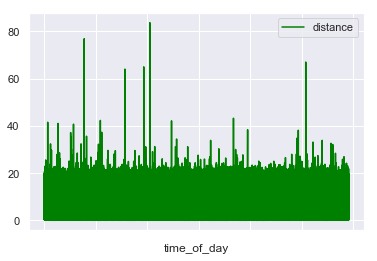

In [96]:
df.plot(kind='line',x='time_of_day',y='distance',color='green')
plt.show()

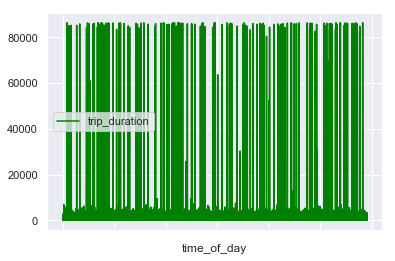

In [97]:
df.plot(kind='line',x='time_of_day' ,y='trip_duration' ,color='green' )
plt.show()

In [105]:
pcdist = pd.crosstab(df["passenger_count"], df["distance"])
pcdist

distance         0.000000   0.000424   0.000424   0.000424   0.000424   \
passenger_count                                                          
0                        3          0          0          0          0   
1                      352          1          0          0          1   
2                       64          0          0          1          0   
3                       14          0          1          0          0   
4                       12          0          0          0          0   
5                       23          0          0          0          0   
6                       13          0          0          0          0   

distance         0.000424   0.000424   0.000424   0.000424   0.000424   \
passenger_count                                                          
0                        0          0          0          0          0   
1                        1          1          1          1          1   
2                        0          0          0          0          0   
3                        0          0          0          0          0   
4                        0          0          0          0          0   
5                        0          0          0          0          0   
6                        0          0          0          0          0   

distance           ...      41.039405  41.542507  42.115868  42.302523  \
passenger_count    ...                                                   
0                  ...              0          0          0          0   
1                  ...              1          1          1          1   
2                  ...              0          0          0          0   
3                  ...              0          0          0          0   
4                  ...              0          0          0          0   
5                  ...              0          0          0          0   
6                  ...              0          0          0          0   

distance         43.231887  64.025660  64.972813  67.005406  76.891880  \
passenger_count                                                          
0                        0          0          0          0          0   
1                        1          1          0          1          1   
2                        0          0          0          0          0   
3                        0          0          1          0          0   
4                        0          0          0          0          0   
5                        0          0          0          0          0   
6                        0          0          0          0          0   

distance         83.662681  
passenger_count             
0                        0  
1                        1  
2                        0  
3                        0  
4                        0  
5                        0  
6                        0  

[7 rows x 117702 columns]

In [102]:
stats.ttest_ind(df["passenger_count"], df["distance"], equal_var=False)

Ttest_indResult(statistic=-146.21669833376163, pvalue=0.0)

In [107]:
weekday = []
for td in df["pickup_datetime"]:
    t = datetime.strptime(td, '%Y-%m-%d %H:%M:%S')
    weekday.append(t.weekday())
npwday = np.array(weekday)

In [109]:
stats.ttest_ind(npwday>4, df["distance"], equal_var=False)

Ttest_indResult(statistic=-273.44239984850566, pvalue=0.0)

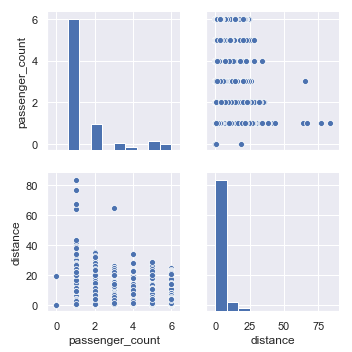

In [110]:
cols = ["passenger_count", "distance"]

sns.pairplot(data=df, vars=cols)